<a href="https://colab.research.google.com/github/Leakathr1n/Alsan_2015---Replication/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Foundations of Data Science project notebook**

Team members:  

Predictive Question:

# **Packages needed to run this notebook**
We install and import all necessary libaries for this notebook in the following code cell

In [2]:
library(dplyr) # needed for basic transformation on the DS
library(readxl) # needed to open and read xlsx-files
library(tidyr) # needed for reshaping
library(ggplot2) # needed for plotting
install.packages("GGally") # for plotting
library(GGally) # for plotting
install.packages("glmnet")
library(glmnet) #for penalized regression
install.packages("FNN") #for K nearest neighbors
library(FNN)
library(stringr) # needed for working on the airport encoding
library(purrr)  # needed for working on the airport encoding
library(readr) # needed for reading the csv
library(forcats)
library(patchwork)
install.packages("reshape2")
library(reshape2) # Load the reshape2 library (kept for compatibility if other parts rely on it, but melt is replaced)
library(tibble)
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Loading required package: lattice


Attaching package: ‘ca

In [3]:
set.seed(12345) # setting a seed so that we get the same data set split:)

# **1. Downloading and Cleaning the Data**

We are simply importing the data and have a brief first look at it.

1. Output: raw_data
2. Output: clean_data

In [4]:
rm(list = ls())

In [5]:
url<-('https://raw.githubusercontent.com/Leakathr1n/Foundations_of_Data_Science_Cargo2000/main/00%20Raw%20data/c2k_data_comma.xlsx')
tmp  <- tempfile(fileext = ".xlsx")           # create a temp file
download.file(url, tmp, mode = "wb")          # download binary file
raw_data <- read_excel(tmp)                   # read from local temp file

In [6]:
summary(raw_data)

       nr            i1_legid        i1_rcs_p          i1_rcs_e    
 Min.   :   0.0   Min.   :    1   Min.   :    5.0   Min.   :    1  
 1st Qu.: 986.2   1st Qu.: 3591   1st Qu.:  377.8   1st Qu.:  113  
 Median :1971.5   Median : 7430   Median : 1085.0   Median :  340  
 Mean   :1971.3   Mean   : 7304   Mean   : 2203.5   Mean   : 1653  
 3rd Qu.:2956.8   3rd Qu.:10922   3rd Qu.: 1946.5   3rd Qu.: 1375  
 Max.   :3942.0   Max.   :14661   Max.   :47190.0   Max.   :46357  
   i1_dep_1_p       i1_dep_1_e     i1_dep_1_place    i1_rcf_1_p  
 Min.   :  75.0   Min.   :   4.0   Min.   :101.0   Min.   :  50  
 1st Qu.: 120.0   1st Qu.: 263.0   1st Qu.:308.0   1st Qu.: 455  
 Median : 180.0   Median : 516.0   Median :485.0   Median : 820  
 Mean   : 205.9   Mean   : 711.4   Mean   :503.7   Mean   : 796  
 3rd Qu.: 240.0   3rd Qu.: 949.8   3rd Qu.:700.0   3rd Qu.:1020  
 Max.   :2876.0   Max.   :9513.0   Max.   :815.0   Max.   :5001  
   i1_rcf_1_e      i1_rcf_1_place   i1_dep_2_p         i1_dep_

In [7]:
# system("gdown 19zj1uN65nQVoGdFHQxtxrDVxflopCAuQ6AwR-LXQSuA")
# raw_data <- read_excel("/content/c2k_data_comma.xlsx")

In [8]:
head(raw_data)

nr i1_legid i1_rcs_p i1_rcs_e i1_dep_1_p i1_dep_1_e i1_dep_1_place i1_rcf_1_p
1 0  5182      199      218     210        215        609             935      
2 1  6523      844      584      90        297        700            1935      
3 2  5878     4380     4119      90        280        456             905      
4 3  1275      759      169     240        777        173             340      
5 4  8117     1597     1485     150        241        411             585      
6 5  9889      181       98     240        259        815             215      
  i1_rcf_1_e i1_rcf_1_place ⋯ o_dep_3_p o_dep_3_e o_dep_3_place o_rcf_3_p
1  736       256            ⋯ ?         ?         ?             ?        
2 1415       431            ⋯ ?         ?         ?             ?        
3  547       700            ⋯ ?         ?         ?             ?        
4  577       349            ⋯ ?         ?         ?             ?        
5  612       128            ⋯ ?         ?         ?             ?        
6  223       128            ⋯ ?         ?         ?             ?        
  o_rcf_3_e o_rcf_3_place o_dlv_p o_dlv_e o_hops legs
1 ?         ?              780     434    1      2   
2 ?         ?             3870     445    1      2   
3 ?         ?              550    1520    1      1   
4 ?         ?             3780     159    1      1   
5 ?         ?             4140    4797    2      1   
6 ?         ?             3960     467    1      2

## **Cleaning the data**

We are now cleaning our data and make sure the variables are of the correct type.

Output: clean_data

In [9]:
# removing the unnecessary last column
clean_data <- raw_data[, !names(raw_data) %in% "...99"]

In [10]:
# converting all columns into numerical, except for "factors" or categorical variables!
# this also ensures that all our "?" are converted in NA;)

clean_data <- clean_data %>%
  mutate(across(everything(), as.character)) %>%      # temporarily ensure character so that we can replace all ?
  mutate(across(everything(), ~ na_if(., "?"))) %>%   # convert "?" → NA
  mutate(
    across(!matches("nr|leg|place|hops", ignore.case = TRUE), as.numeric),  # numeric columns
    across(matches("leg|hops", ignore.case = TRUE), as.factor),     # factor columns
    across(matches("nr|place|legid", ignore.case = TRUE), as.character)    # character columns
  )

  # str(clean_data)

In [11]:
head(clean_data)

nr i1_legid i1_rcs_p i1_rcs_e i1_dep_1_p i1_dep_1_e i1_dep_1_place i1_rcf_1_p
1 0  5182      199      218     210        215        609             935      
2 1  6523      844      584      90        297        700            1935      
3 2  5878     4380     4119      90        280        456             905      
4 3  1275      759      169     240        777        173             340      
5 4  8117     1597     1485     150        241        411             585      
6 5  9889      181       98     240        259        815             215      
  i1_rcf_1_e i1_rcf_1_place ⋯ o_dep_3_p o_dep_3_e o_dep_3_place o_rcf_3_p
1  736       256            ⋯ NA        NA        NA            NA       
2 1415       431            ⋯ NA        NA        NA            NA       
3  547       700            ⋯ NA        NA        NA            NA       
4  577       349            ⋯ NA        NA        NA            NA       
5  612       128            ⋯ NA        NA        NA            NA       
6  223       128            ⋯ NA        NA        NA            NA       
  o_rcf_3_e o_rcf_3_place o_dlv_p o_dlv_e o_hops legs
1 NA        NA             780     434    1      2   
2 NA        NA            3870     445    1      2   
3 NA        NA             550    1520    1      1   
4 NA        NA            3780     159    1      1   
5 NA        NA            4140    4797    2      1   
6 NA        NA            3960     467    1      2

# **2. Getting an overview of the dataset**

In [12]:
# Let's start with a very broad overview
summary(clean_data)

# quite a lot of missing values; let's see if we can bring some structure to this;)
# quite a lot of outliers

      nr              i1_legid            i1_rcs_p          i1_rcs_e    
 Length:3942        Length:3942        Min.   :    5.0   Min.   :    1  
 Class :character   Class :character   1st Qu.:  377.8   1st Qu.:  113  
 Mode  :character   Mode  :character   Median : 1085.0   Median :  340  
                                       Mean   : 2203.5   Mean   : 1653  
                                       3rd Qu.: 1946.5   3rd Qu.: 1375  
                                       Max.   :47190.0   Max.   :46357  
                                                                        
   i1_dep_1_p       i1_dep_1_e     i1_dep_1_place       i1_rcf_1_p  
 Min.   :  75.0   Min.   :   4.0   Length:3942        Min.   :  50  
 1st Qu.: 120.0   1st Qu.: 263.0   Class :character   1st Qu.: 455  
 Median : 180.0   Median : 516.0   Mode  :character   Median : 820  
 Mean   : 205.9   Mean   : 711.4                      Mean   : 796  
 3rd Qu.: 240.0   3rd Qu.: 949.8                      3rd Qu.:1020  
 M

In [13]:
# str(clean_data)

# **2.1 Analysing the NA's**

We have seen that our dataset has quite a lot of missing values. While they were initially encoded as "?", when we converted them into numerical values, the question mark was converted into a proper R "NA". We will now dive deeper into the missing values and explore if there is a pattern.

Output: clean_data

For convenience, we add an overview of the dataset here. This will also help us explaining the relationship between the missing values.

![Alt text](https://raw.githubusercontent.com/Leakathr1n/Foundations_of_Data_Science_Cargo2000/main/99%20Additional%20material/Overview%20of%20dataset.png)

In [14]:
# creating subsets per each leg & outbound
subset_i1 <- clean_data[, c("nr", grep("^i1", names(clean_data), value = TRUE))]
subset_i2 <- clean_data[, c("nr", grep("^i2", names(clean_data), value = TRUE))]
subset_i3 <- clean_data[, c("nr", grep("^i3", names(clean_data), value = TRUE))]
subset_o <- clean_data[, c("nr", grep("^o", names(clean_data), value = TRUE))]

# head(subset_i1)

In [15]:
# setting up the data sets that I want to loop through
subset_list <- list(i1 = subset_i1, i2 = subset_i2, i3 = subset_i3, o  = subset_o)

# actually analysing the dataset
na_summary_all <- purrr::map_dfr(
  names(subset_list),
  function(name) {
    df <- subset_list[[name]]

    df %>%
      summarise(across(
        everything(),
        ~ sum(is.na(.)) / n() * 100, #calculate % NA
        .names = "NA_{.col}"
      )) %>%
      pivot_longer(
        everything(),
        names_to = "Variable",
        values_to = "Percent_NA"
      ) %>%
      mutate(
        Variable = sub("^NA_", "", Variable),
        Percent_Not_NA = 100 - Percent_NA, # calculate not NA
        Subset = name
      ) %>%
      select(Subset, Variable, Percent_NA, Percent_Not_NA)
  }
)

# print(na_summary_all, n=50)

#We can see that there is some kind of pattern; just to be entirely sure, let's double-check with code;)

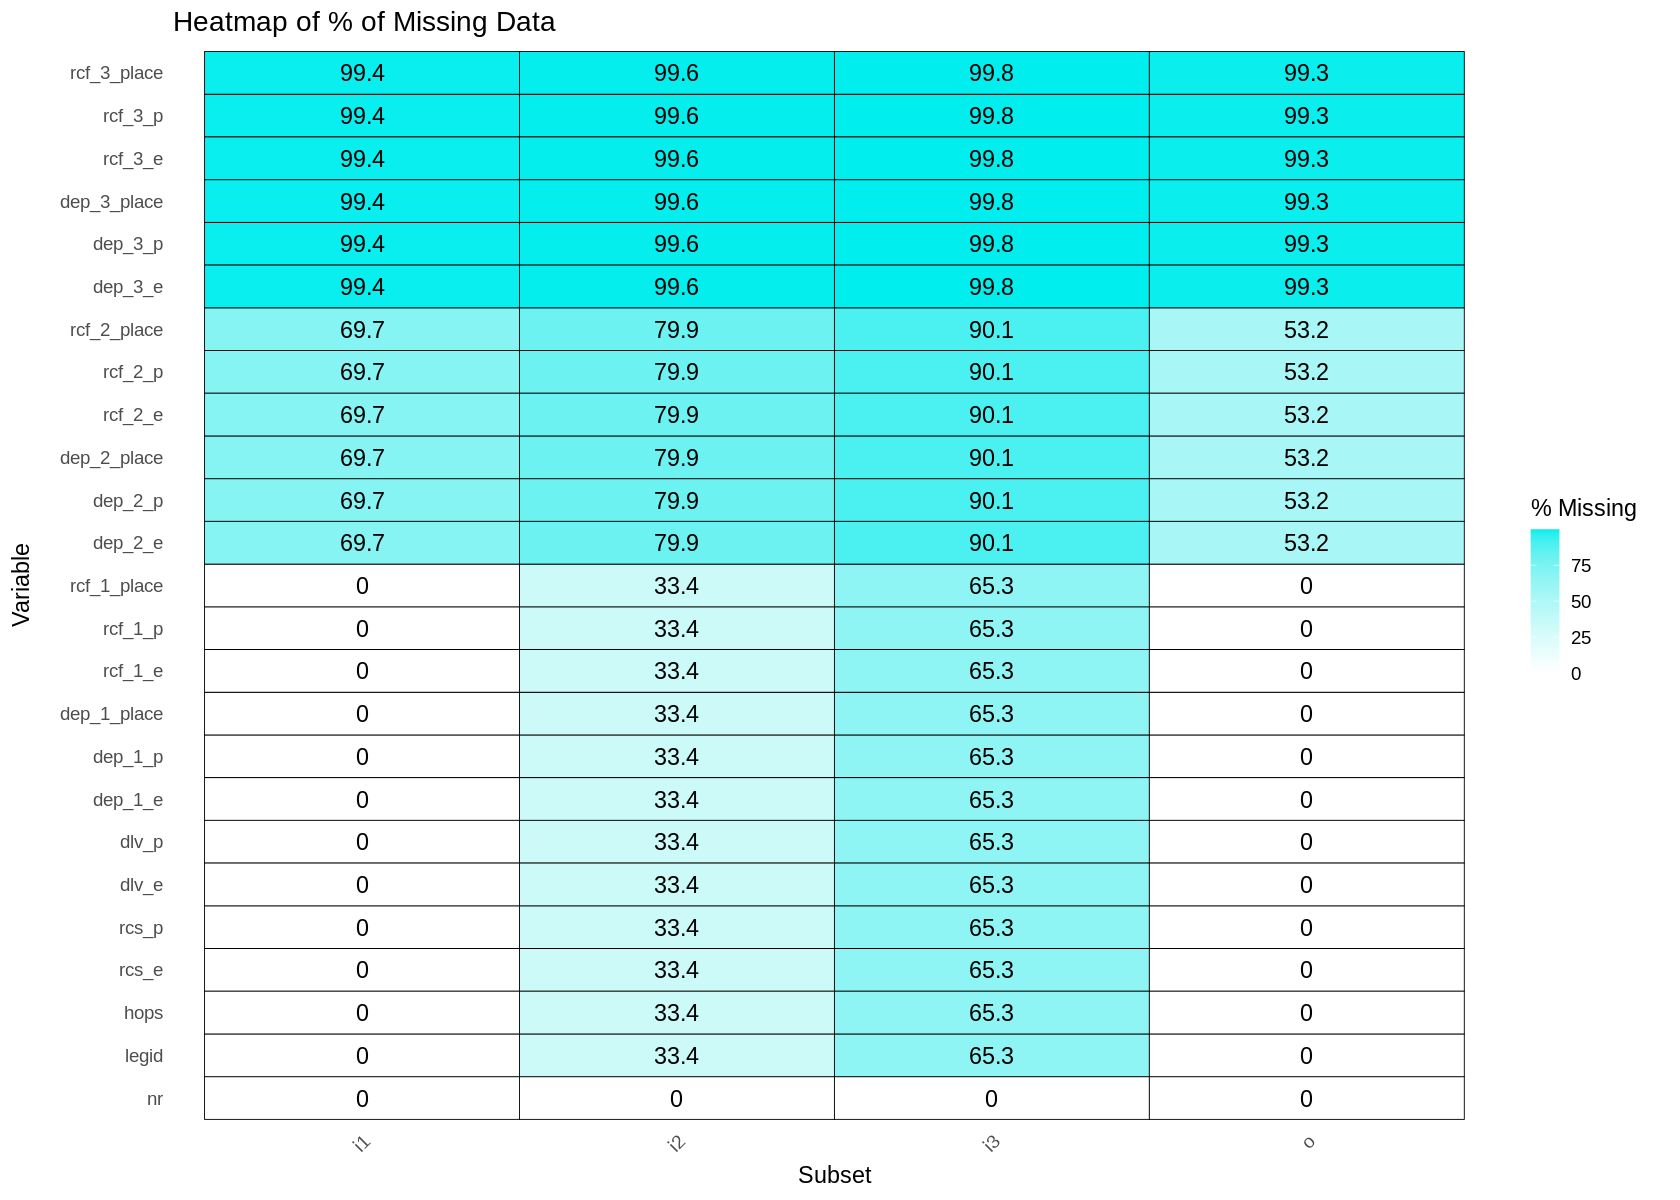

In [16]:
# Plotting a heat-map!

na_clean <- na_summary_all %>%
  mutate(
    Clean_Variable = sub("^(i1_|i2_|i3_|o_)", "", Variable)
  )

my_order <- c(
  "nr", "legid", "hops",
  "rcs_e", "rcs_p", "dlv_e", "dlv_p",
  "dep_1_e", "dep_1_p", "dep_1_place", "rcf_1_e", "rcf_1_p", "rcf_1_place",
  "dep_2_e", "dep_2_p", "dep_2_place","rcf_2_e", "rcf_2_p", "rcf_2_place",
  "dep_3_e", "dep_3_p", "dep_3_place","rcf_3_e", "rcf_3_p", "rcf_3_place"
)

na_clean <- na_clean %>% mutate(Clean_Variable = factor(Clean_Variable, levels = my_order))

options(repr.plot.width = 14, repr.plot.height = 10) # plot size;)

ggplot(na_clean, aes(y = Clean_Variable, x = Subset, fill = Percent_NA)) +
  geom_tile(color = "black") +
  geom_text(aes(label = round(Percent_NA, 1))) +
  scale_fill_gradient(low = "white", high = "cyan2", name ="% Missing") +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    # panel.grid.major = element_line(color = "black"),
    # panel.grid.minor = element_line(color = "black"),
    panel.grid = element_blank()
  ) +
  labs(
    title = "Heatmap of % of Missing Data",
    y = "Variable",
    x = "Subset",
    fill = "% NA"
  )

We can see that there is some pattern with the missing values, i.e. they are NOT missing at random.

How to interpret the heat-map now:
1. We are NOT missing any unique identifiers, as indicated by the variable "nr", legids or hops variables.
2. It also seems that we have at least 1 leg per delivery which leads to having no missing values in our first subset /incoming leg and the outgoing leg
3. We can see that per hop, we always have the same missing values. E.g. hop 1 in subset i1 contains 0% missing values for all its variables (dep_1_e, dep_1_p, ..., rcf_1_place). The same applies to other hops, and the other subsets. Similarly, there is 99.4% missing values for the 3rd hop in the first incoming leg.

Therefore, we can conclude that our NA's are **not missing at random** but that there is a structure to it. We believe that this structure relates to the factor variable hop: if it says one, the transporting leg (i1-i3) only has one delivery, and therefore missing values for hop 2 and hop3. We will verify this claim in the following section:

In [17]:
# Create a list of subsets with their hops column name
subset_list <- list(
  i1 = list(data = subset_i1, hops_col = "i1_hops"),
  i2 = list(data = subset_i2, hops_col = "i2_hops"),
  i3 = list(data = subset_i3, hops_col = "i3_hops"),
  o  = list(data = subset_o,  hops_col = "o_hops")
)

hops_summary_all <- data.frame() # Initialise empty data frame to store results

# Loop over each subset
for(sub_name in names(subset_list)) {
  df <- subset_list[[sub_name]]$data
  col <- subset_list[[sub_name]]$hops_col

  temp <- df %>%
    count(.data[[col]]) %>%
    mutate(
      Percent = n / sum(n) * 100, #calculate per-centage
      Subset = sub_name # obtain the subset / leg name
    ) %>%
    rename(Hops = .data[[col]])

  hops_summary_all <- rbind(hops_summary_all, temp)
}

# Show result
hops_summary_all <- hops_summary_all %>% select(Subset, Hops, Percent, n)
head(hops_summary_all)

Warning message:
“Use of .data in tidyselect expressions was deprecated in tidyselect 1.2.0.
ℹ Please use `all_of(var)` (or `any_of(var)`) instead of `.data[[var]]`”


Subset Hops Percent    n   
1 i1     1    69.6854389 2747
2 i1     2    29.7311010 1172
3 i1     3     0.5834602   23
4 i2     1    46.4992390 1833
5 i2     2    19.7108067  777
6 i2     3     0.3551497   14

We can see that those numbers basically confirm our suspicion that the NA's are equivalent to the number of hops as indictated by the hops column!
In order to check one by one by row, we did one last check with the following function:

In [18]:
check_hop_consistency <- function(df, hop_var, subset_name) {

  df <- df %>% filter(!is.na(.data[[hop_var]]))  # <-- ignore rows with NA in the hops variable

  hop1_cols <- grep("_1_", names(df), value = TRUE) # Identify hop-level columns
  hop2_cols <- grep("_2_", names(df), value = TRUE)
  hop3_cols <- grep("_3_", names(df), value = TRUE)

  df %>%
    mutate(
      subset = subset_name,
      hop1_ok = if_else(.data[[hop_var]] >= 1,
                        rowSums(!is.na(across(all_of(hop1_cols)))) == length(hop1_cols),
                        rowSums(is.na(across(all_of(hop1_cols)))) == length(hop1_cols)),
      hop2_ok = if_else(.data[[hop_var]] >= 2,
                        rowSums(!is.na(across(all_of(hop2_cols)))) == length(hop2_cols),
                        rowSums(is.na(across(all_of(hop2_cols)))) == length(hop2_cols)),
      hop3_ok = if_else(.data[[hop_var]] >= 3,
                        rowSums(!is.na(across(all_of(hop3_cols)))) == length(hop3_cols),
                        rowSums(is.na(across(all_of(hop3_cols)))) == length(hop3_cols)),
      all_ok = hop1_ok & hop2_ok & hop3_ok
    ) %>%
    summarise(
      subset = subset_name,
      total_rows = n(),
      violations = sum(!all_ok),
      violation_percent = 100 * violations / total_rows
    )
}

In [19]:
result_i1 <- check_hop_consistency(subset_i1, "i1_hops", "i1") #passing the subsets, and the variable names
result_i2 <- check_hop_consistency(subset_i2, "i2_hops", "i2")
result_i3 <- check_hop_consistency(subset_i3, "i3_hops", "i3")
result_o  <- check_hop_consistency(subset_o,  "o_hops",  "o")

bind_rows(result_i1, result_i2, result_i3, result_o)

Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `hop1_ok = if_else(...)`.
Caused by warning in `Ops.factor()`:
! ‘>=’ not meaningful for factors
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `hop1_ok = if_else(...)`.
Caused by warning in `Ops.factor()`:
! ‘>=’ not meaningful for factors
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `hop1_ok = if_else(...)`.
Caused by warning in `Ops.factor()`:
! ‘>=’ not meaningful for factors
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `hop1_ok = if_else(...)`.
Caused by warning in `Ops.factor()`:
! ‘>=’ not meaningful for factors
ℹ Run `dplyr::last_dplyr_wa

subset total_rows violations violation_percent
1 i1     3942       NA         NA               
2 i2     2624       NA         NA               
3 i3     1366       NA         NA               
4 o      3942       NA         NA

This is great, we do not have any violations. This means that we have **no missing data at random**. We can therefore proceed to checks on *outliers* and *points with high leverage*.

### **Dealing with the NA's**

In order to perform prediction, we need to tackle the missing data.
There are different ways to deal with missing data, with the easiest one simply dropping rows that contain missing data. However, this would significantly reduce the size of our data-set and will not allow us to actually analyse the different steps in the supply chain.

Instead, we have decided to replace missing values simply with a 0. From an economic and business perspective, this makes sense, as those deliveries (since they did not happen) were not unpuctual. Therefore, we can count them as punctual!

In [20]:
clean_data <- clean_data %>% mutate(across(where(is.numeric), ~ replace_na(., 0))) # replacing all NA's with 0 in numeric columns

In [21]:
# clean character columns too;)
clean_data <- clean_data %>%
  mutate(
    across(
      ends_with("_place"),
      ~ ifelse(is.na(.), "0", .)   # replace NA with "0" but keep as character
    )
  )

In [22]:
# str(clean_data)

# **2.2 Look at effective time variable**
Before moving to the feature engeneering, it's important to take a look at the distribution of our variables.\
Specifically, we will analyse the difference between our target variable and other numerical variables.

# **2.3. Transformation**

Startpoint A:
- target: total effective time (maximum of the leg + o)
- hops per leg
- number of legs
- airport ID (place): effective time at the airport/ delay at airport T THAT SPECIFIC STEP (target encoder); no matter in whic leg it occurs; no matter the hop
- completely drop the planned time;


---------------------------------------------------------
just keeping this for completeness now, can delete later!

Startpoint B:
- target: total delay / total effective time
- delay at leg 1, 2, 3
- hops (only outgoing)
- average delay for the outgoing process
- dummy which leg had the largest delay

## 2.3.1 Generating our target variable



Generating the target variable: effective time as the maximum time between the three legs + outbound time.

Output: total_e
(contains total effect time per leg and then the target variable)

In [23]:
# Creating the subsets again
subset_i1 <- clean_data[, c("nr", grep("^i1", names(clean_data), value = TRUE))]
subset_i2 <- clean_data[, c("nr", grep("^i2", names(clean_data), value = TRUE))]
subset_i3 <- clean_data[, c("nr", grep("^i3", names(clean_data), value = TRUE))]
subset_o <- clean_data[, c("nr", grep("^o", names(clean_data), value = TRUE))]

subset_i1$i1_total_e <- rowSums(subset_i1[grep("_e$", names(subset_i1))],na.rm = TRUE)
subset_i2$i2_total_e <- rowSums(subset_i2[grep("_e$", names(subset_i2))],na.rm = TRUE)
subset_i3$i3_total_e <- rowSums(subset_i3[grep("_e$", names(subset_i3))],na.rm = TRUE)
subset_o$o_total_e <- rowSums(subset_o[grep("_e$", names(subset_o))], na.rm = TRUE)

In [24]:
total_e <- Reduce(function(x, y) merge(x, y, by = "nr", all = TRUE),
                  list(subset_i1, subset_i2, subset_i3, subset_o))
total_e <- total_e %>% select(i1_total_e,i2_total_e,i3_total_e,o_total_e, nr)
head(total_e)

i1_total_e i2_total_e i3_total_e o_total_e nr  
1 2708        5371         0       12123     0   
2 8086       11984         0        4273     1   
3 1199        1266         0        2577     10  
4 2960        5983         0        1374     100 
5 8764       28942      7349       11290     1000
6  404           0         0        2092     1001

In [25]:
# find the largest value among the three i columns
max_i <- apply(total_e[, c("i1_total_e", "i2_total_e", "i3_total_e")], 1, max)

# add it to o_total_e and store in new column total_e
total_e$total_e <- total_e$o_total_e + max_i

head(total_e)

i1_total_e i2_total_e i3_total_e o_total_e nr   total_e
1 2708        5371         0       12123     0    17494  
2 8086       11984         0        4273     1    16257  
3 1199        1266         0        2577     10    3843  
4 2960        5983         0        1374     100   7357  
5 8764       28942      7349       11290     1000 40232  
6  404           0         0        2092     1001  2496

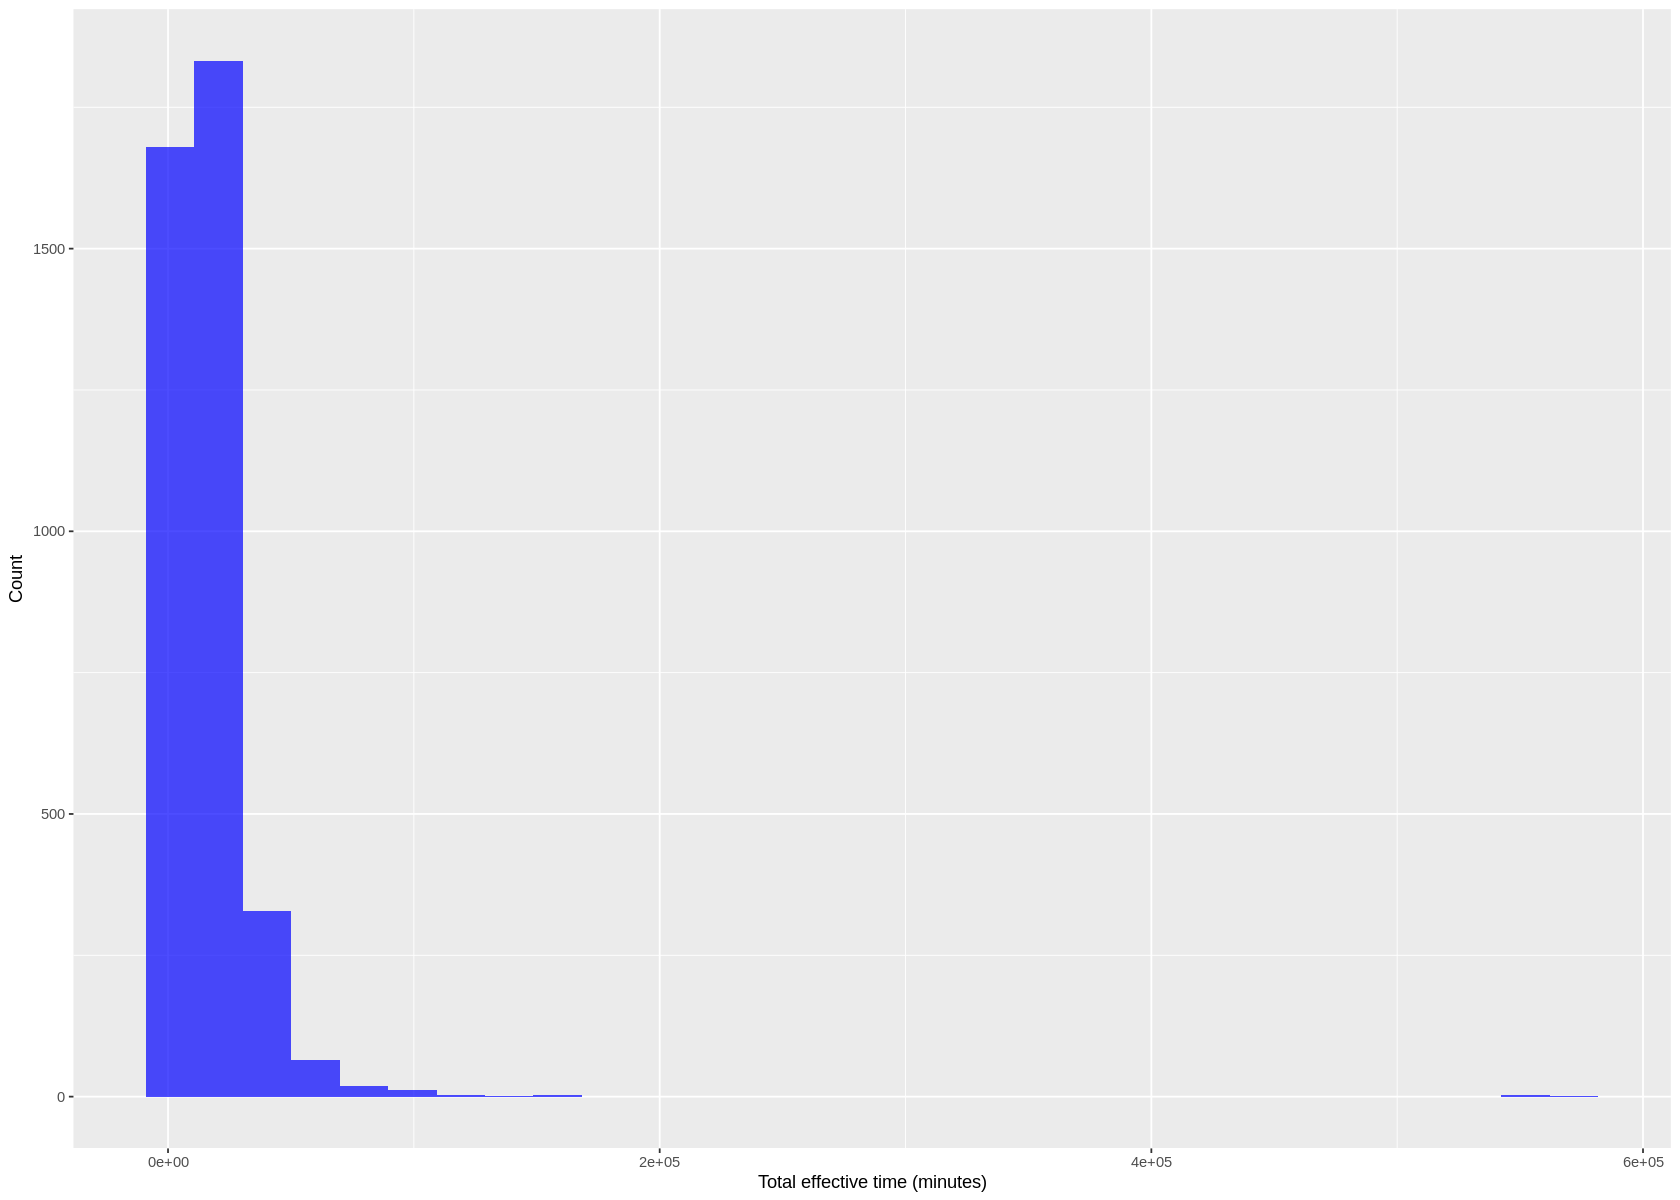

In [26]:
# Distribution of total_e
ggplot(total_e, aes(x = total_e)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.7) +
  labs(x = "Total effective time (minutes)", y = "Count")

The distribution is very skewed, and we have some really big outliers. However, very big delays in supply chain are not uncommon, so it is important to preserve at least a little bit of that information (while at the same time handle their impact on the prediction).\
To do so, we will take a log transformation.

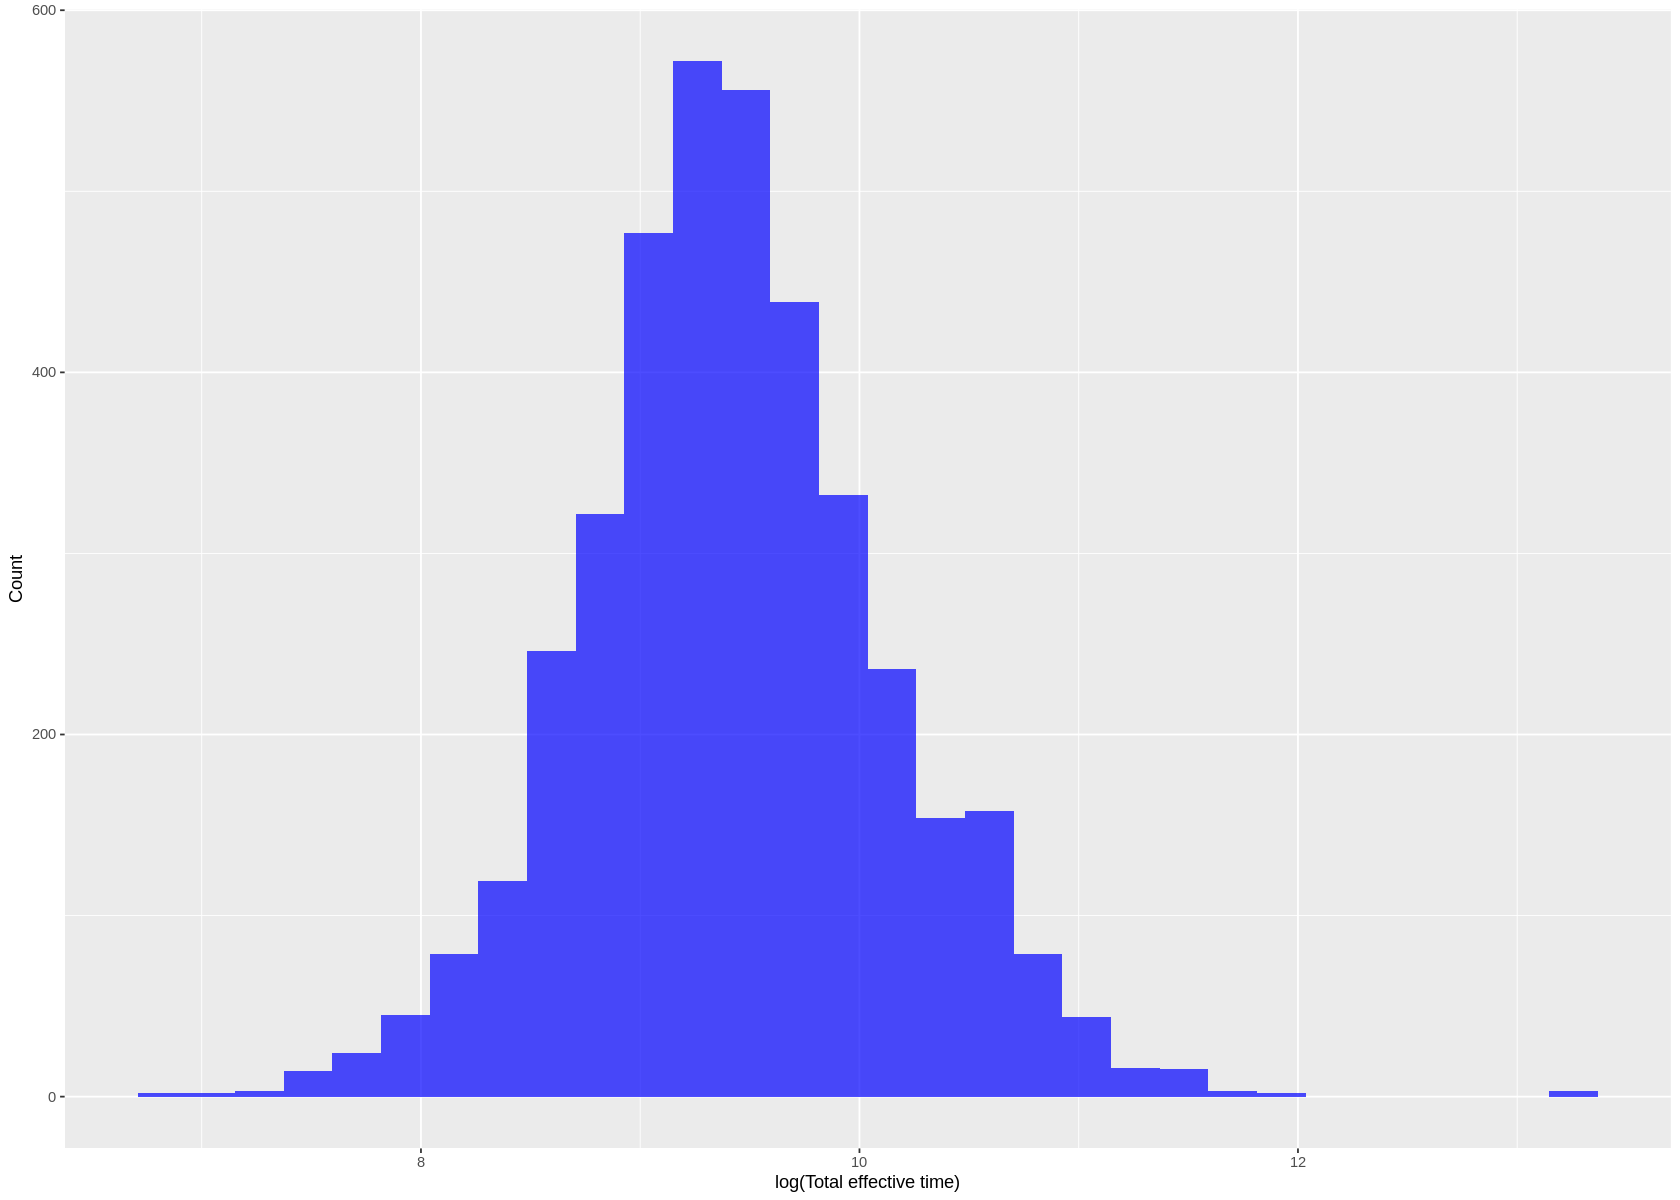

In [27]:
# log-transform
total_e <- total_e %>% mutate(log_total_e = log(total_e))

ggplot(total_e, aes(x = log_total_e)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.7) +
  labs(x = "log(Total effective time)", y = "Count")

The distribution is more bell shaped, while still preserving a bit of the skeweness and the high outliers, justifying using the log-transformation. of out target variable.

qqplot for sanity check (optional, can discuss with Alessandro if it makes sense including it)

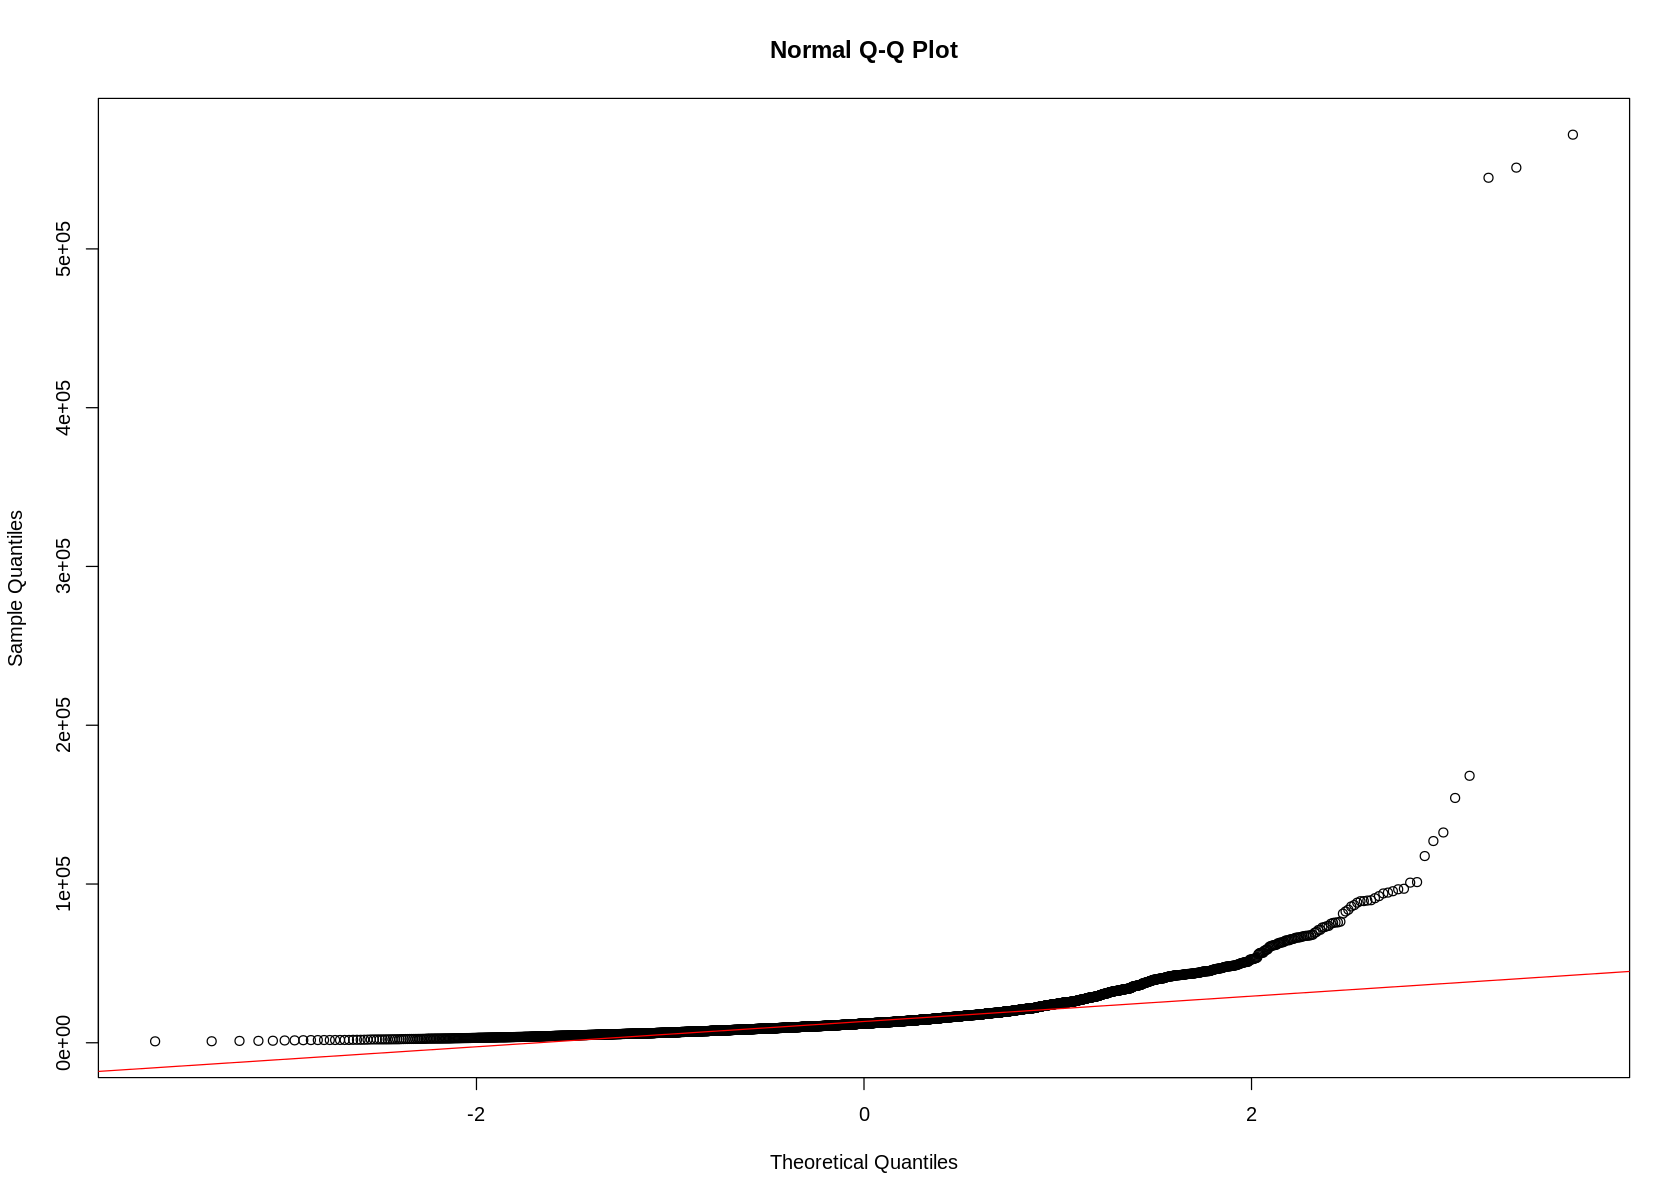

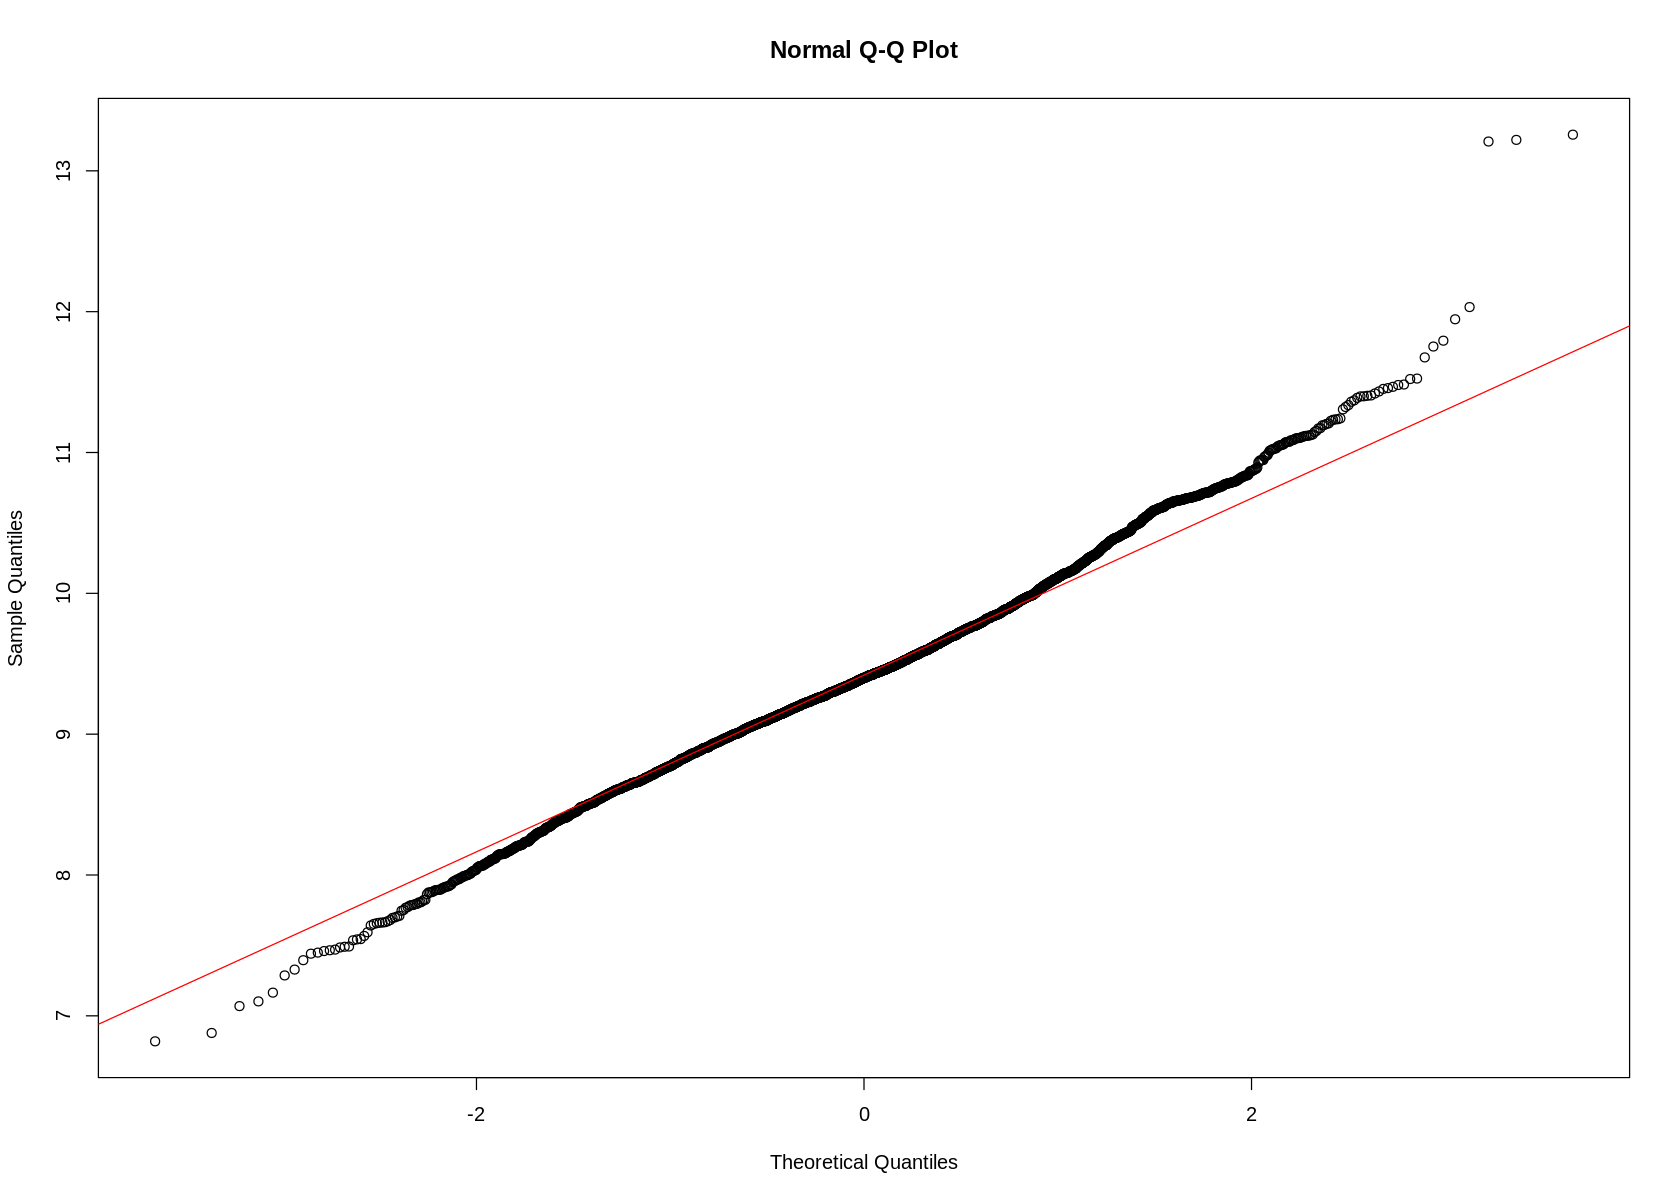

In [28]:
qqnorm(total_e$total_e); qqline(total_e$total_e, col = "red")
qqnorm(total_e$log_total_e); qqline(total_e$log_total_e, col = "red")

##2.3.2 Hops per leg & # legs

In [29]:
hops_legs <- clean_data %>% select(nr, i1_hops, i2_hops, i3_hops, o_hops, legs)
#hops_legs

## 2.3.3 Airport ID - Train and Test Split

Since we want to keep the information about the airports, but OHE (**@Francesco** please write that out) for every airport id at every step of the transportation process would be a problem because it would create way too many variables, we want to use target encoding for the airport.\
Before doing it, it's better to do a bit of EDA(**@Francesco** please write that out) on the airport variable.

###**2.3.3.1 Looking at the distribution of effective and planned time and applying the logarithm**

**@Francesco** - do you think it would make more sense to actually have a look at the untransformed time for the airports? Just wondering, since the ln deflates the variance...

Output: log_clean_data

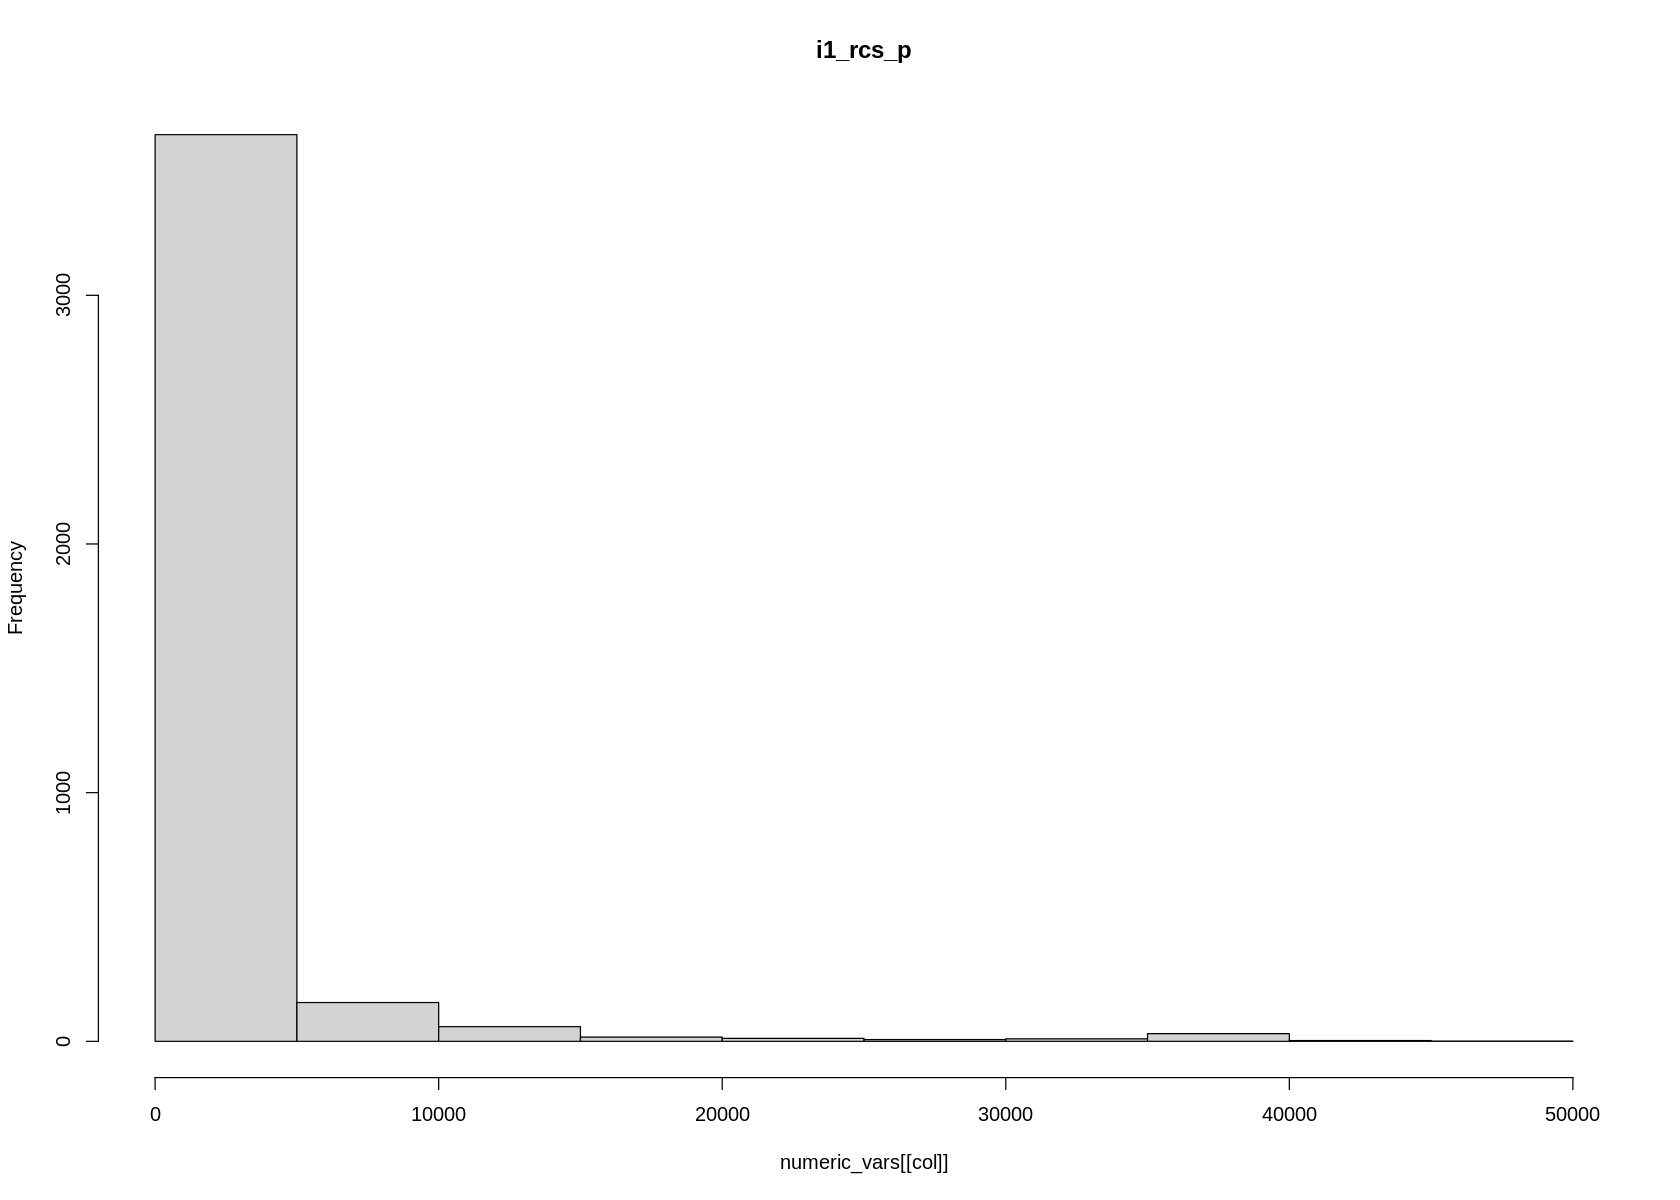

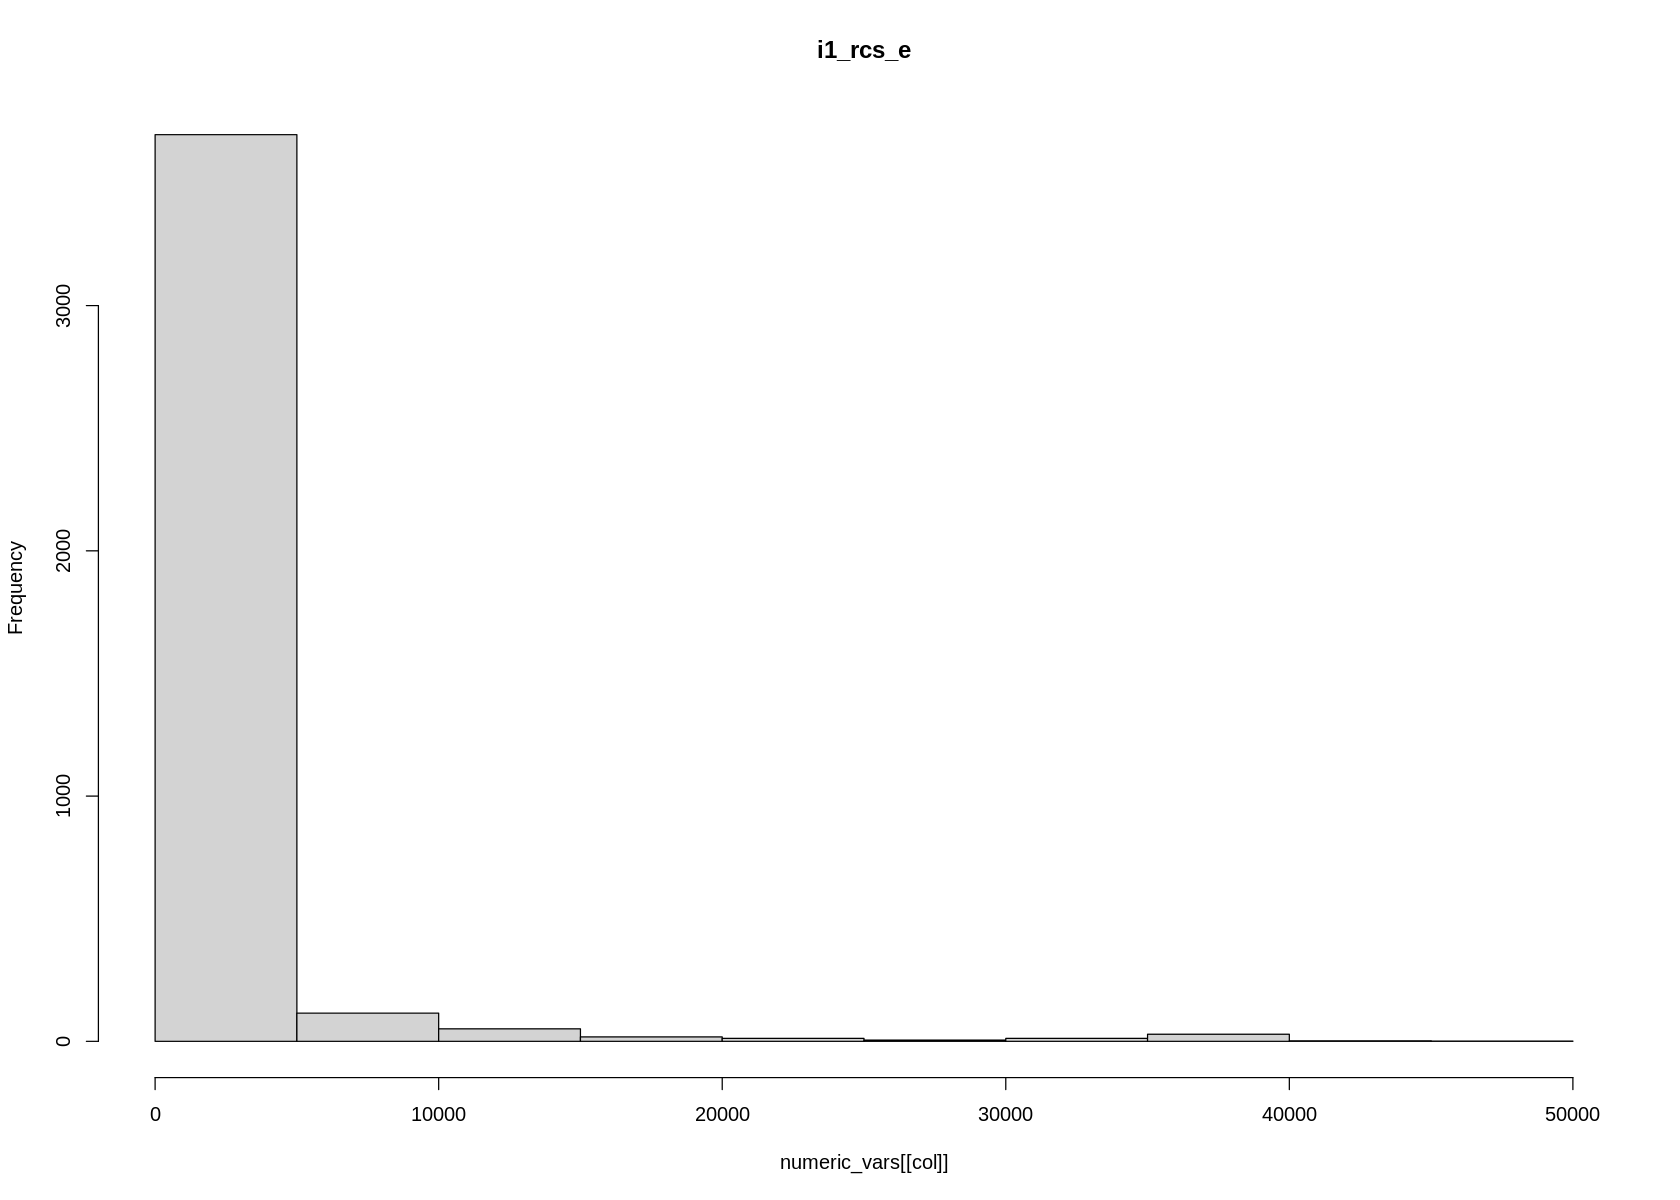

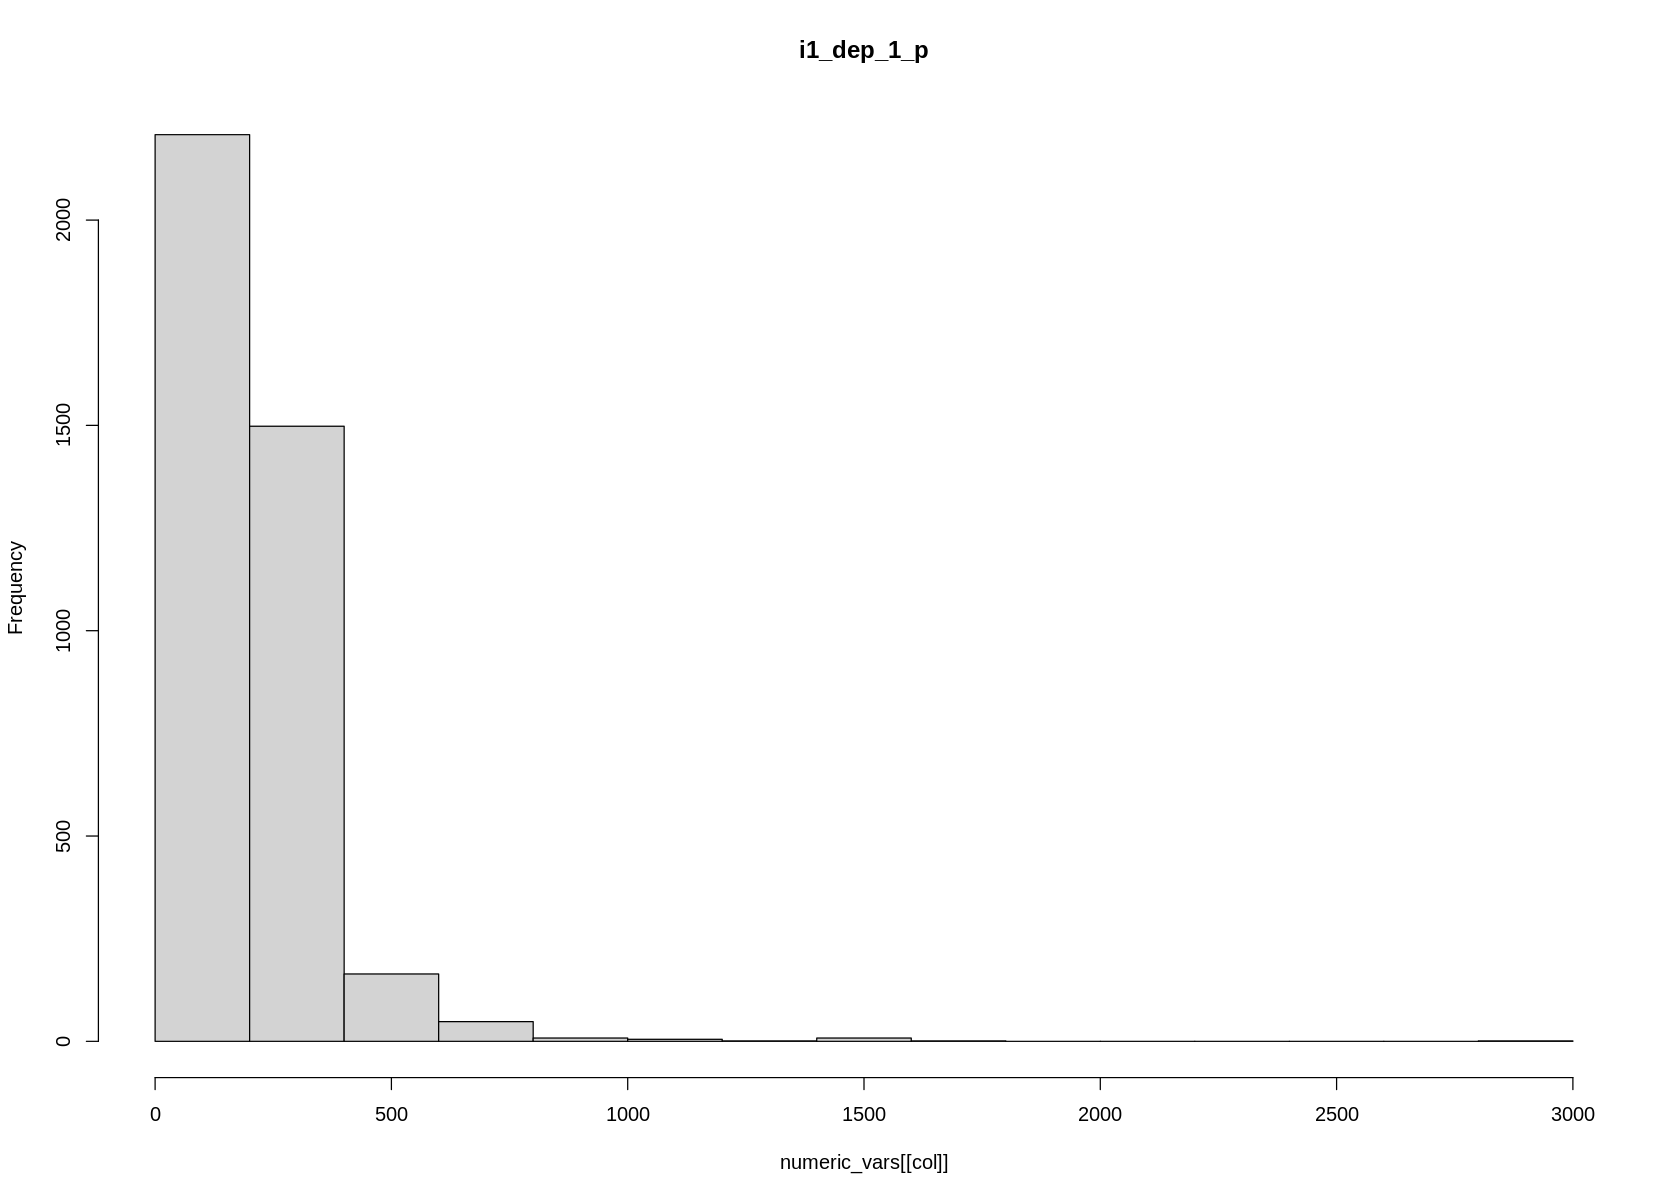

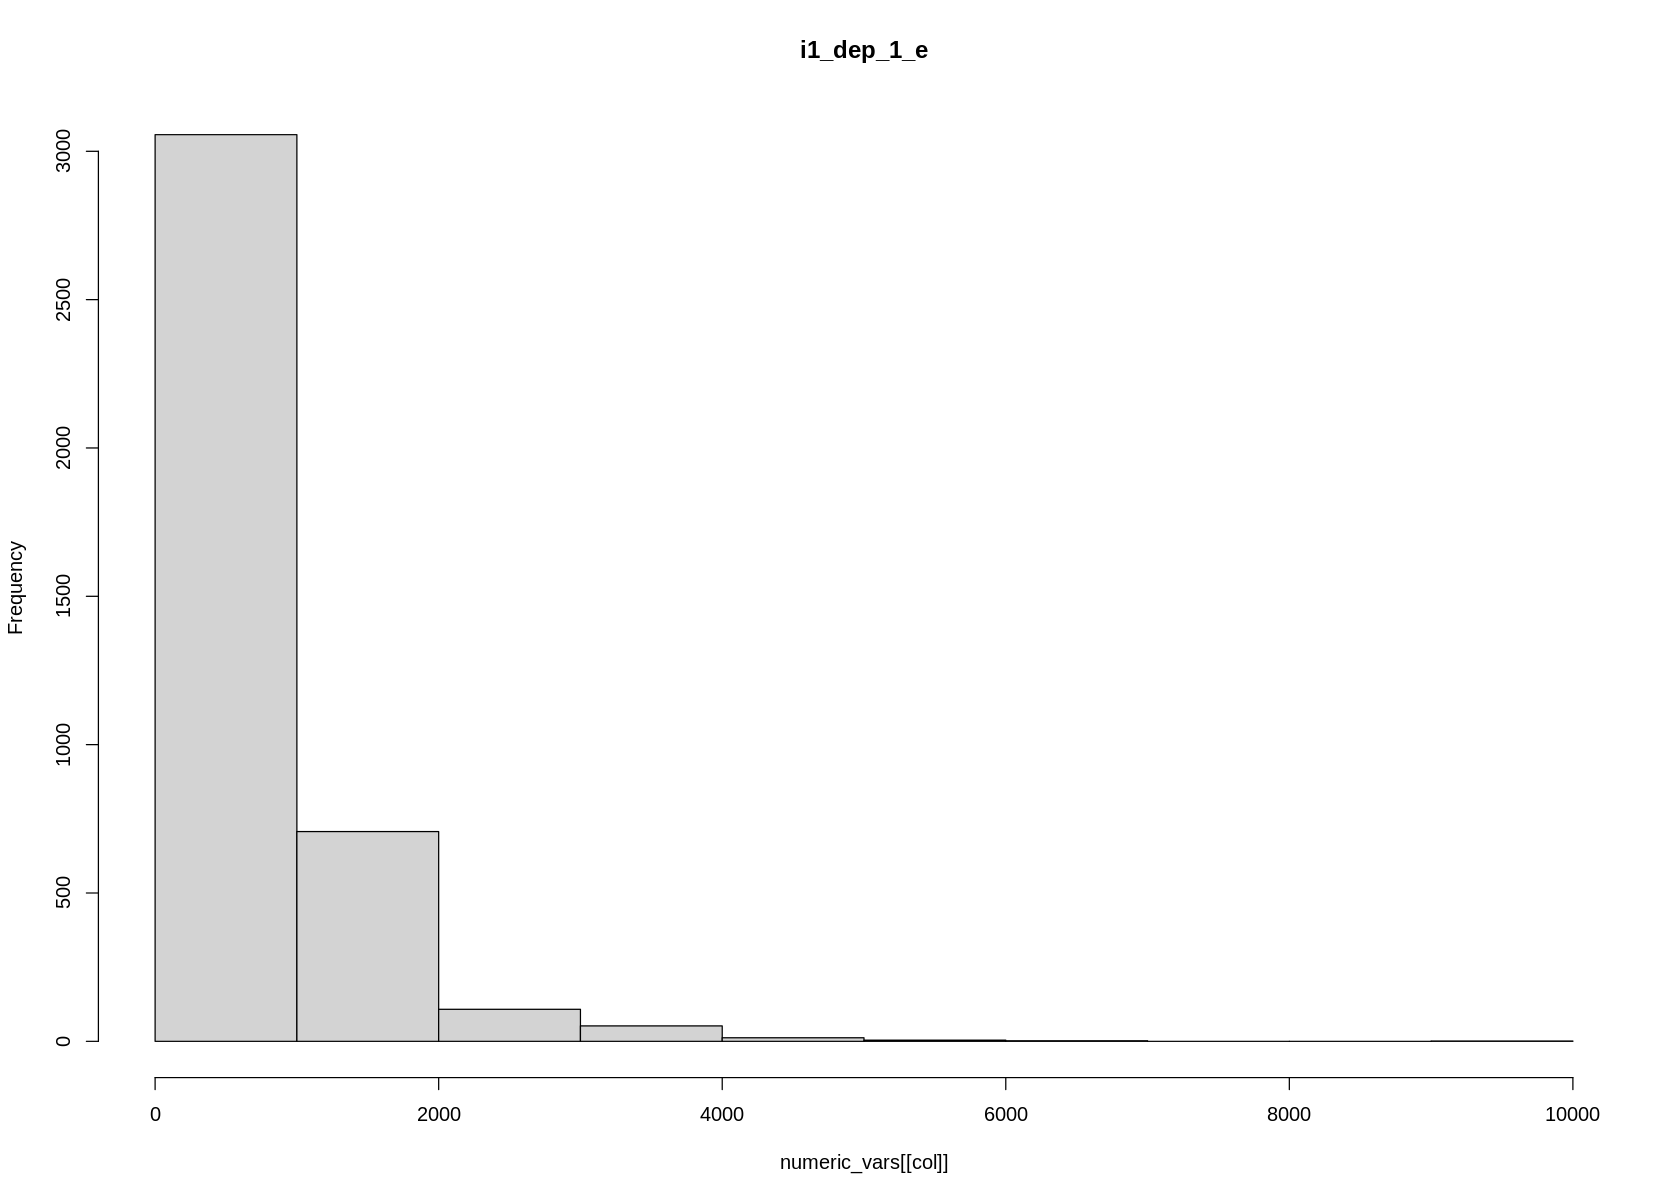

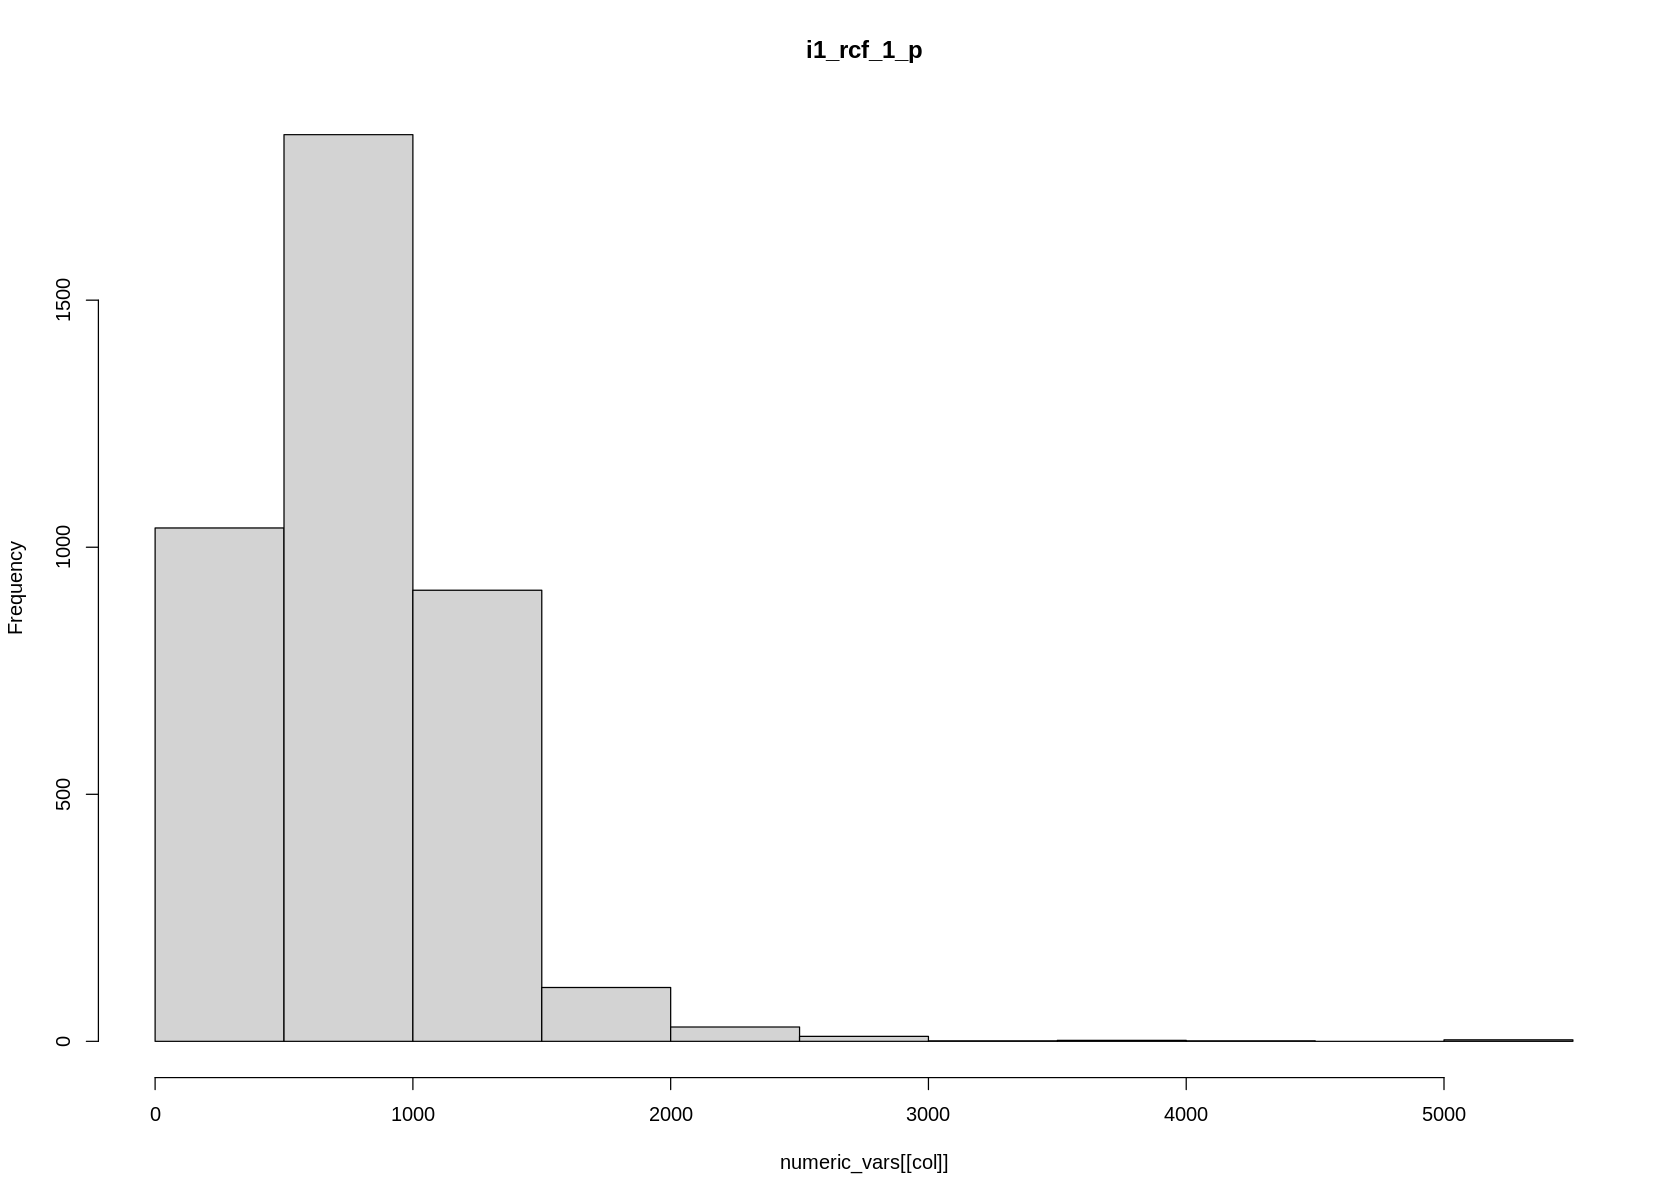

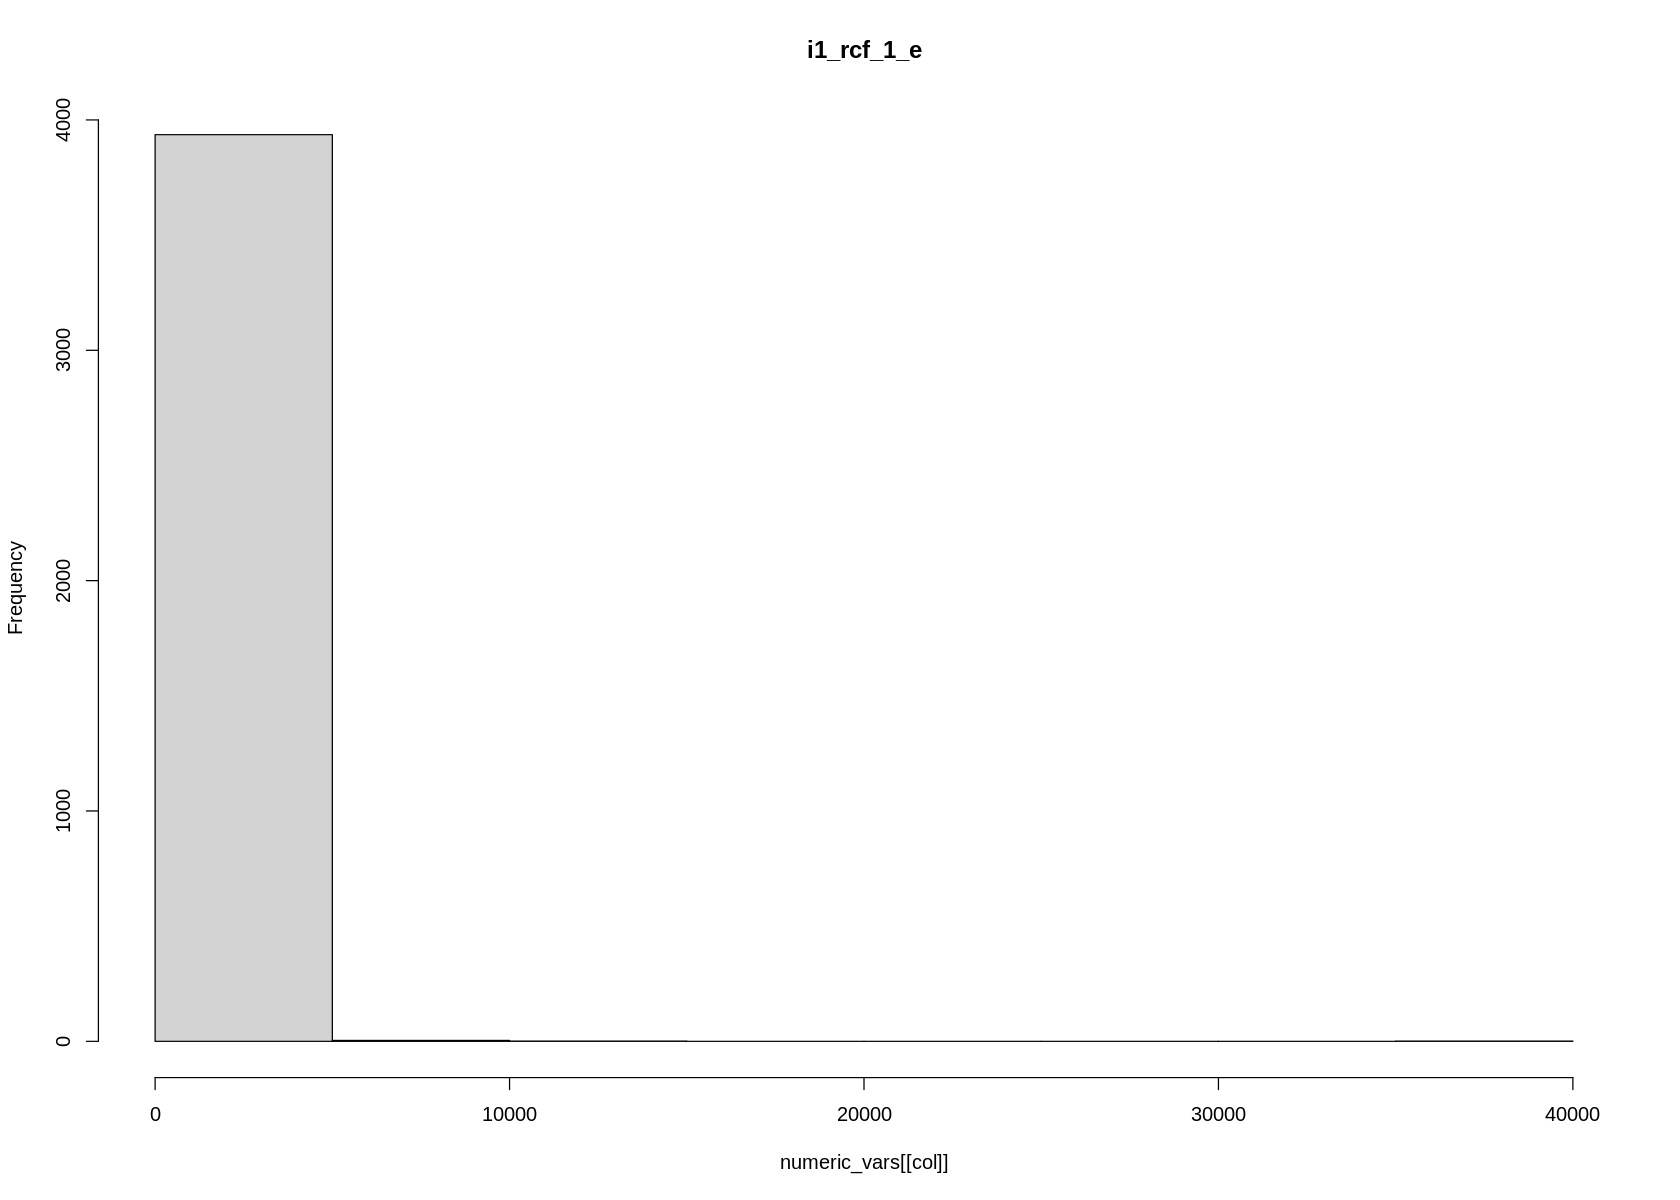

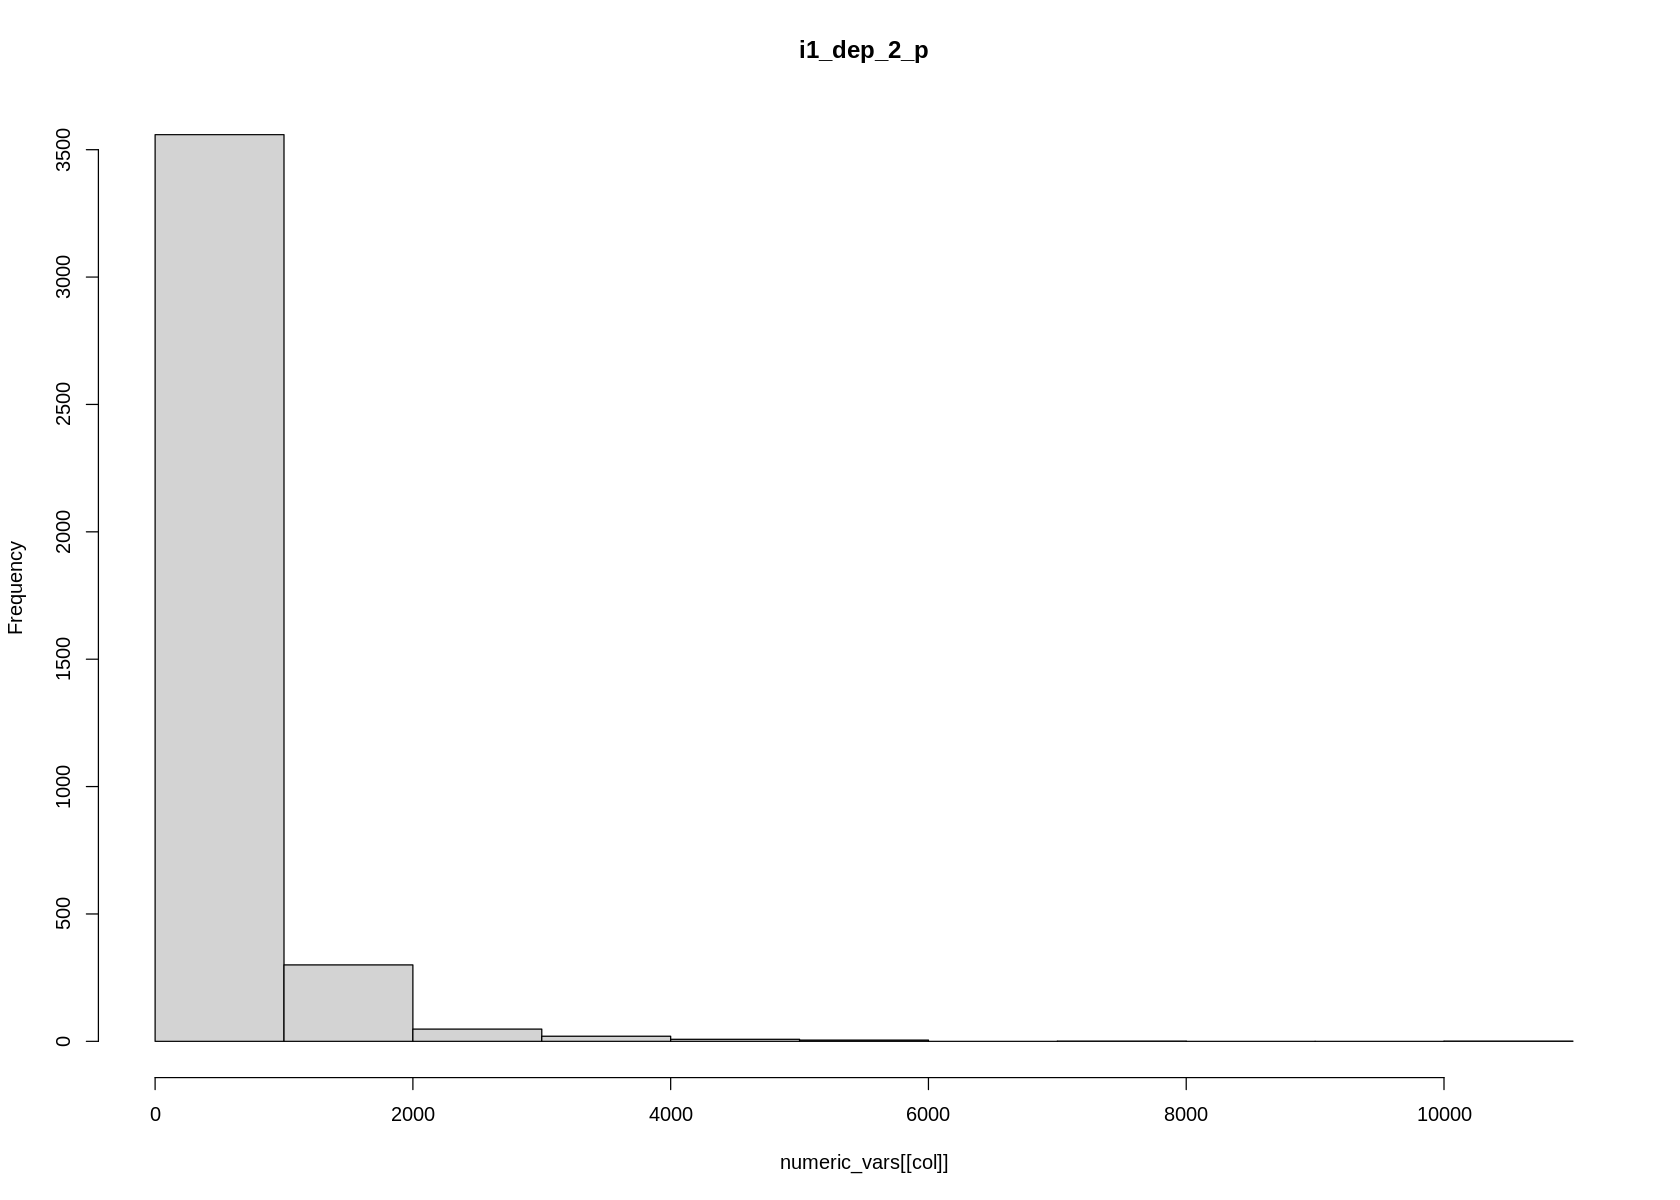

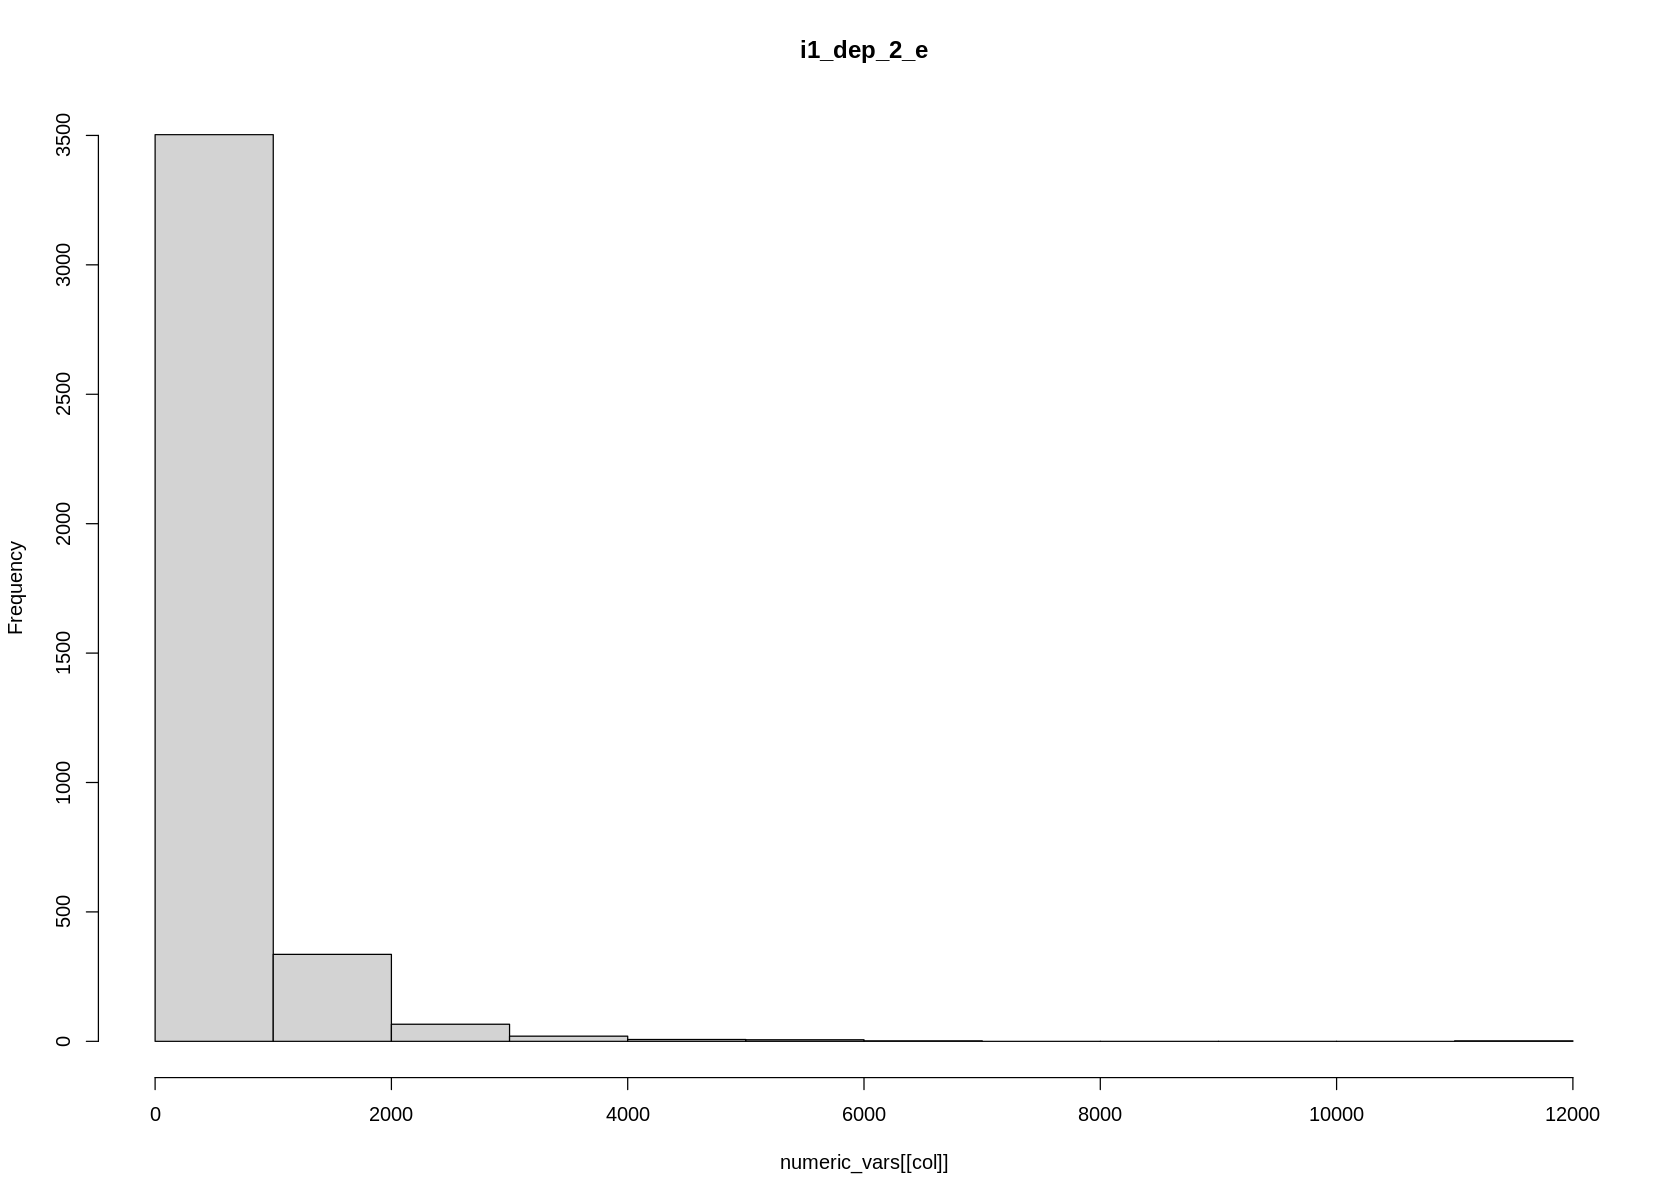

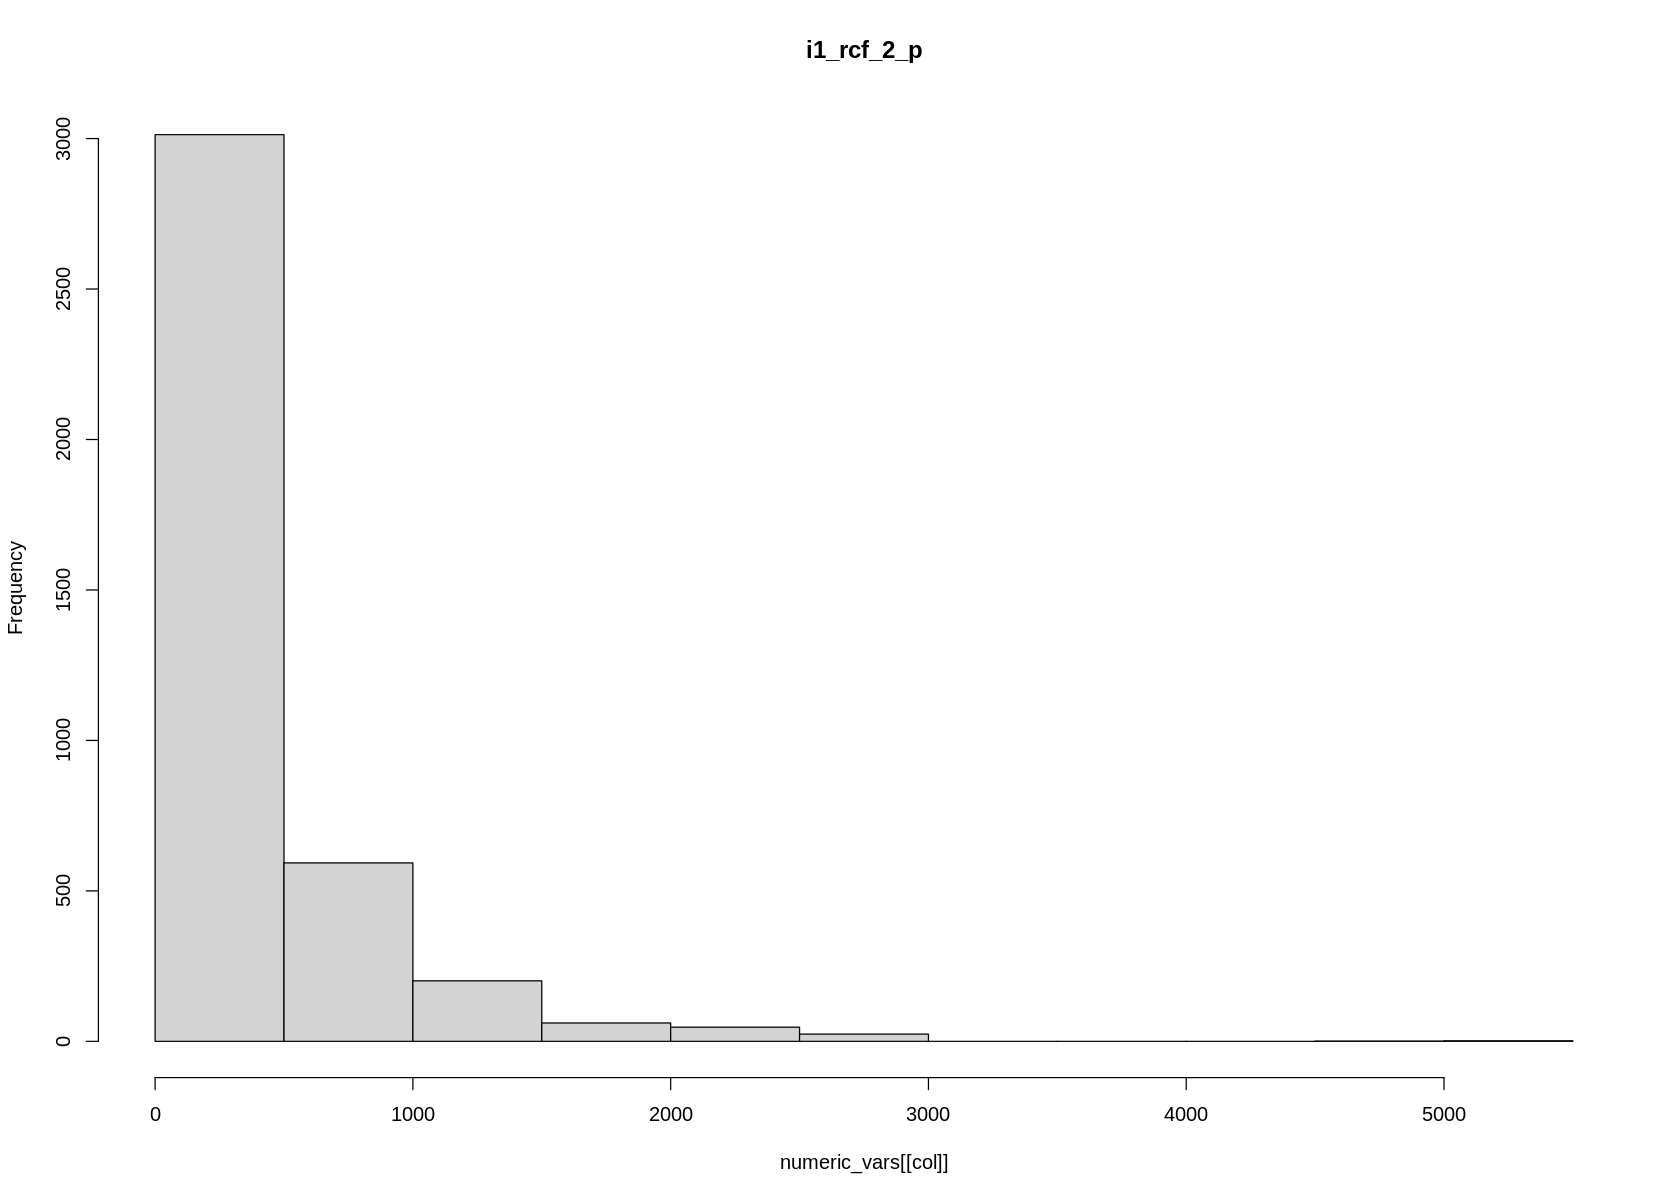

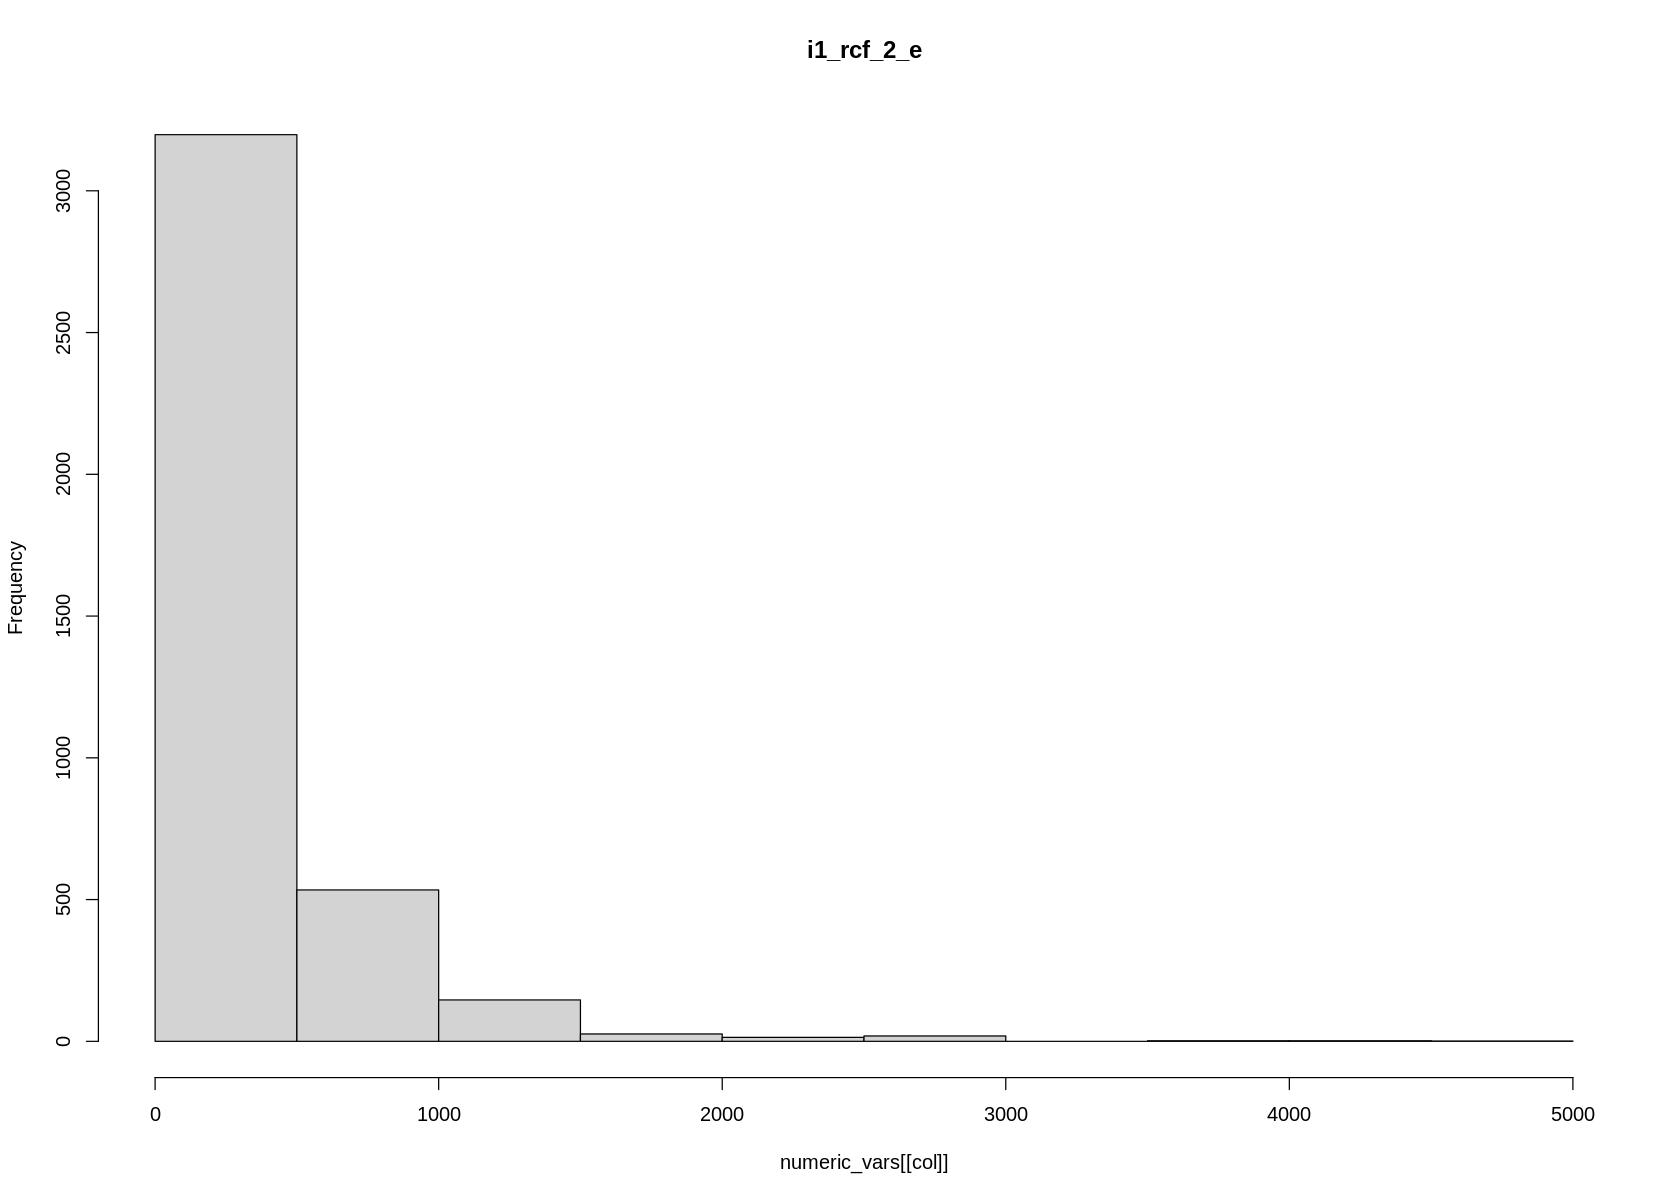

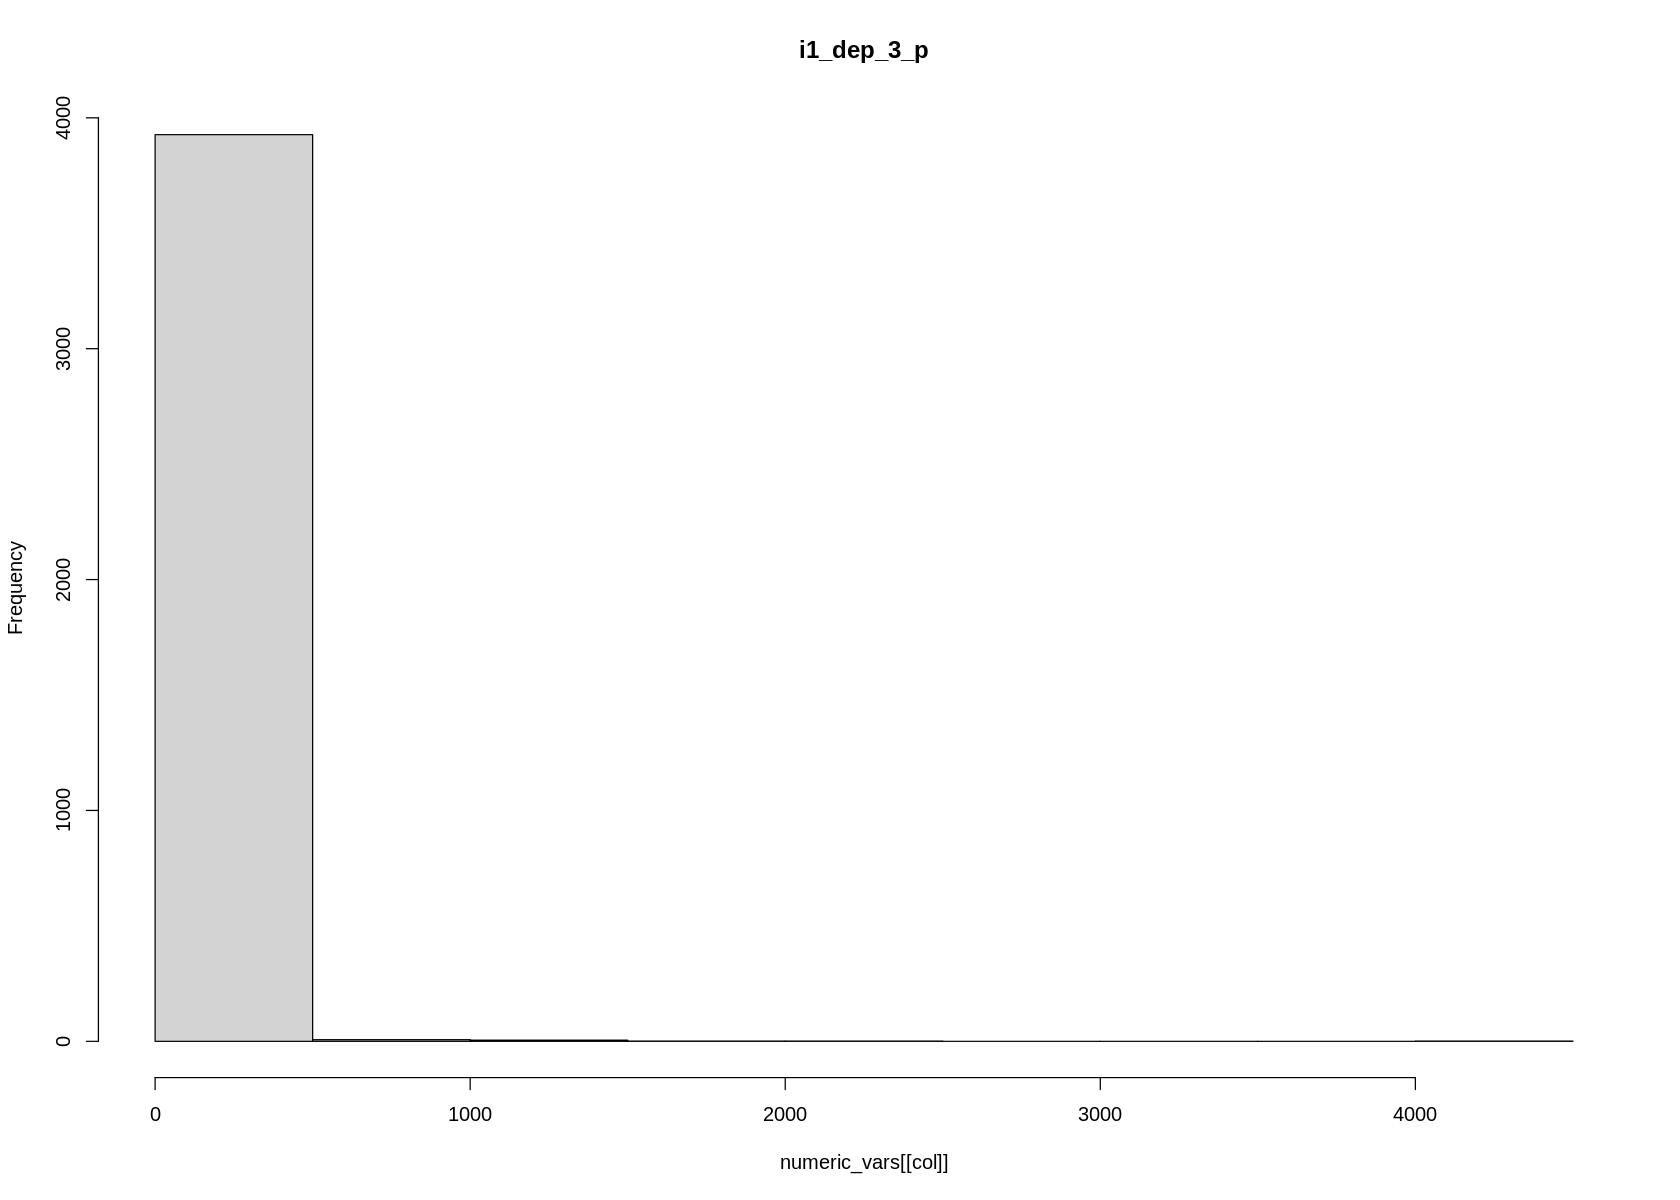

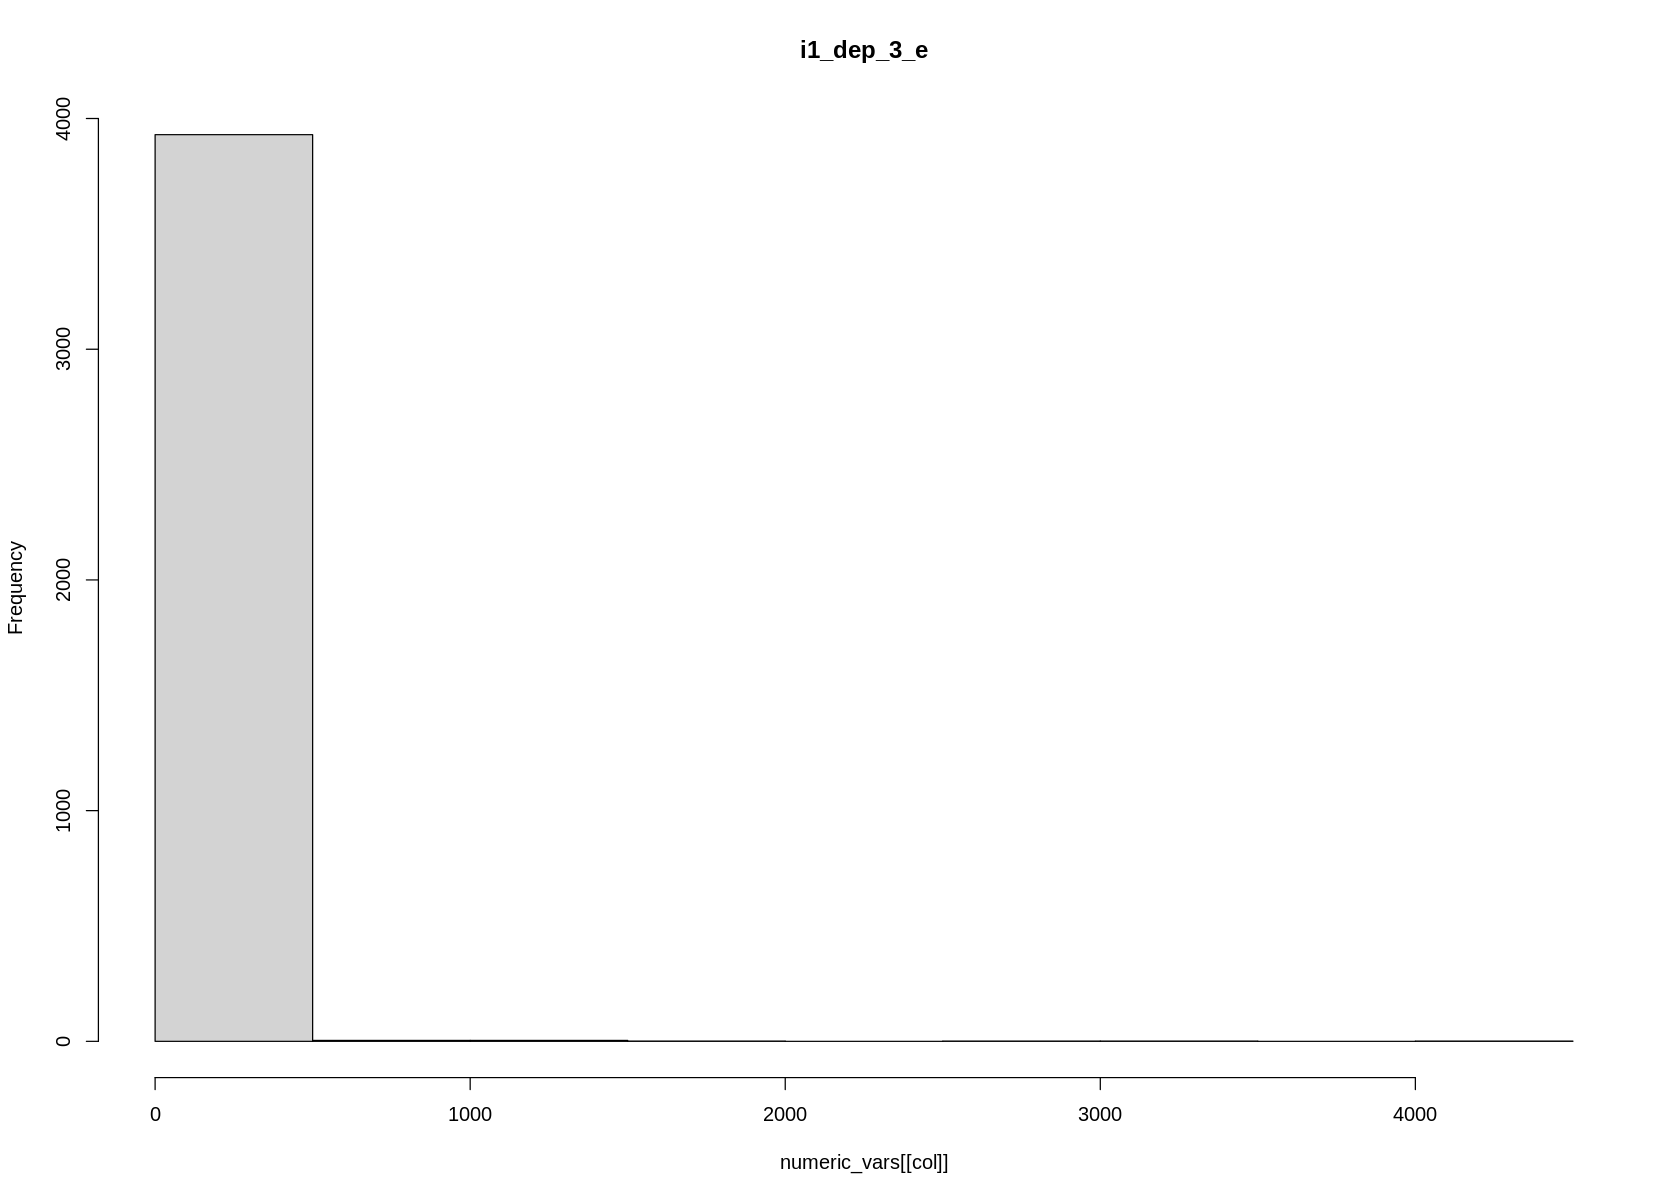

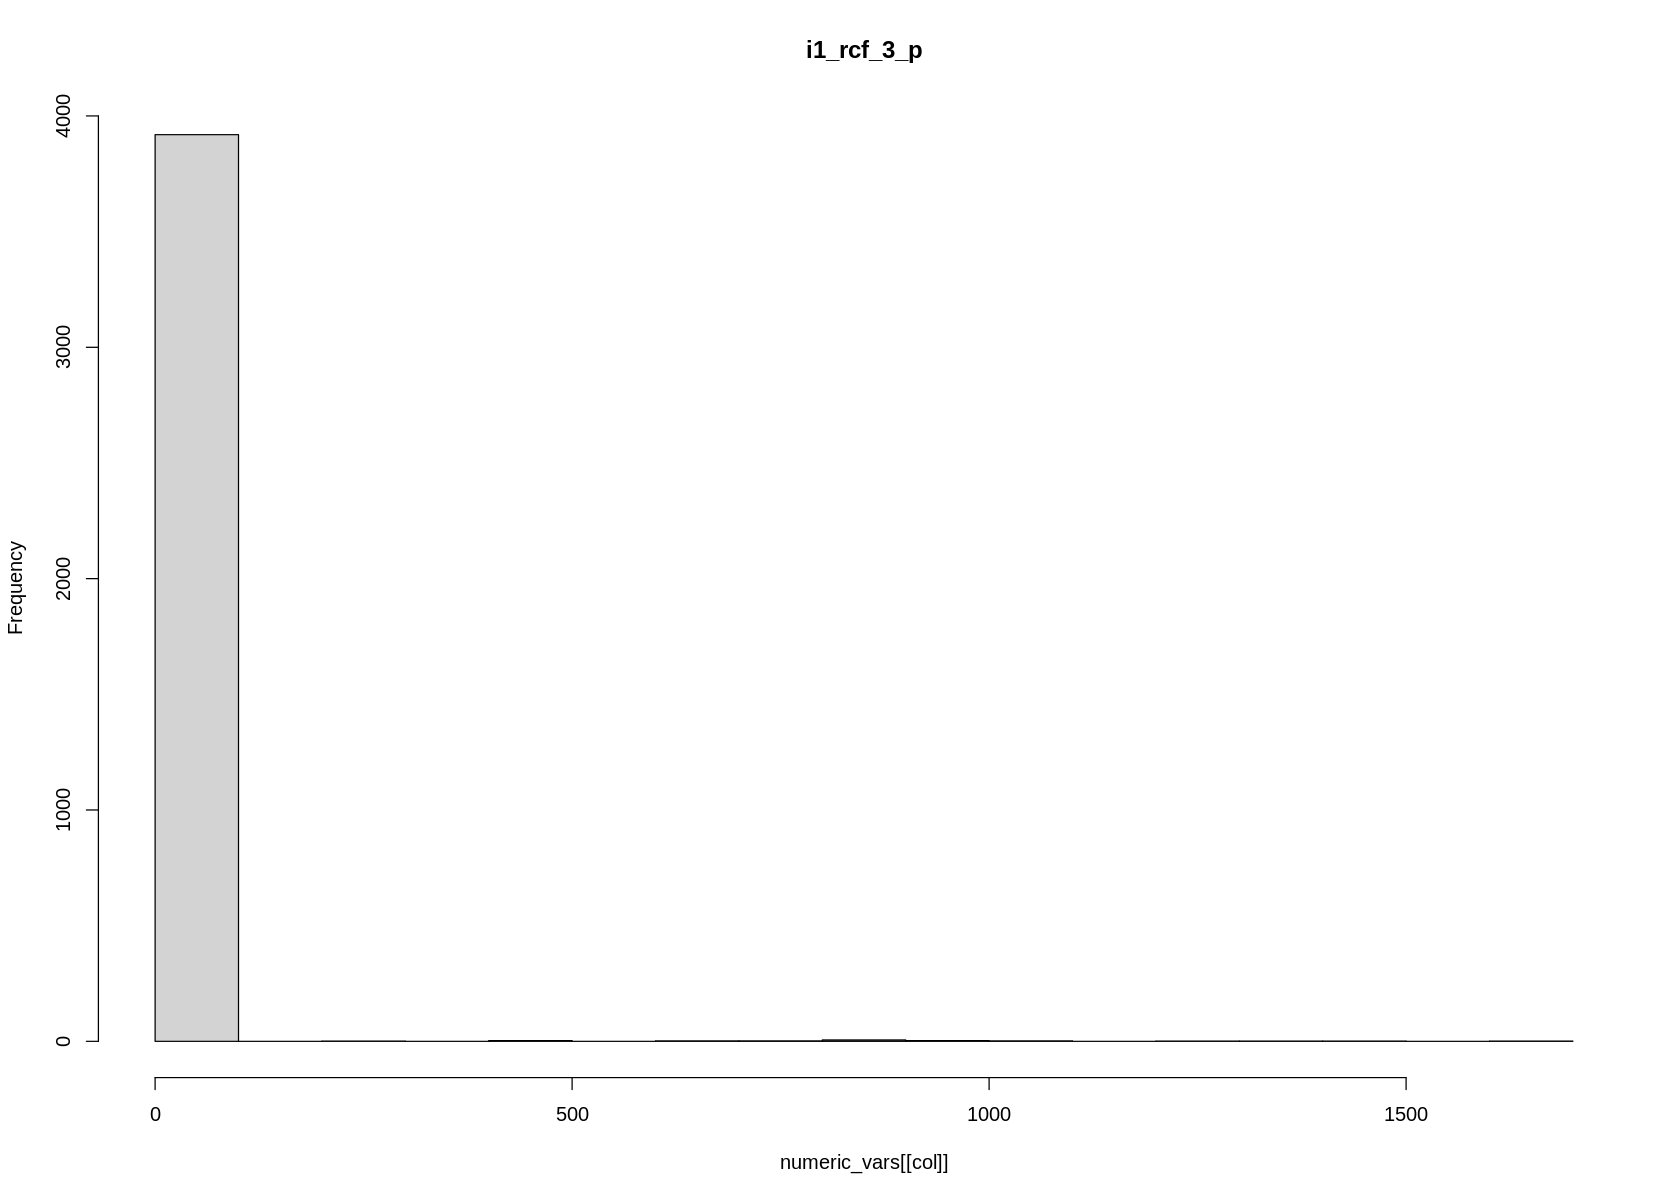

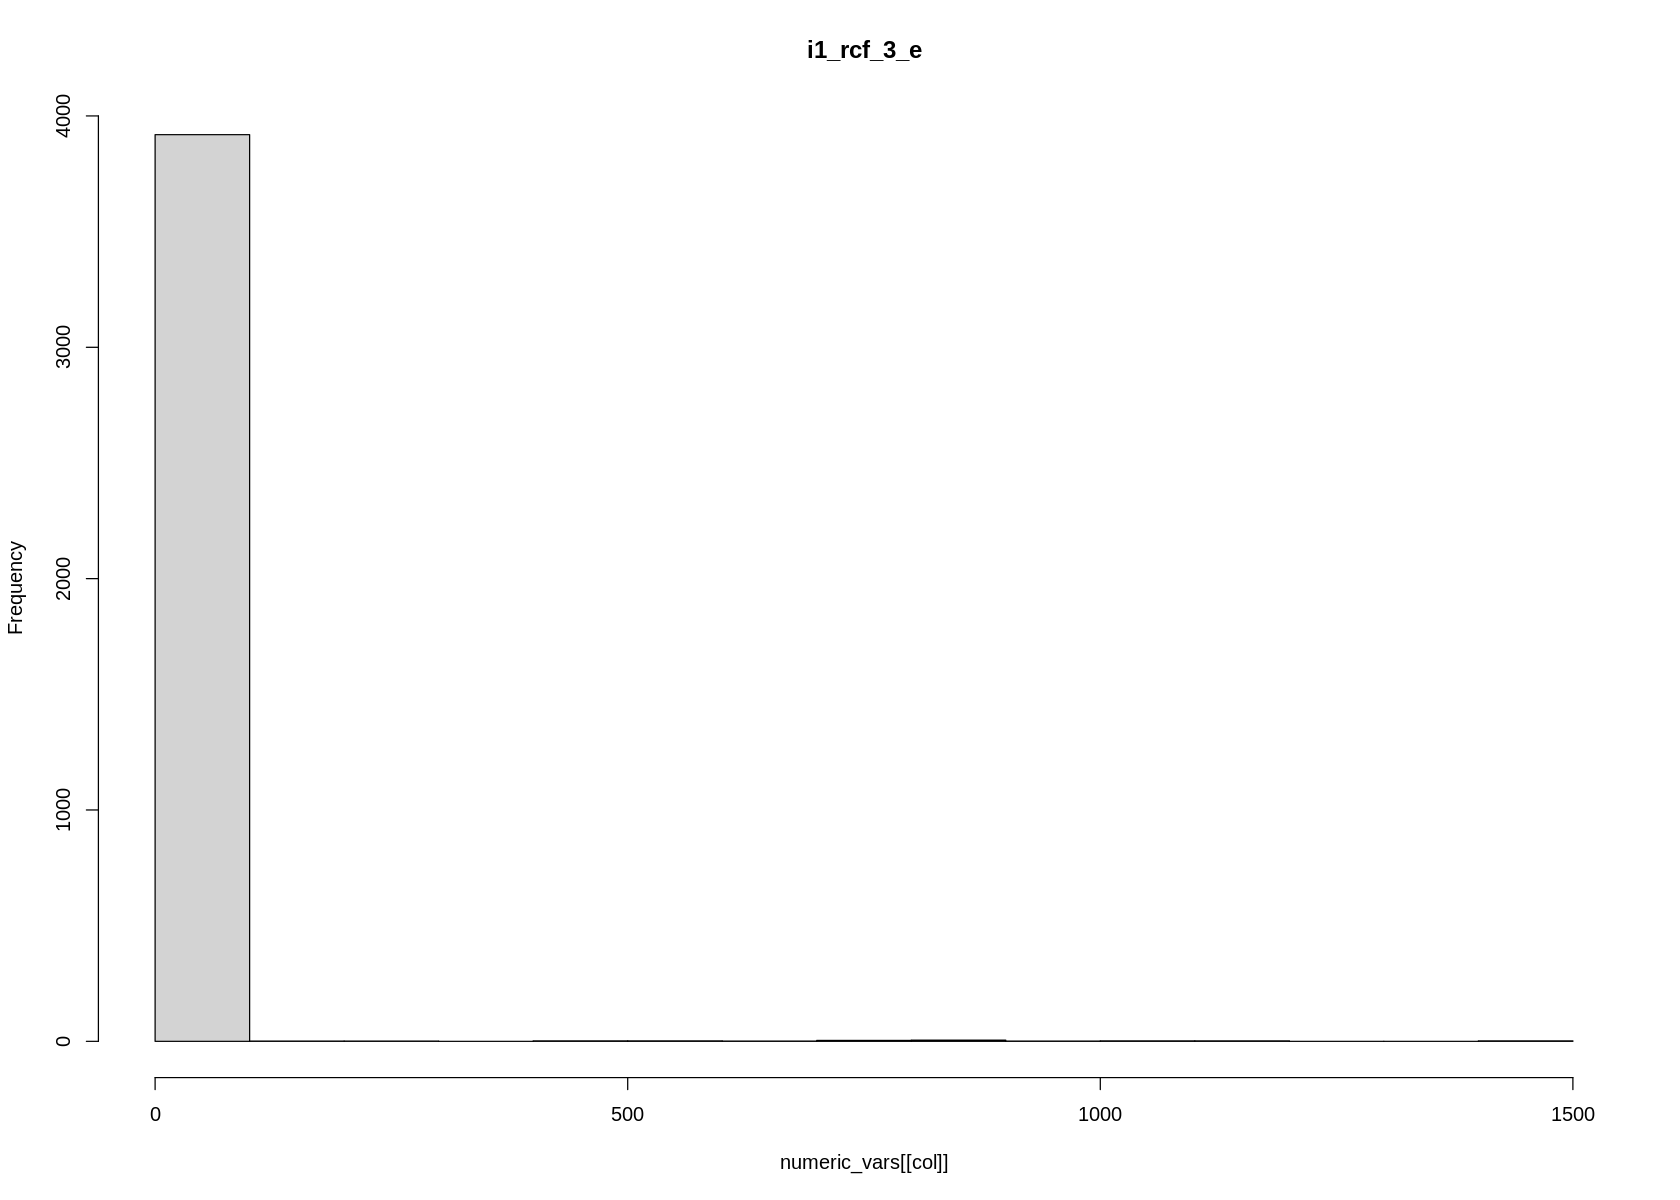

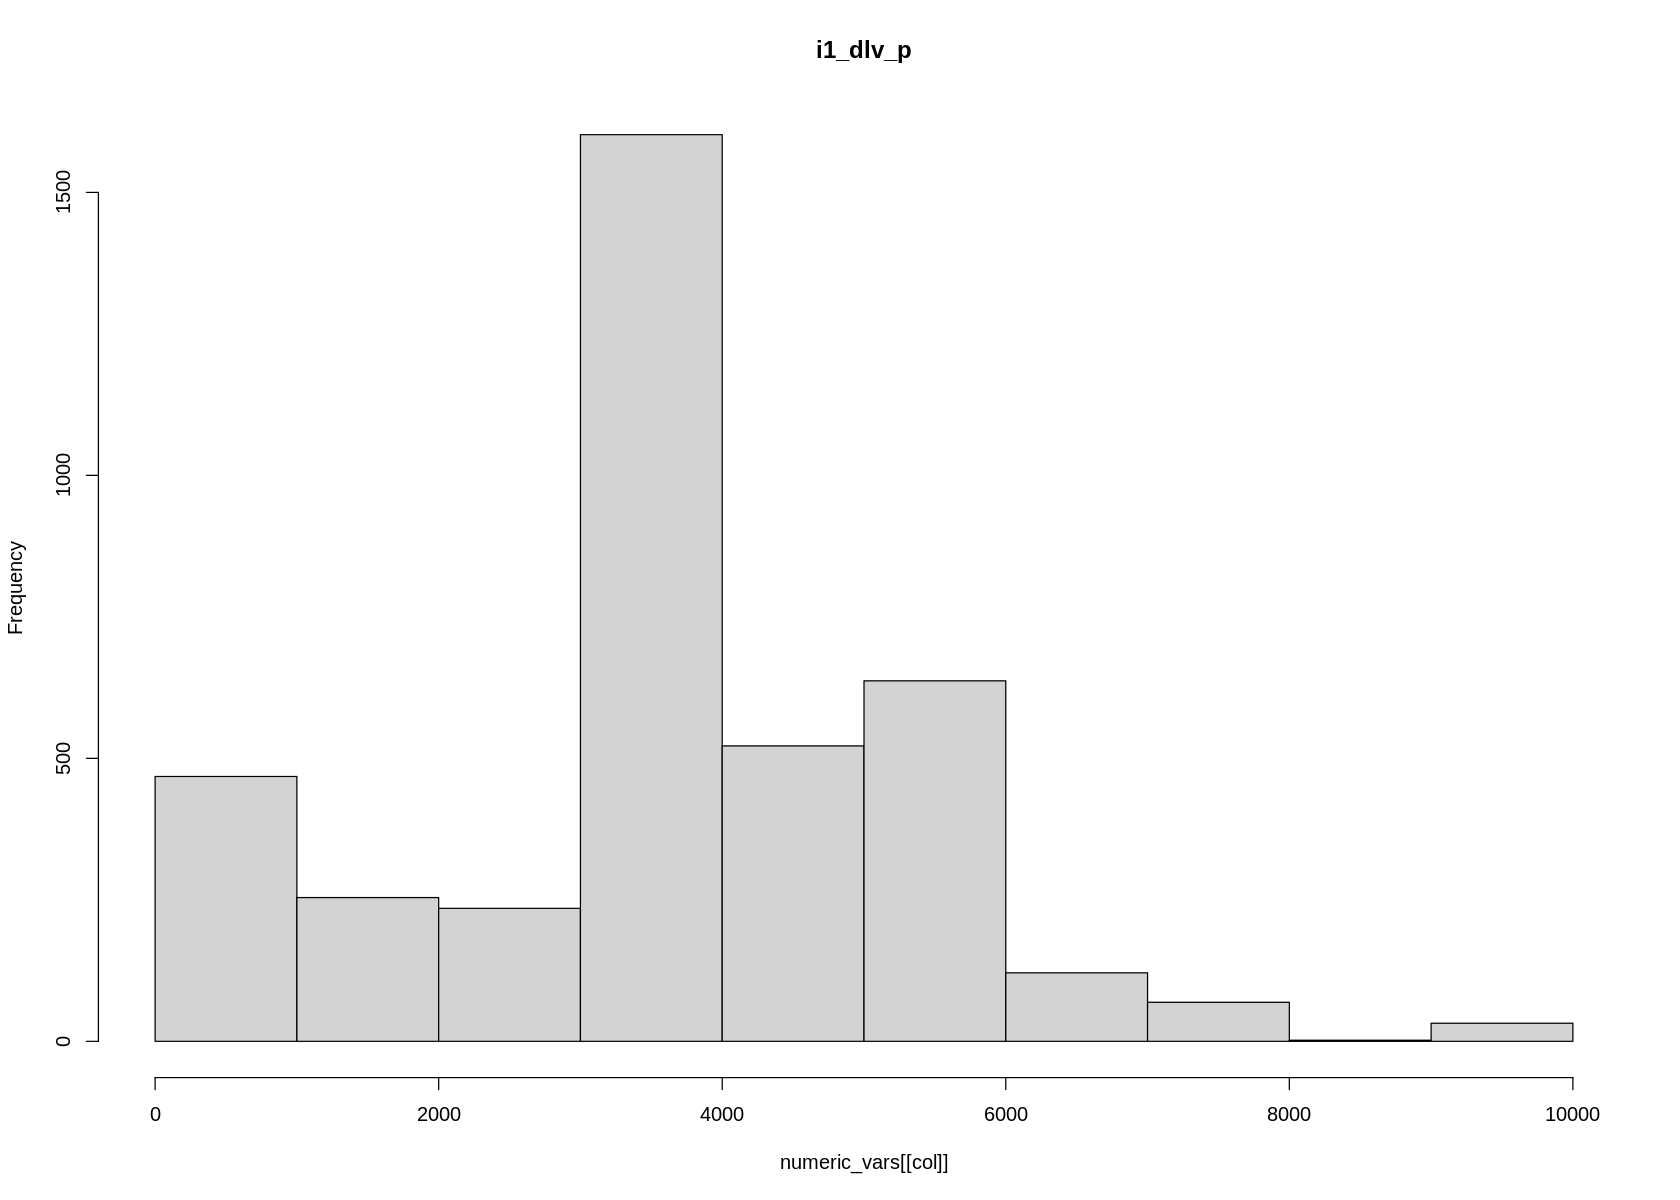

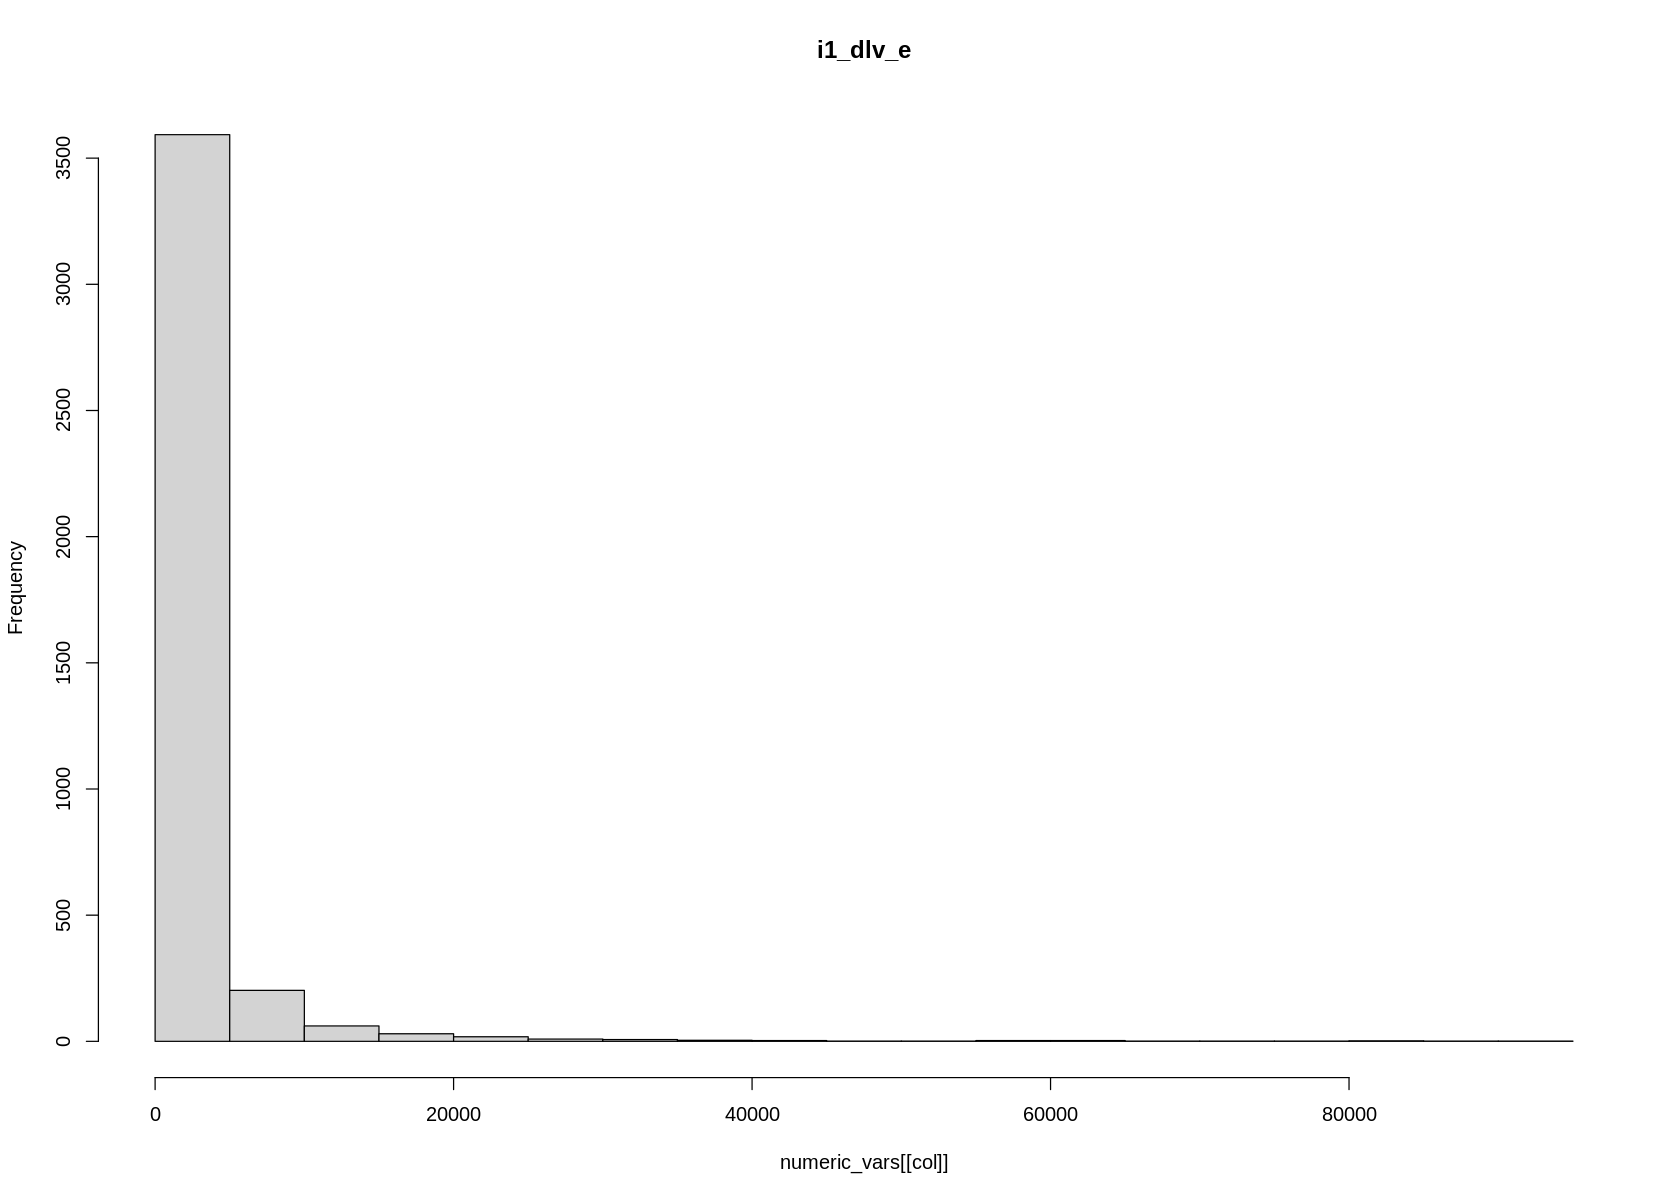

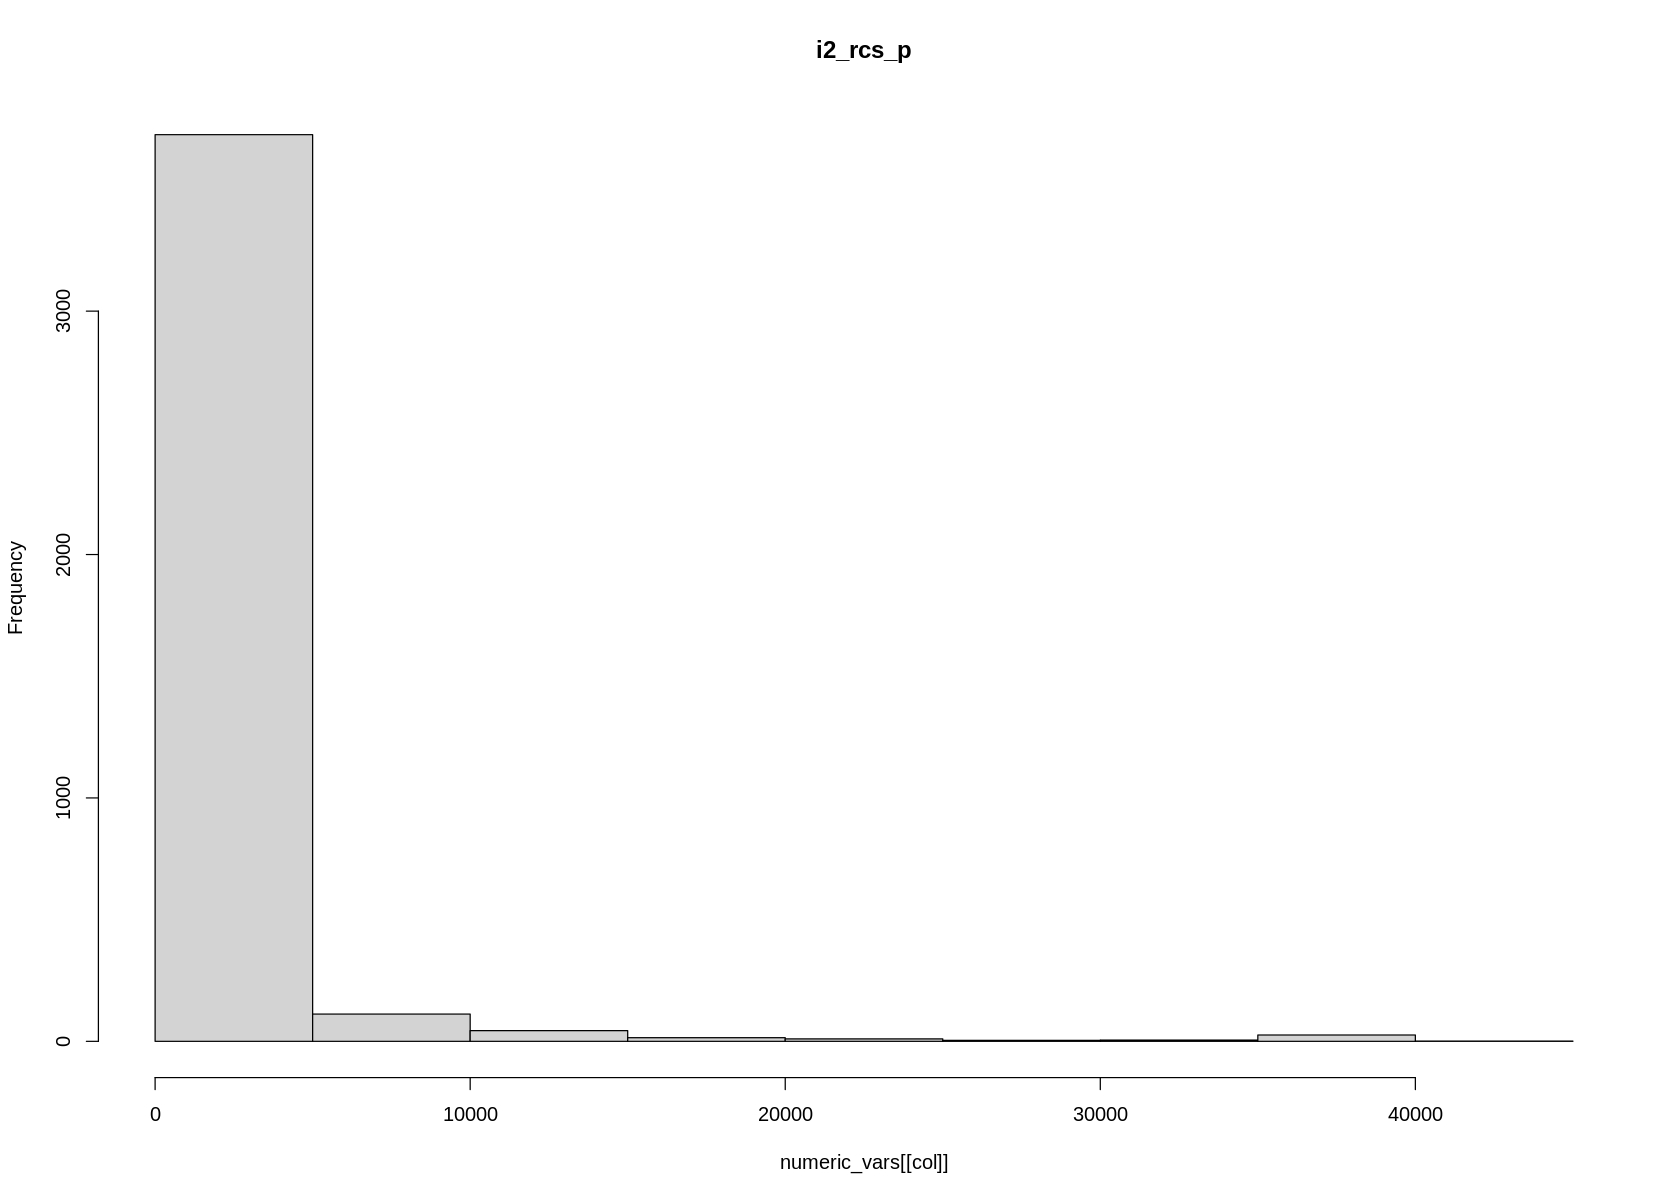

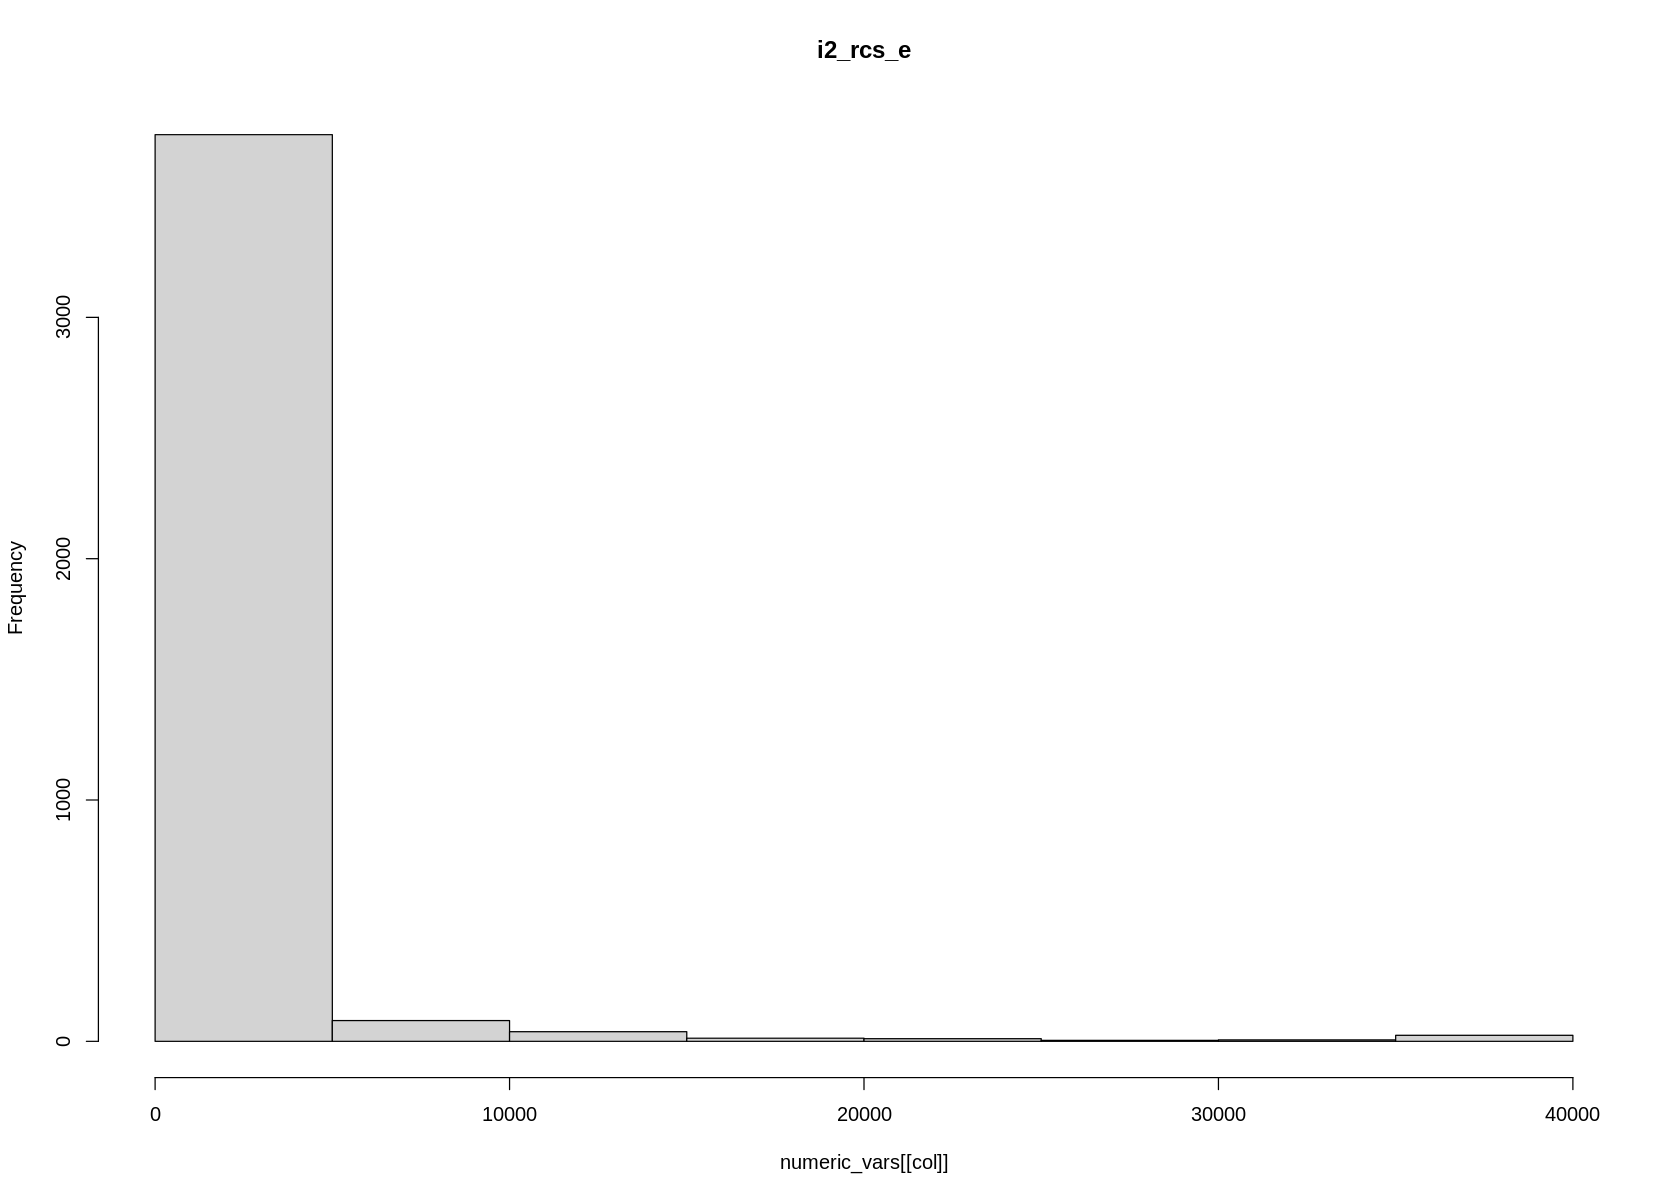

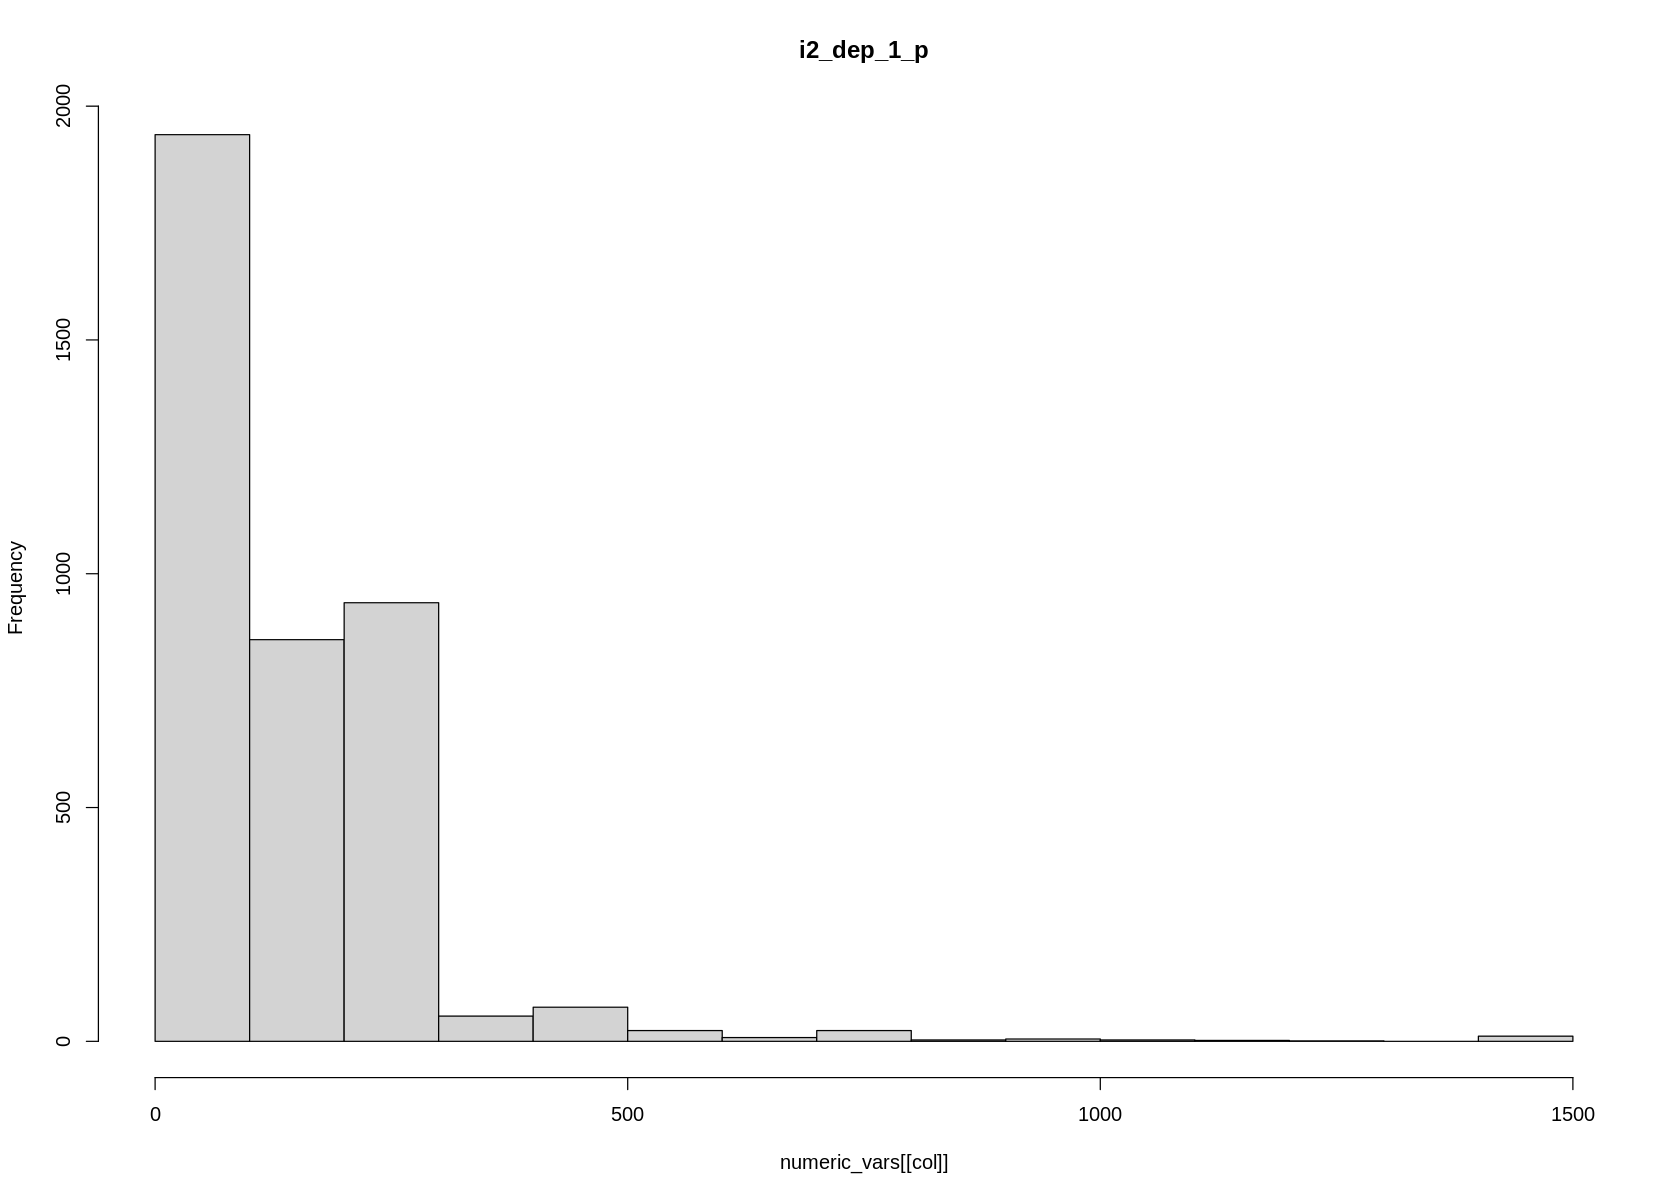

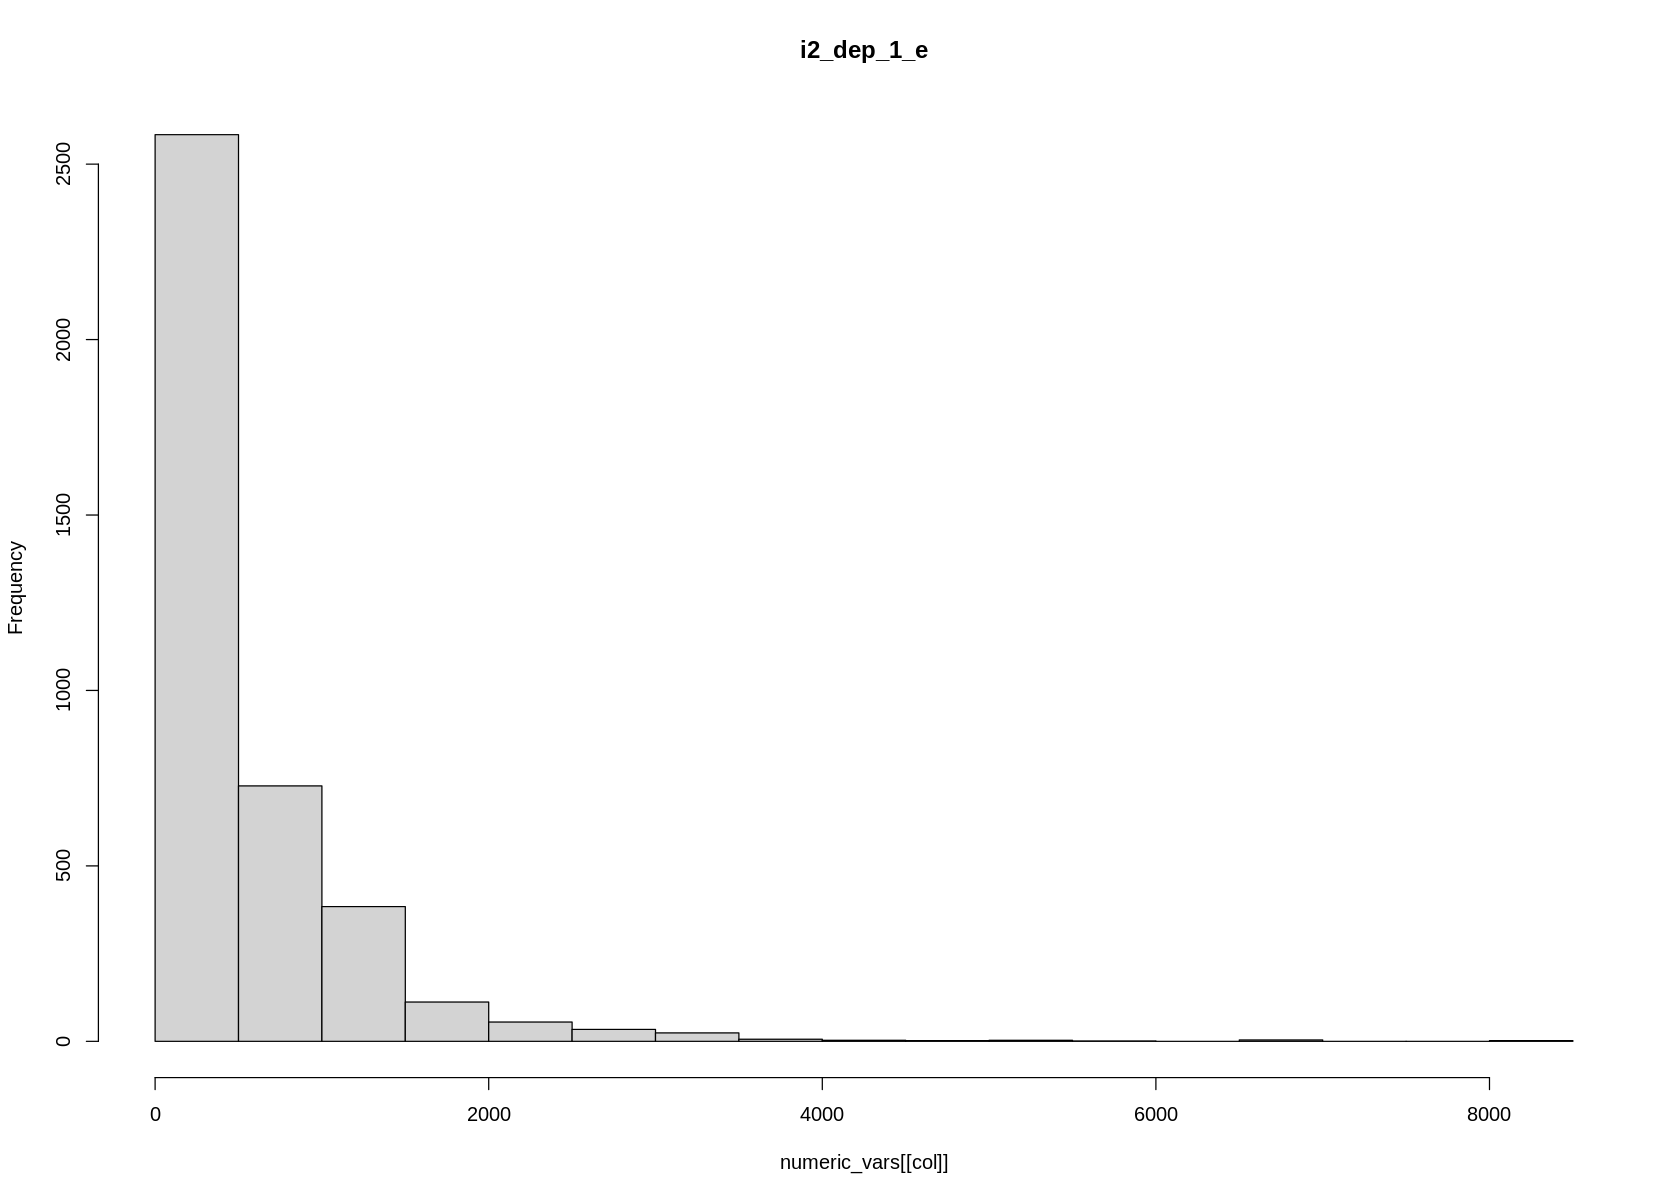

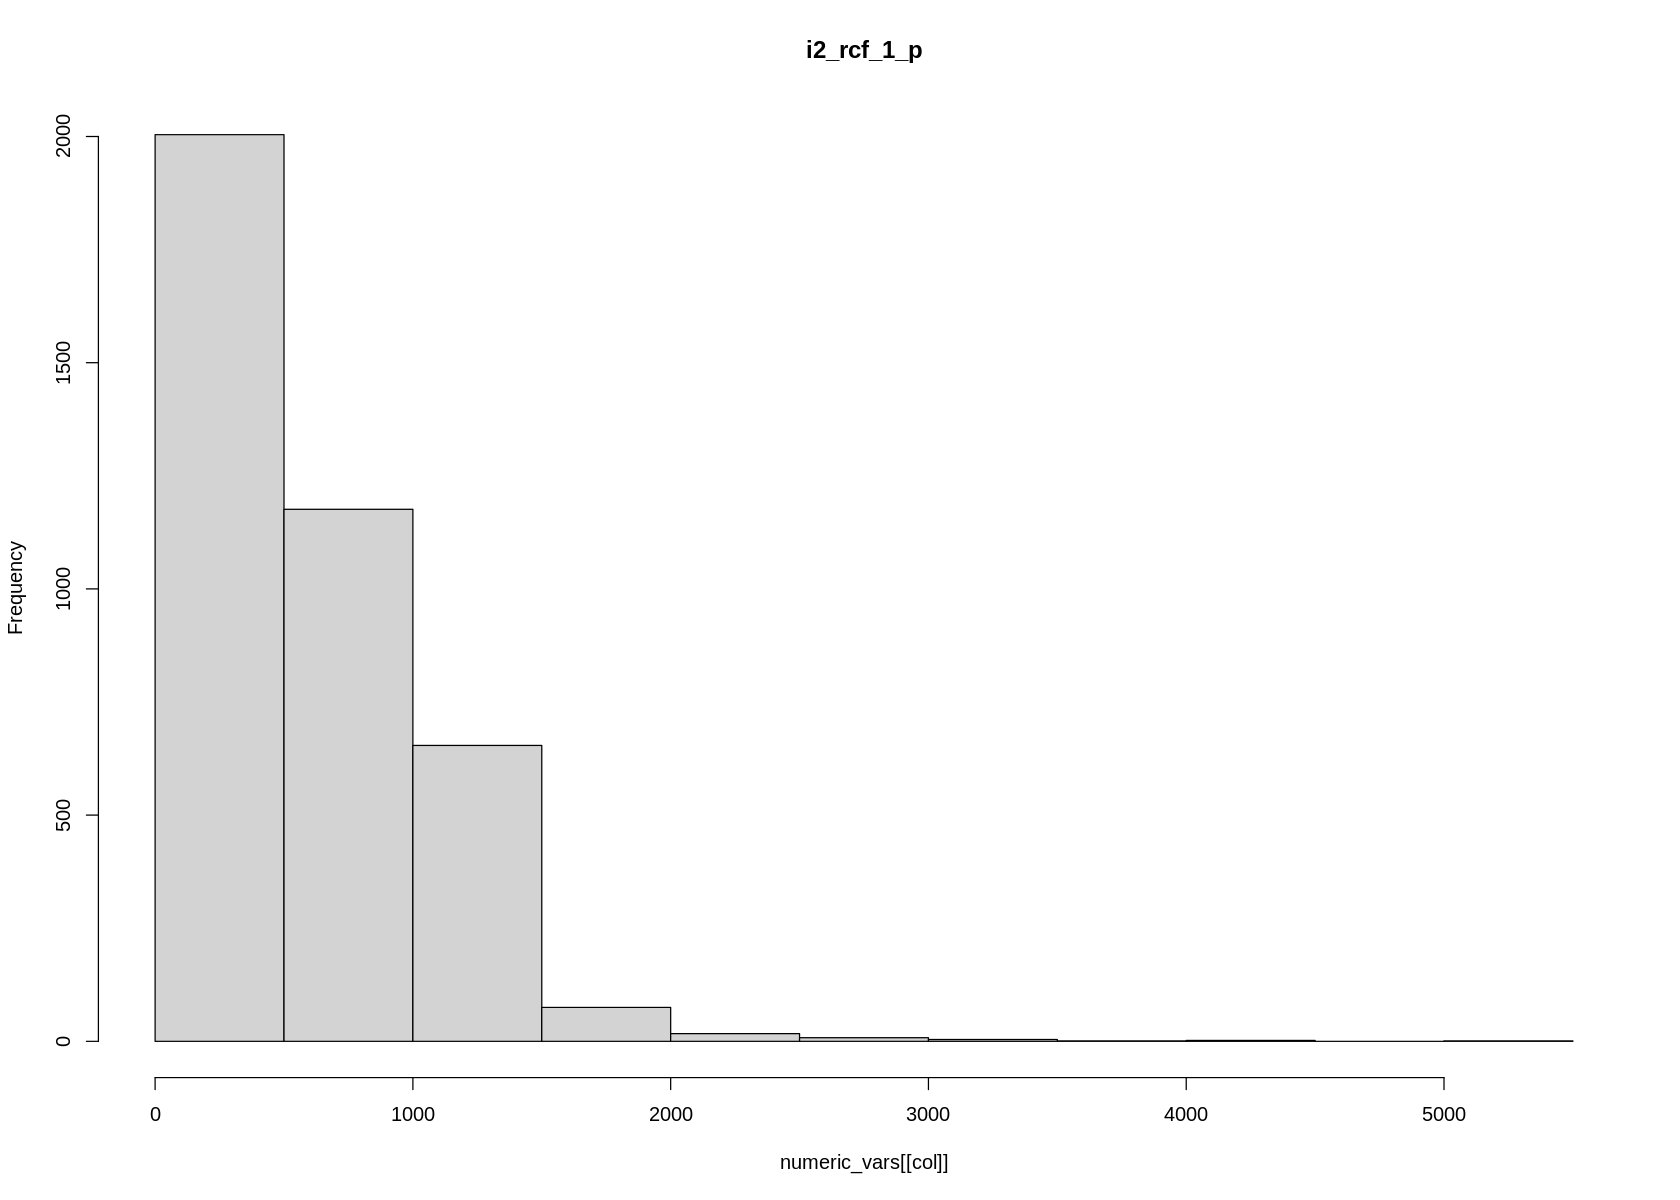

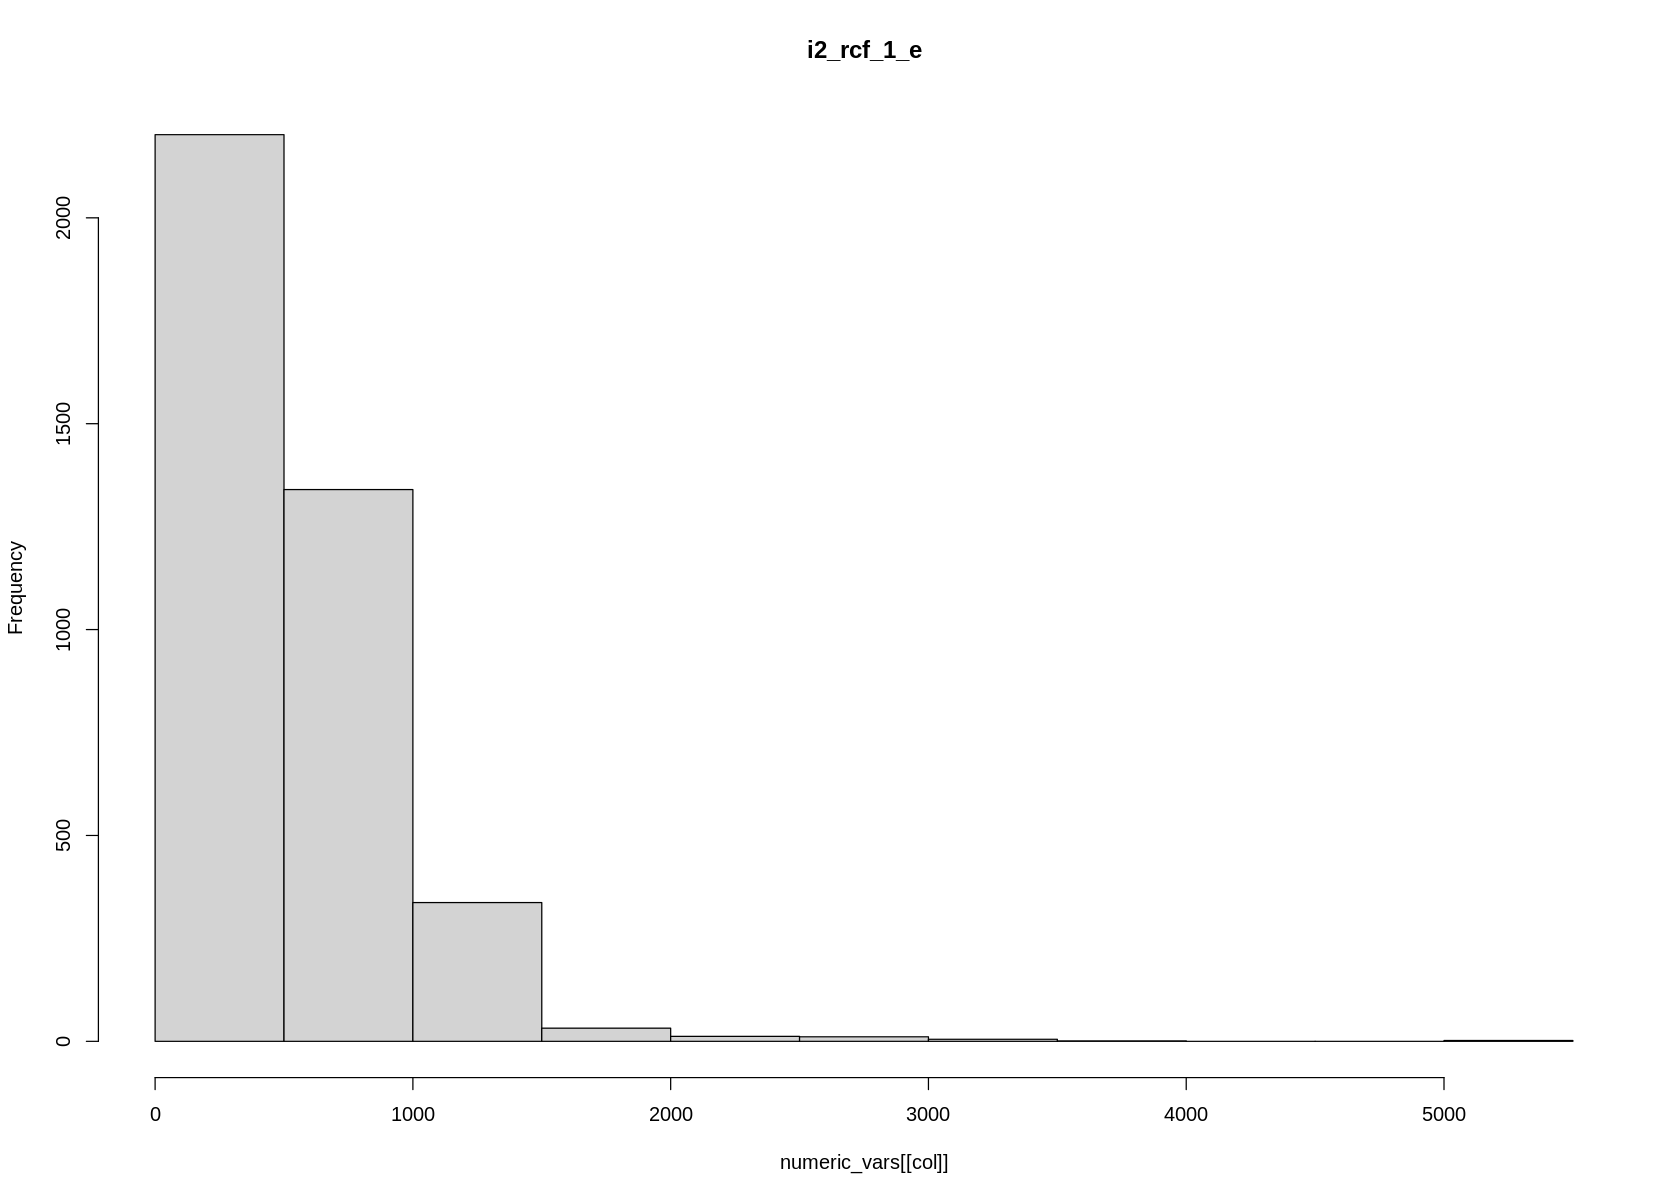

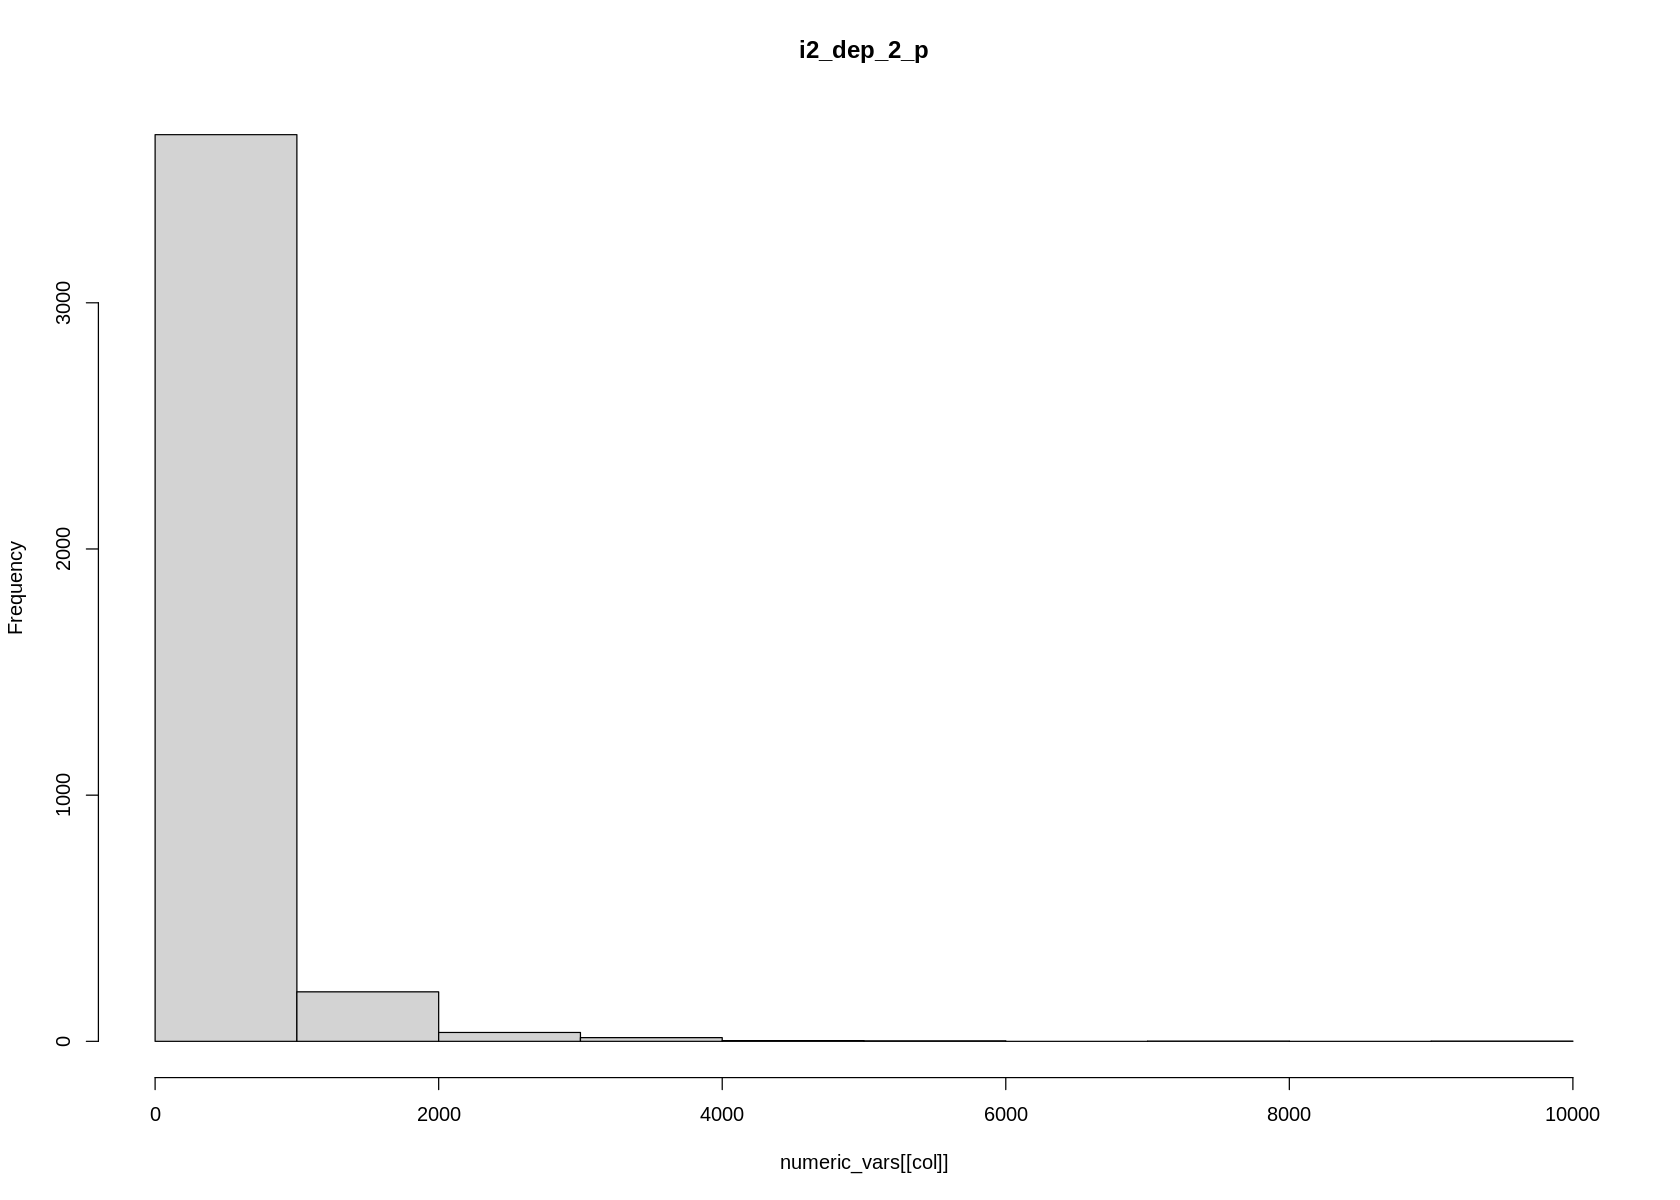

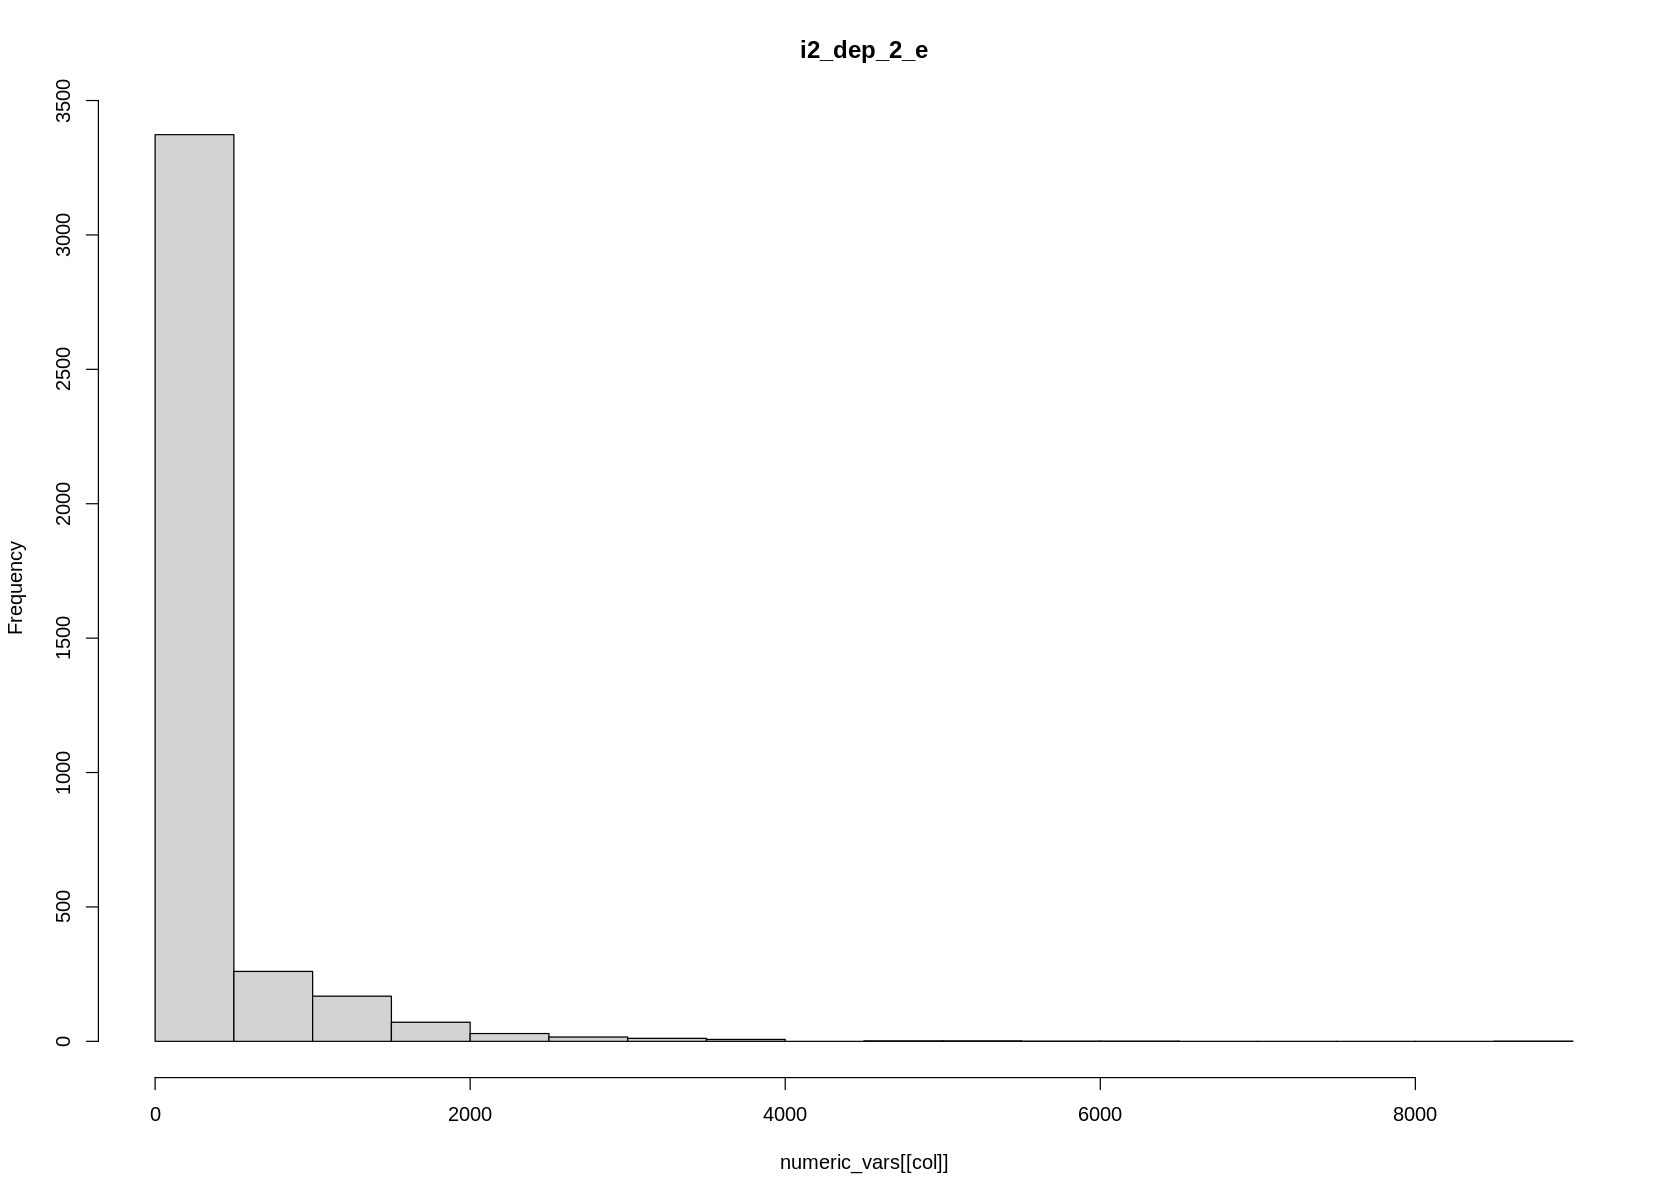

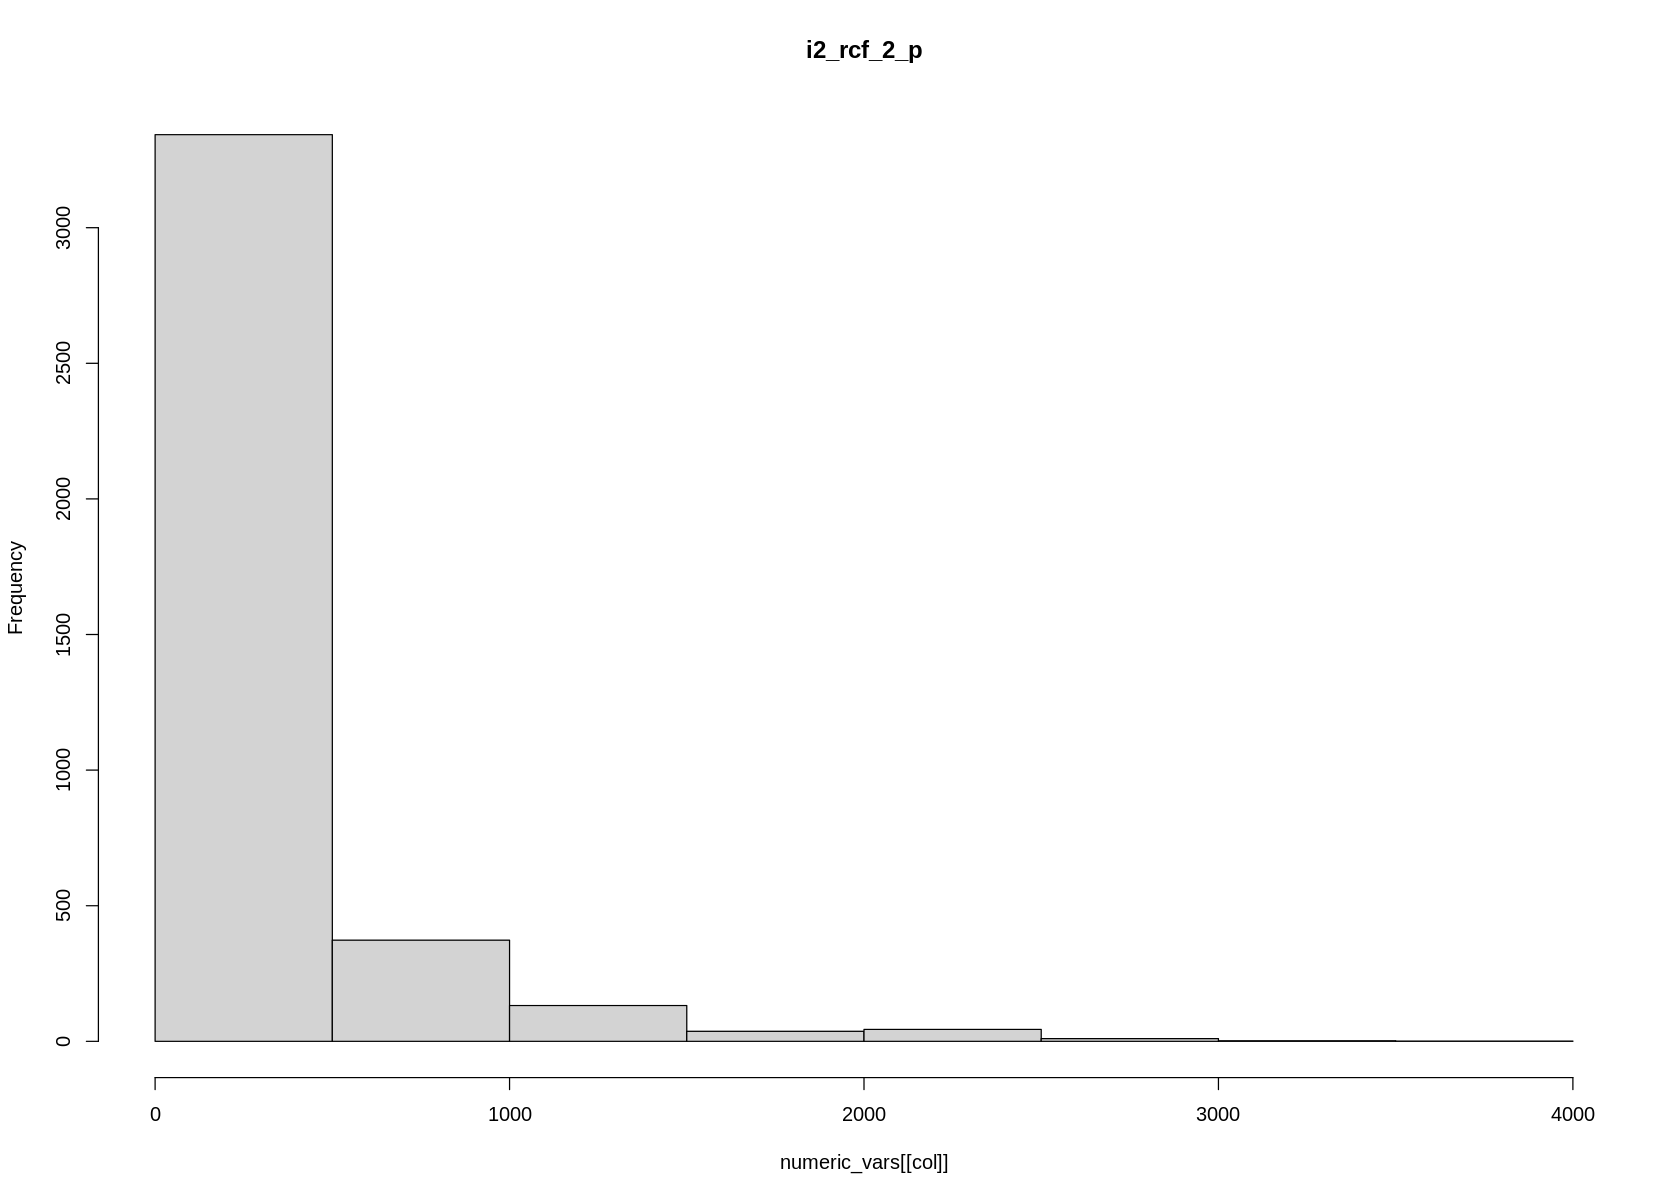

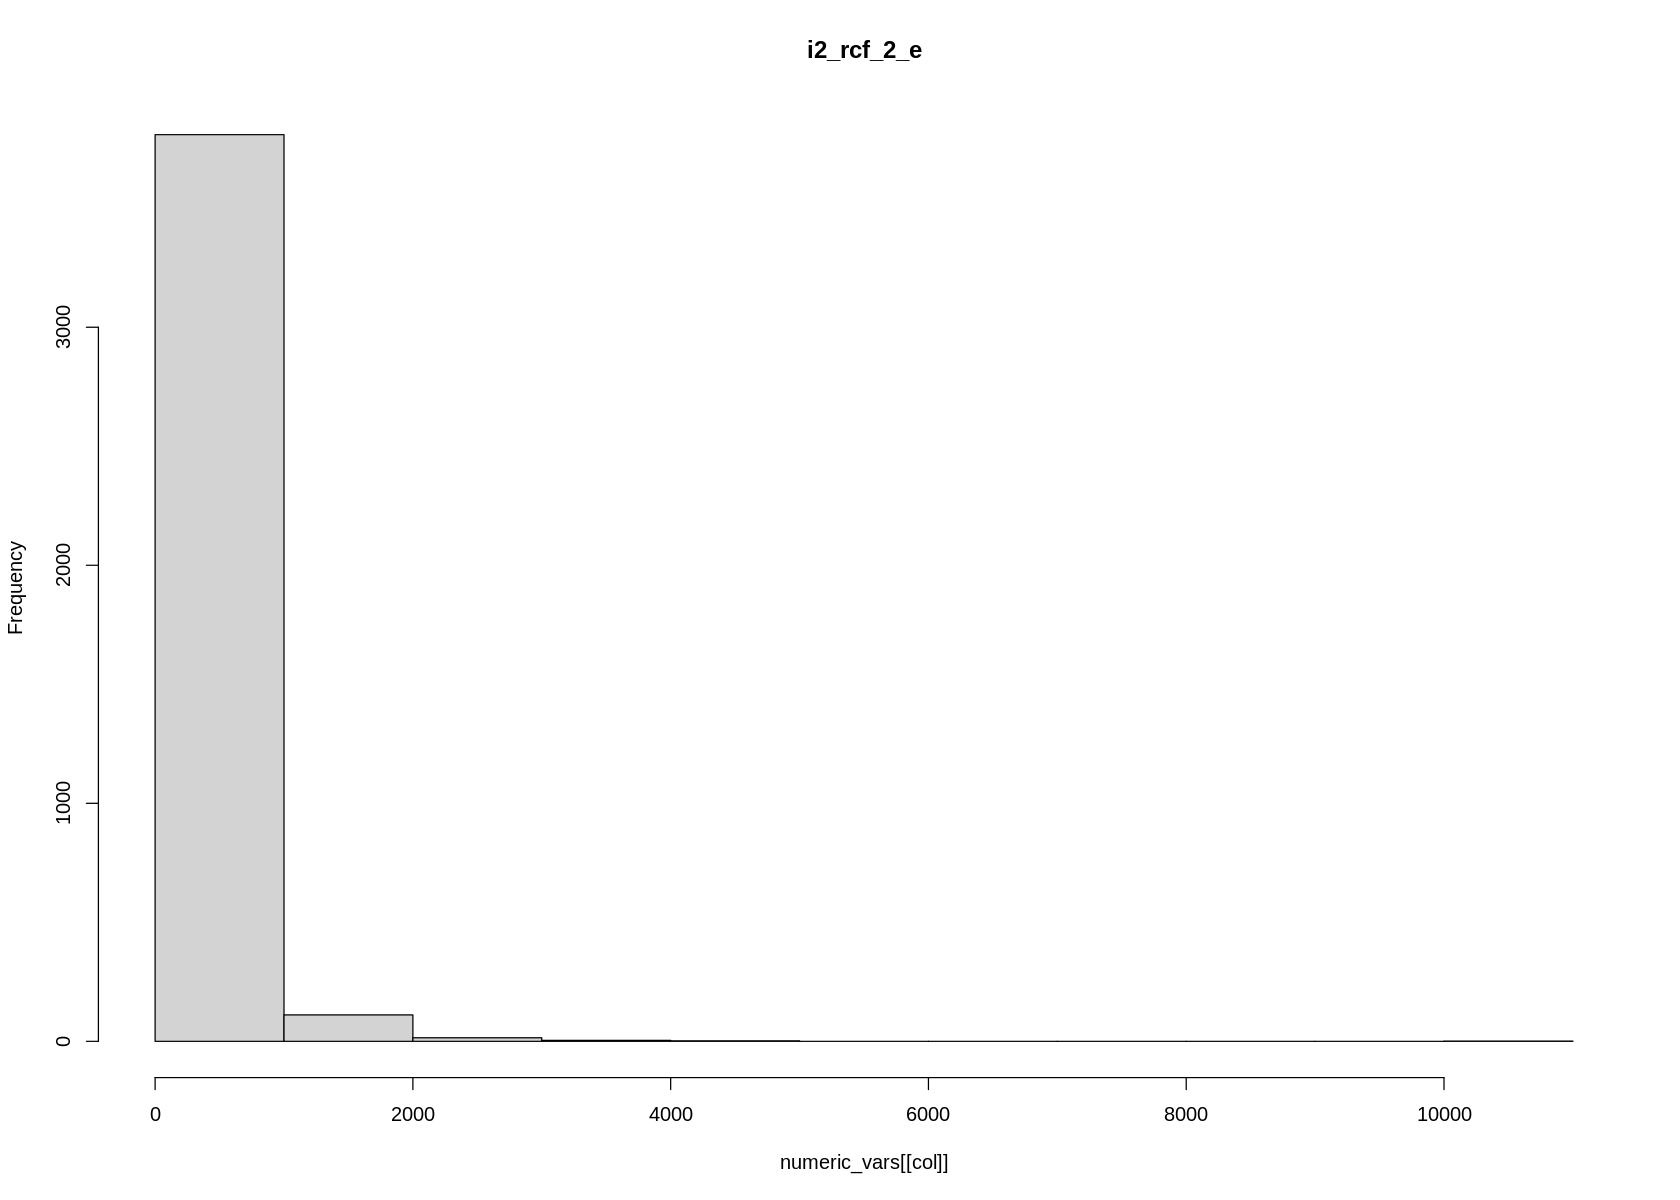

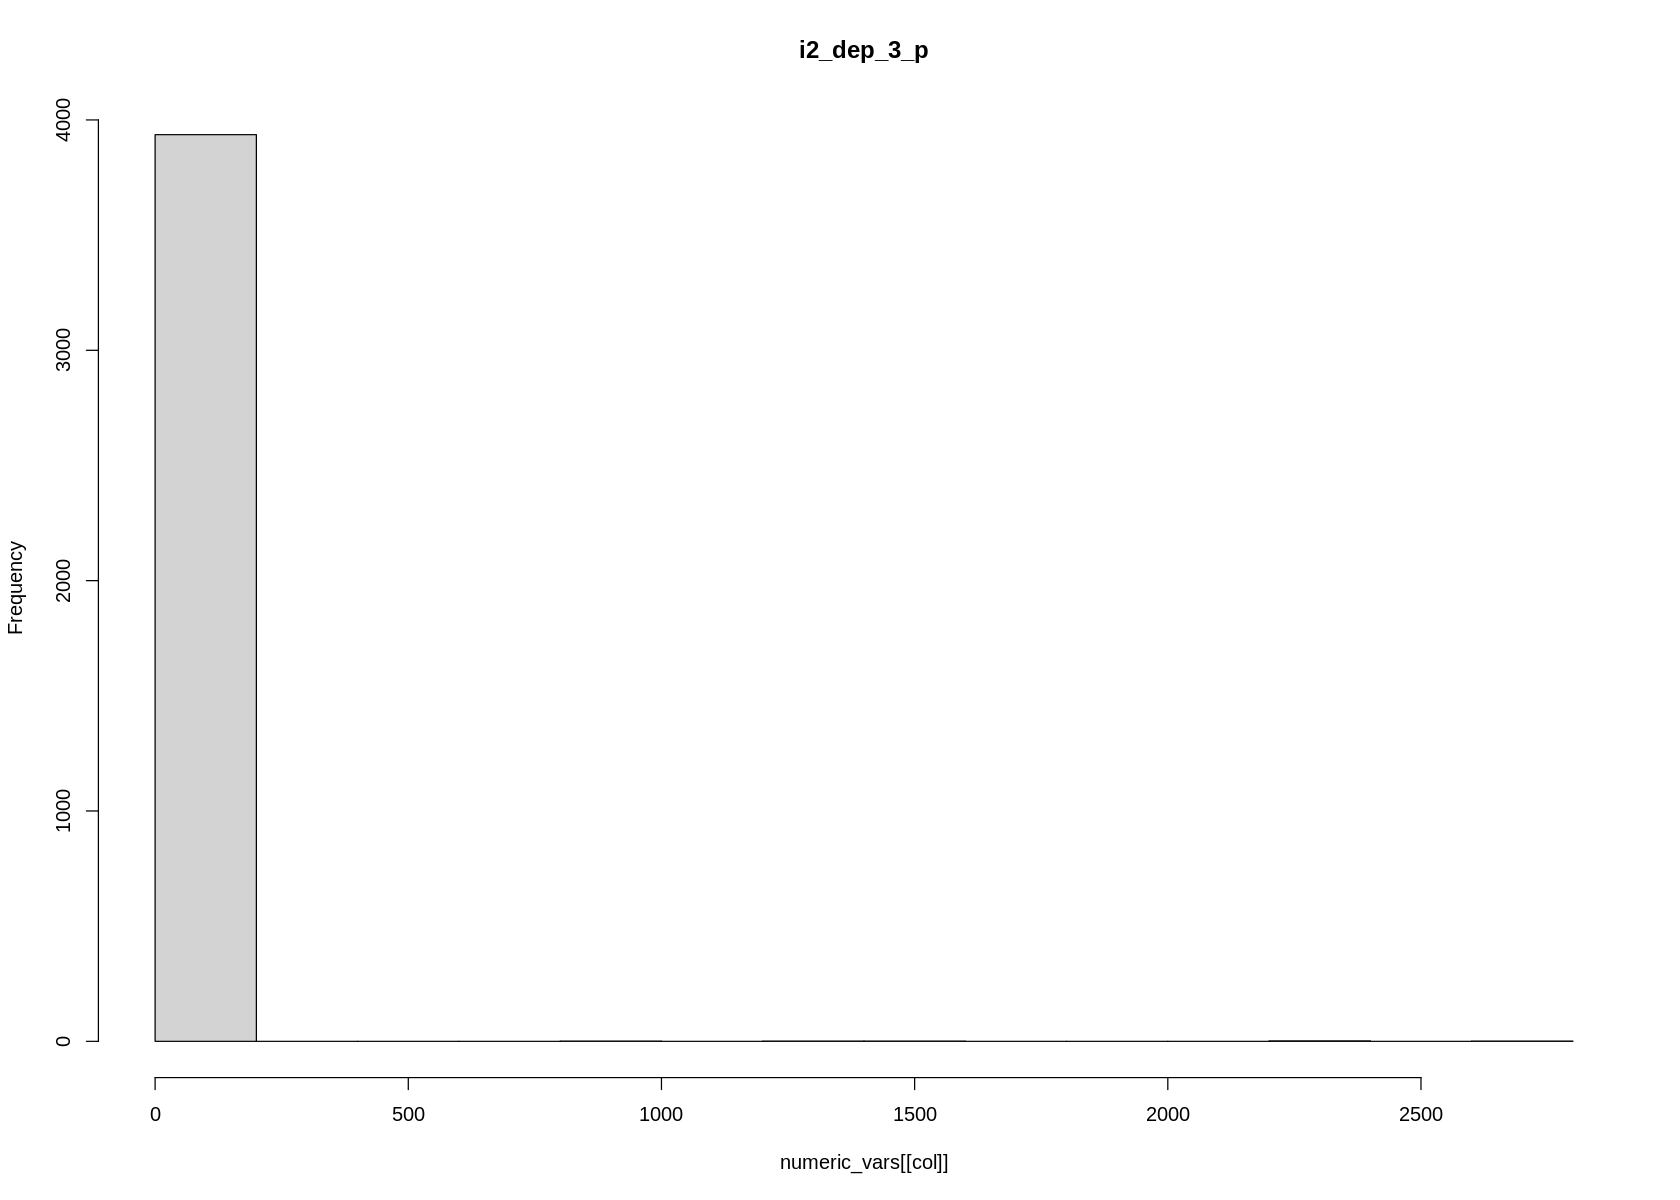

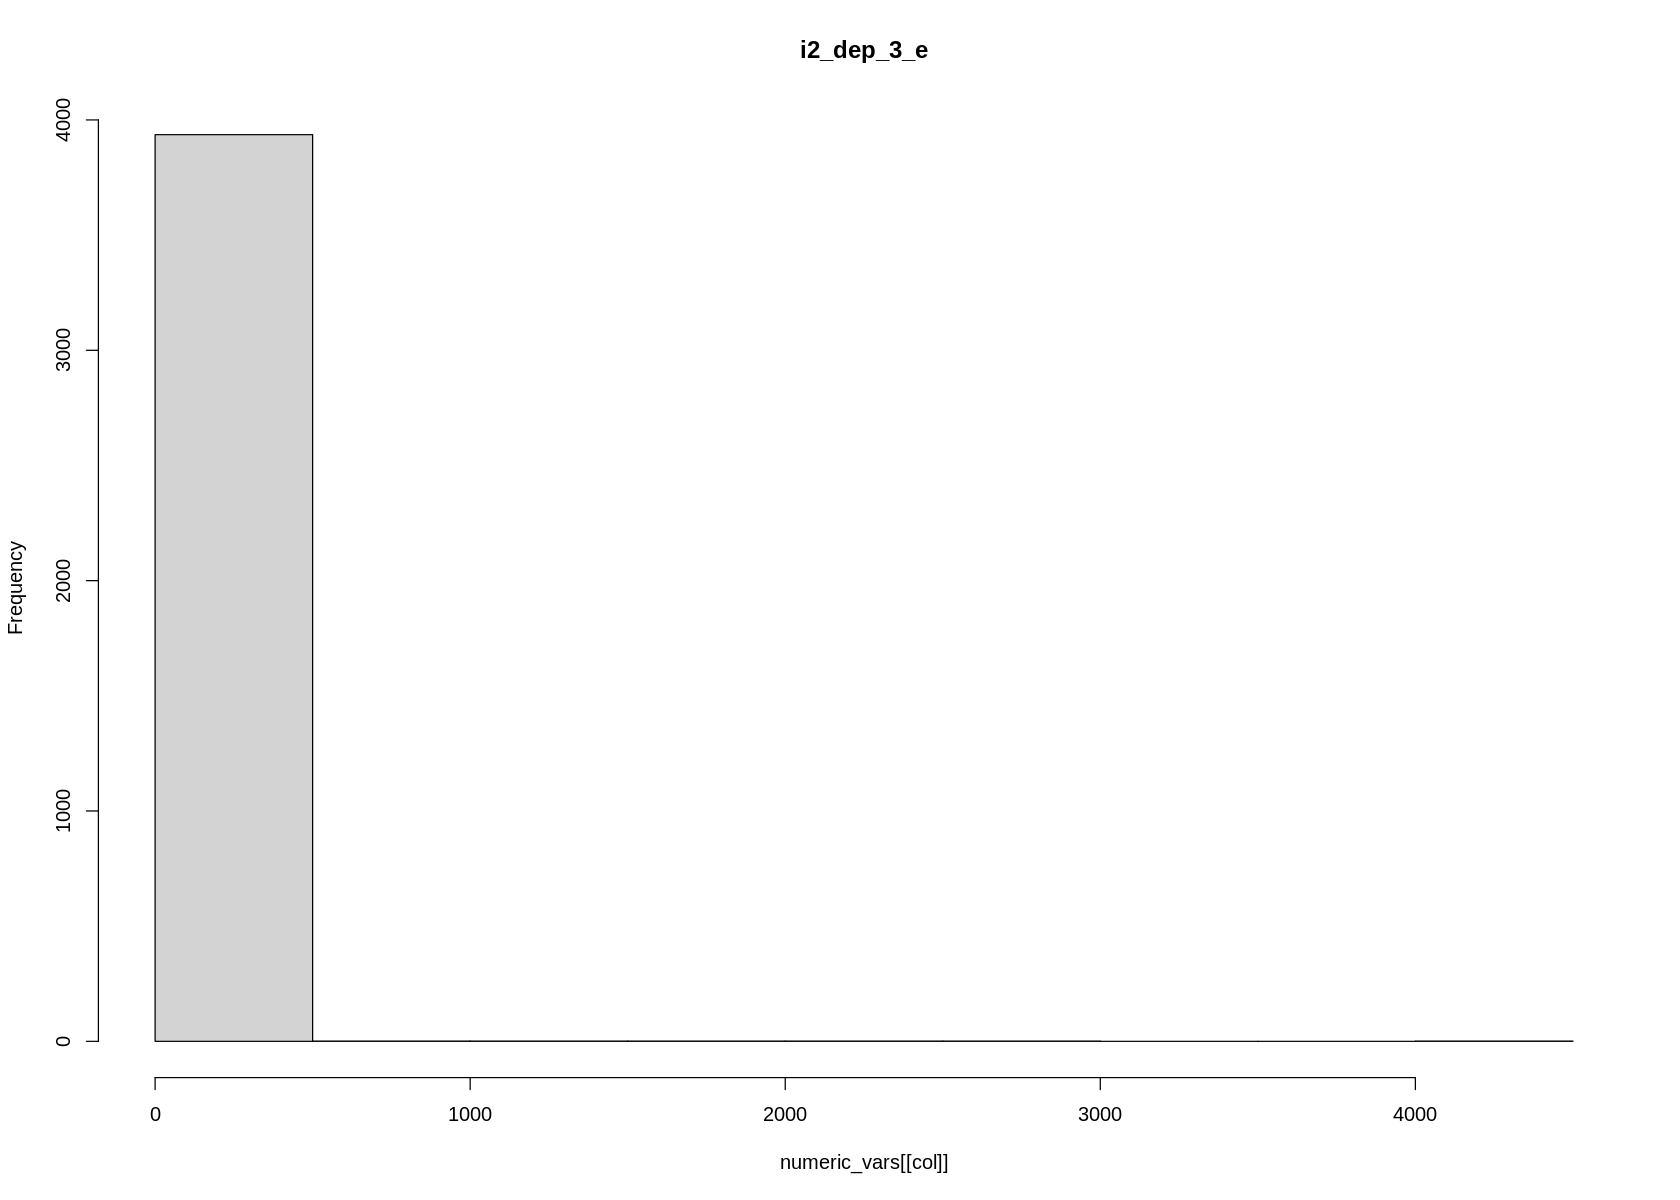

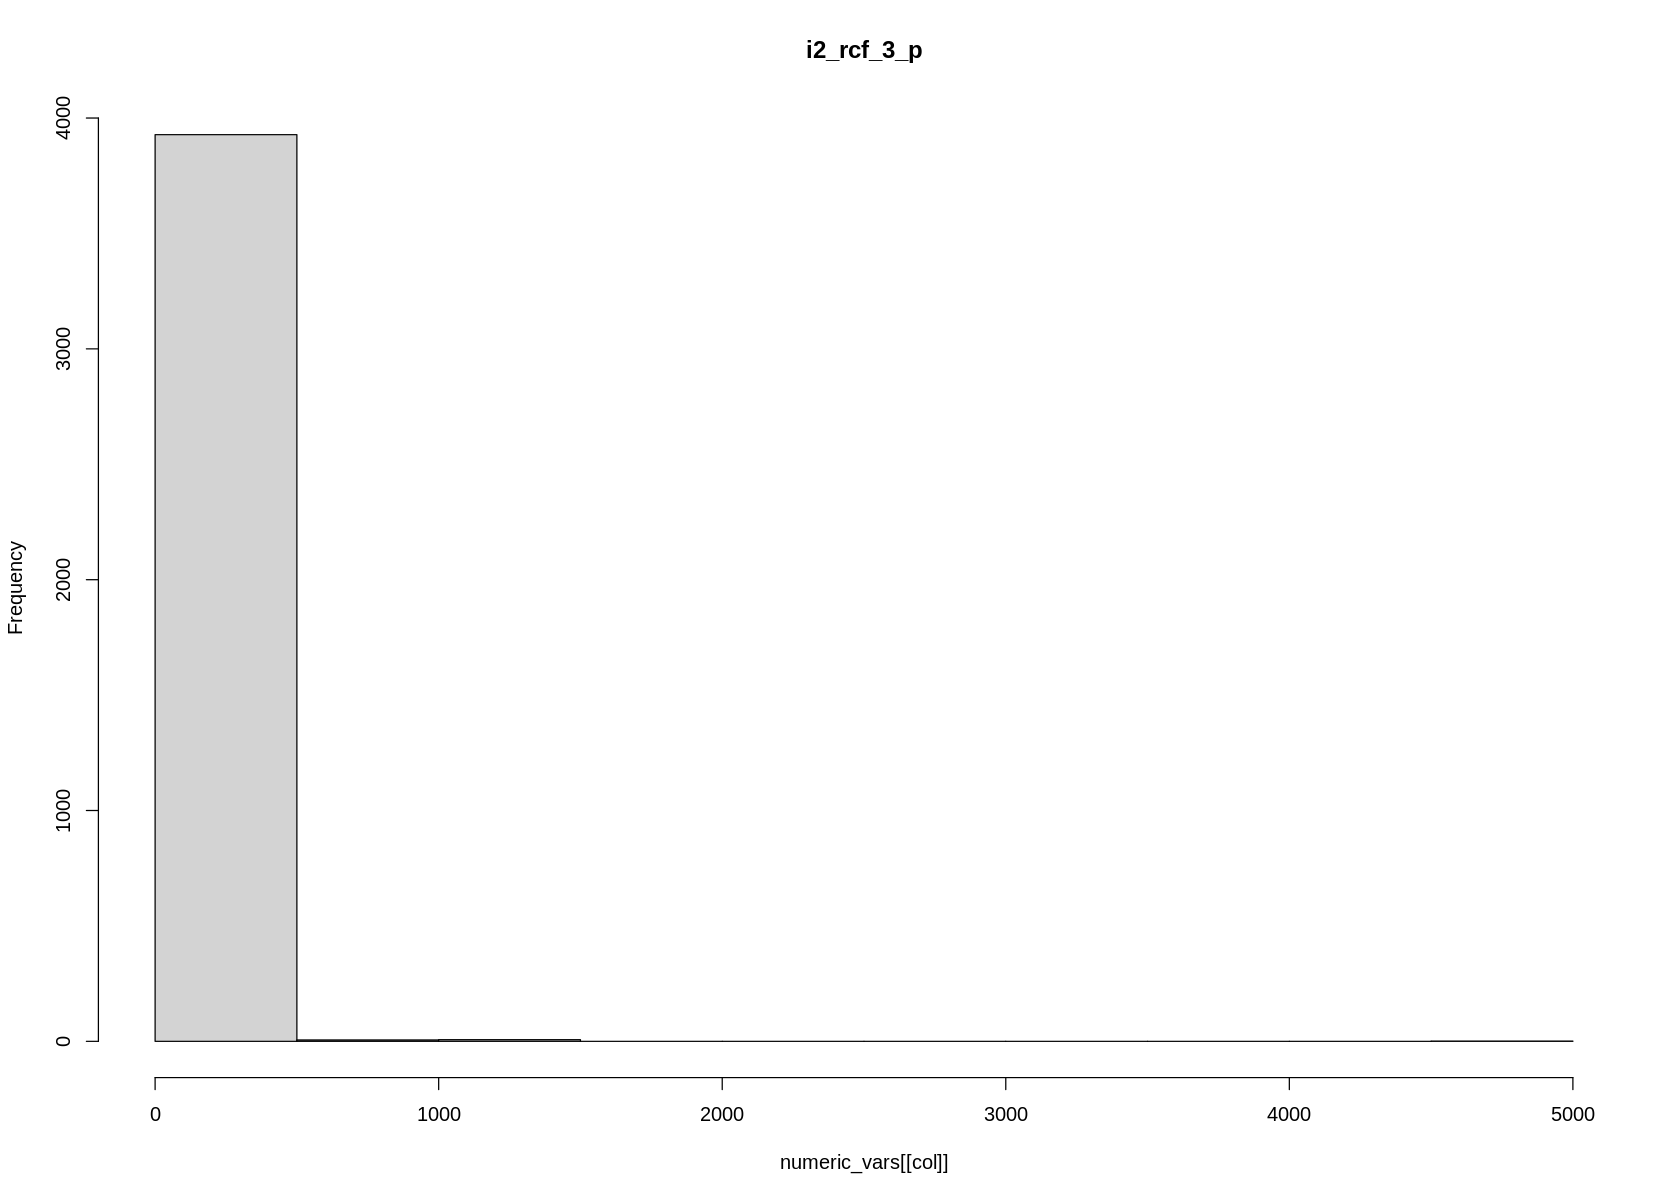

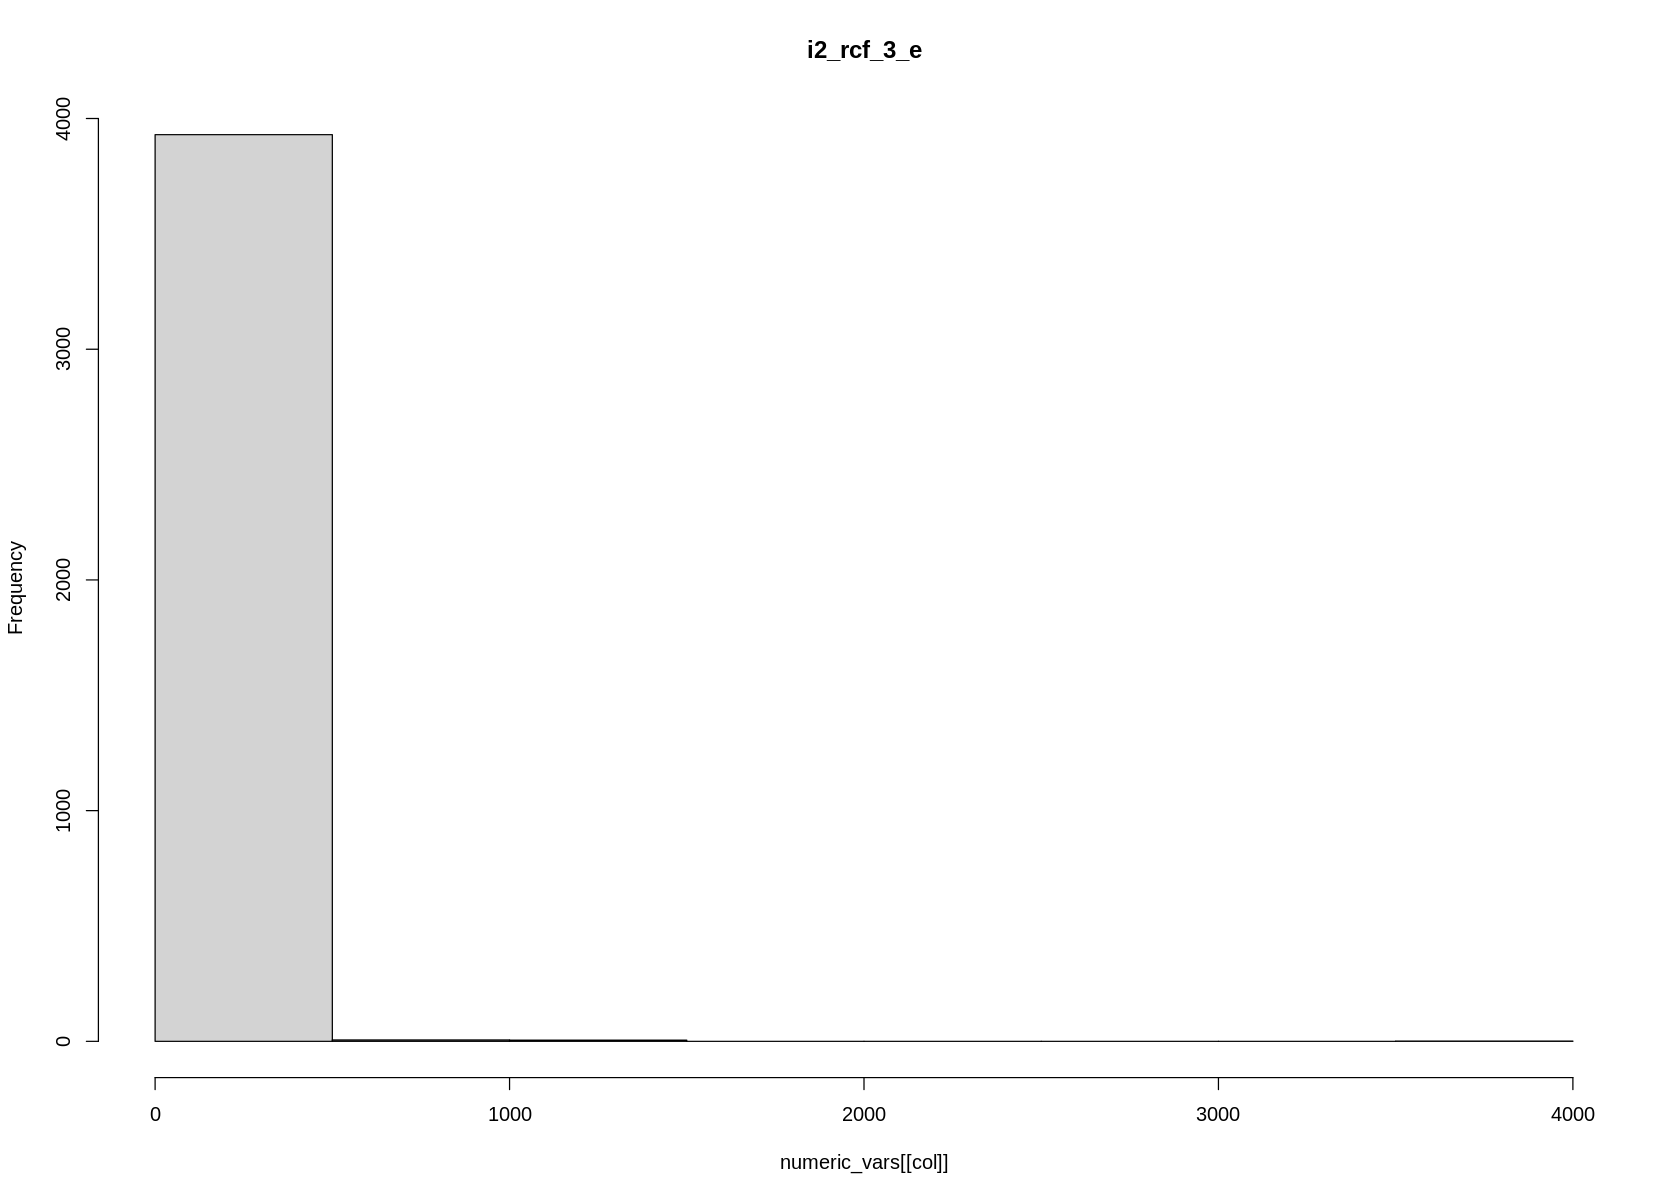

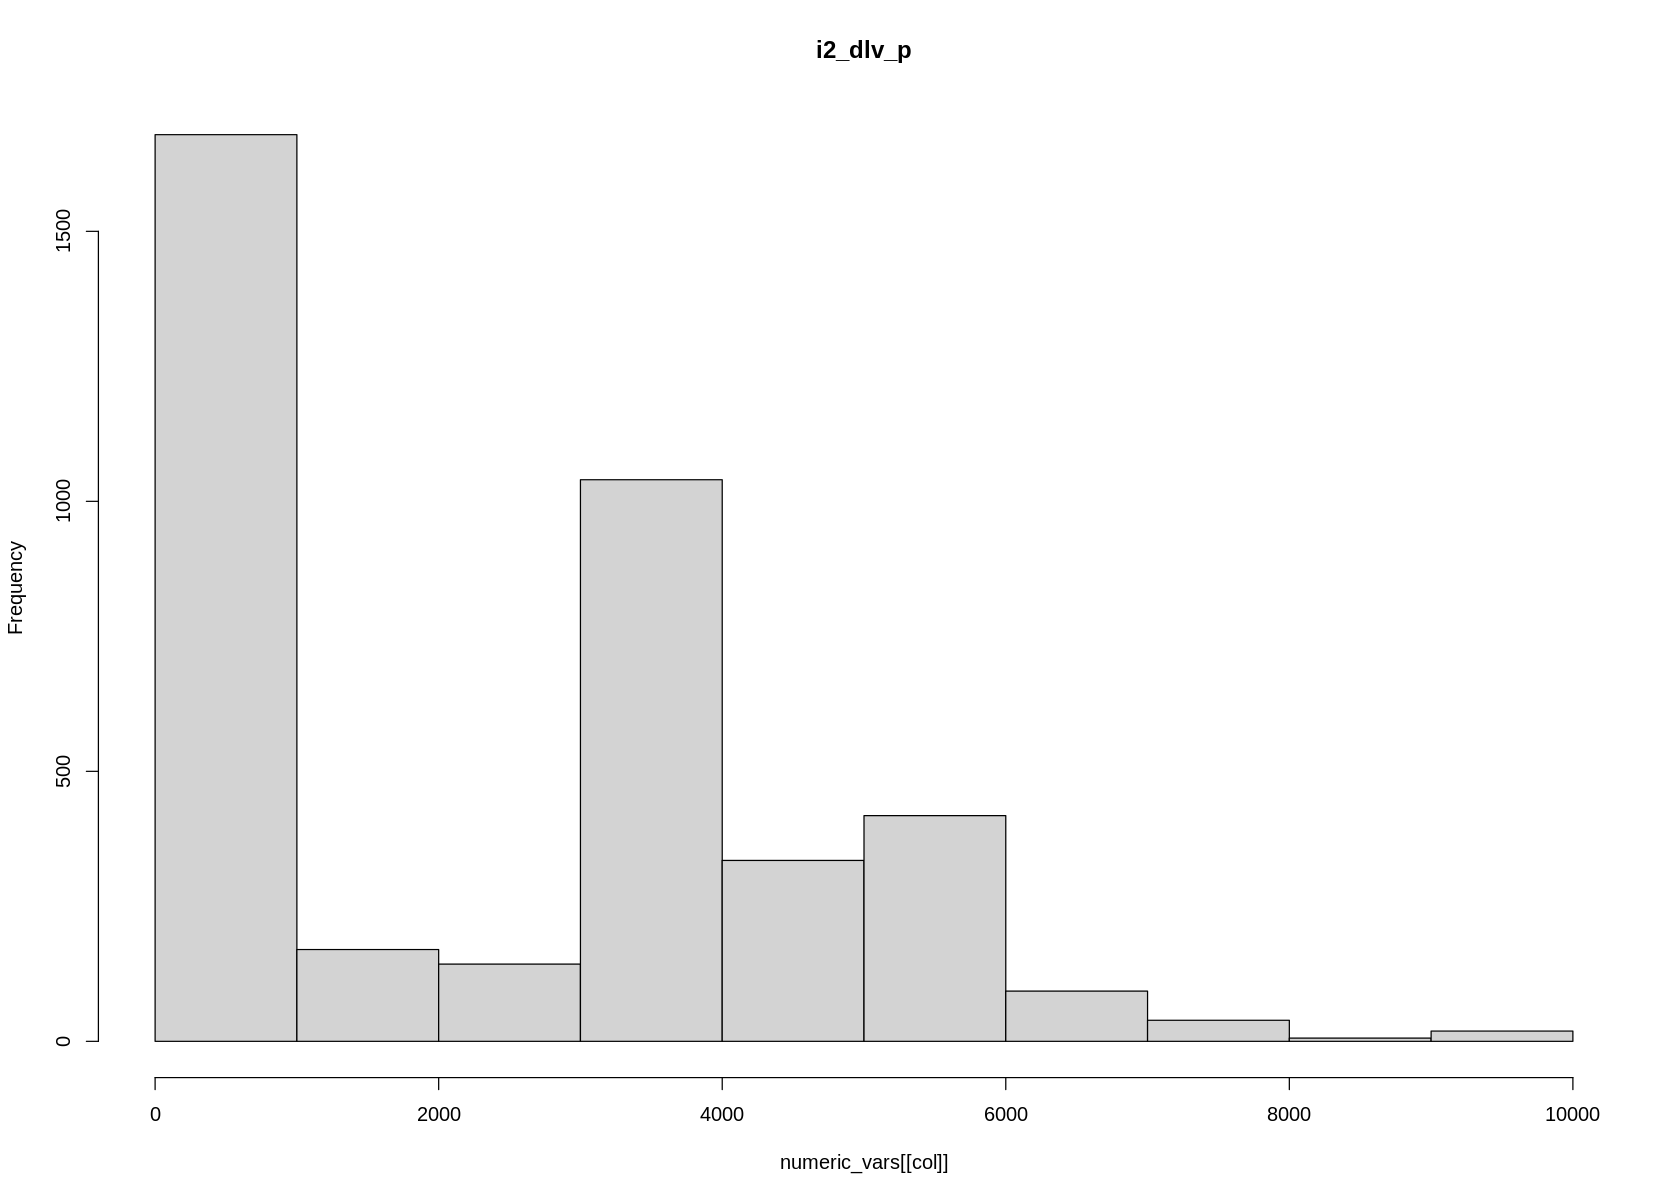

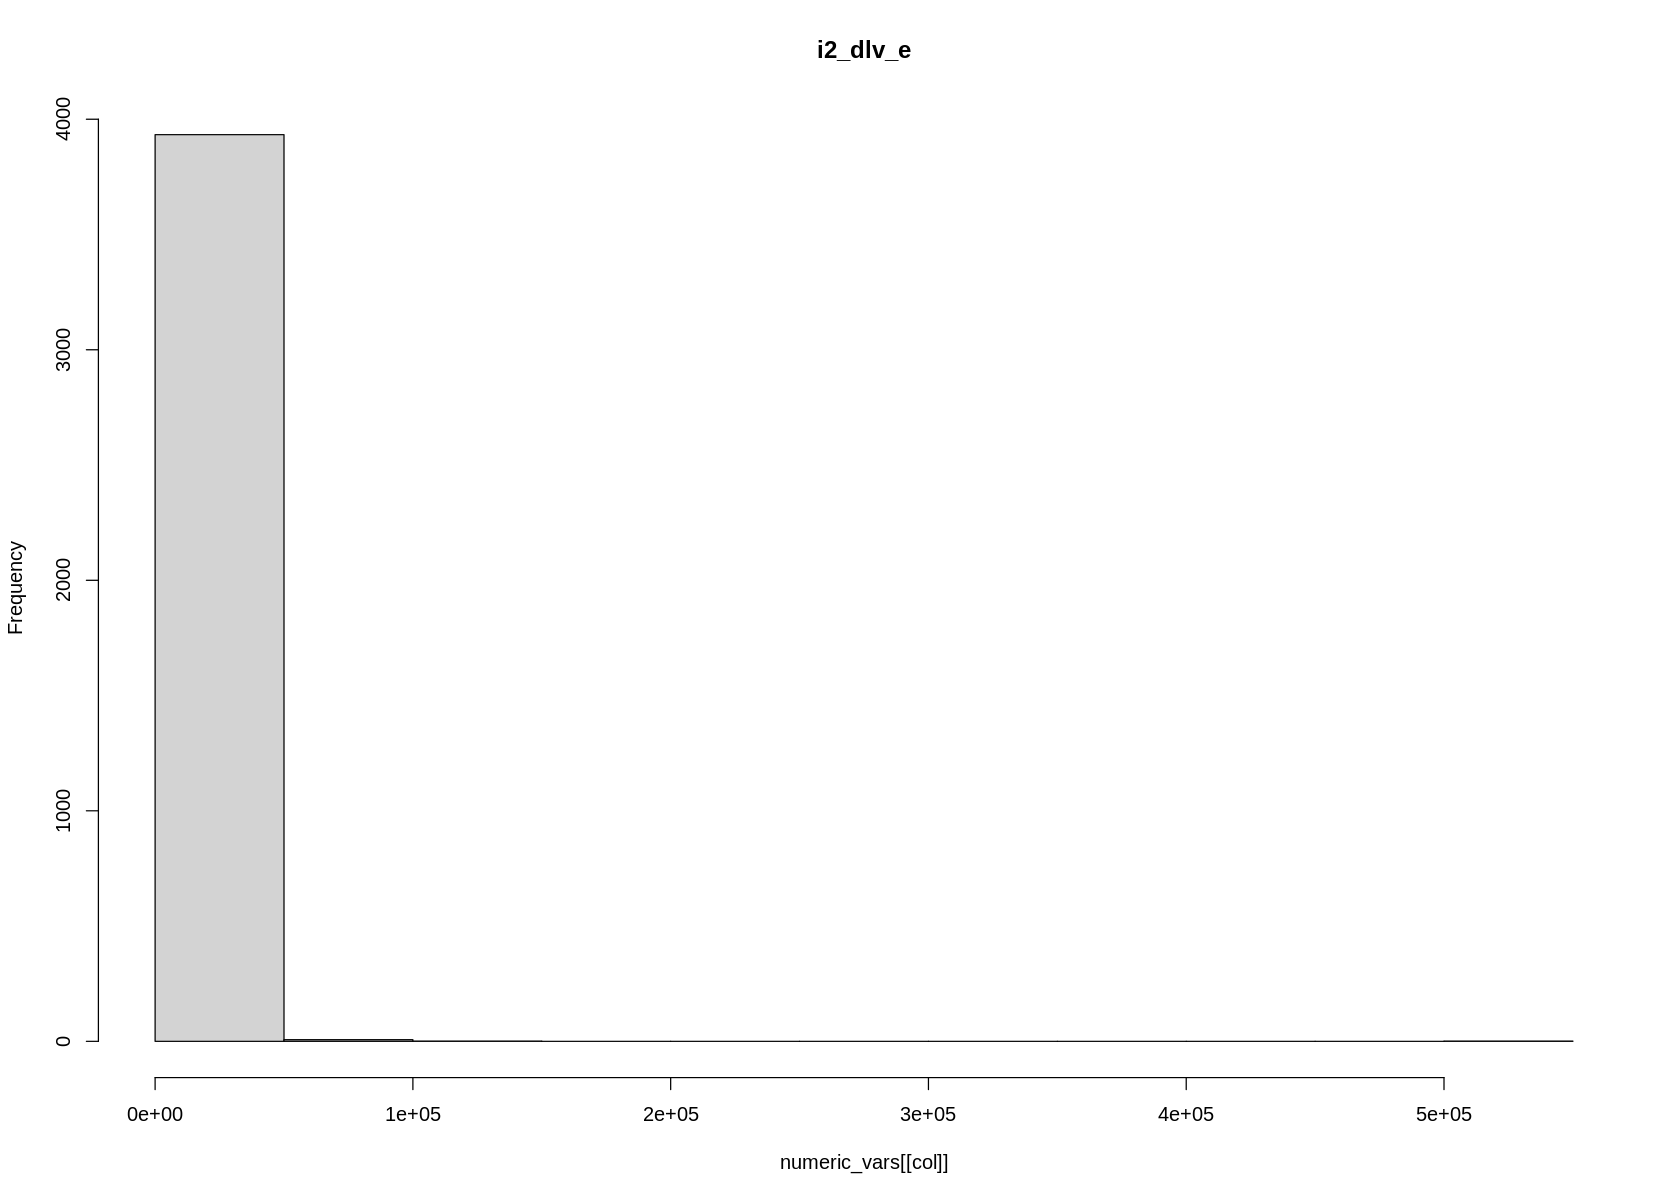

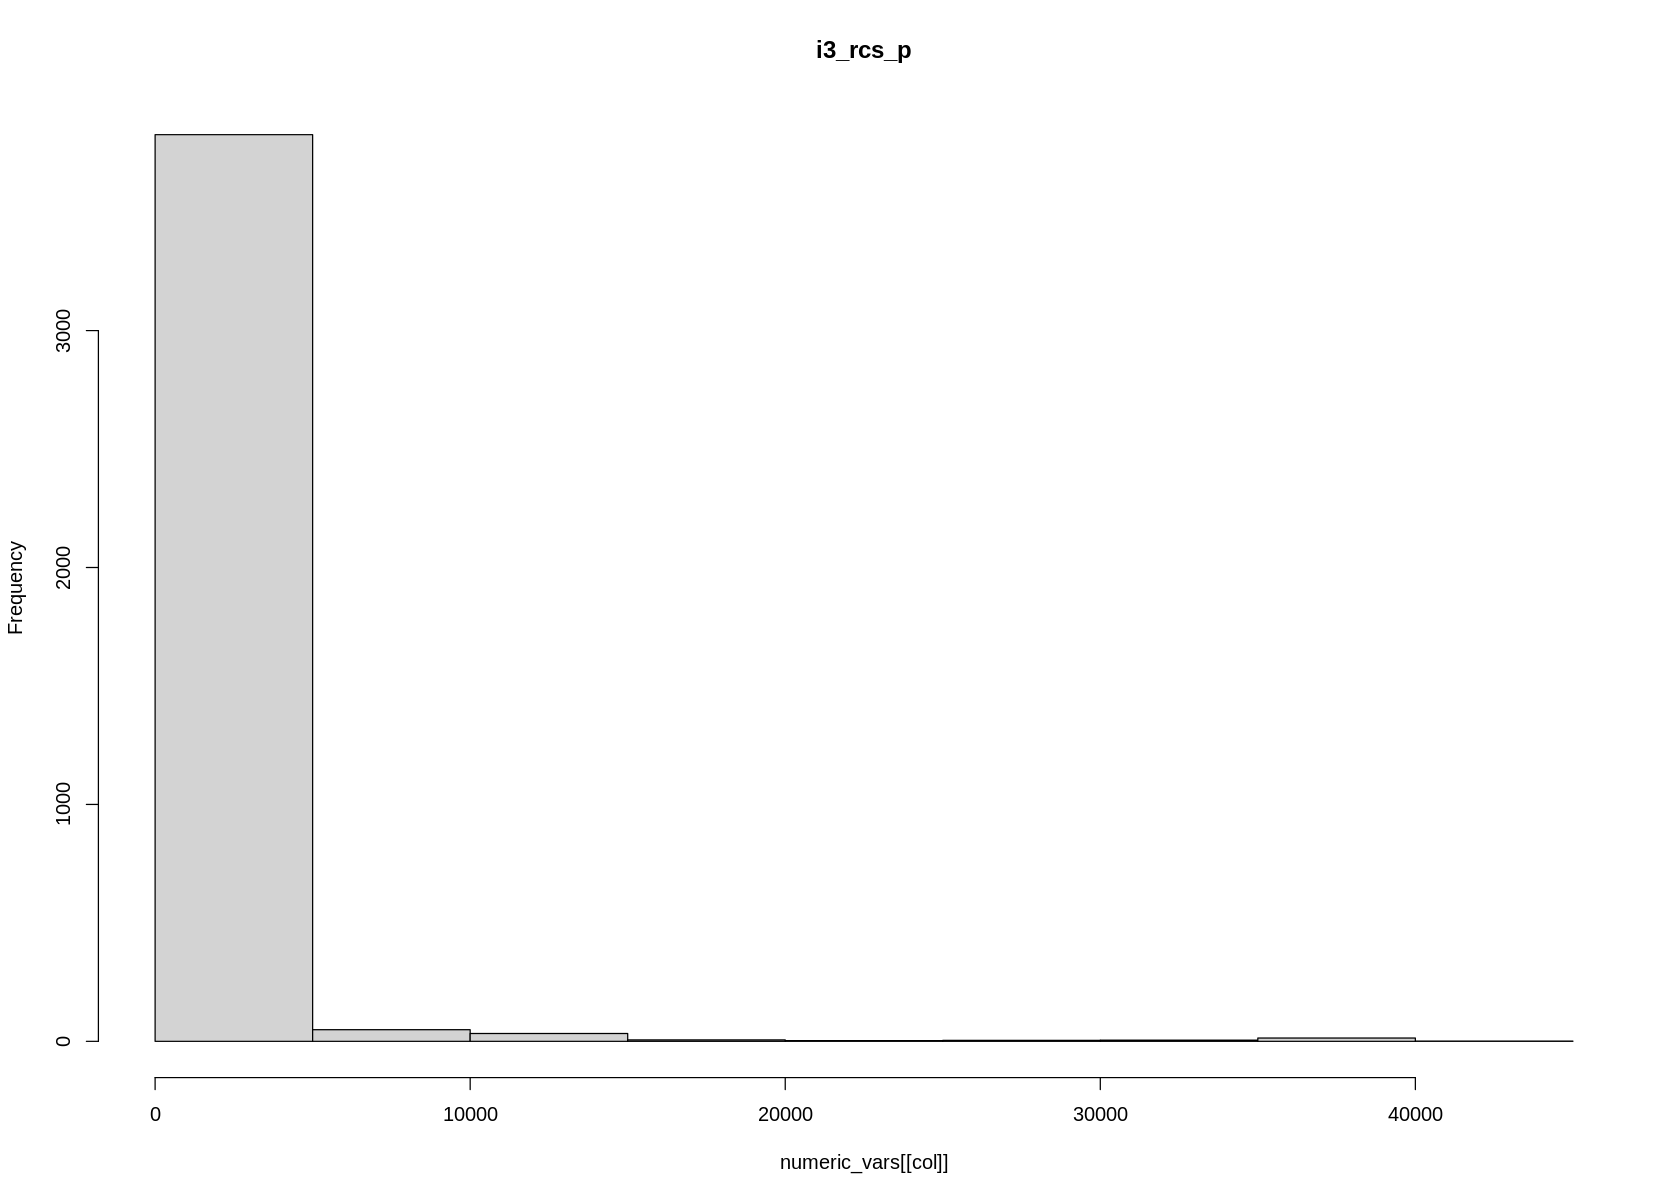

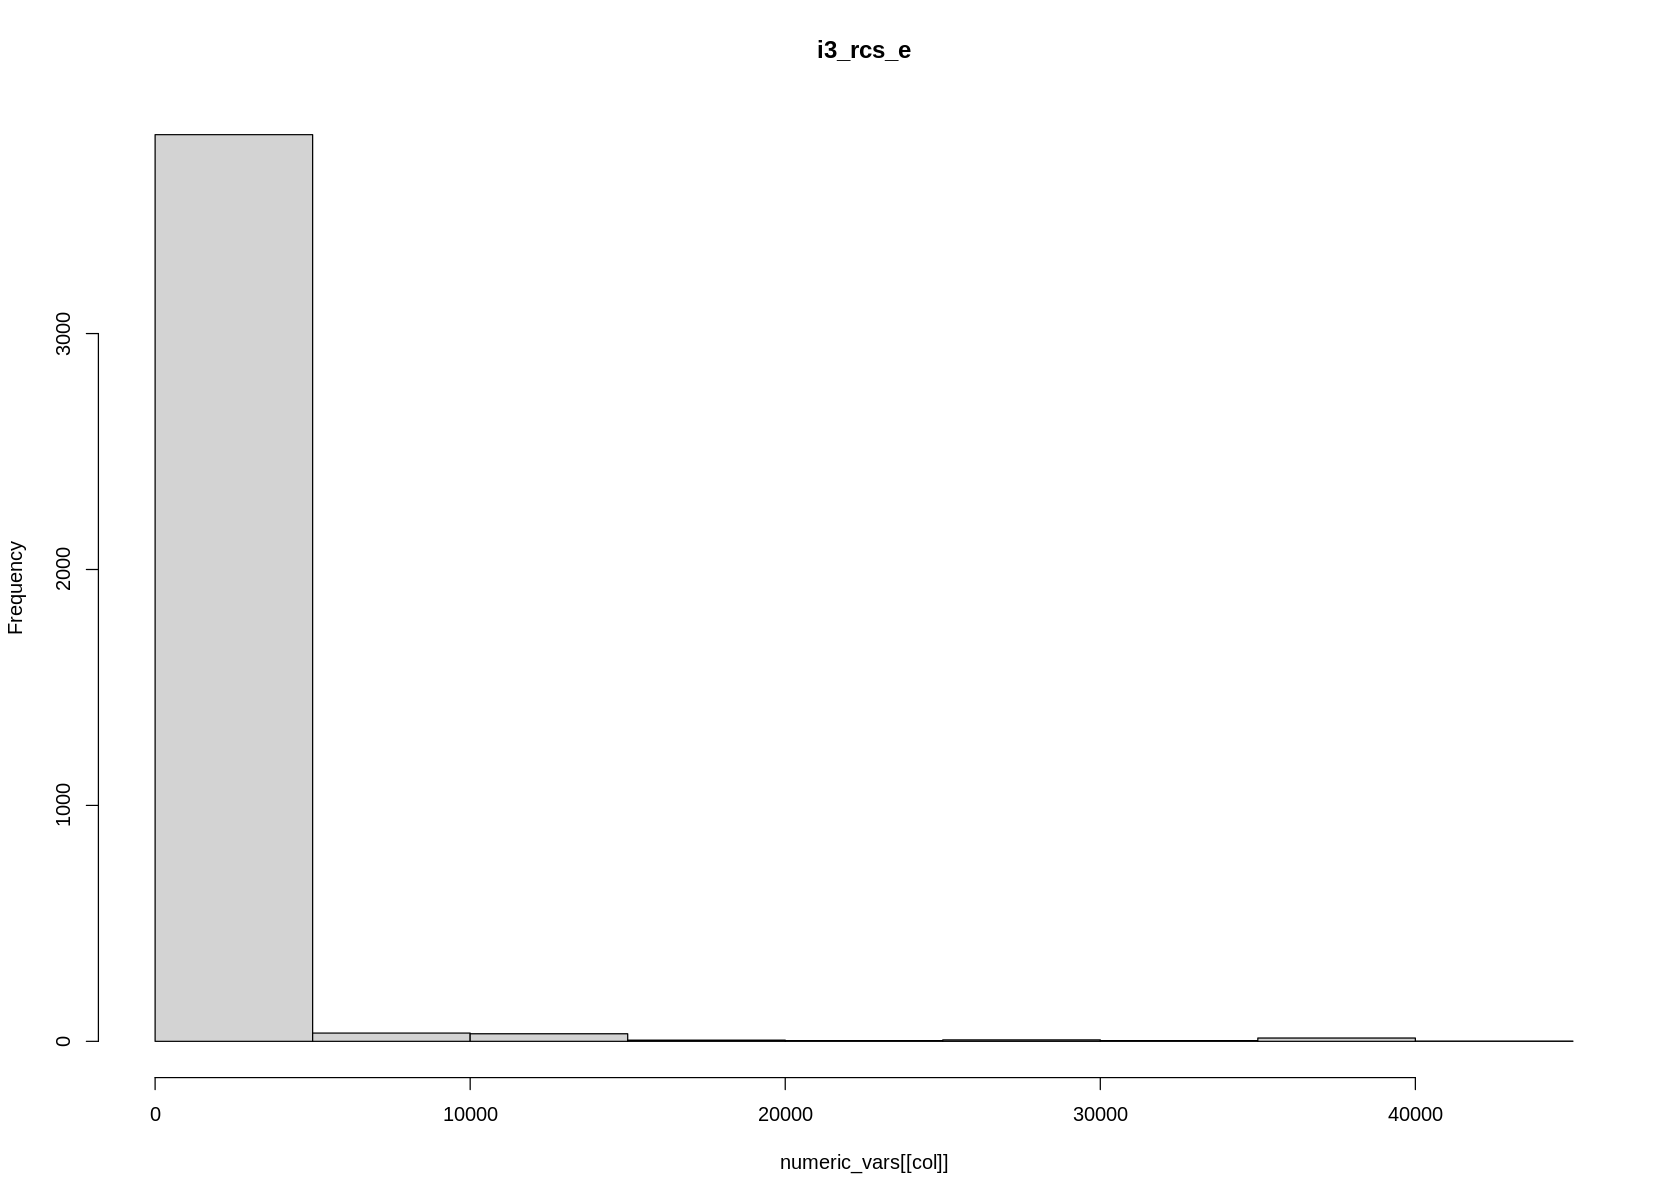

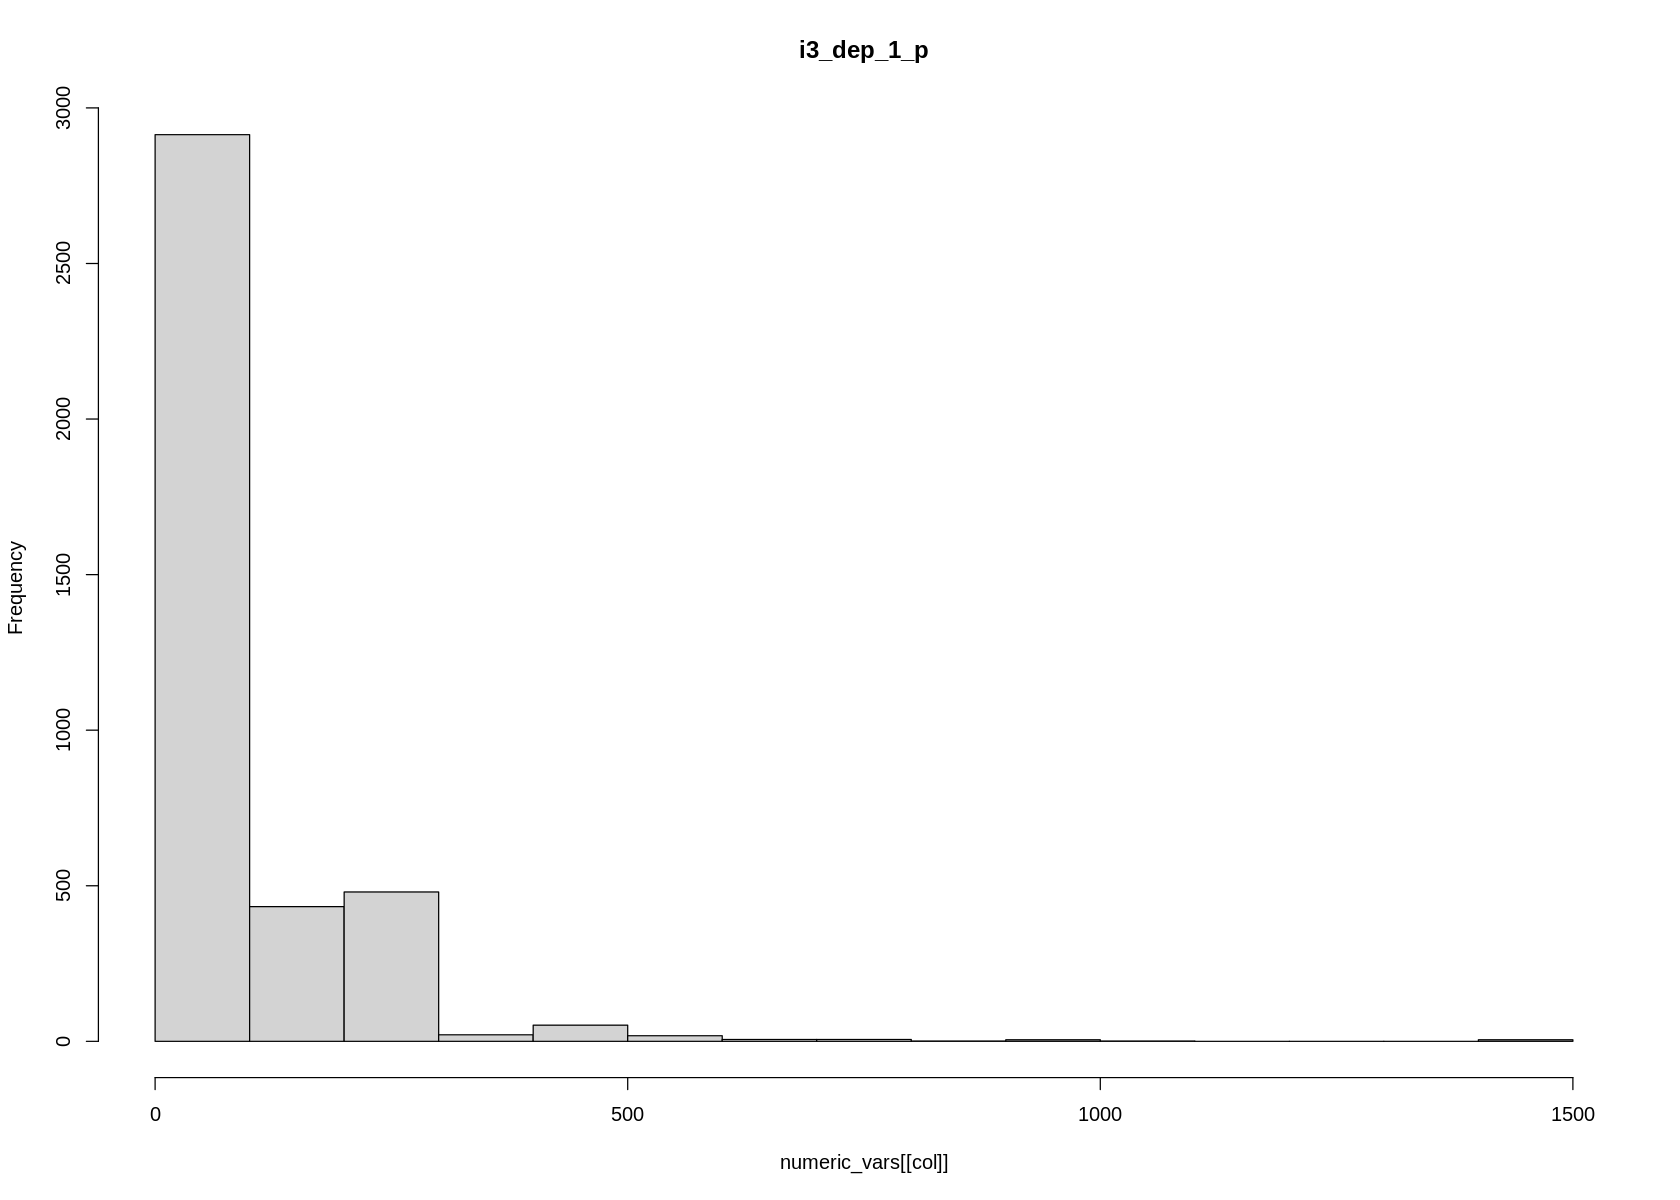

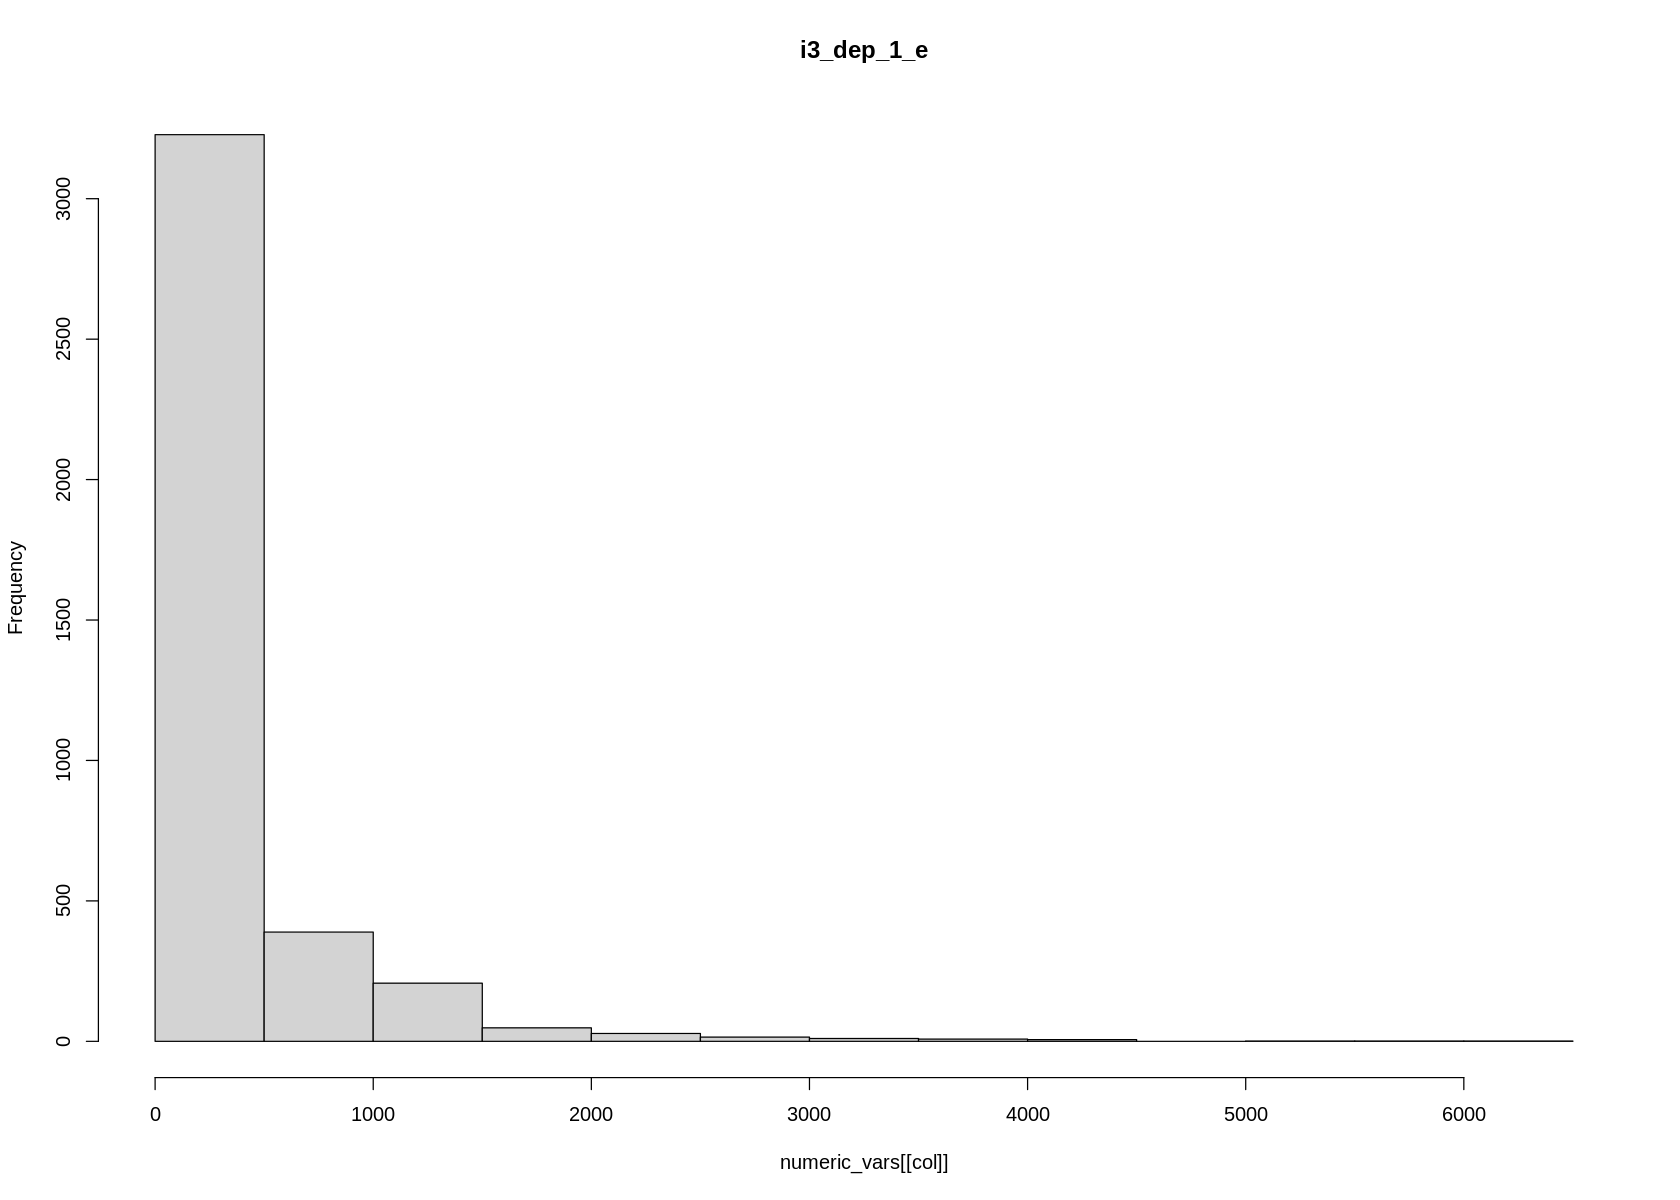

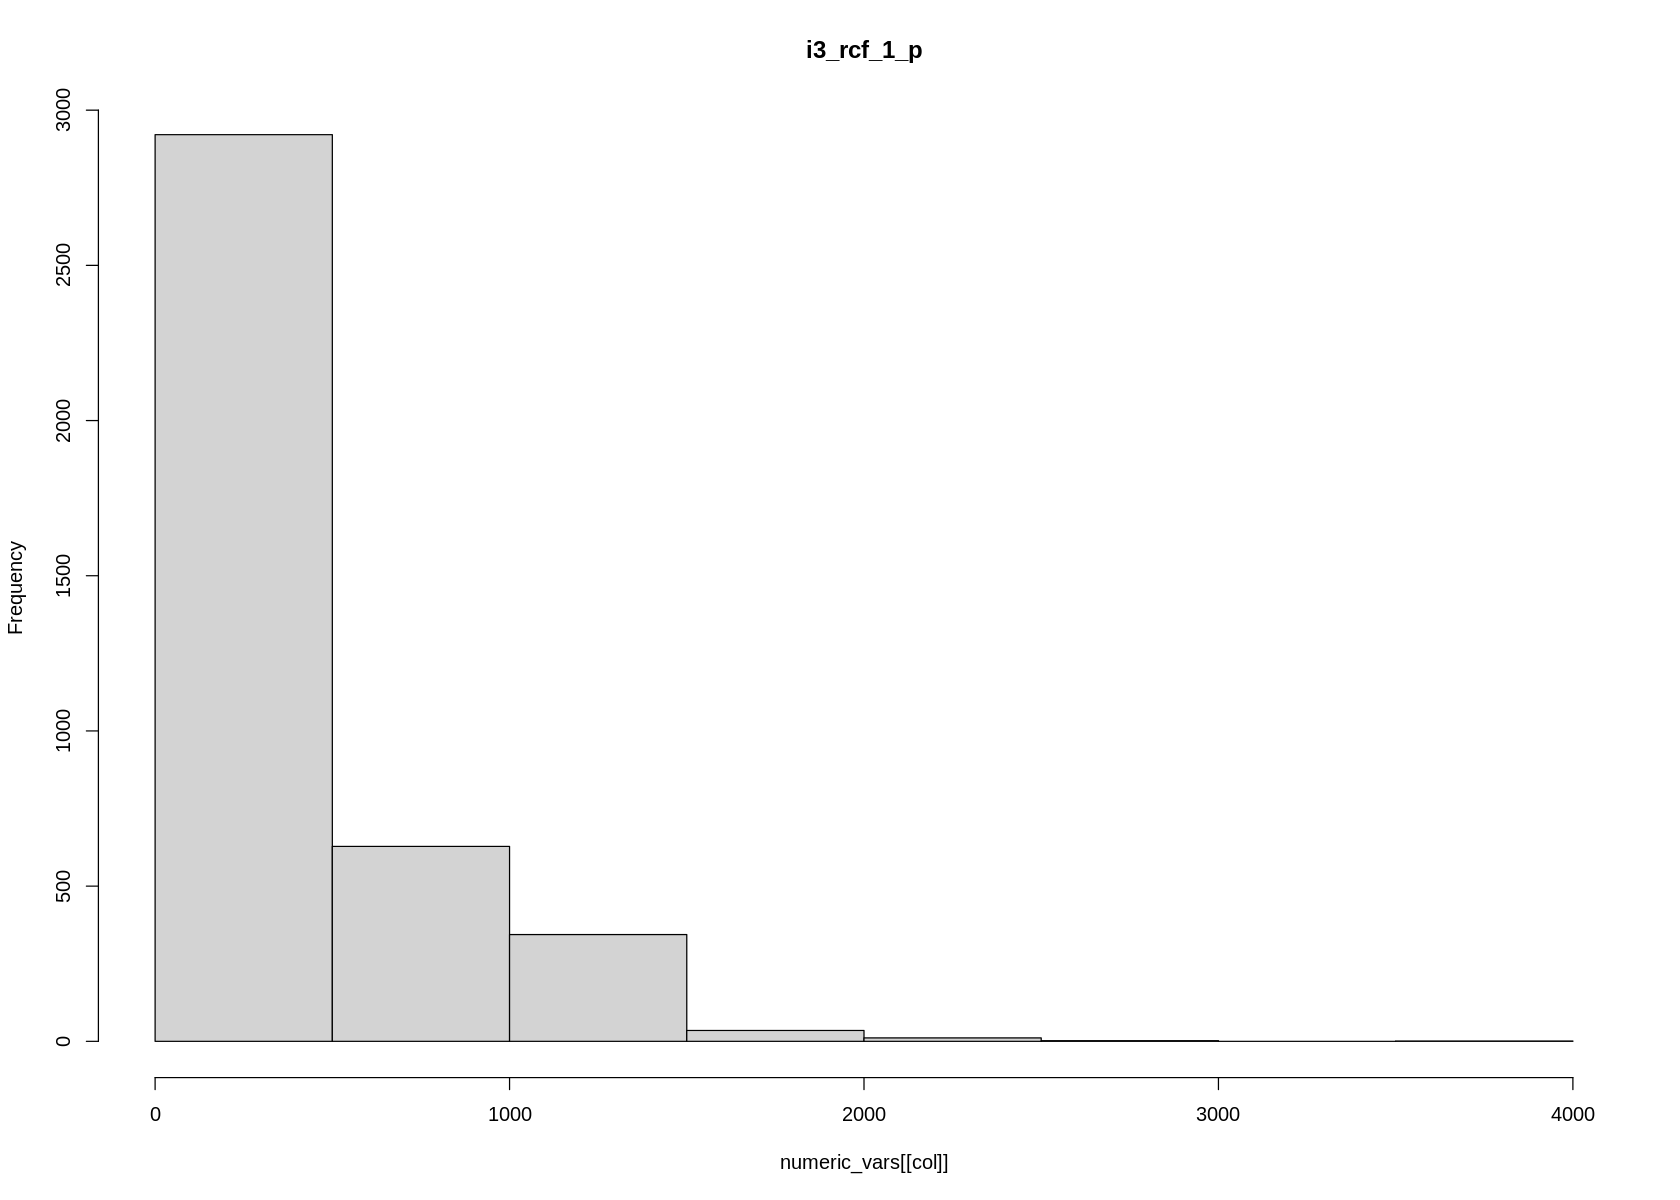

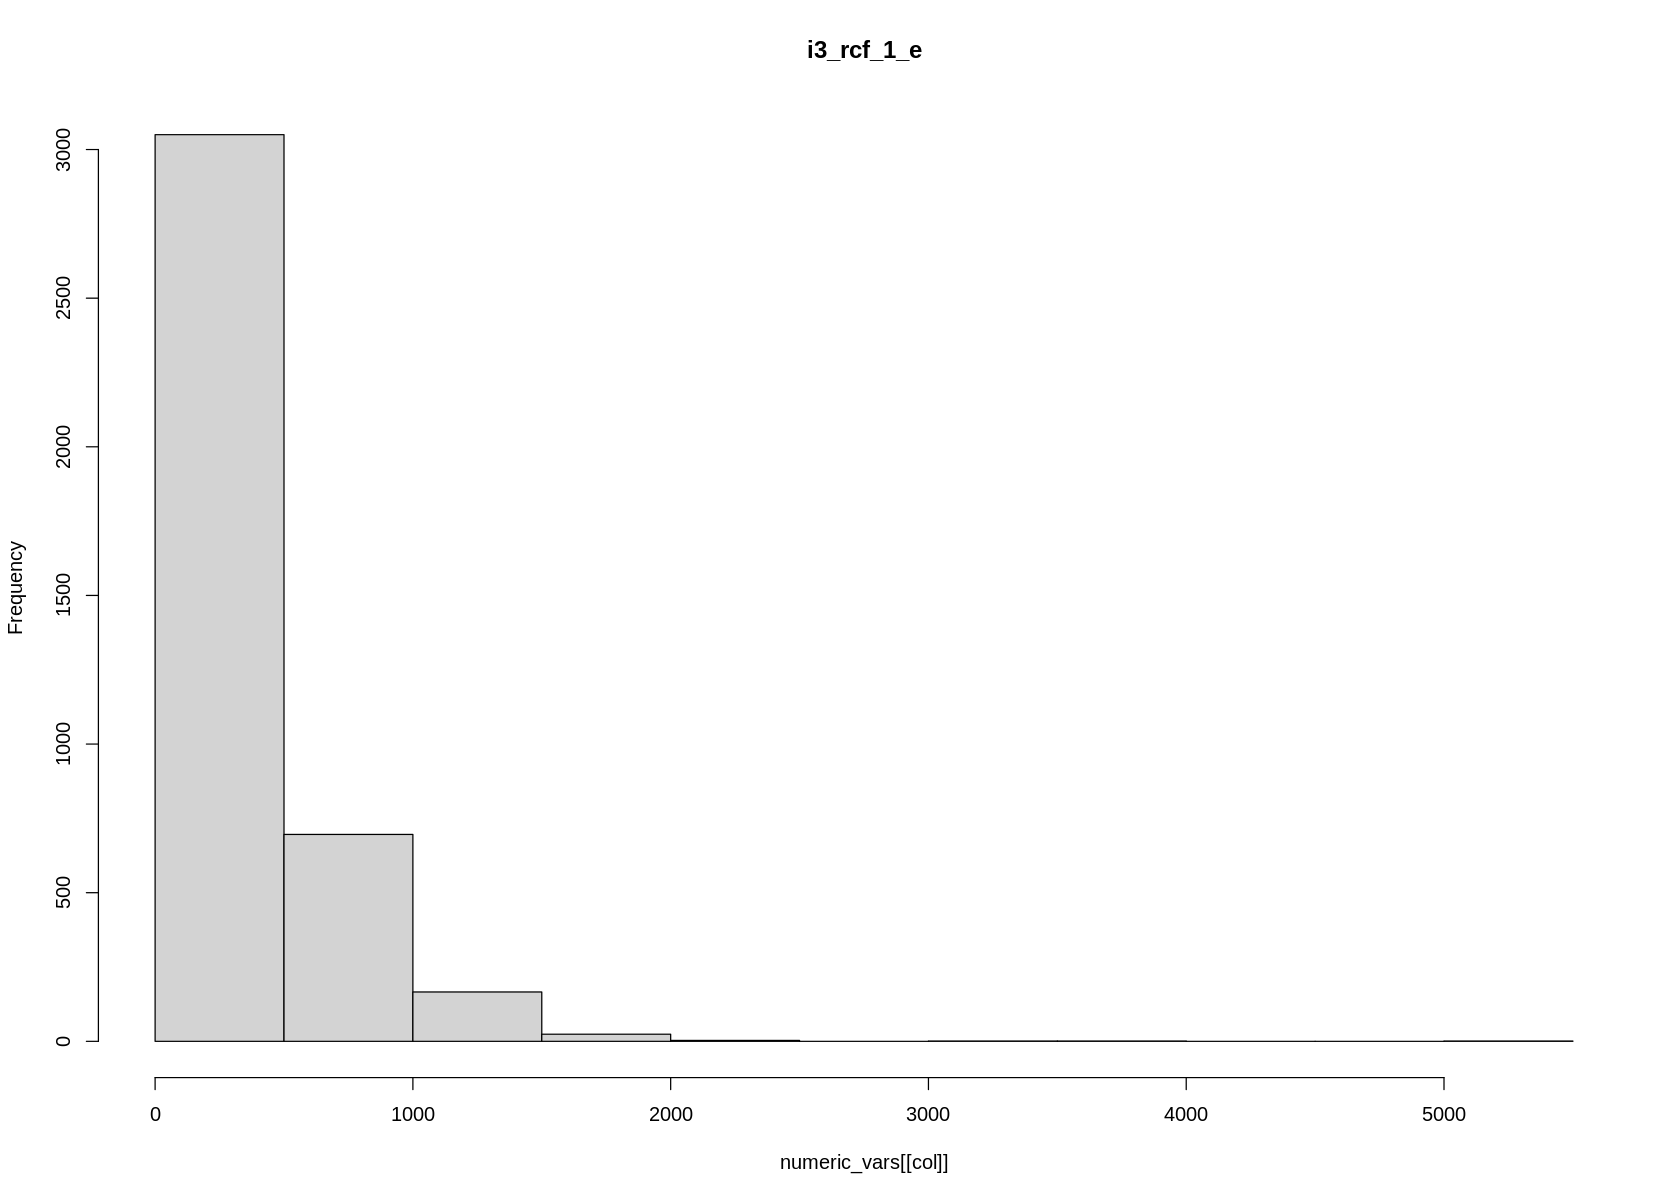

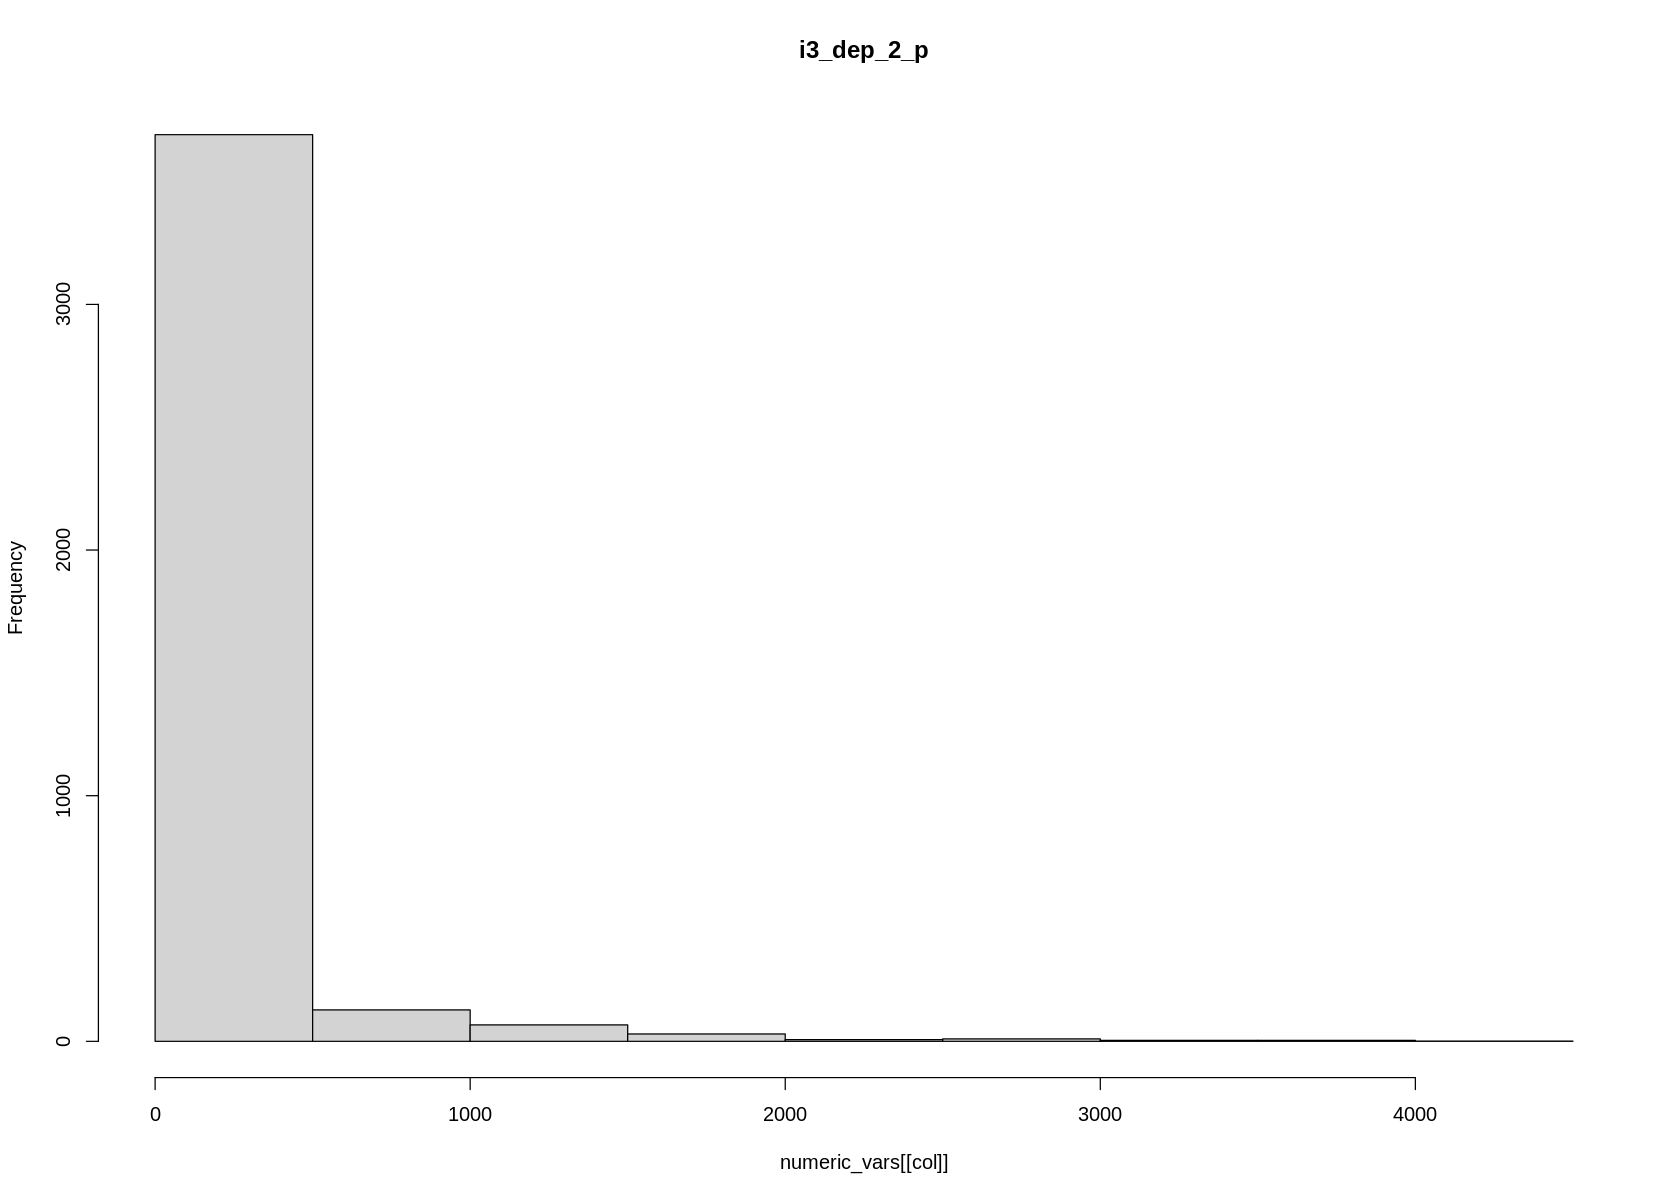

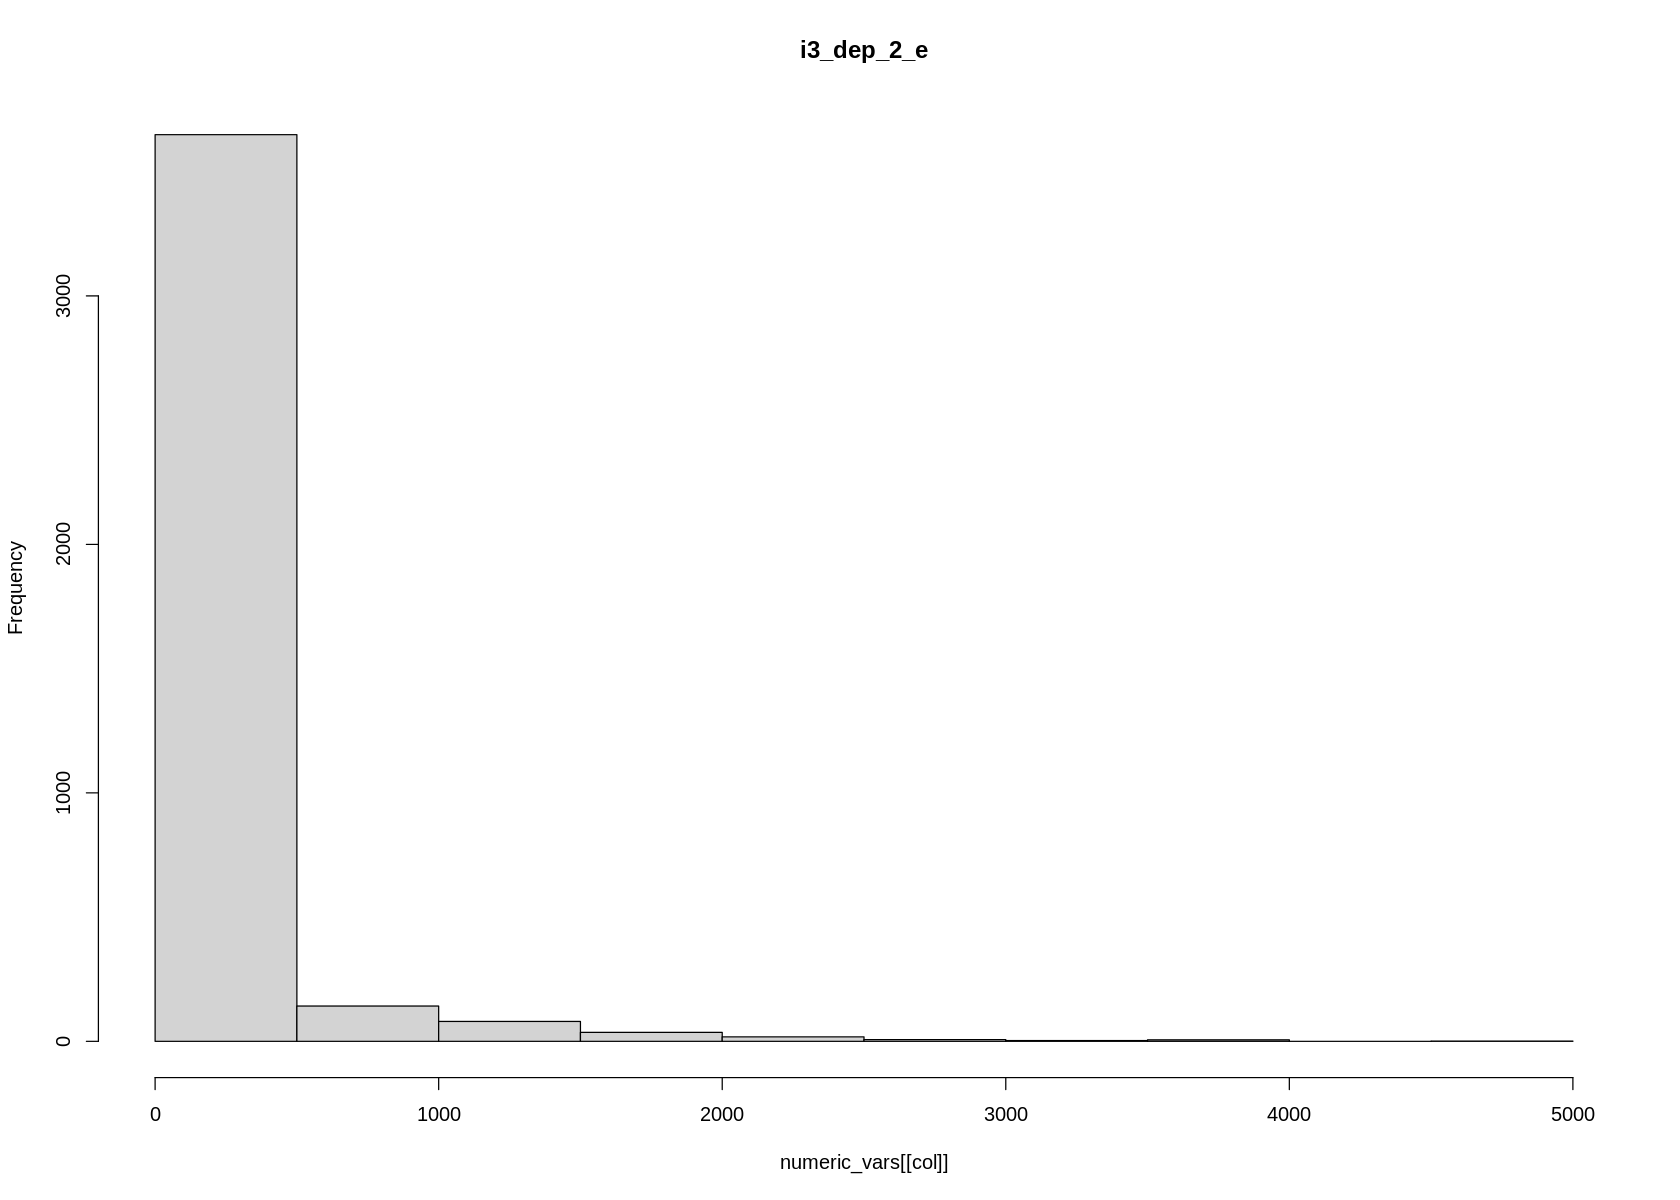

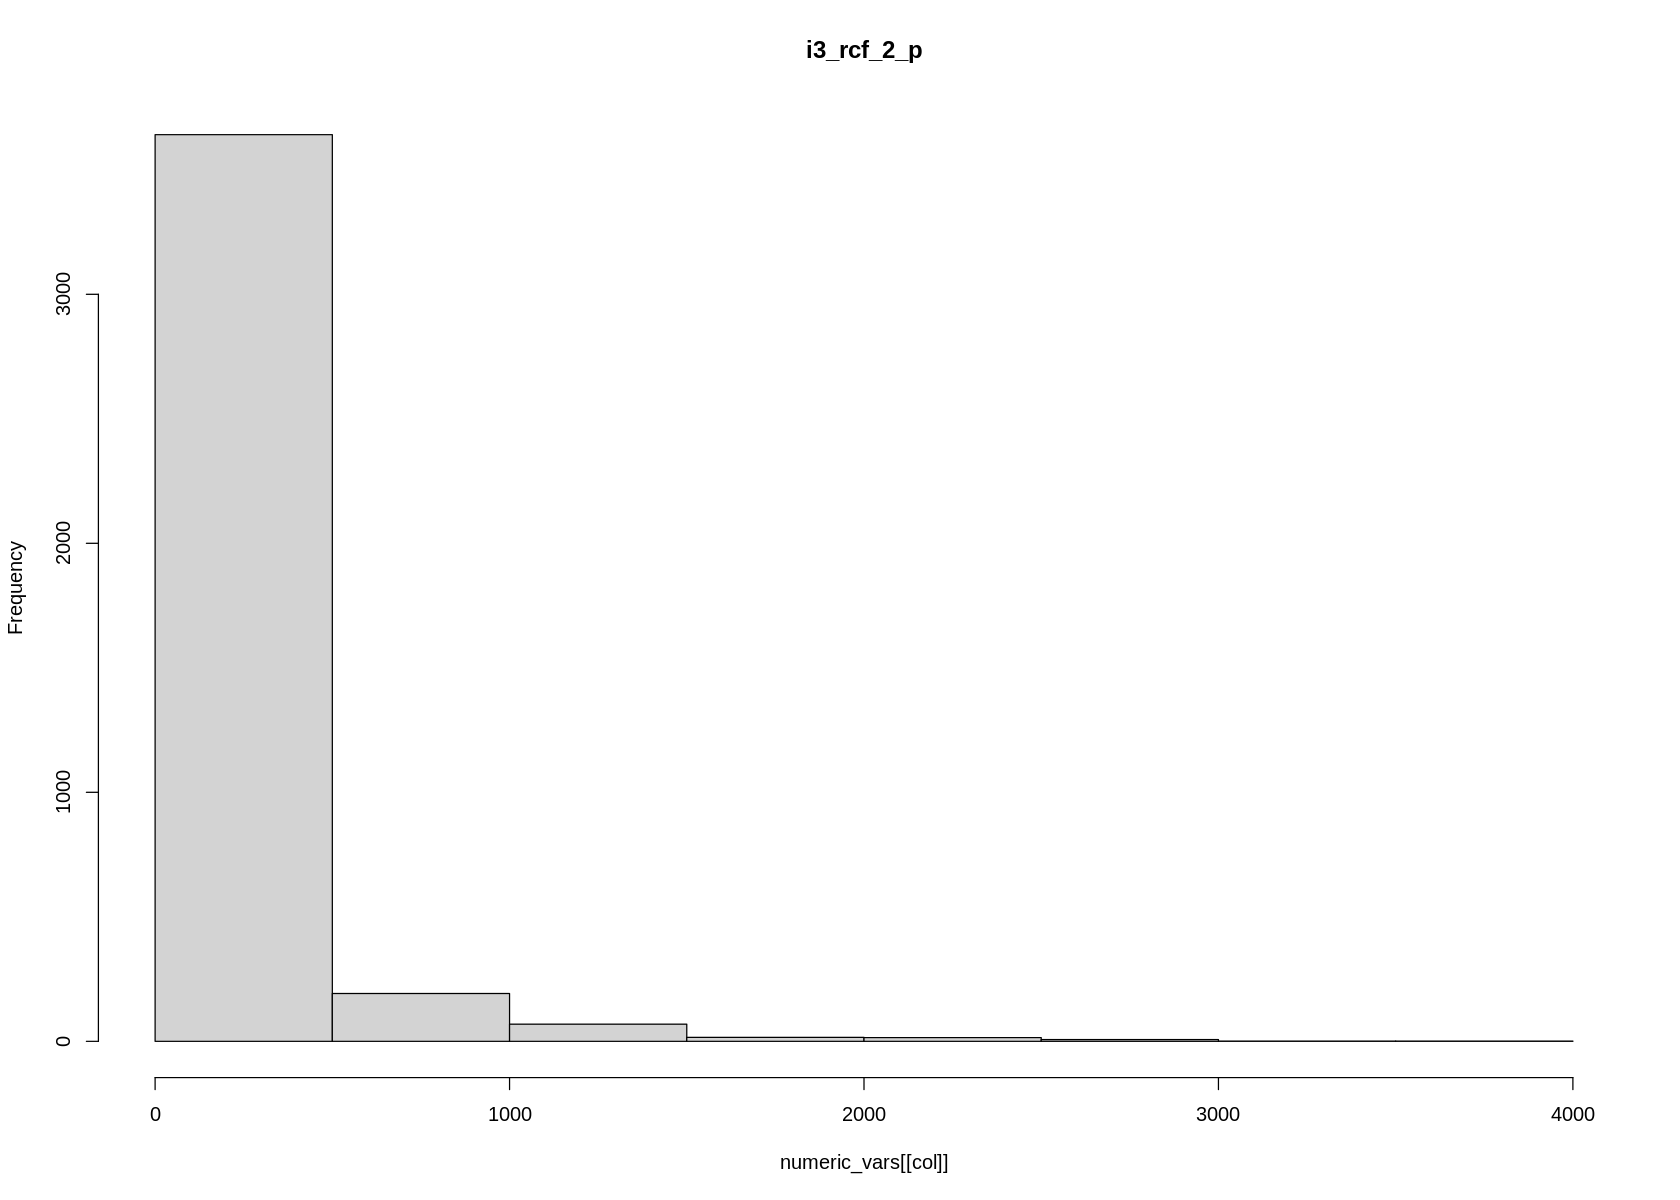

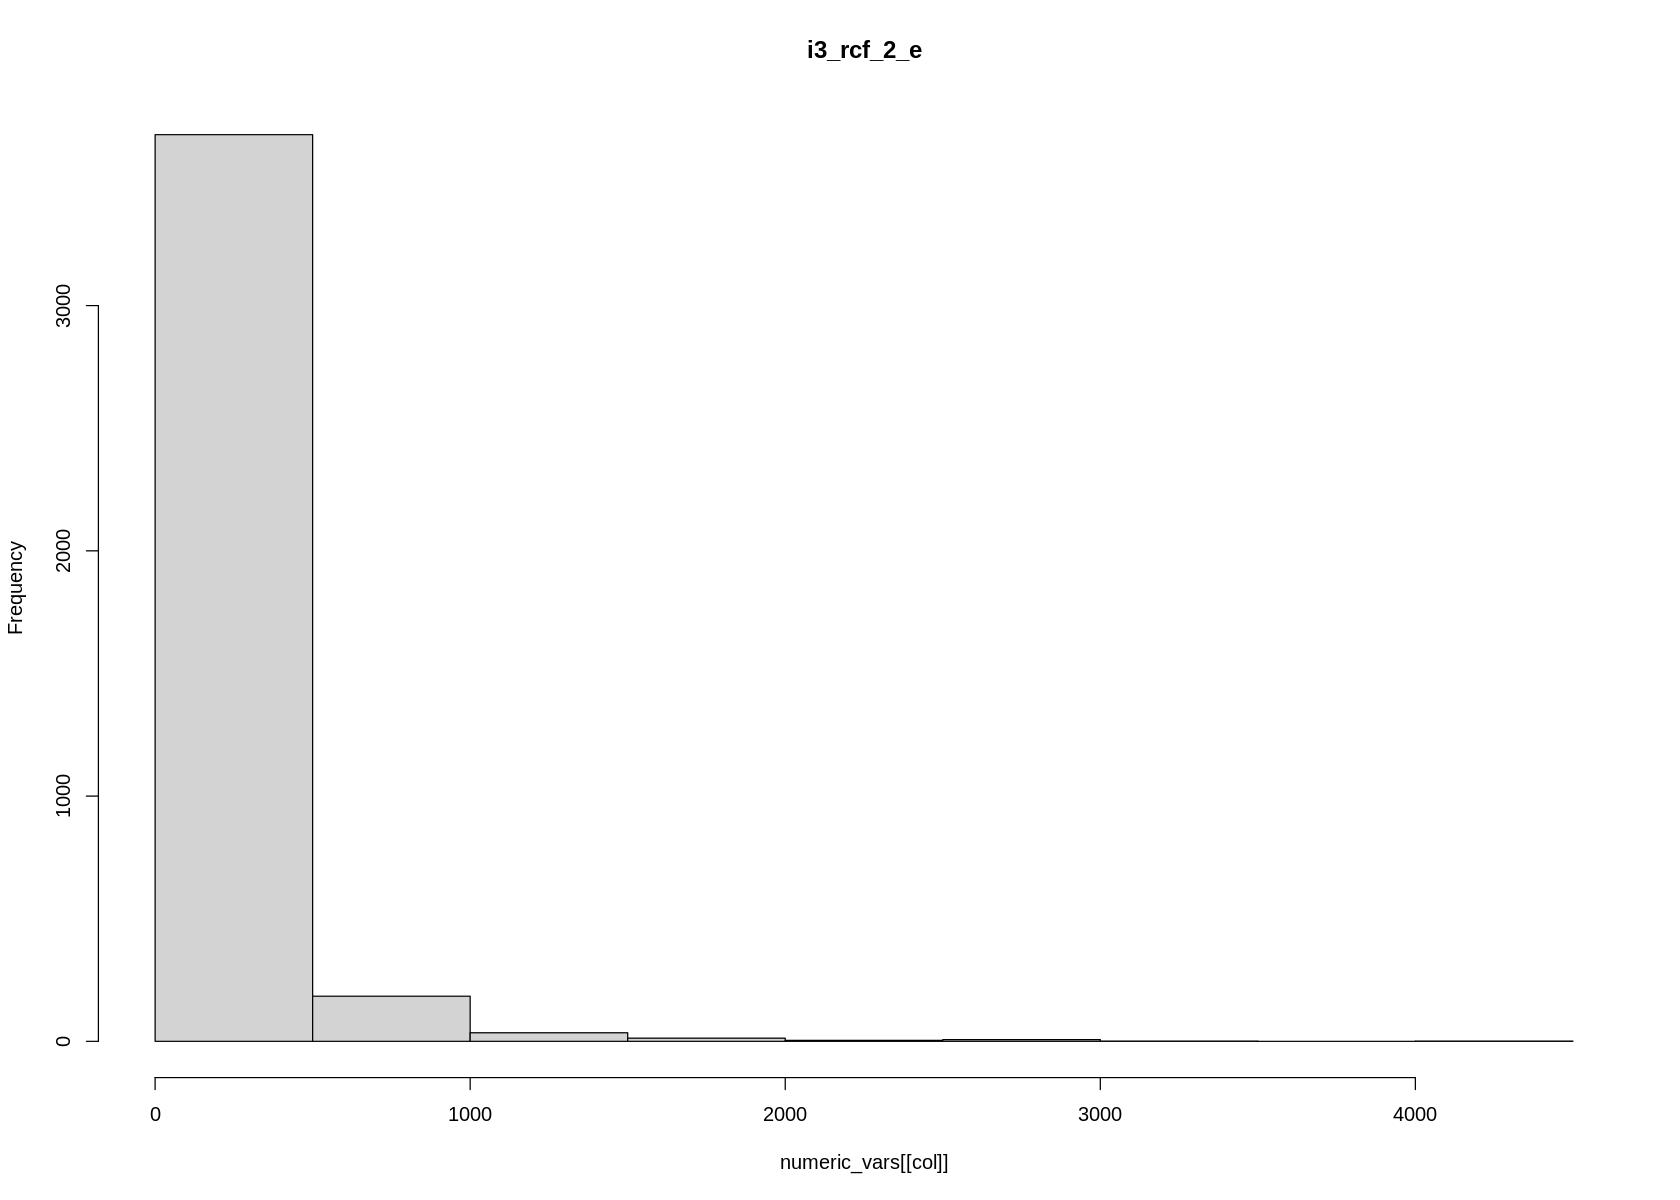

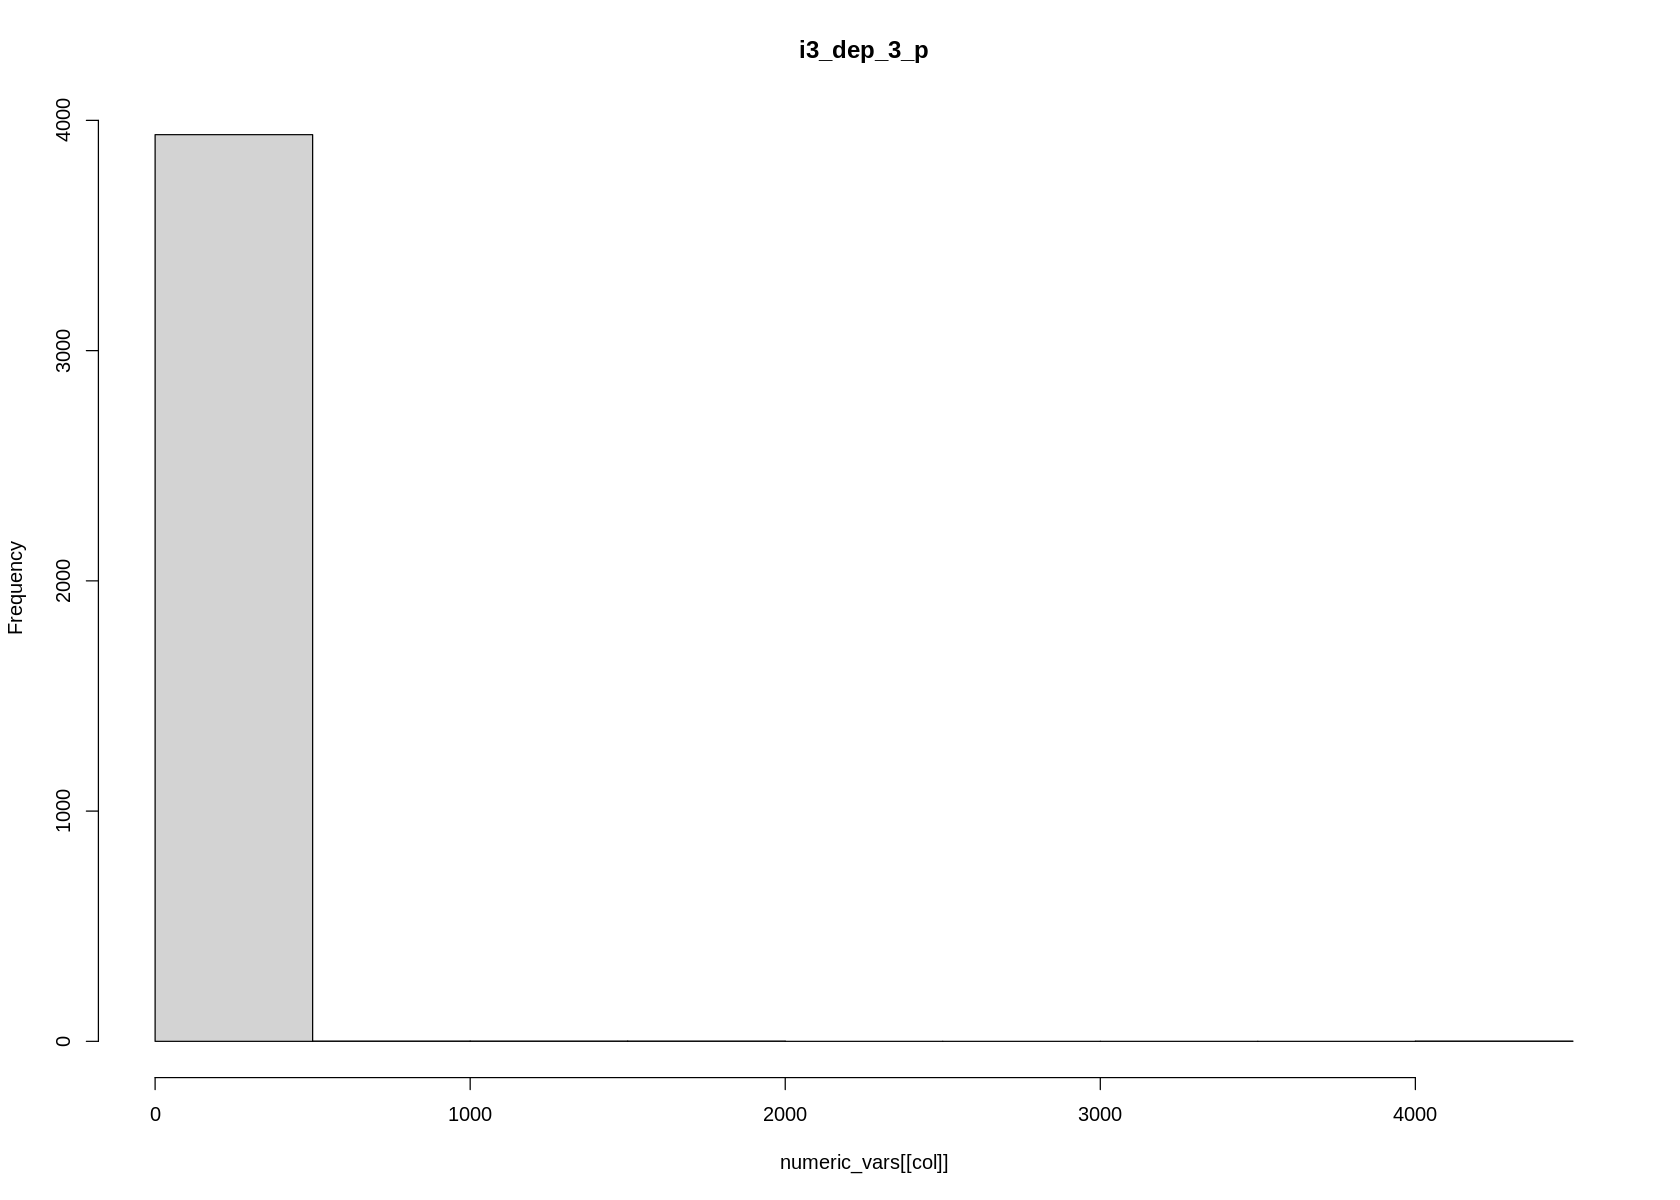

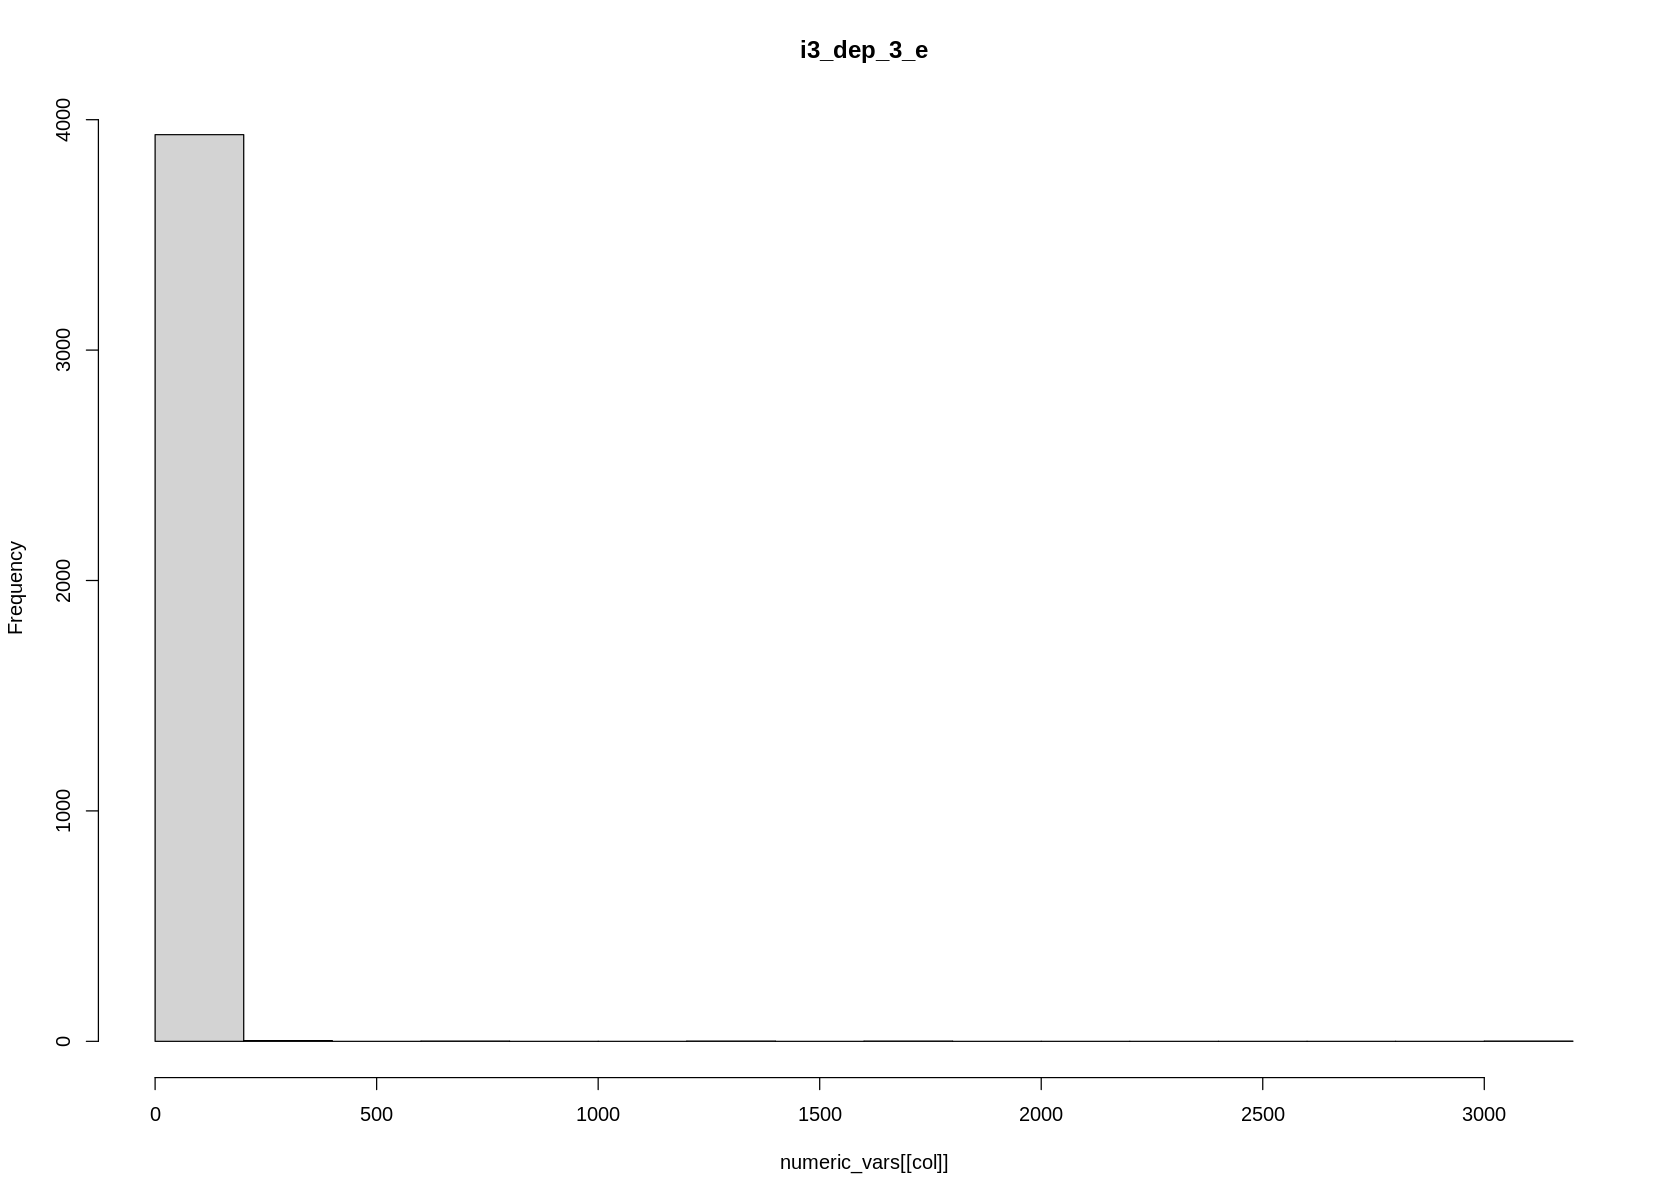

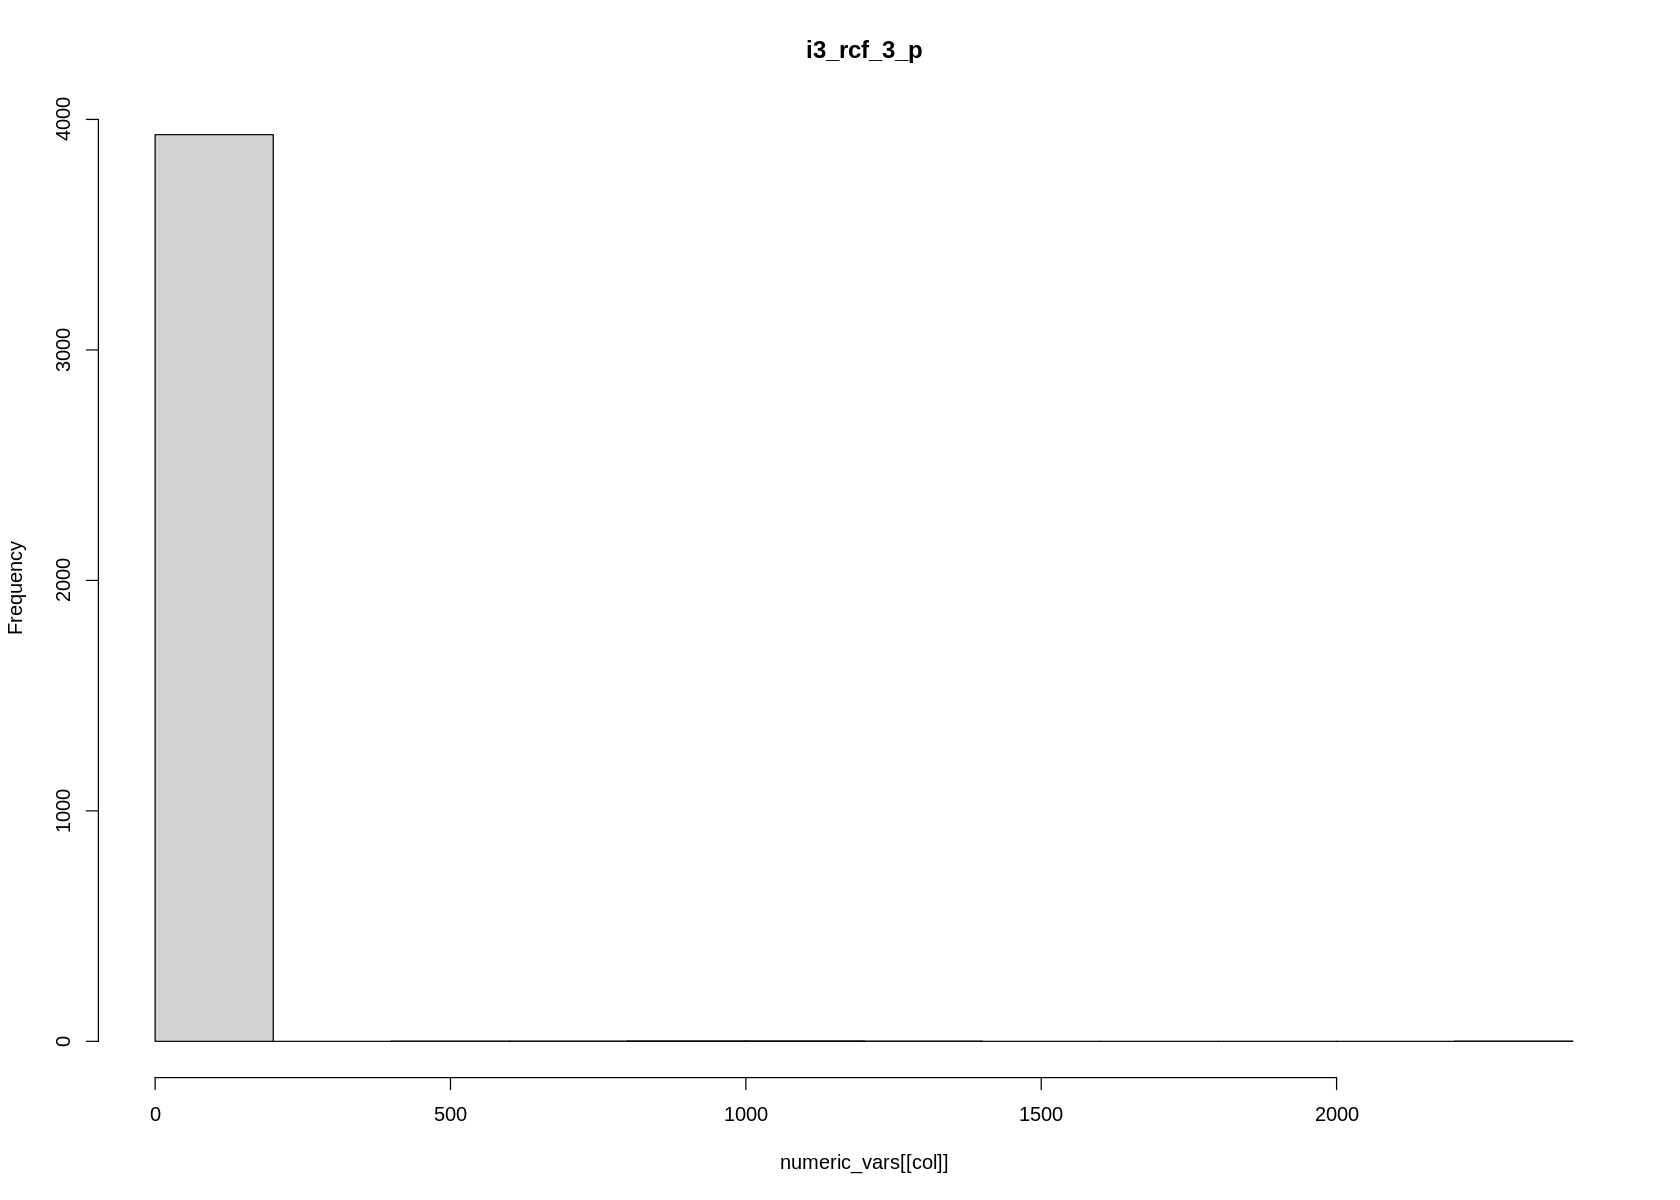

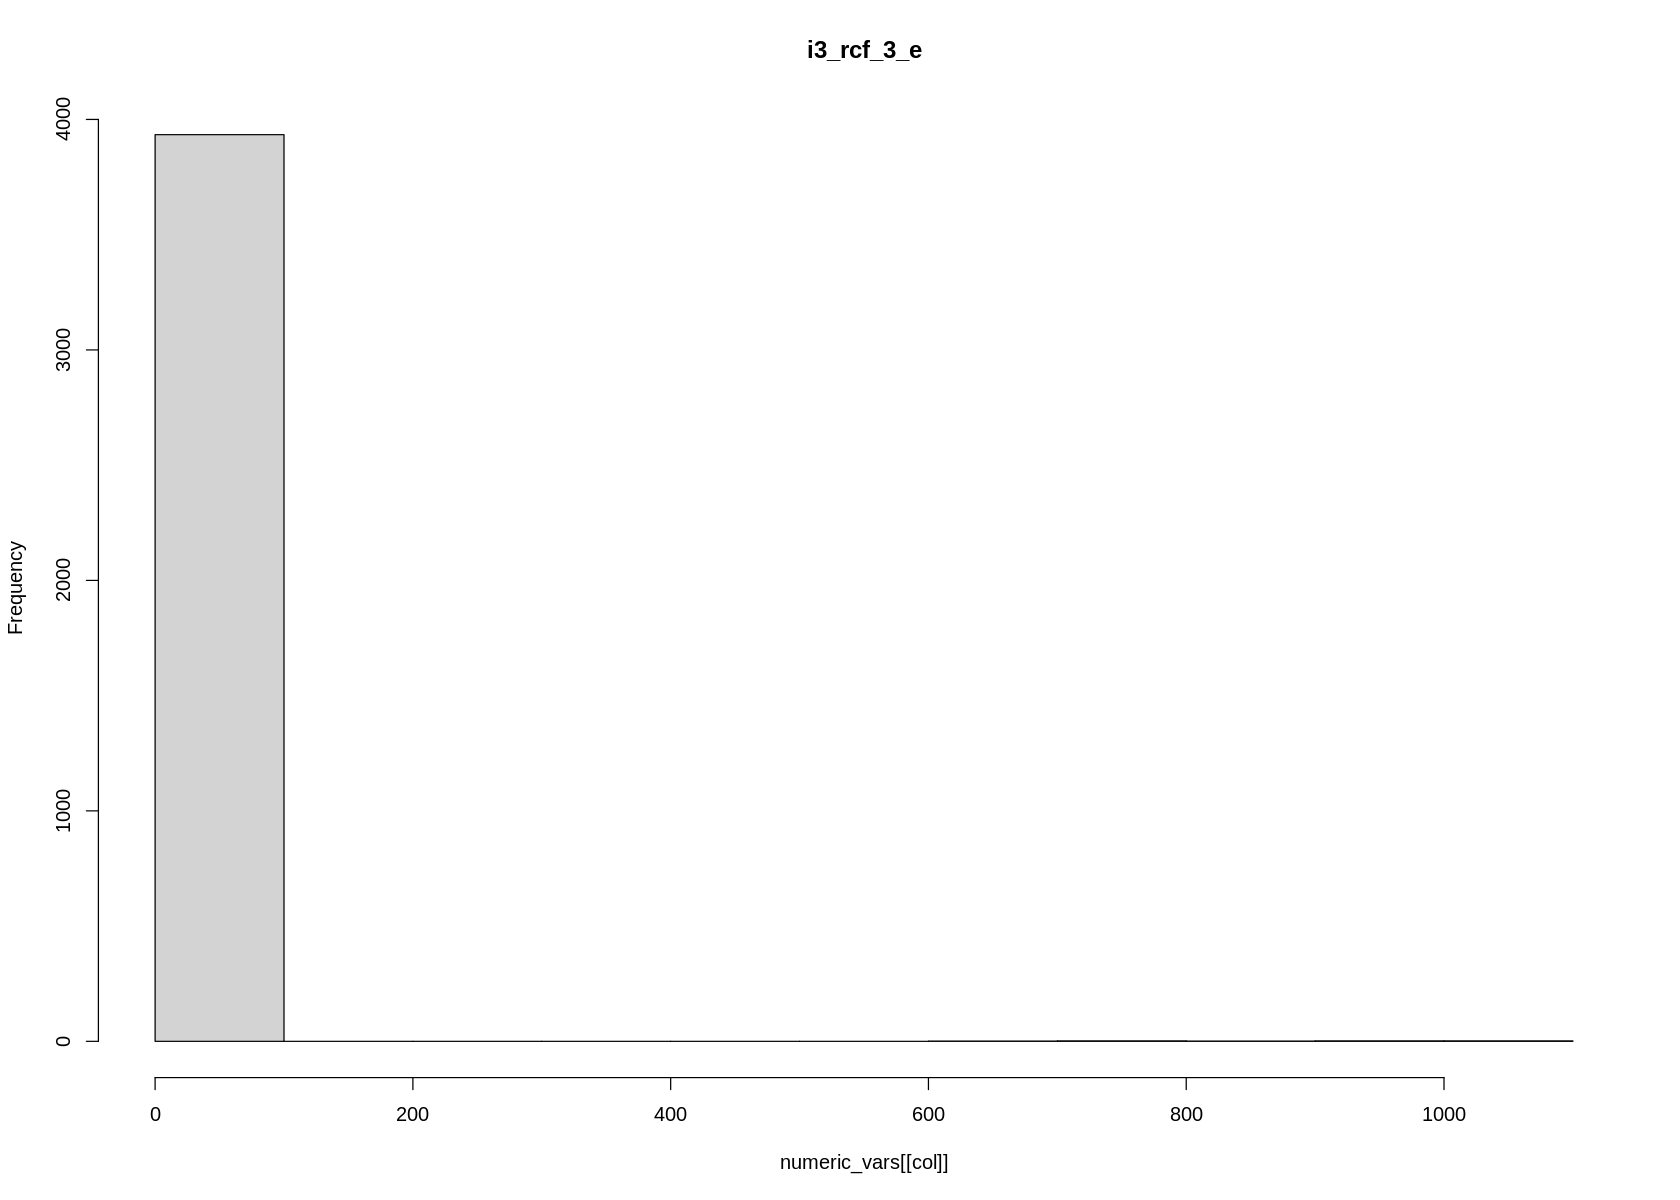

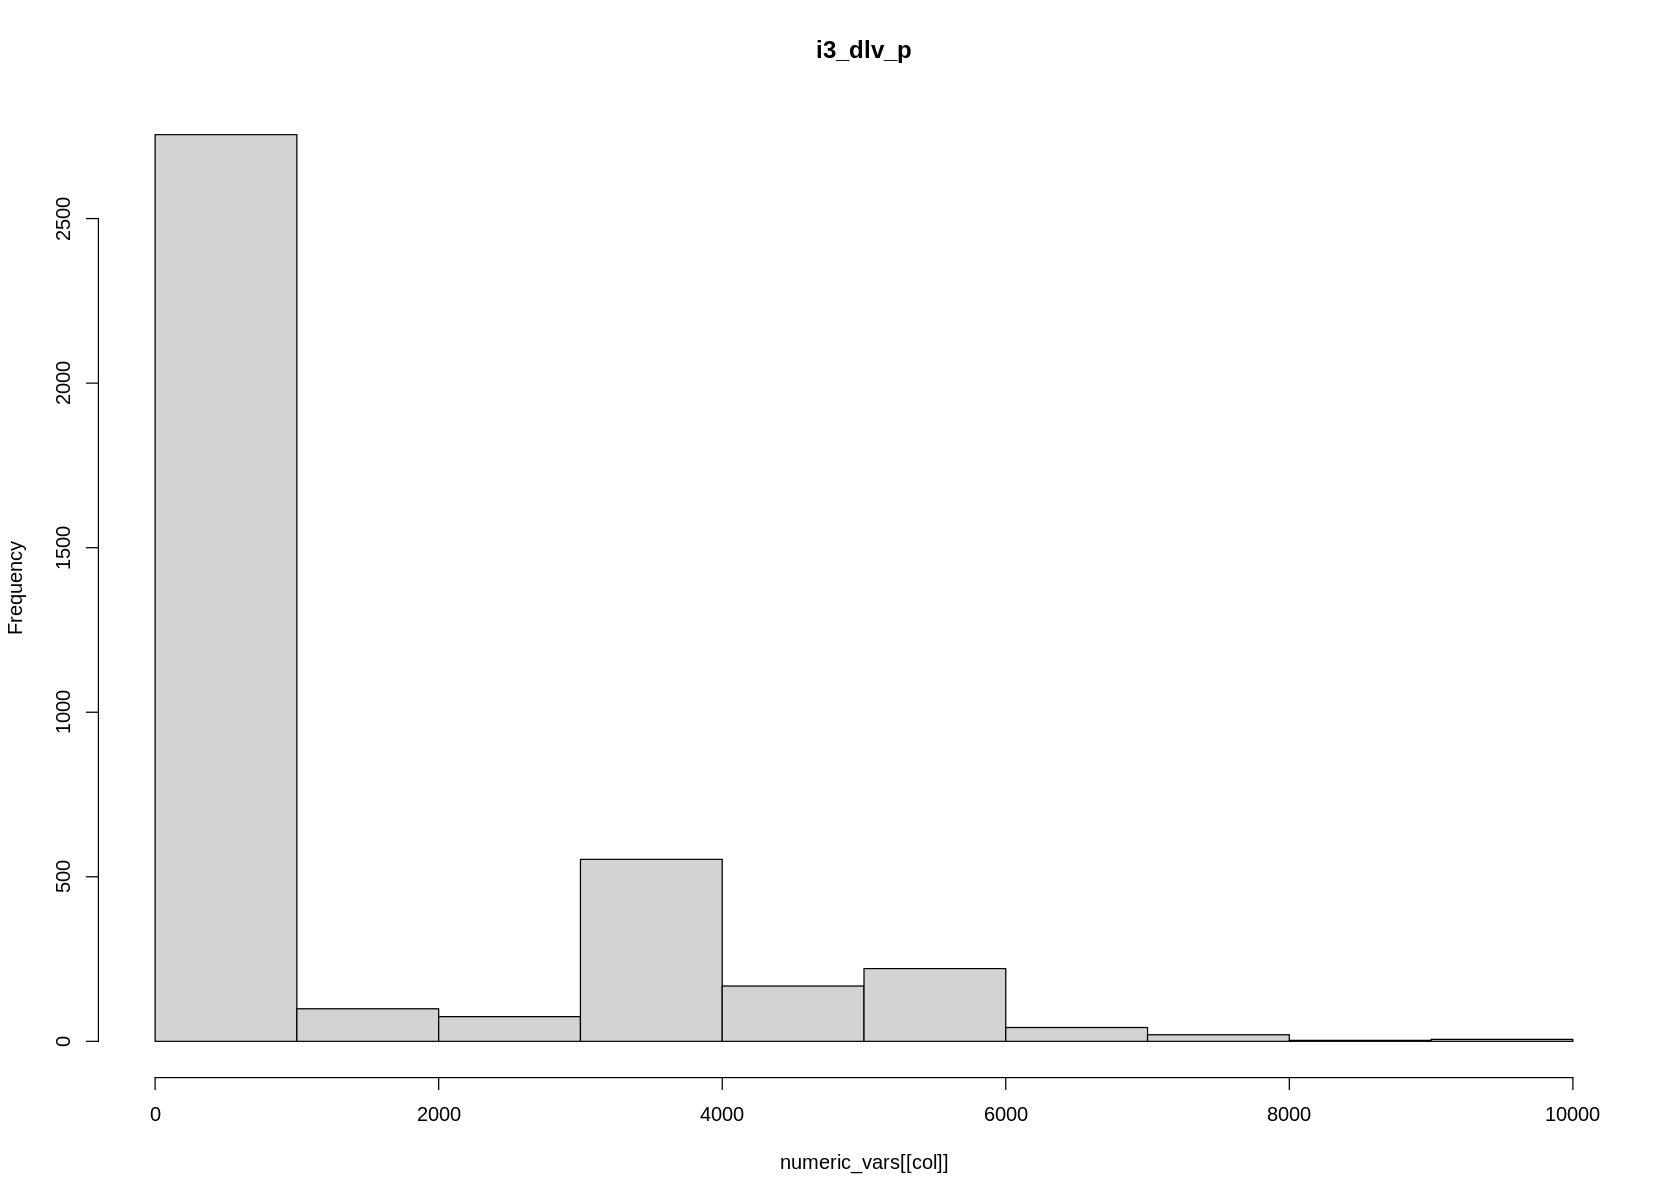

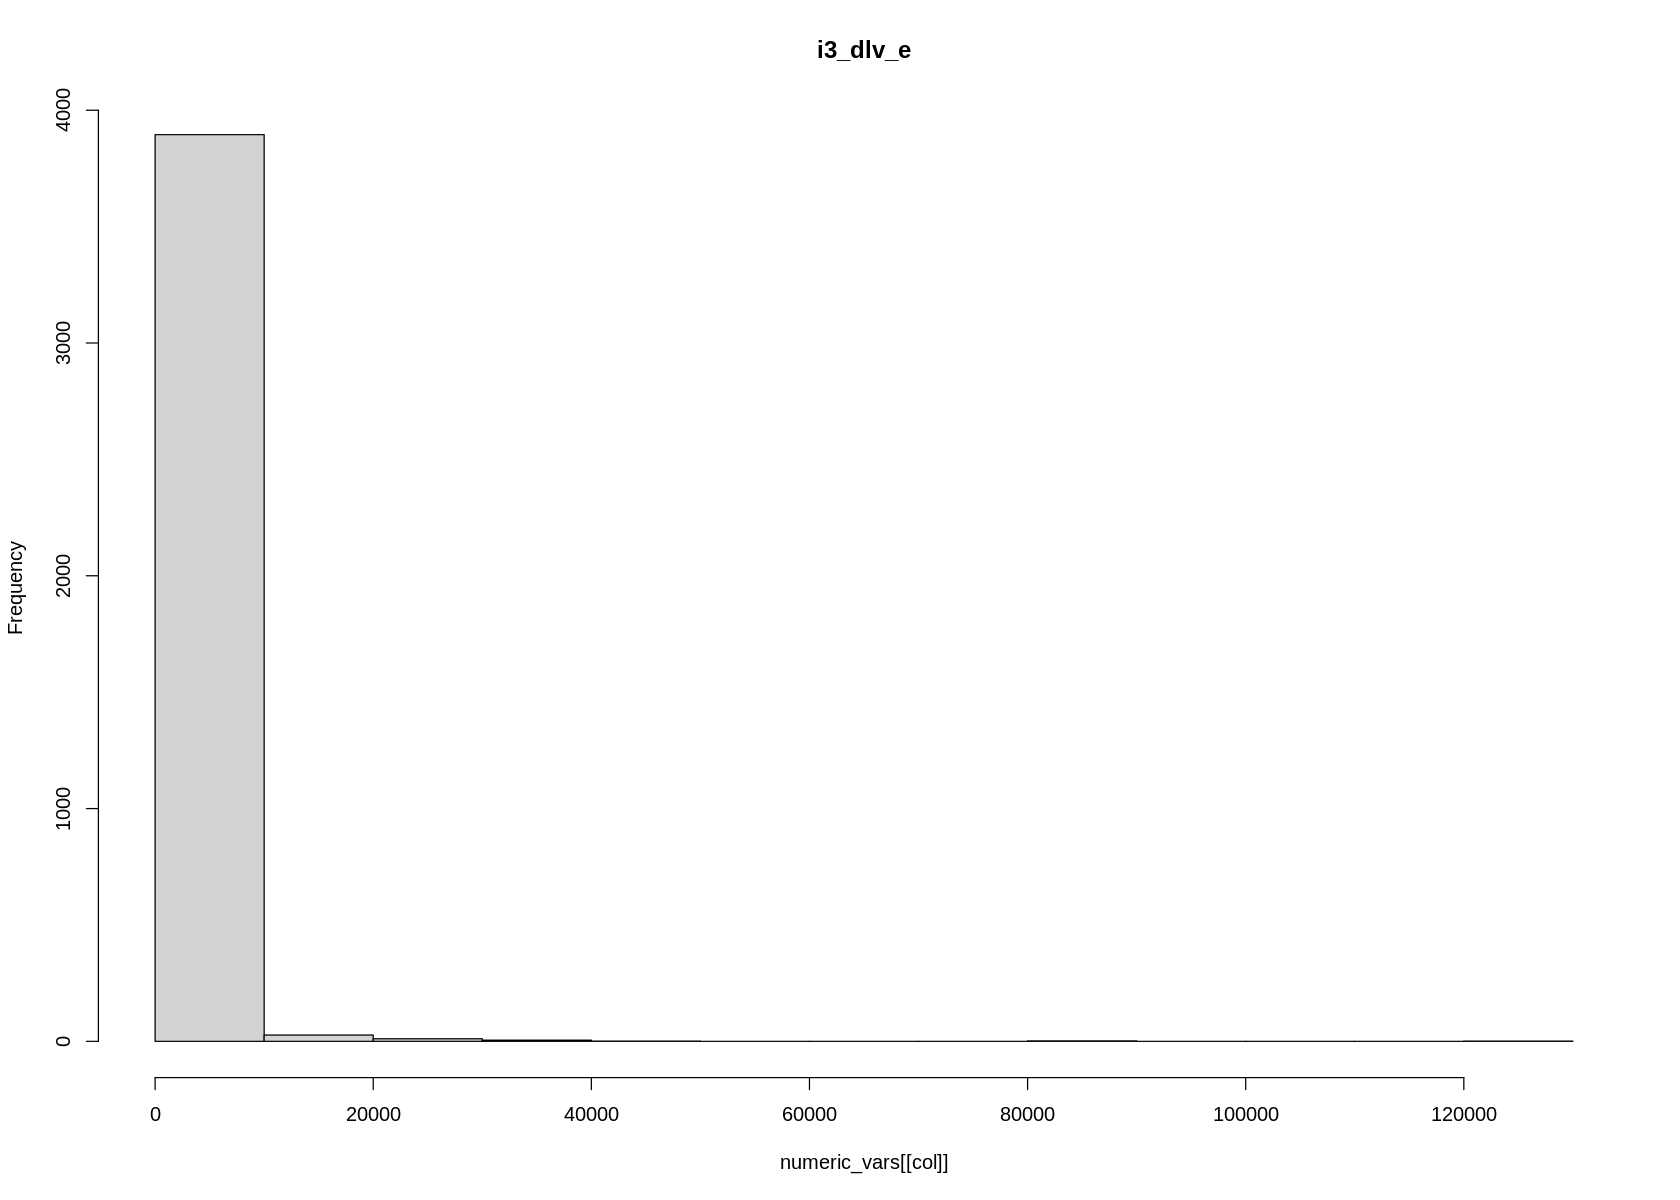

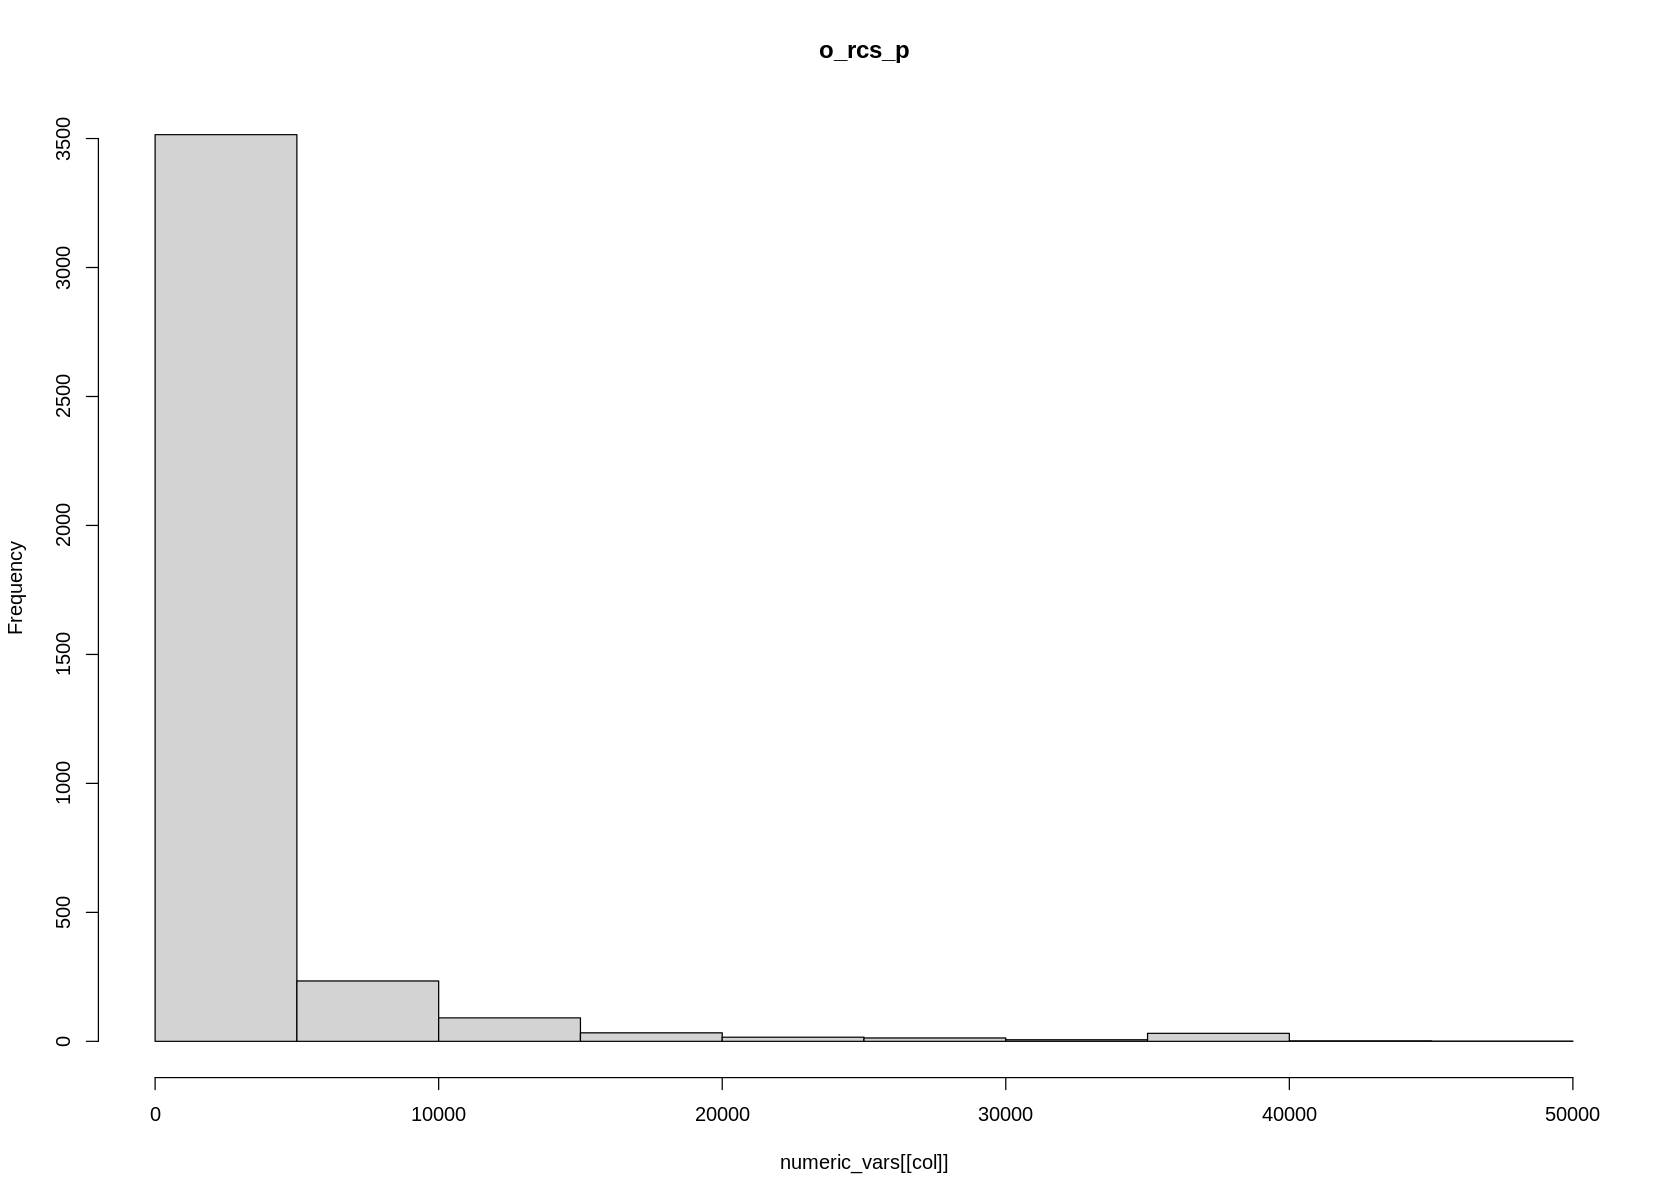

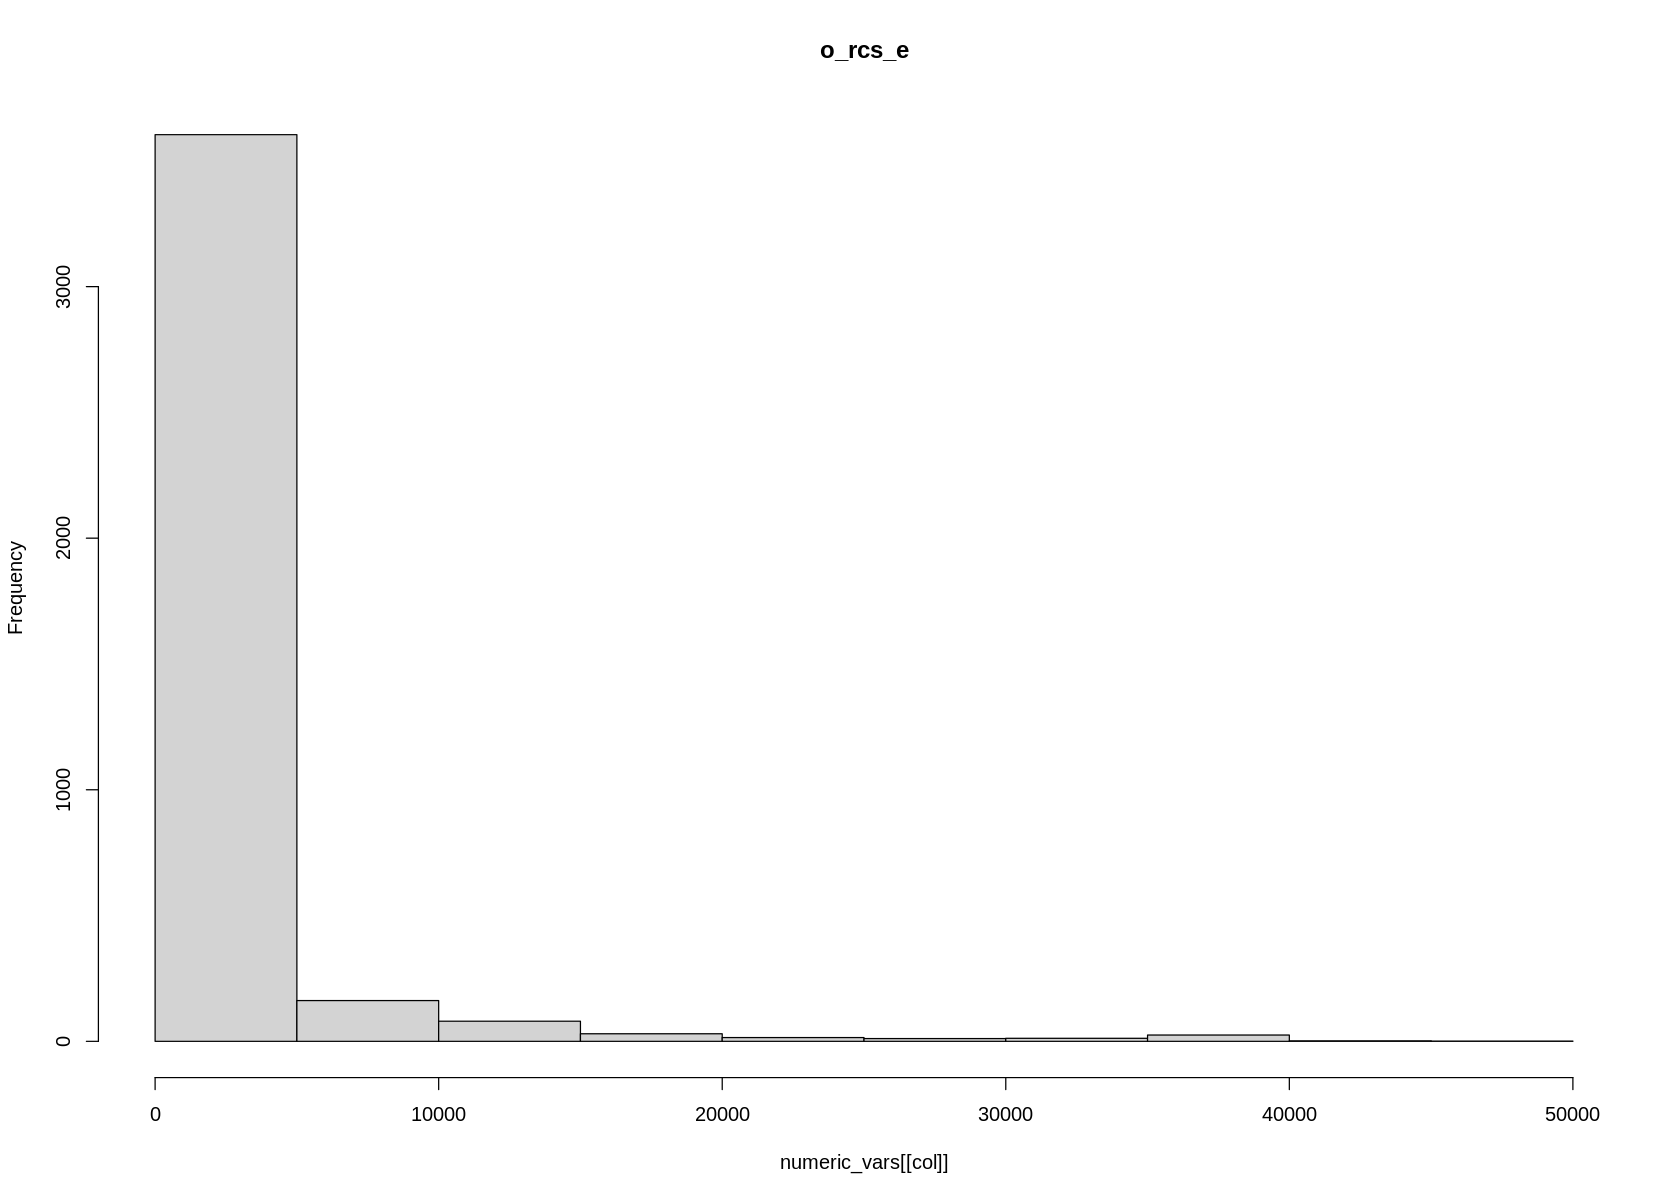

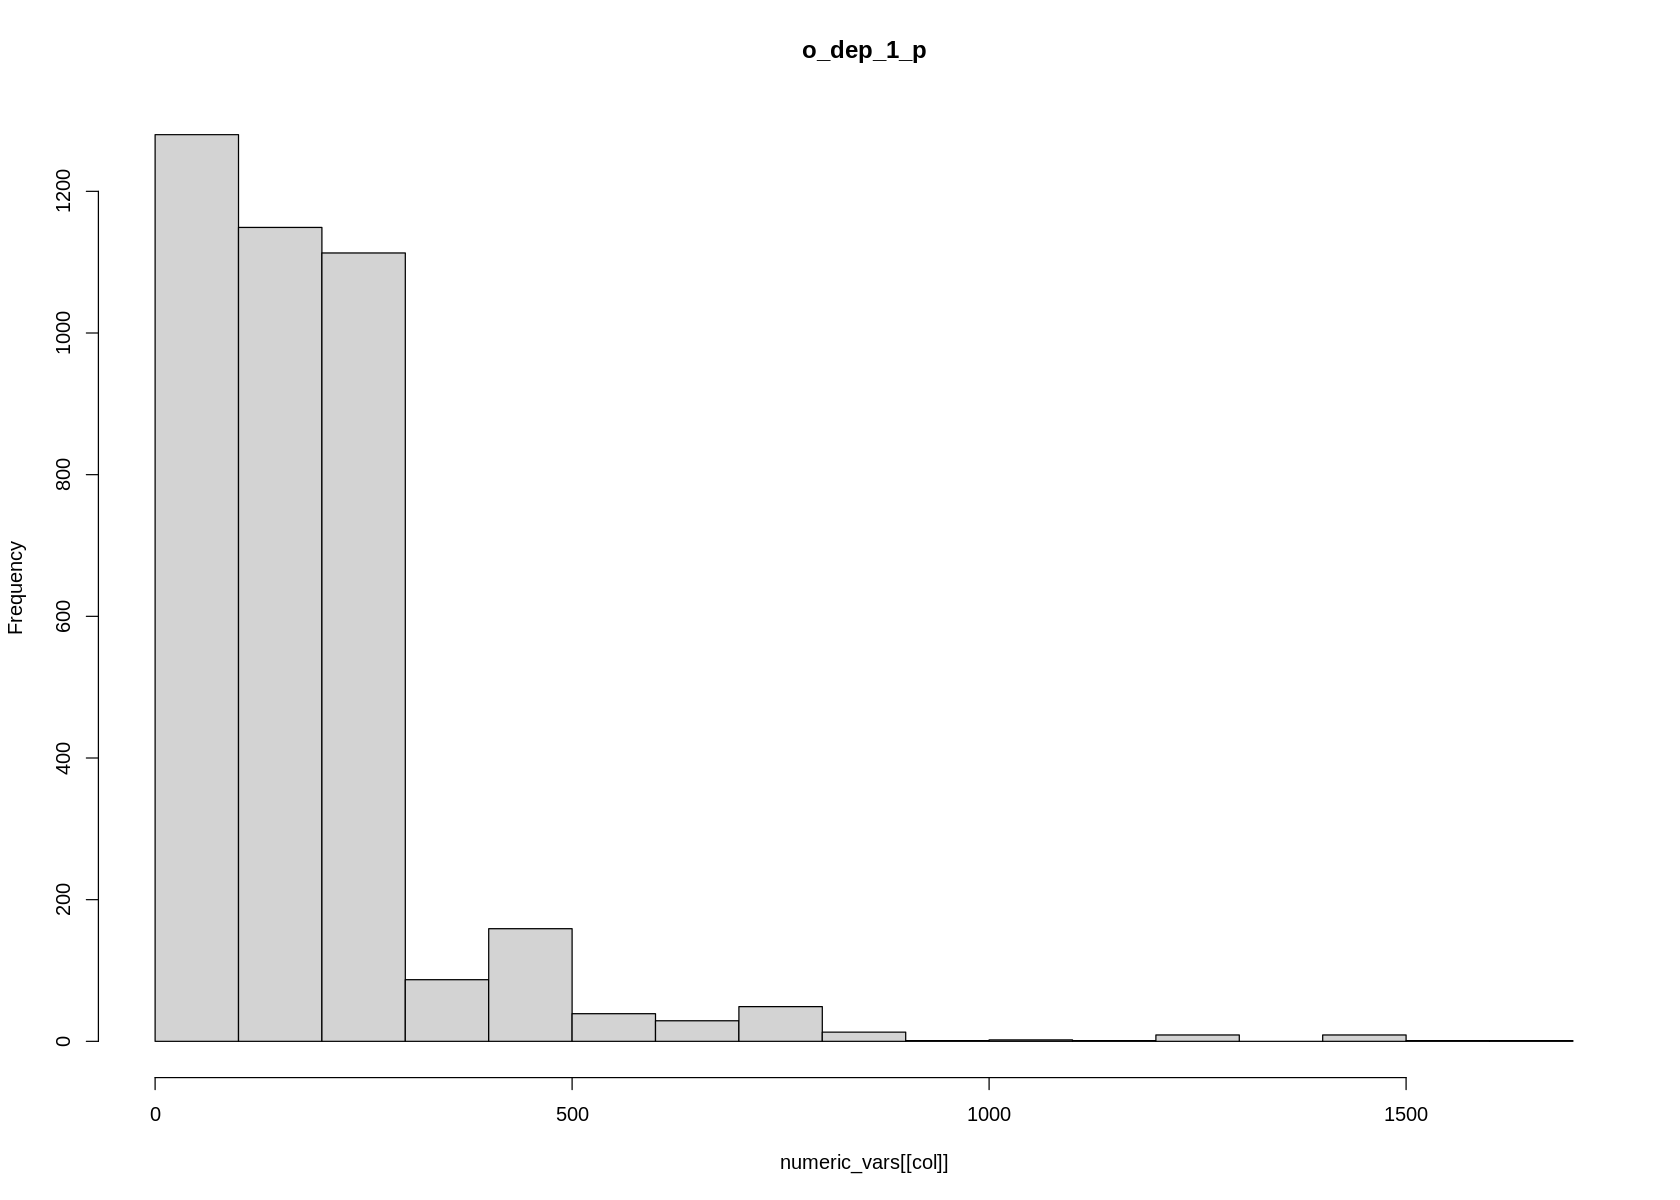

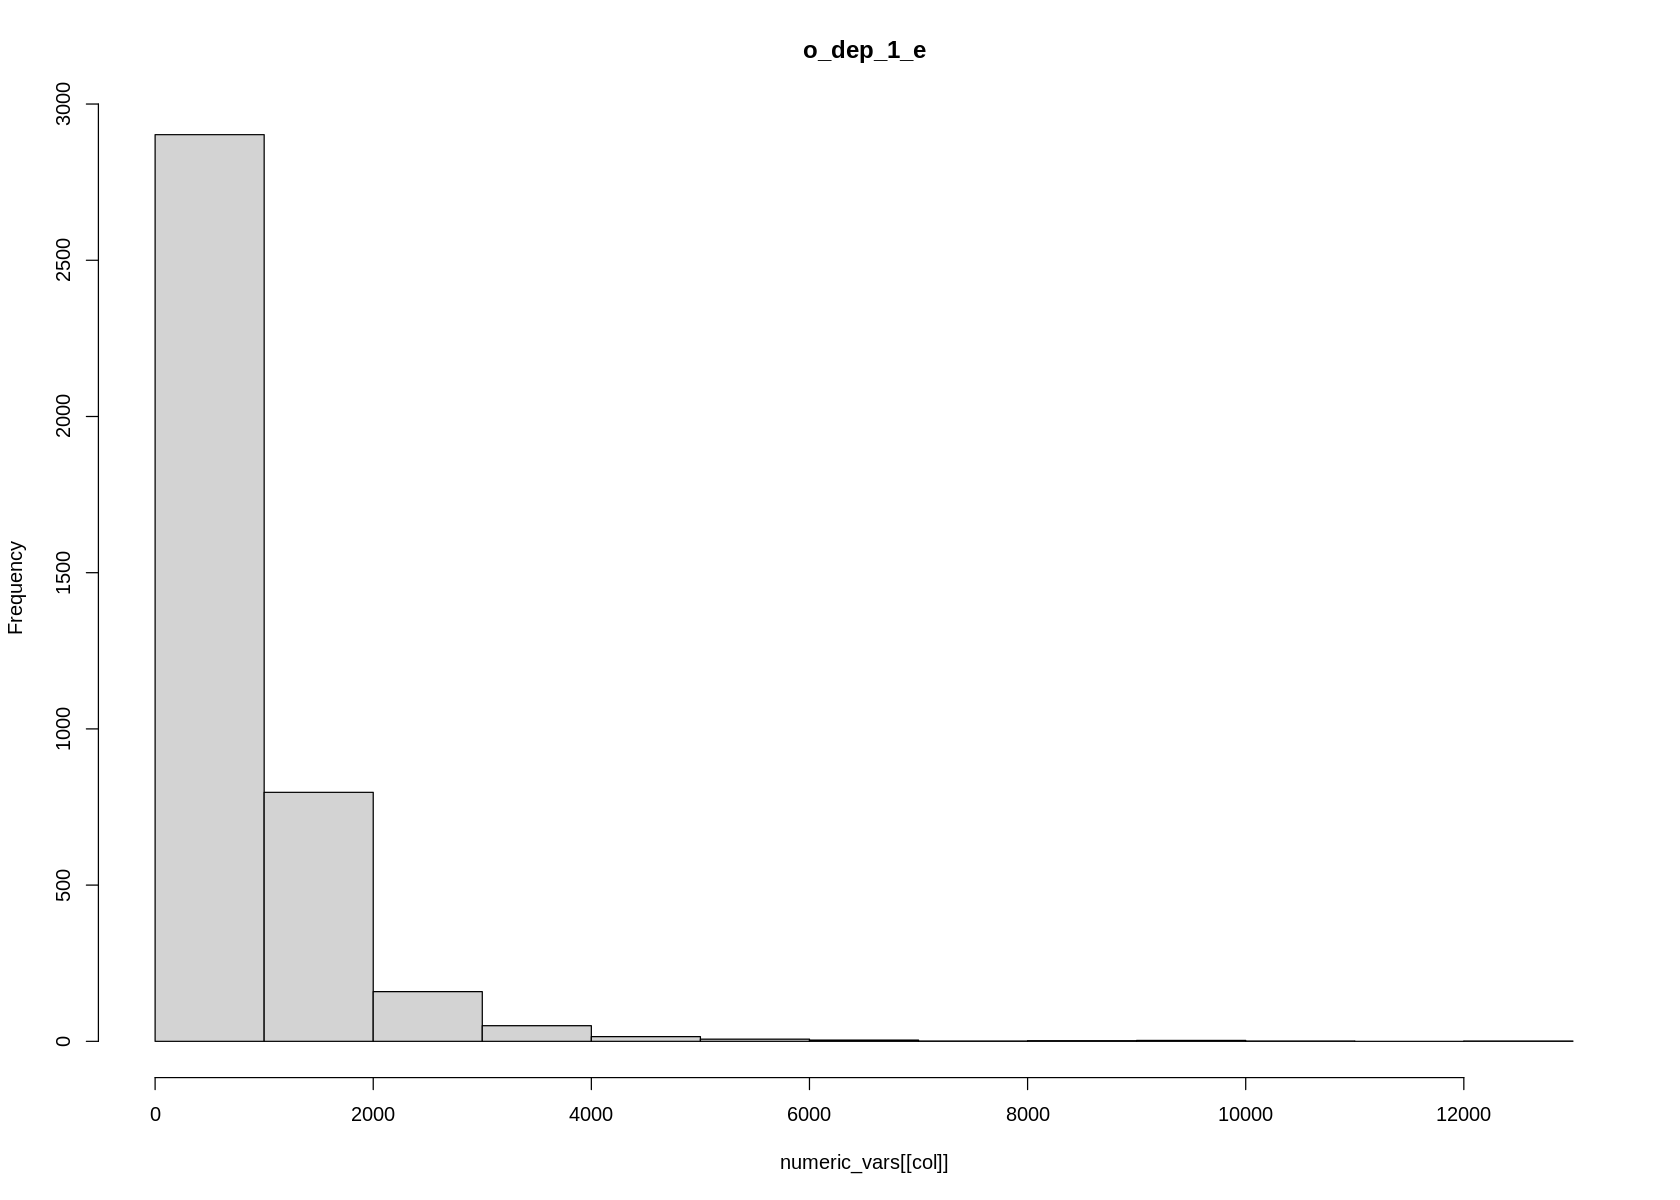

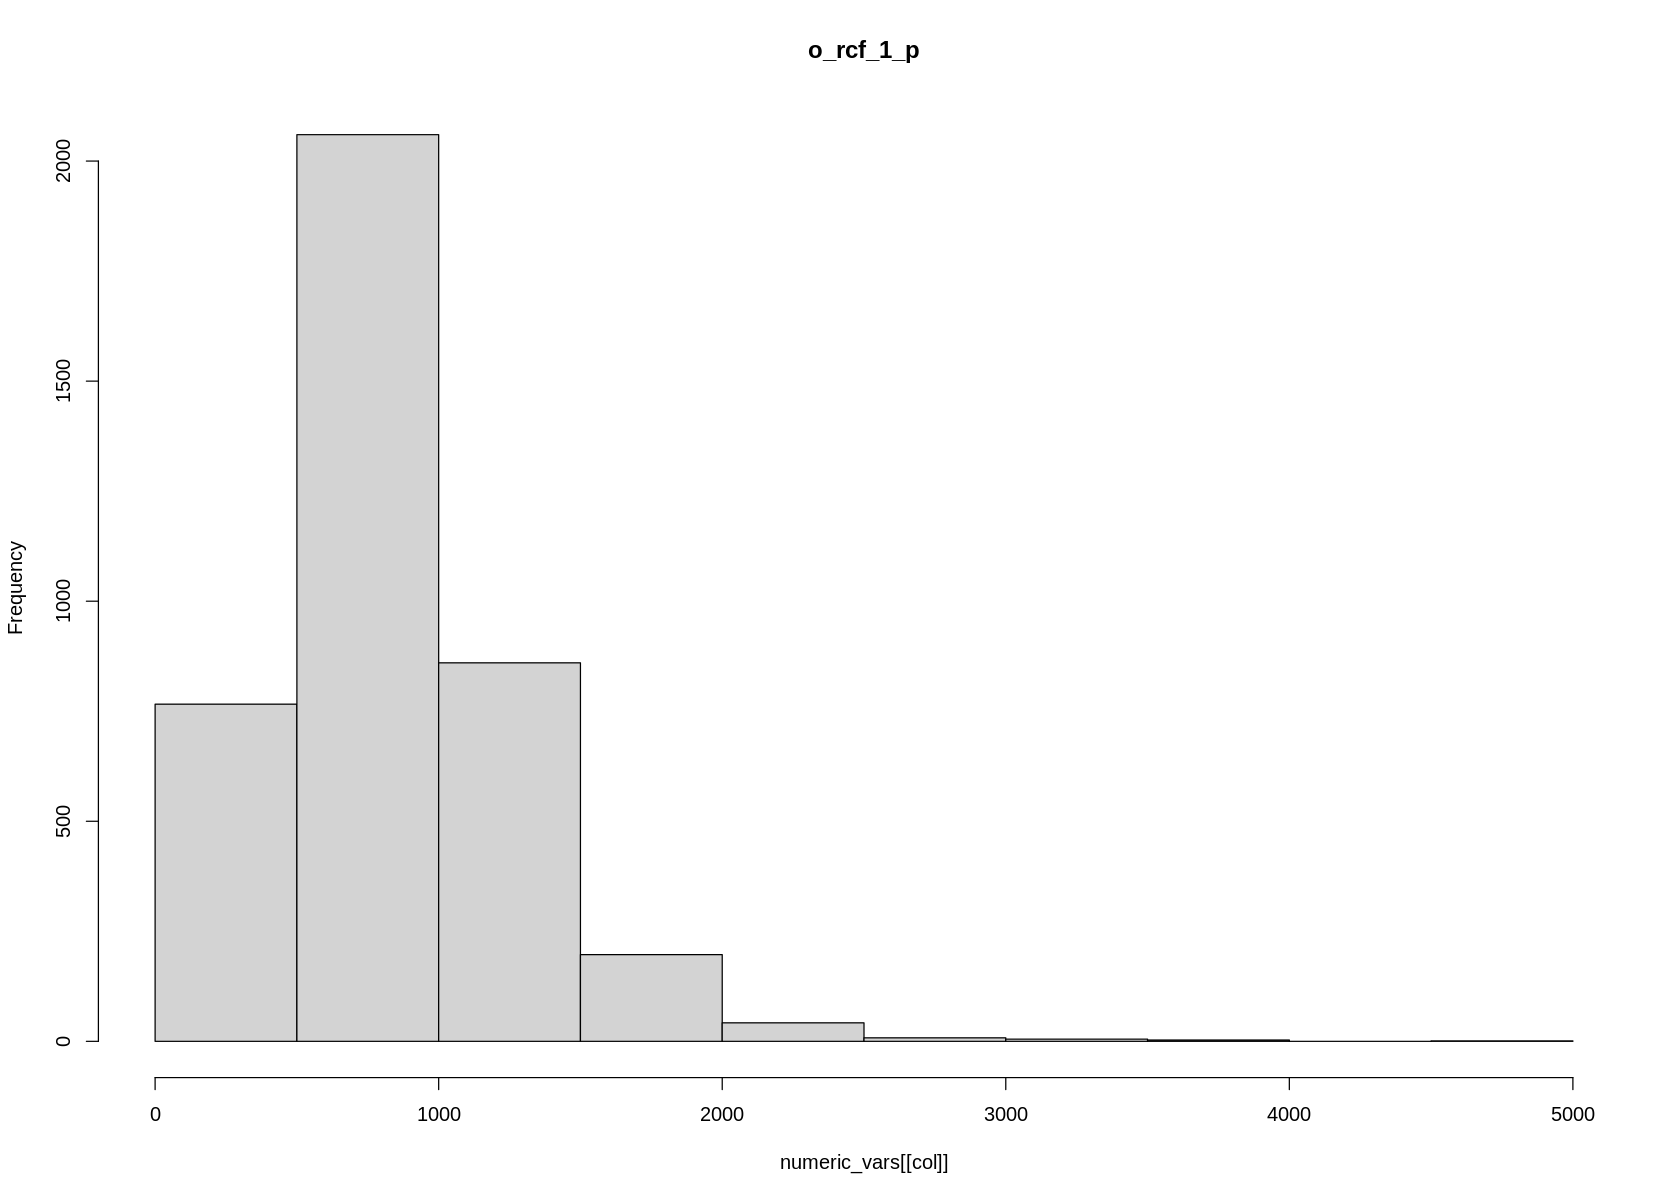

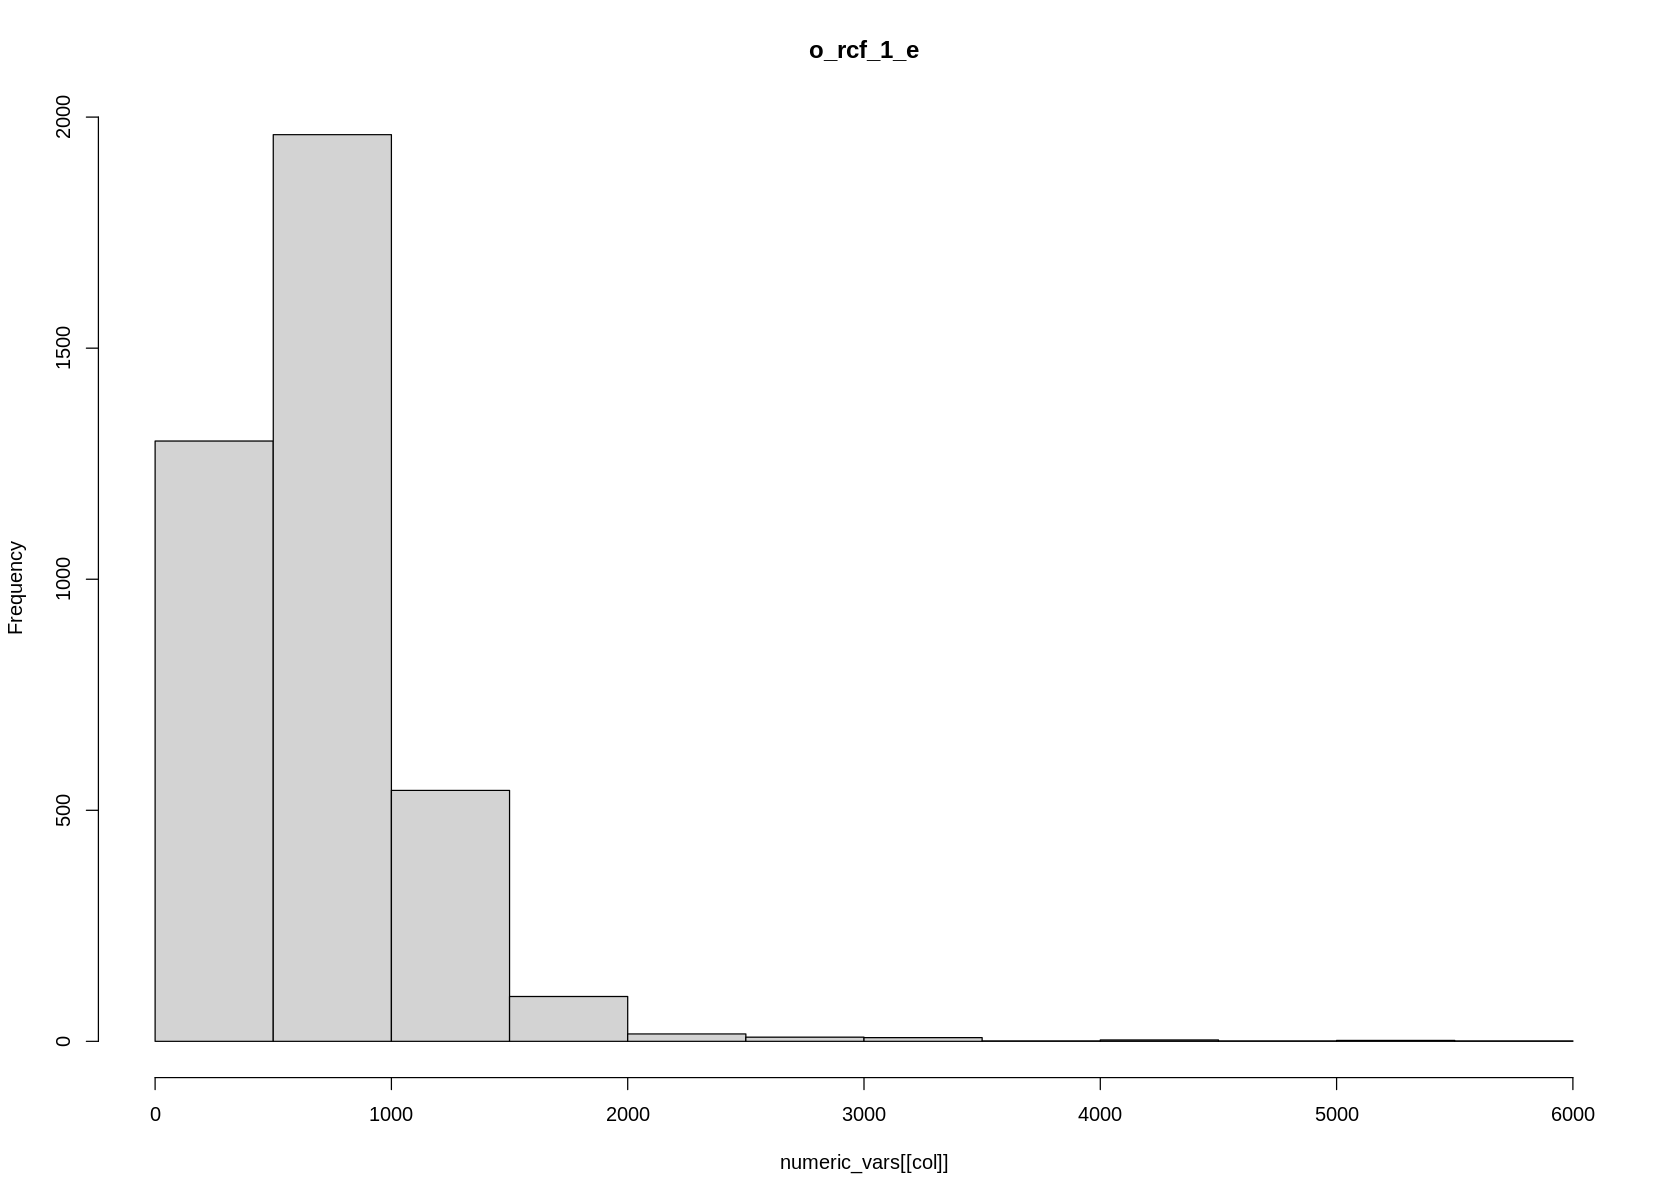

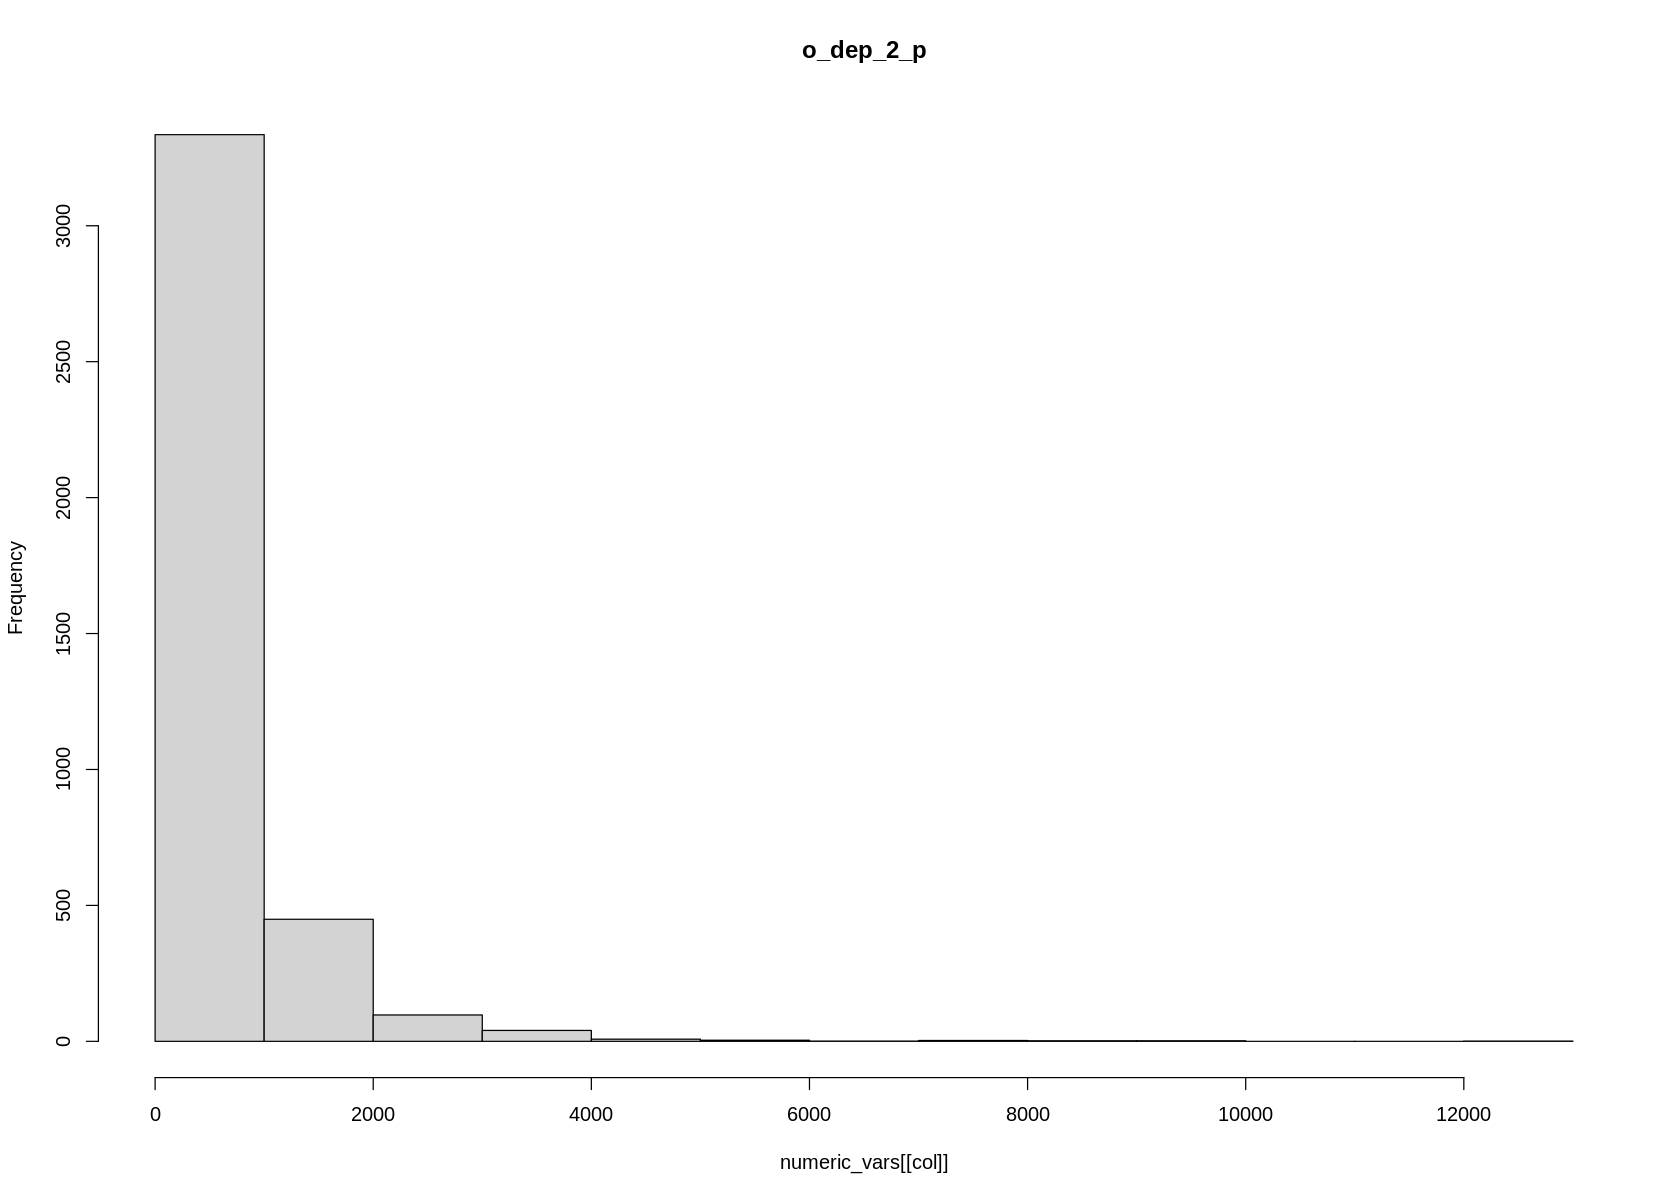

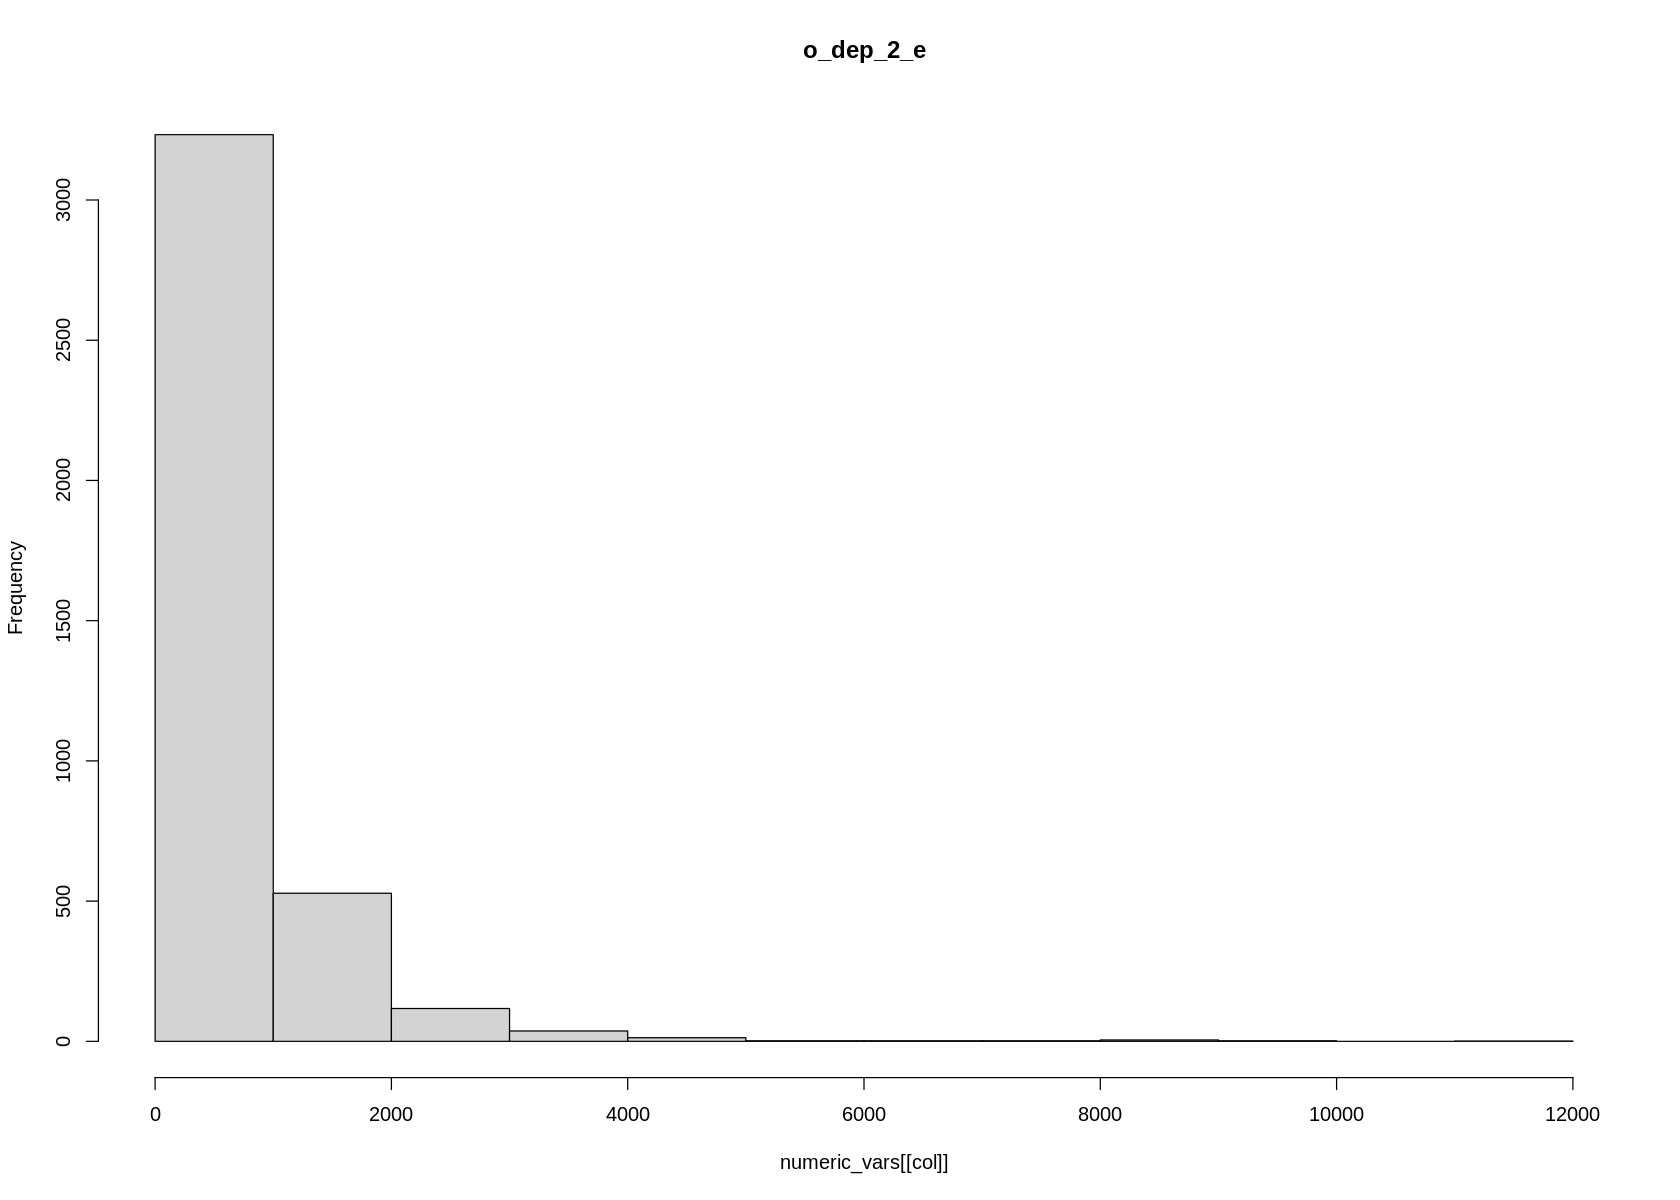

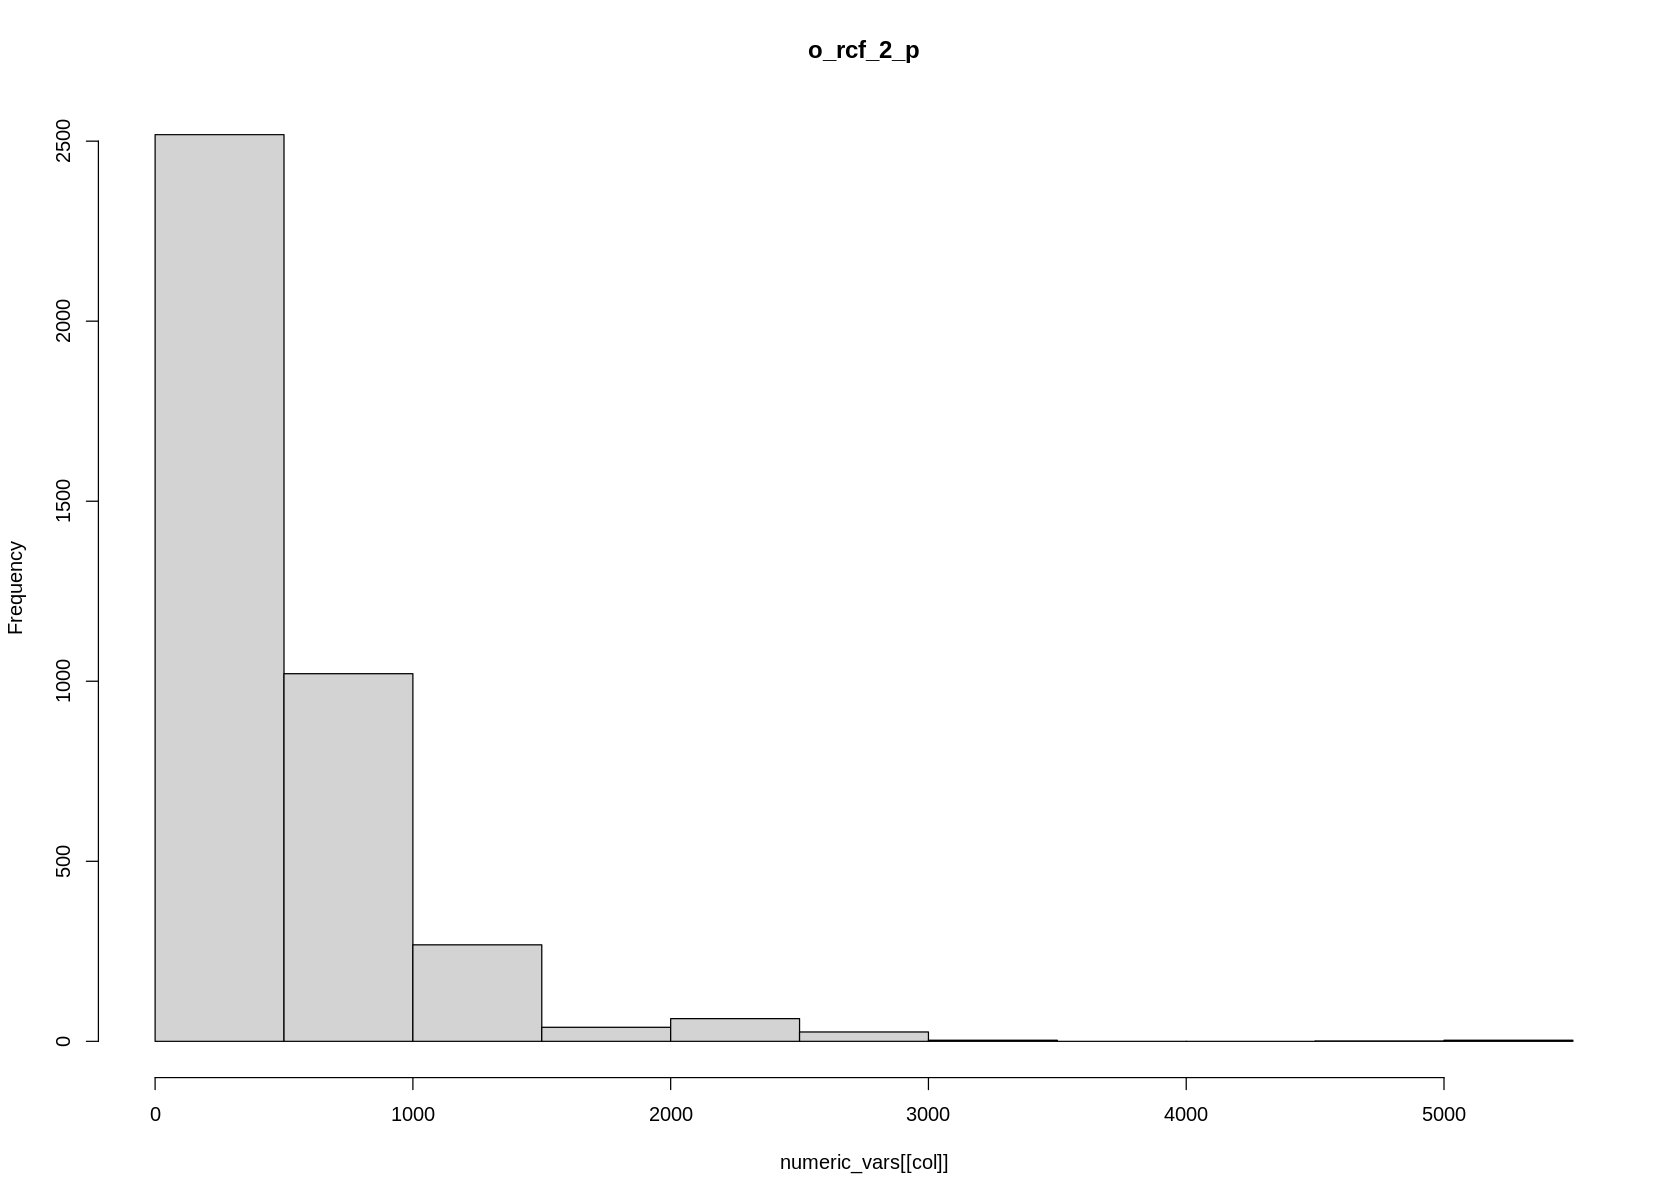

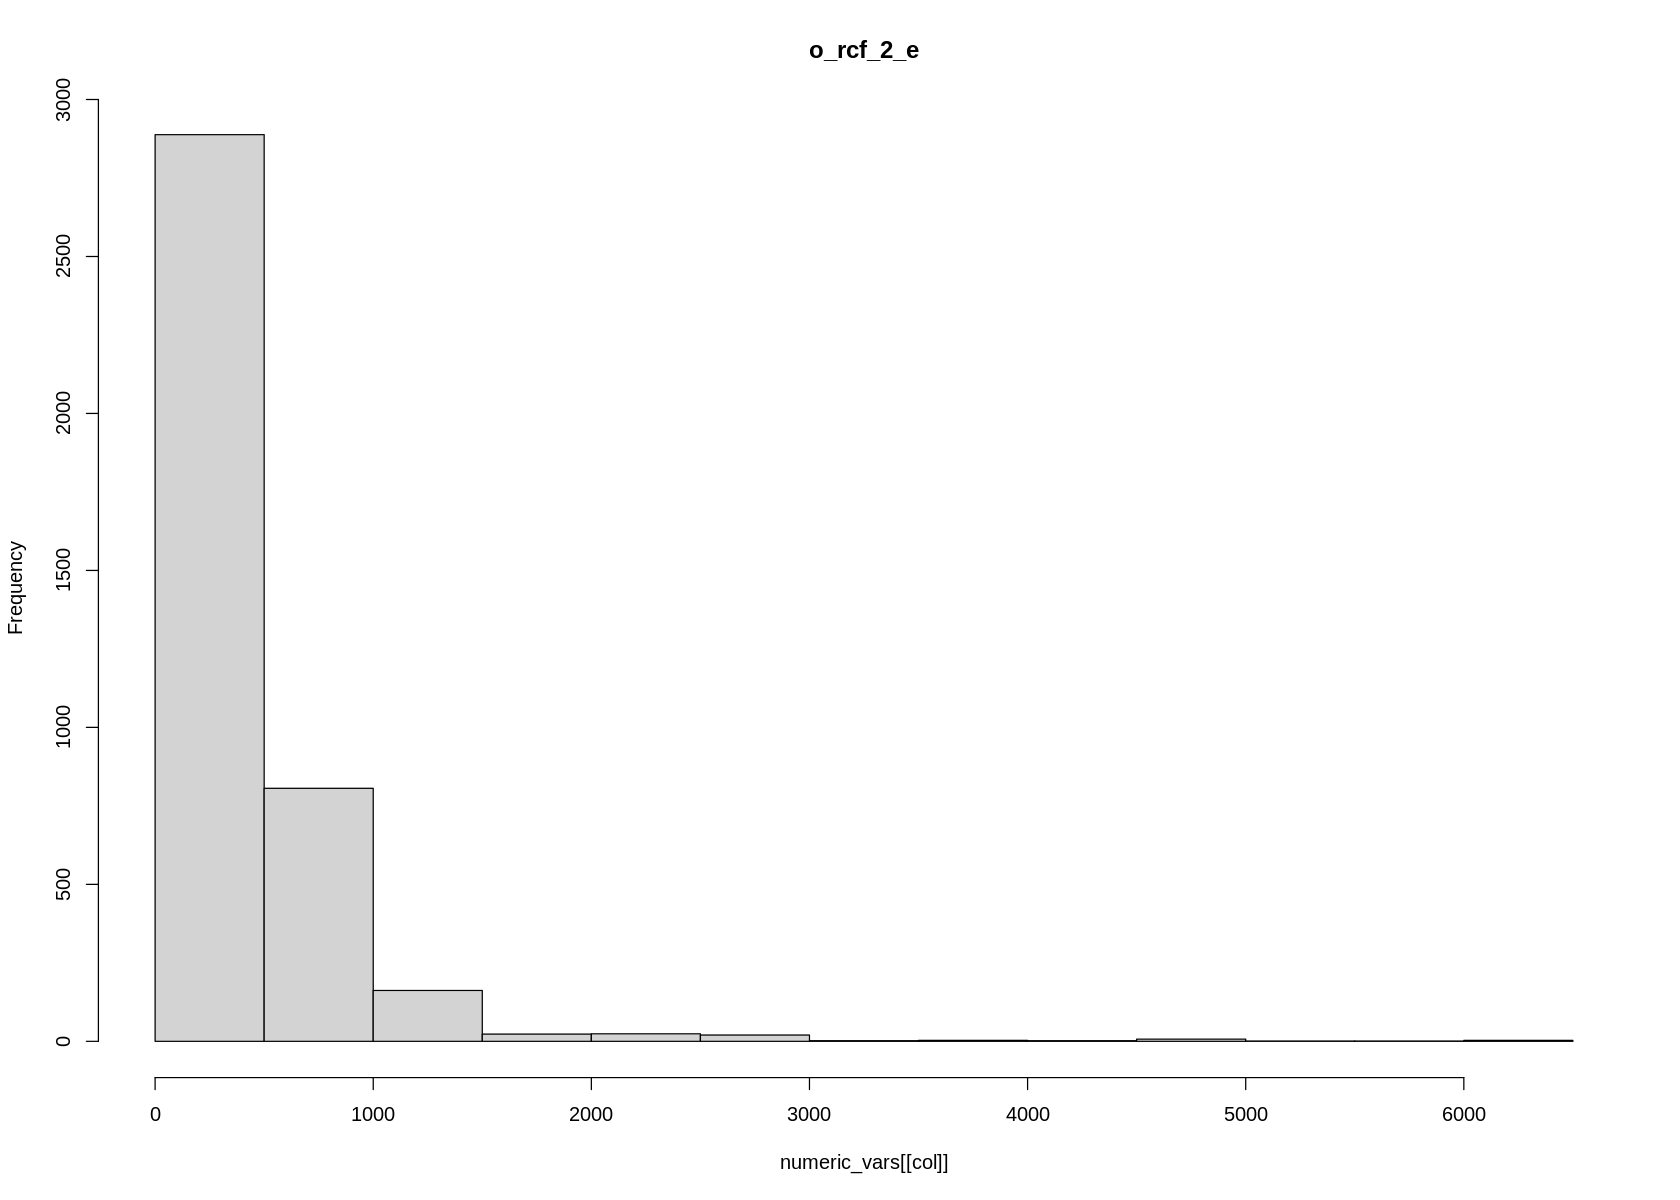

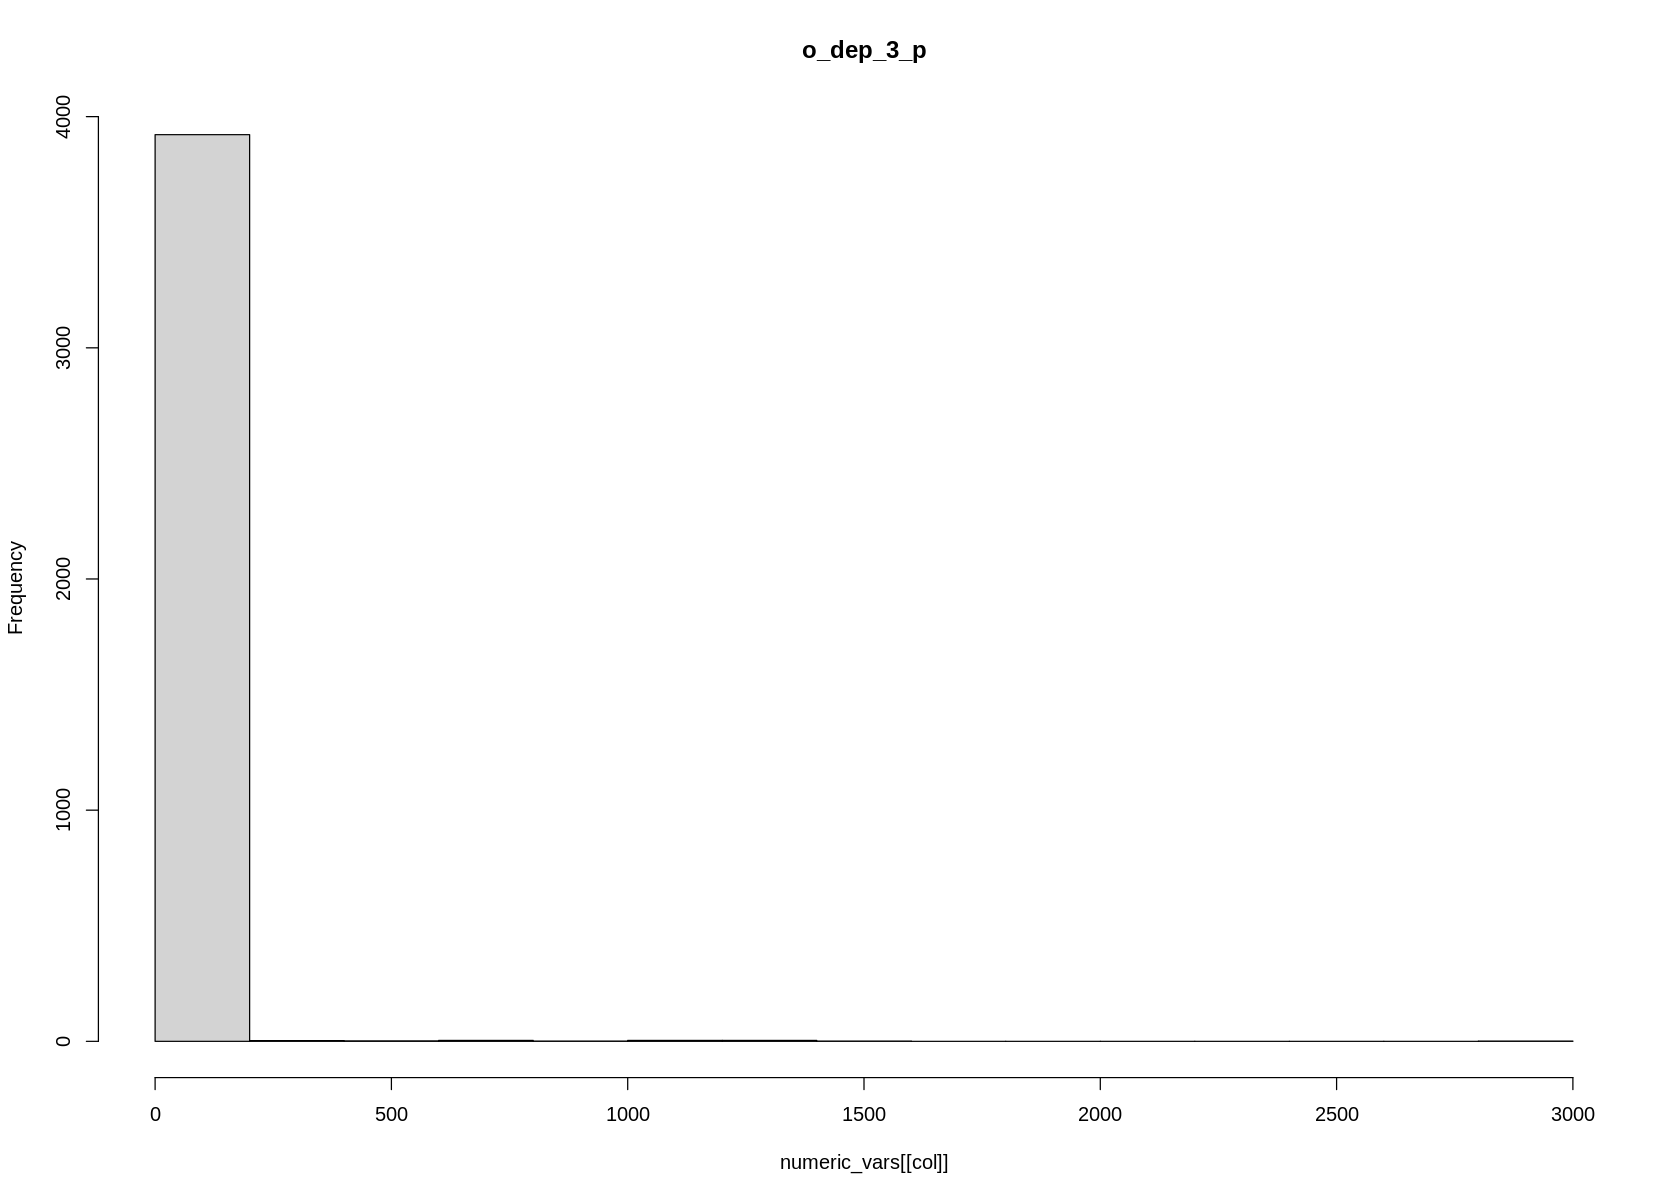

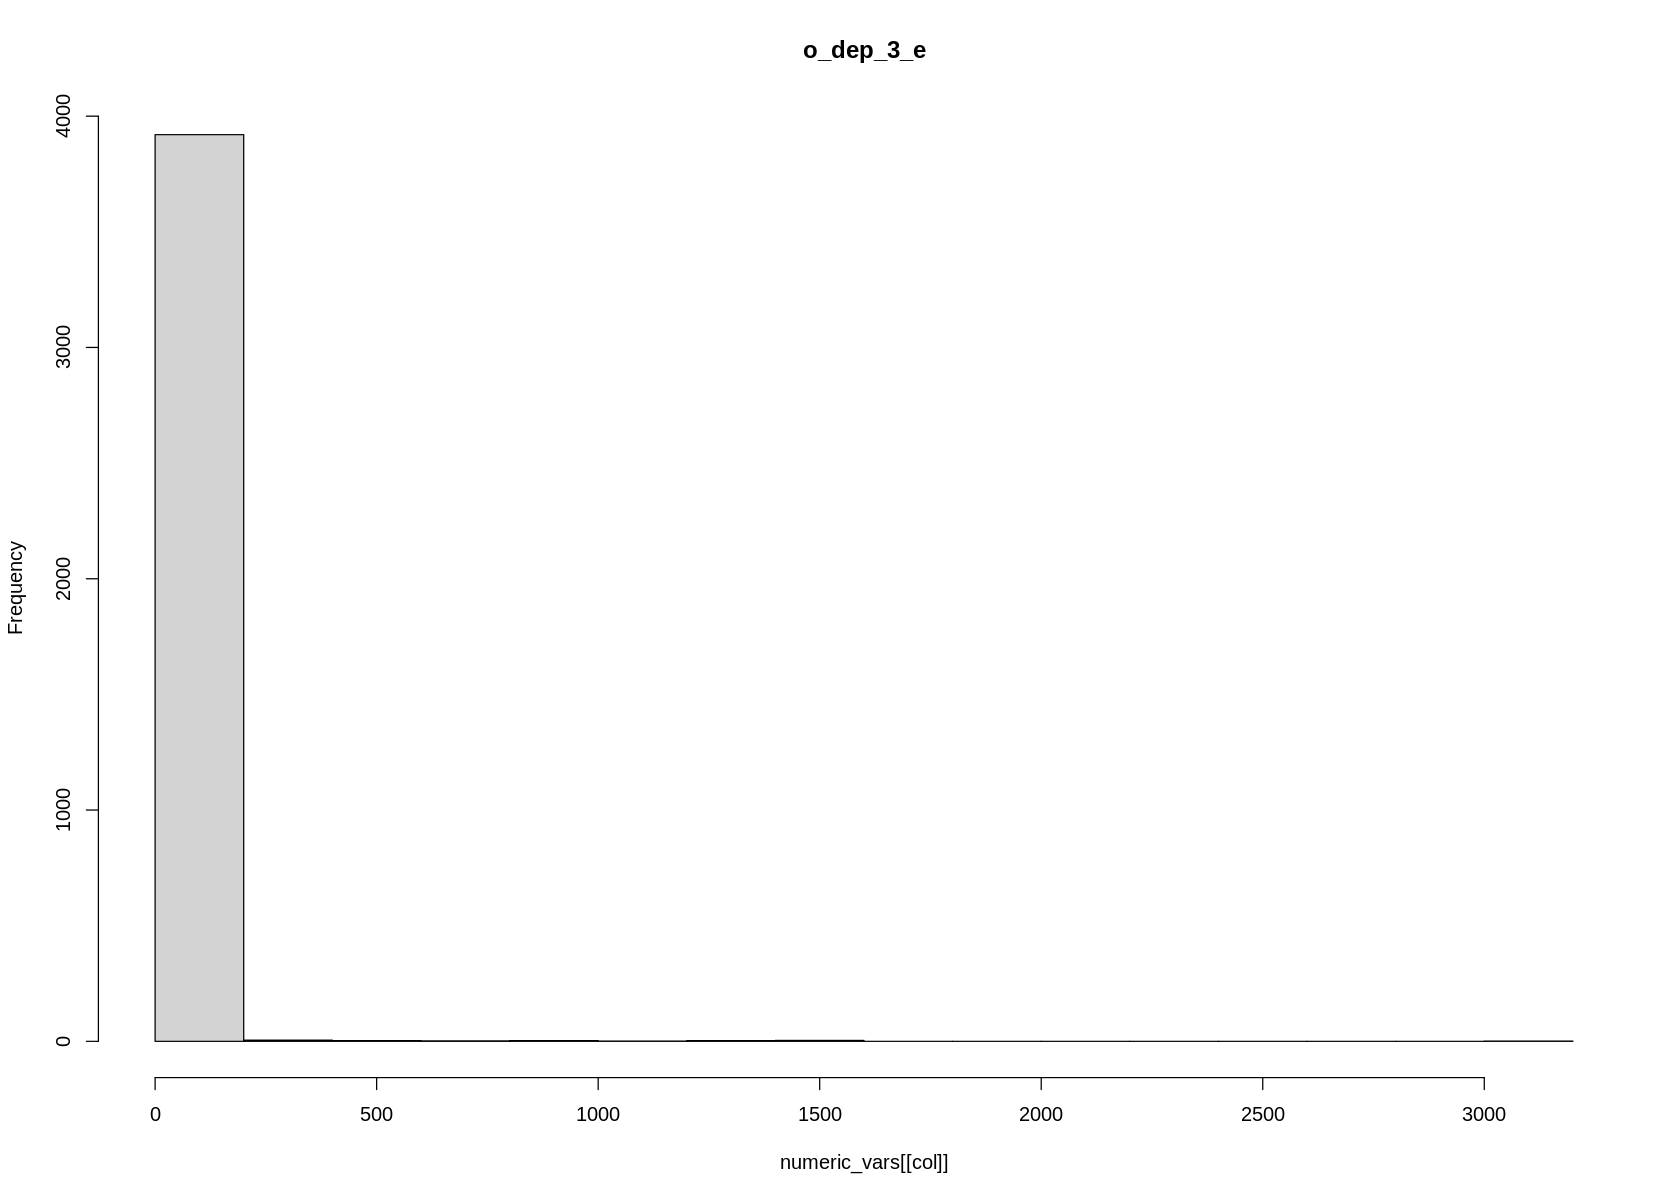

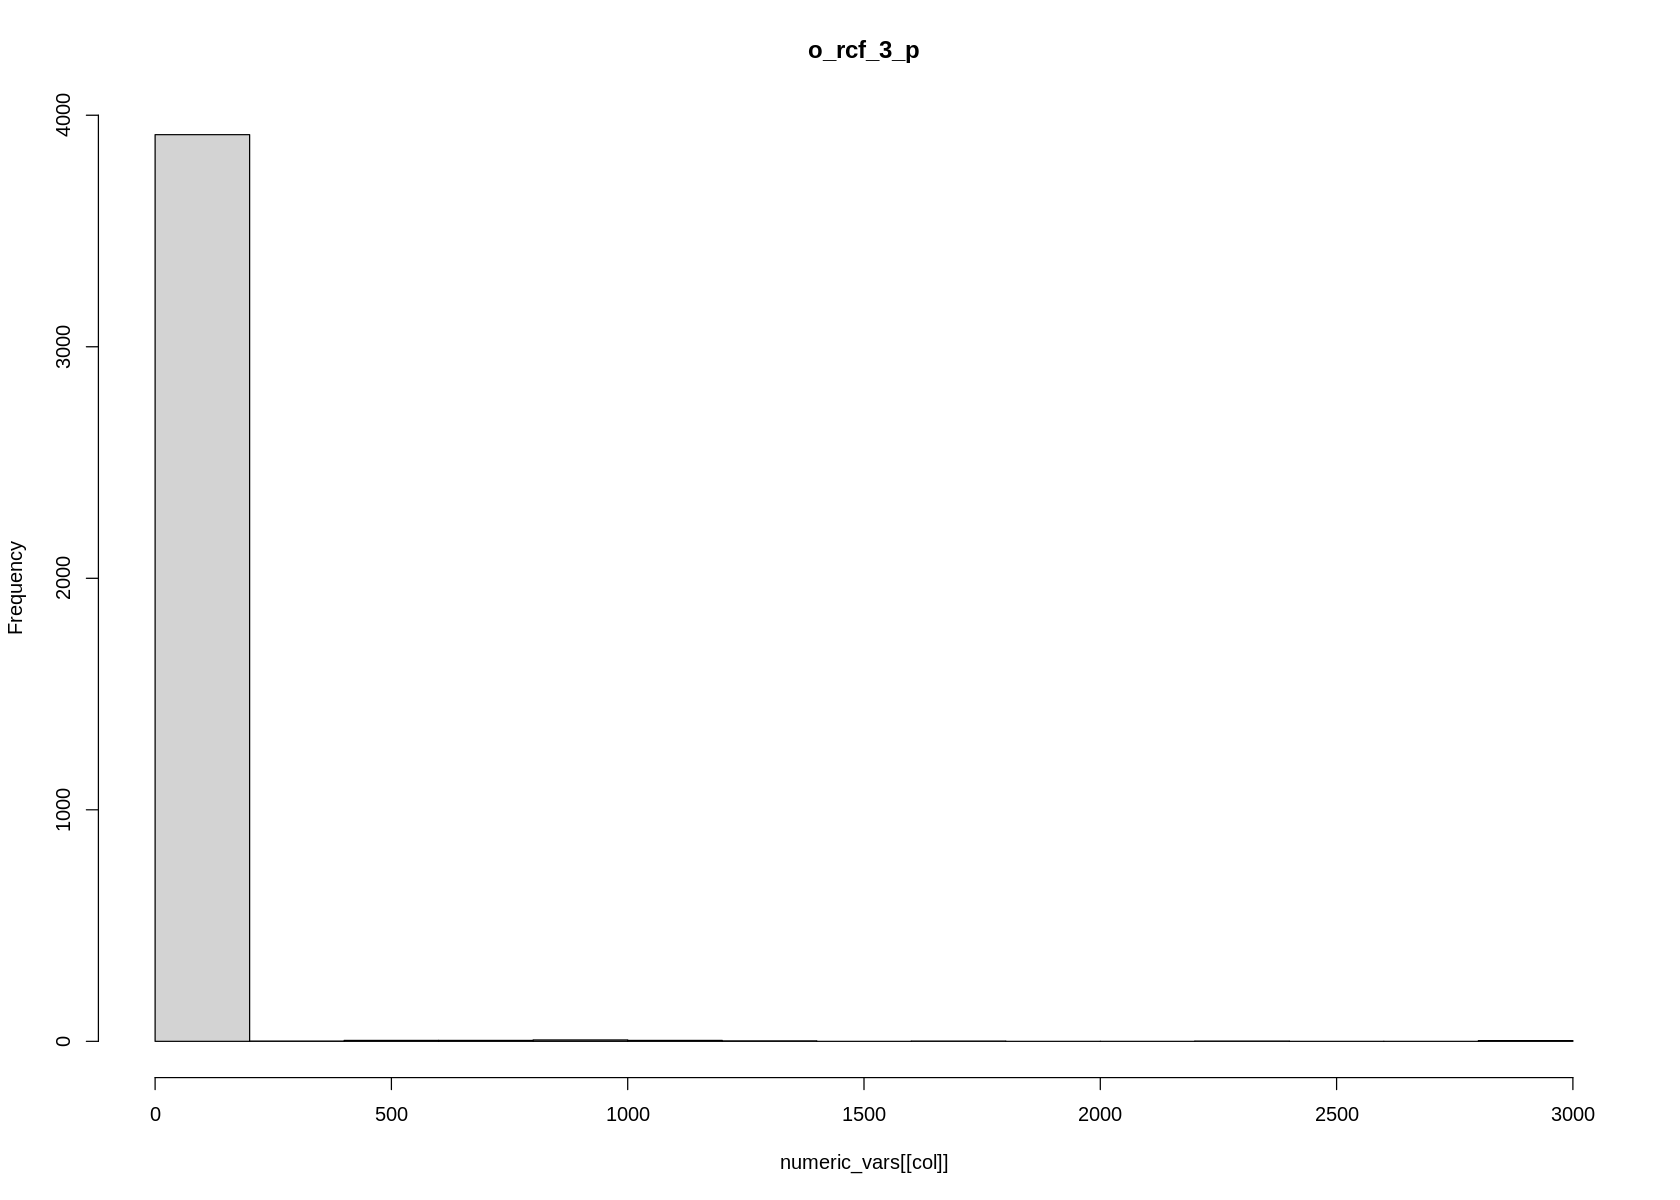

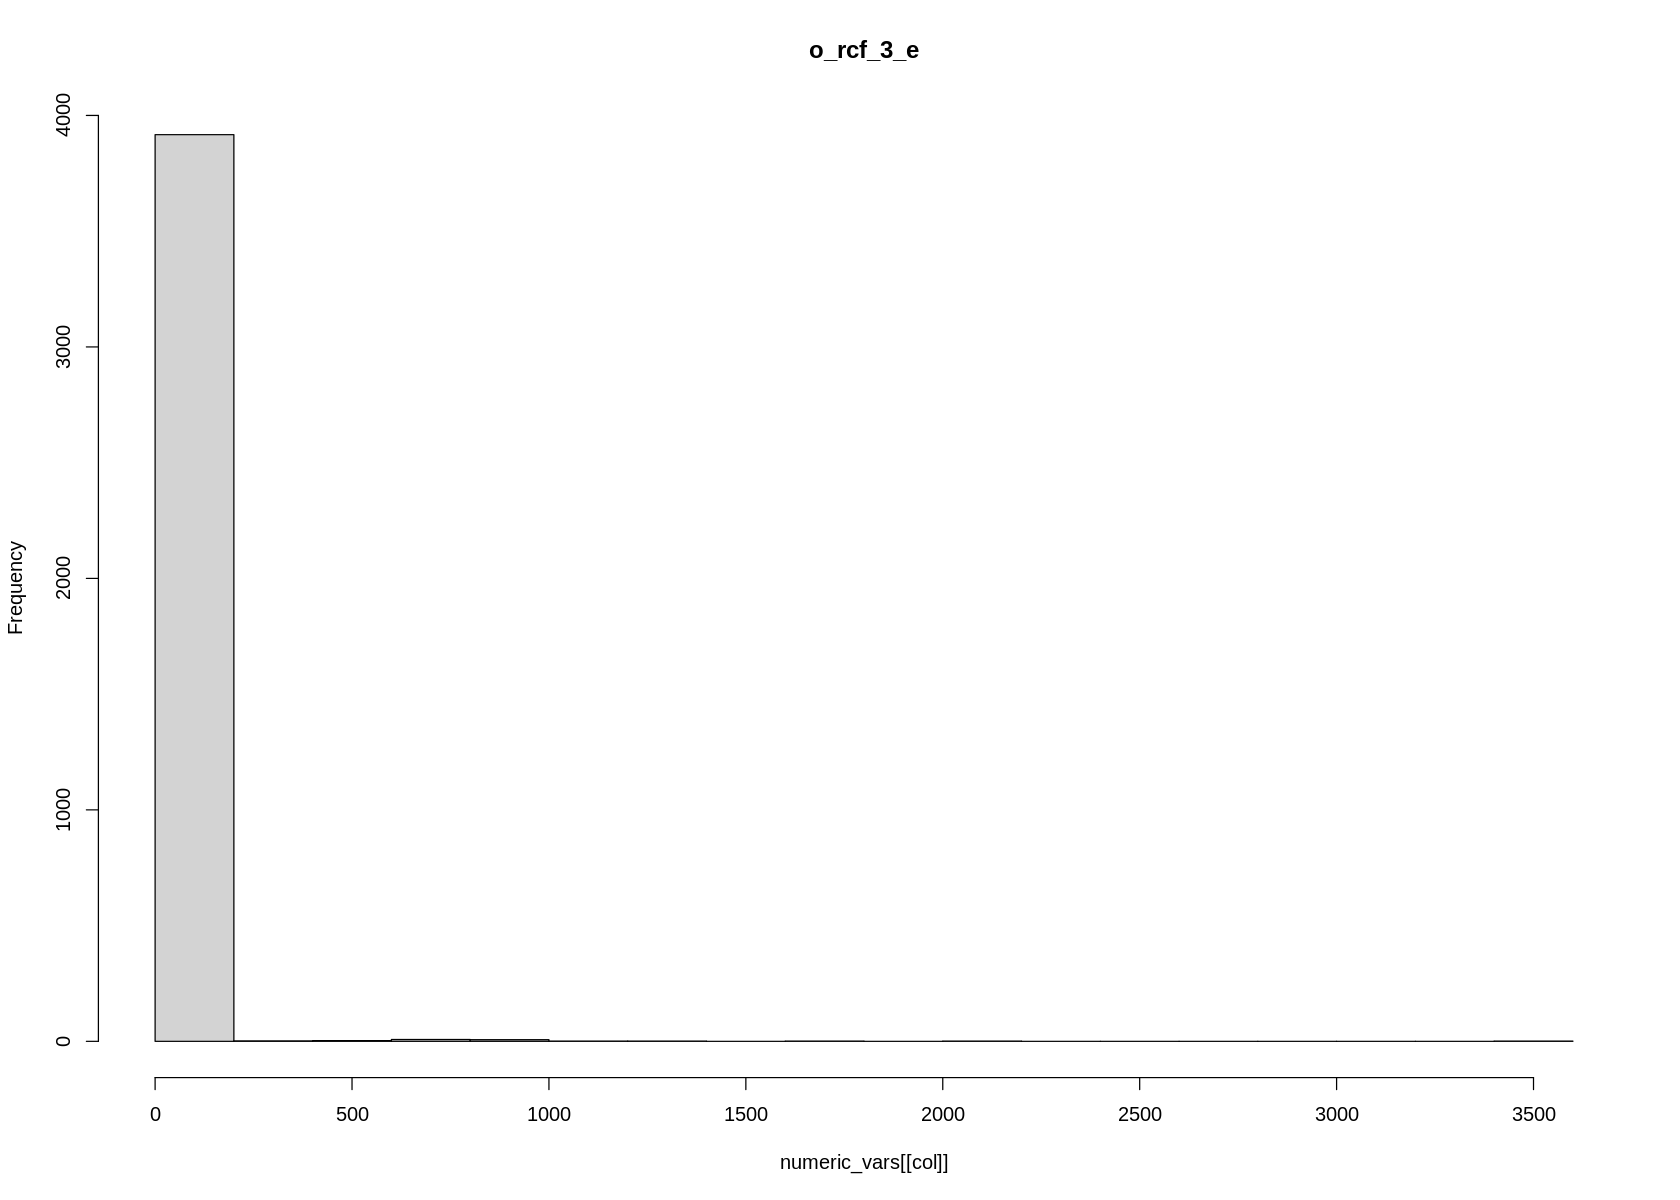

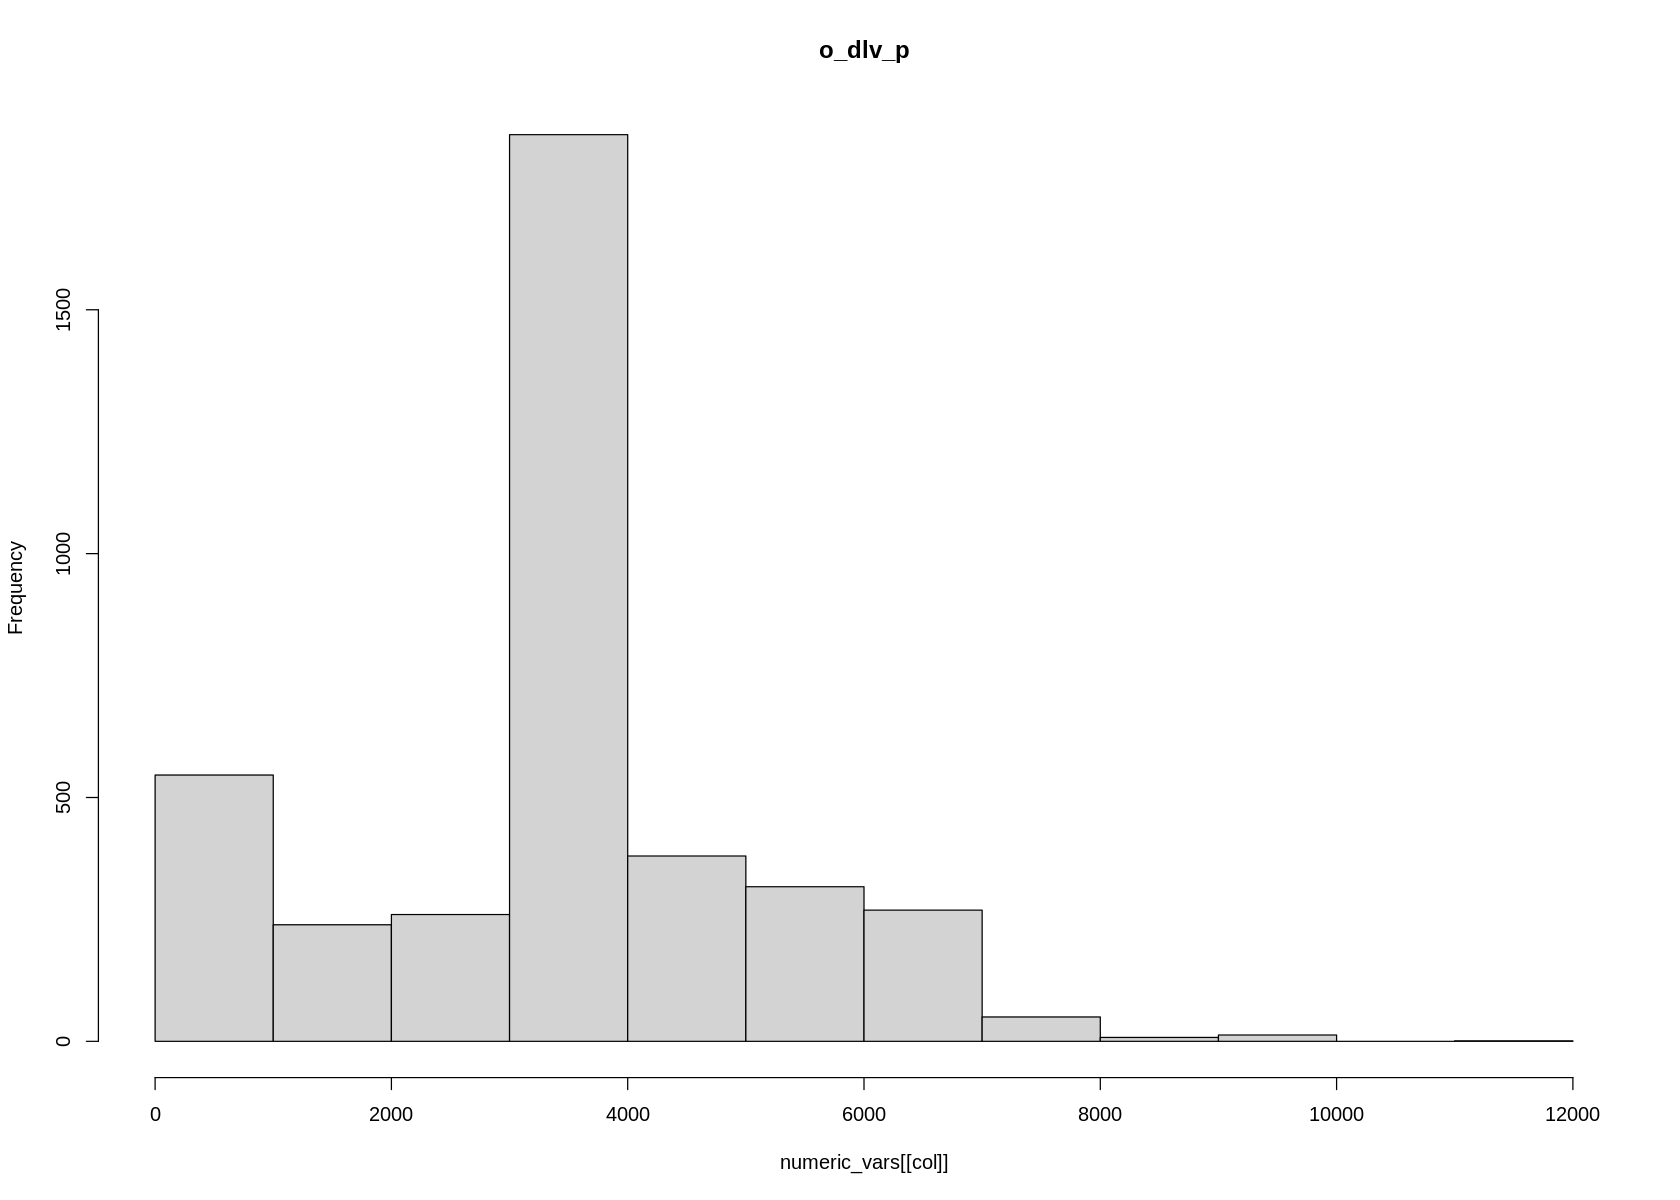

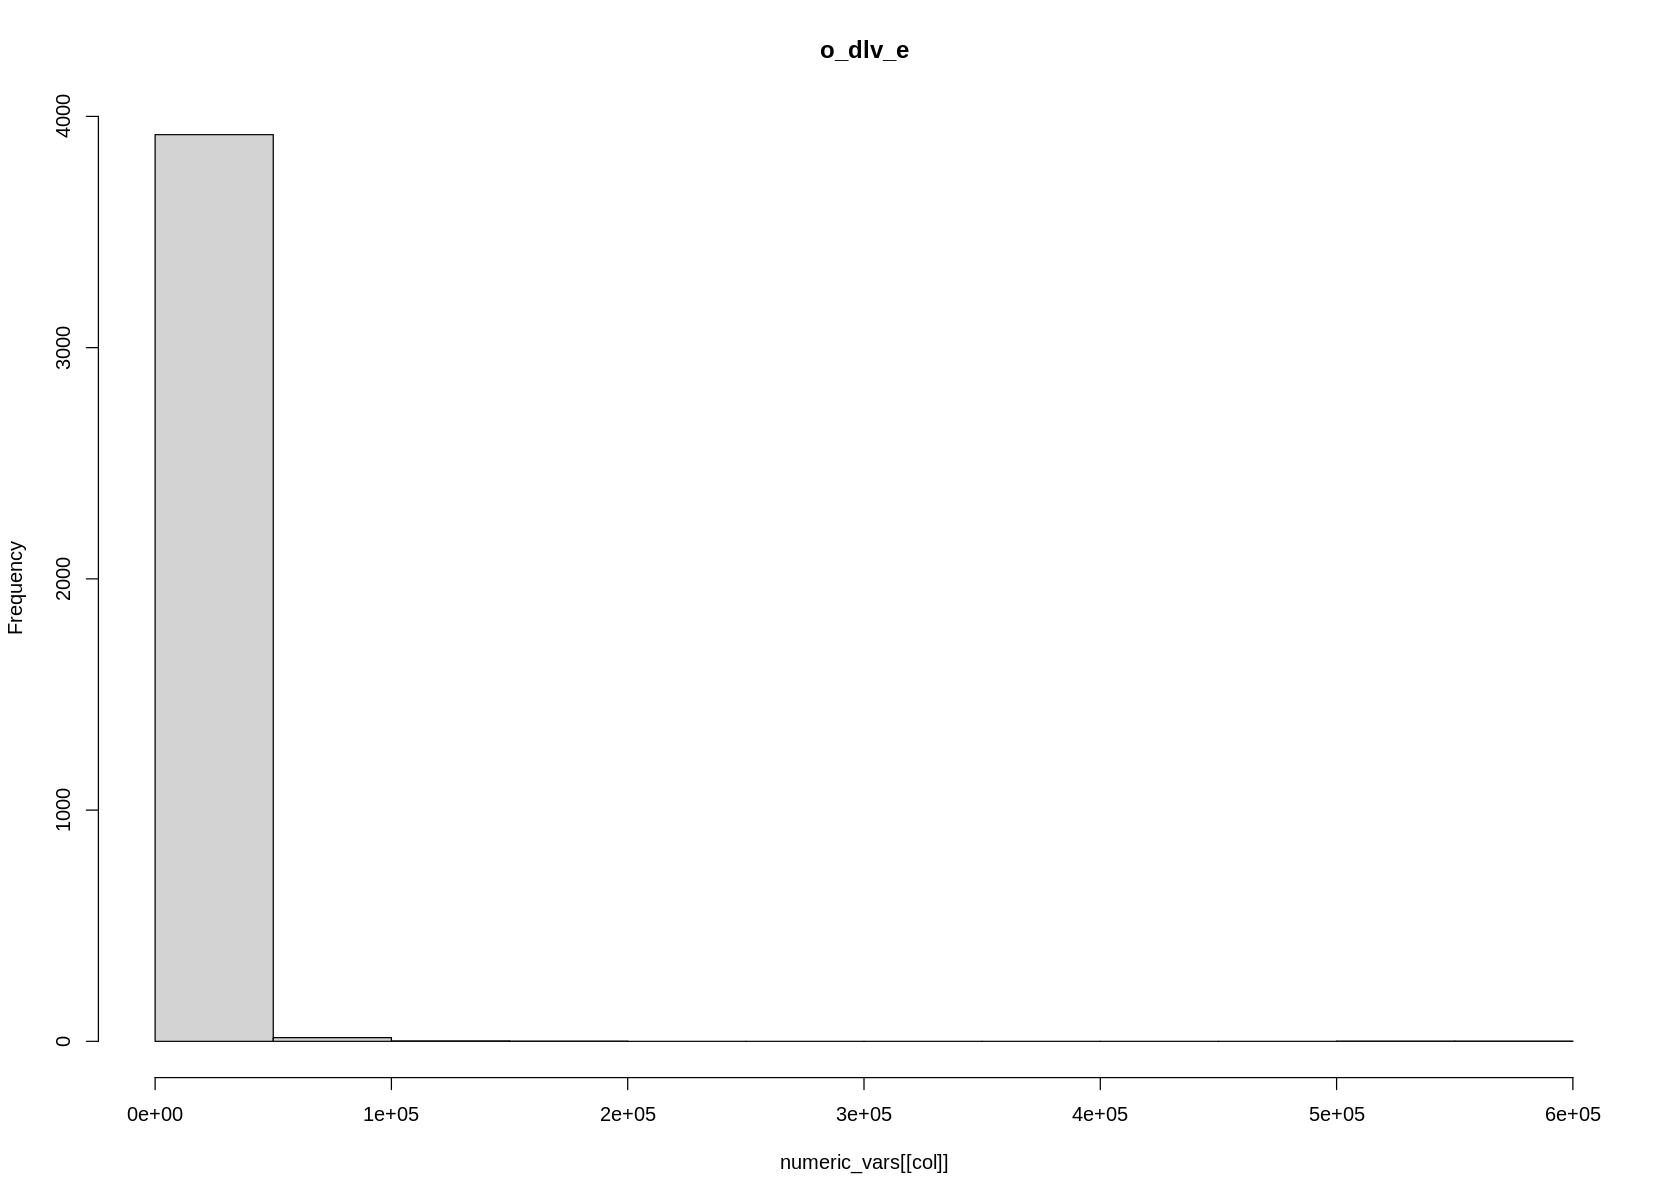

In [30]:
# Looking at the distribution of effective and planned time

numeric_vars <- clean_data %>%
  select(where(is.numeric)) %>%
  select(-any_of("total_e"))  # safely removes total_e if it exists

for (col in colnames(numeric_vars)) {
  hist(numeric_vars[[col]], main = col)
}

# We can see that they are pretty skewed

In [31]:
# take logs of the effective time first since we want to target encode for a log-transformed variable
log_clean_data <- clean_data %>% mutate(across(ends_with("_e"),log)) # This log-transforms effective time columns
log_clean_data <- log_clean_data %>% mutate(across(ends_with("_p"),log)) # This log-transforms planned time columns

# Now, handle infinite values (e.g., log(0) results in -Inf) in the log-transformed columns
log_clean_data <- log_clean_data %>% mutate(across(ends_with("_e",), ~ ifelse(is.infinite(.), 0, .))) # Apply ifelse to _e columns
log_clean_data <- log_clean_data %>% mutate(across(ends_with("_p",), ~ ifelse(is.infinite(.), 0, .))) # Apply ifelse to _p columns

head(log_clean_data)

nr i1_legid i1_rcs_p i1_rcs_e i1_dep_1_p i1_dep_1_e i1_dep_1_place i1_rcf_1_p
1 0  5182     5.293305 5.384495 5.347108   5.370638   609            6.840547  
2 1  6523     6.738152 6.369901 4.499810   5.693732   700            7.567863  
3 2  5878     8.384804 8.323366 4.499810   5.634790   456            6.807935  
4 3  1275     6.632002 5.129899 5.480639   6.655440   173            5.828946  
5 4  8117     7.375882 7.303170 5.010635   5.484797   411            6.371612  
6 5  9889     5.198497 4.584967 5.480639   5.556828   815            5.370638  
  i1_rcf_1_e i1_rcf_1_place ⋯ o_dep_3_p o_dep_3_e o_dep_3_place o_rcf_3_p
1 6.601230   256            ⋯ 0         0         0             0        
2 7.254885   431            ⋯ 0         0         0             0        
3 6.304449   700            ⋯ 0         0         0             0        
4 6.357842   349            ⋯ 0         0         0             0        
5 6.416732   128            ⋯ 0         0         0             0        
6 5.407172   128            ⋯ 0         0         0             0        
  o_rcf_3_e o_rcf_3_place o_dlv_p  o_dlv_e  o_hops legs
1 0         0             6.659294 6.073045 1      2   
2 0         0             8.261010 6.098074 1      2   
3 0         0             6.309918 7.326466 1      1   
4 0         0             8.237479 5.068904 1      1   
5 0         0             8.328451 8.475746 2      1   
6 0         0             8.283999 6.146329 1      2

### **2.3.3.2 Checking consistency across legs**

We need to check if airports perform differently depending on the leg that they are involved in.

We note that they **do not perform differently across leg**!

In [32]:
plot_hop_across_legs_grid <- function(data, process, hop, min_n = 10, min_legs = 2) {

  # Dynamic Regex to capture all legs (i1, i2, i3, o) for a specific process/hop
  col_pattern <- paste0("^(.*)_", process, "_", hop, "_(e|place)$")

  # Process Data
  data_long <- data %>%
    select(nr, matches(col_pattern)) %>%
    pivot_longer(
      cols = -nr,
      names_to  = c("leg", ".value"),
      names_pattern = col_pattern
    ) %>%
    rename(log_eff_time = e, airport = place) %>%
    filter(!is.na(airport)) %>%
    mutate(process = process, hop = hop)

  # Aggregate
  by_airport_leg <- data_long %>%
    group_by(airport, leg) %>%
    summarise(
      n          = n(),
      mean_log_t = mean(log_eff_time, na.rm = TRUE),
      .groups    = "drop"
    ) %>%
    filter(n >= min_n)

  # Filter for Multi-leg Airports
  airports_multi_legs <- by_airport_leg %>%
    group_by(airport) %>%
    summarise(n_legs = n_distinct(leg), .groups = "drop") %>%
    filter(n_legs >= min_legs) %>%
    filter(airport != "0") # Hides the "0" airport from the plot

  plot_data <- by_airport_leg %>%
    inner_join(airports_multi_legs, by = "airport")

  # Safety Check
  if(nrow(plot_data) == 0) {
    message(paste("No data found for", process, "hop", hop))
    return(NULL)
  }

  # Generate Plot
  plot <- ggplot(plot_data,
              aes(x = leg, y = mean_log_t, fill = leg)) +
    geom_col(position = "dodge") +
    facet_wrap(~ airport, scales = "free_y") +
    labs(
      title = paste("Process:", toupper(process), "| Hop:", hop),
      x = "Leg",
      y = "Mean log time",
      fill = "Leg"
    ) +
    theme_minimal()

  return(plot)
}

No data found for dep hop 3

No data found for rcf hop 3



[[1]]

[[2]]


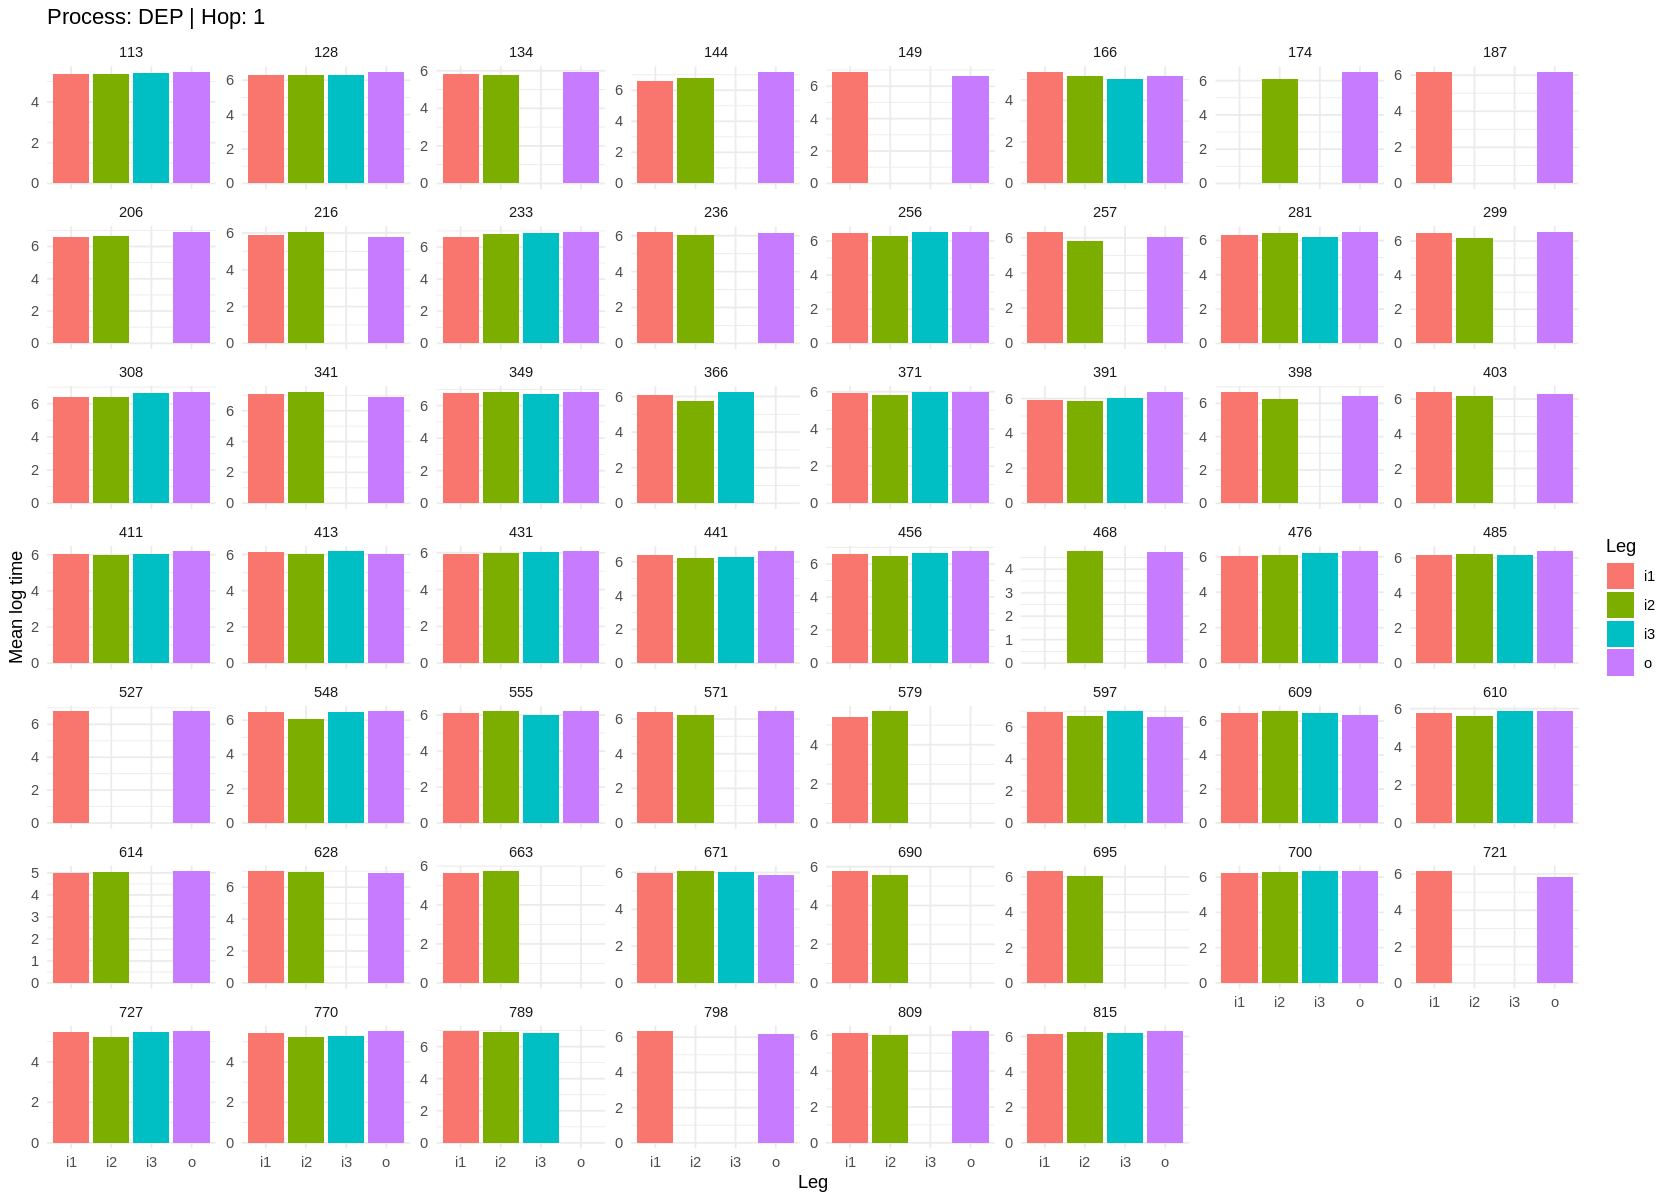


[[3]]


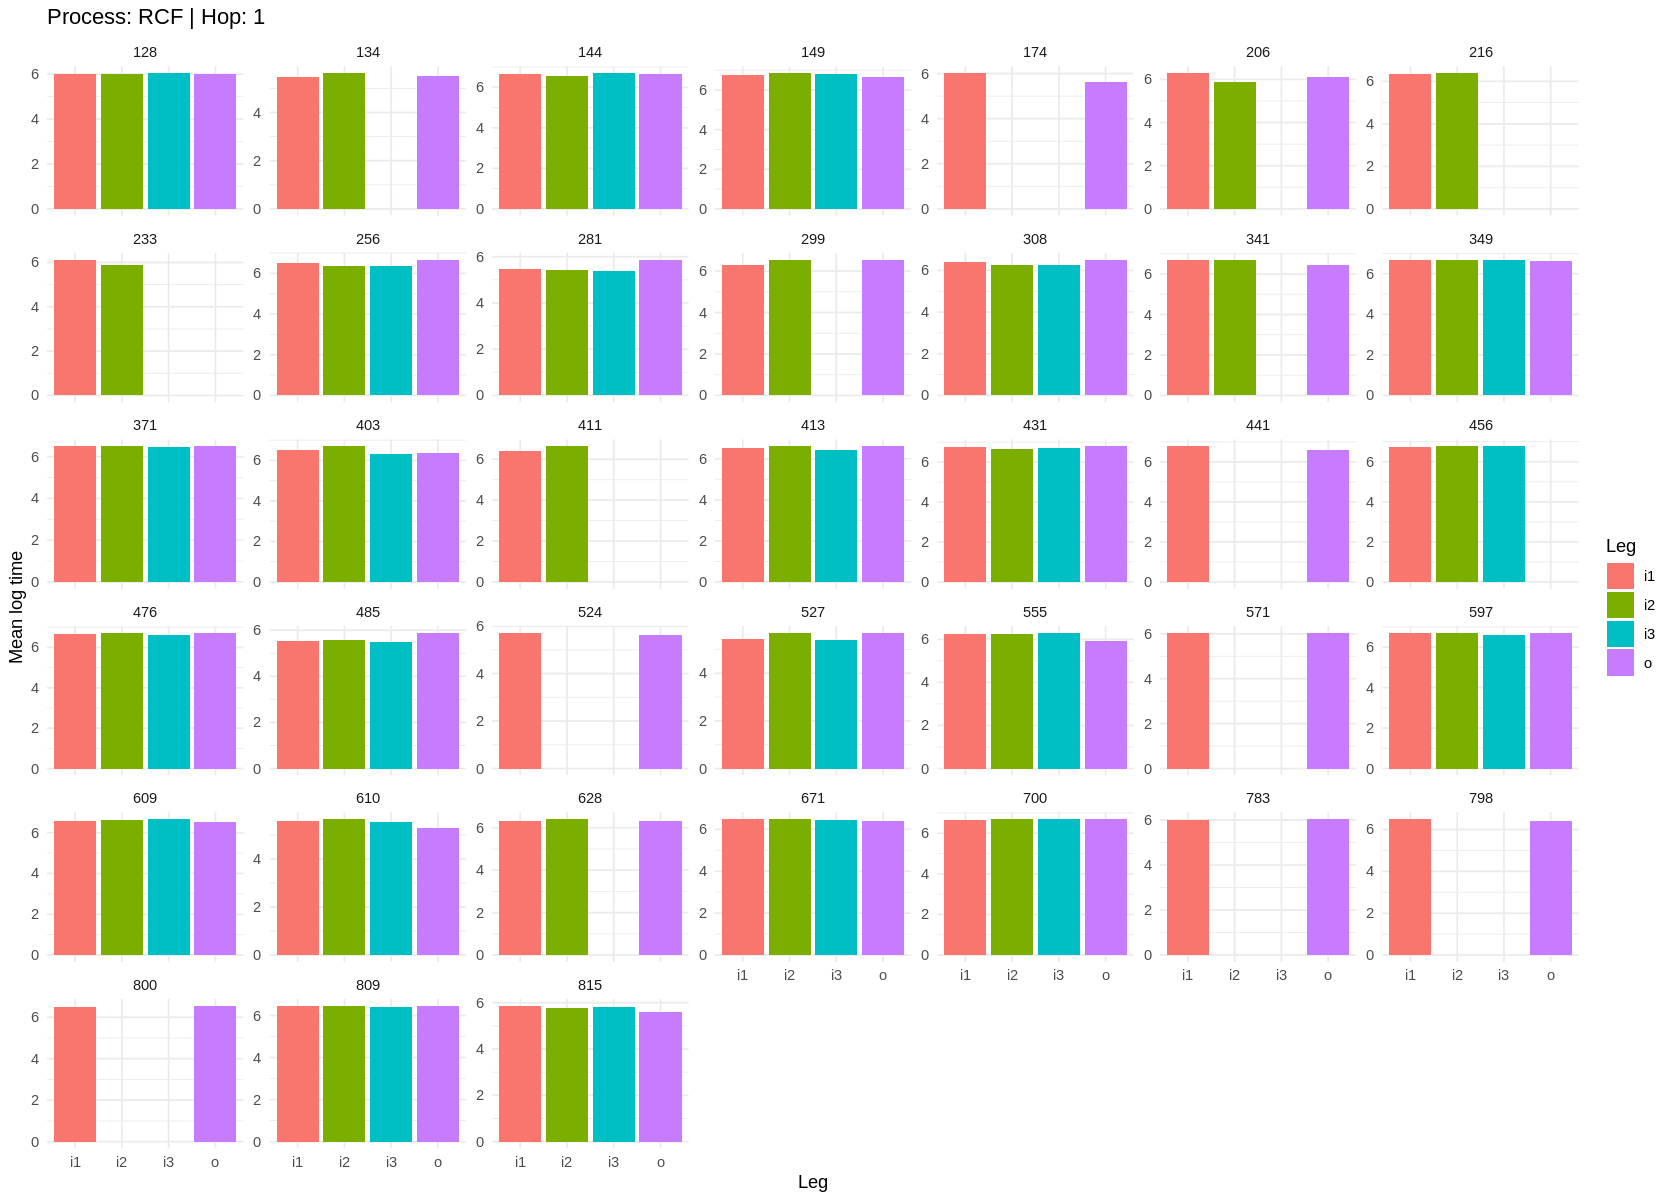


[[4]]


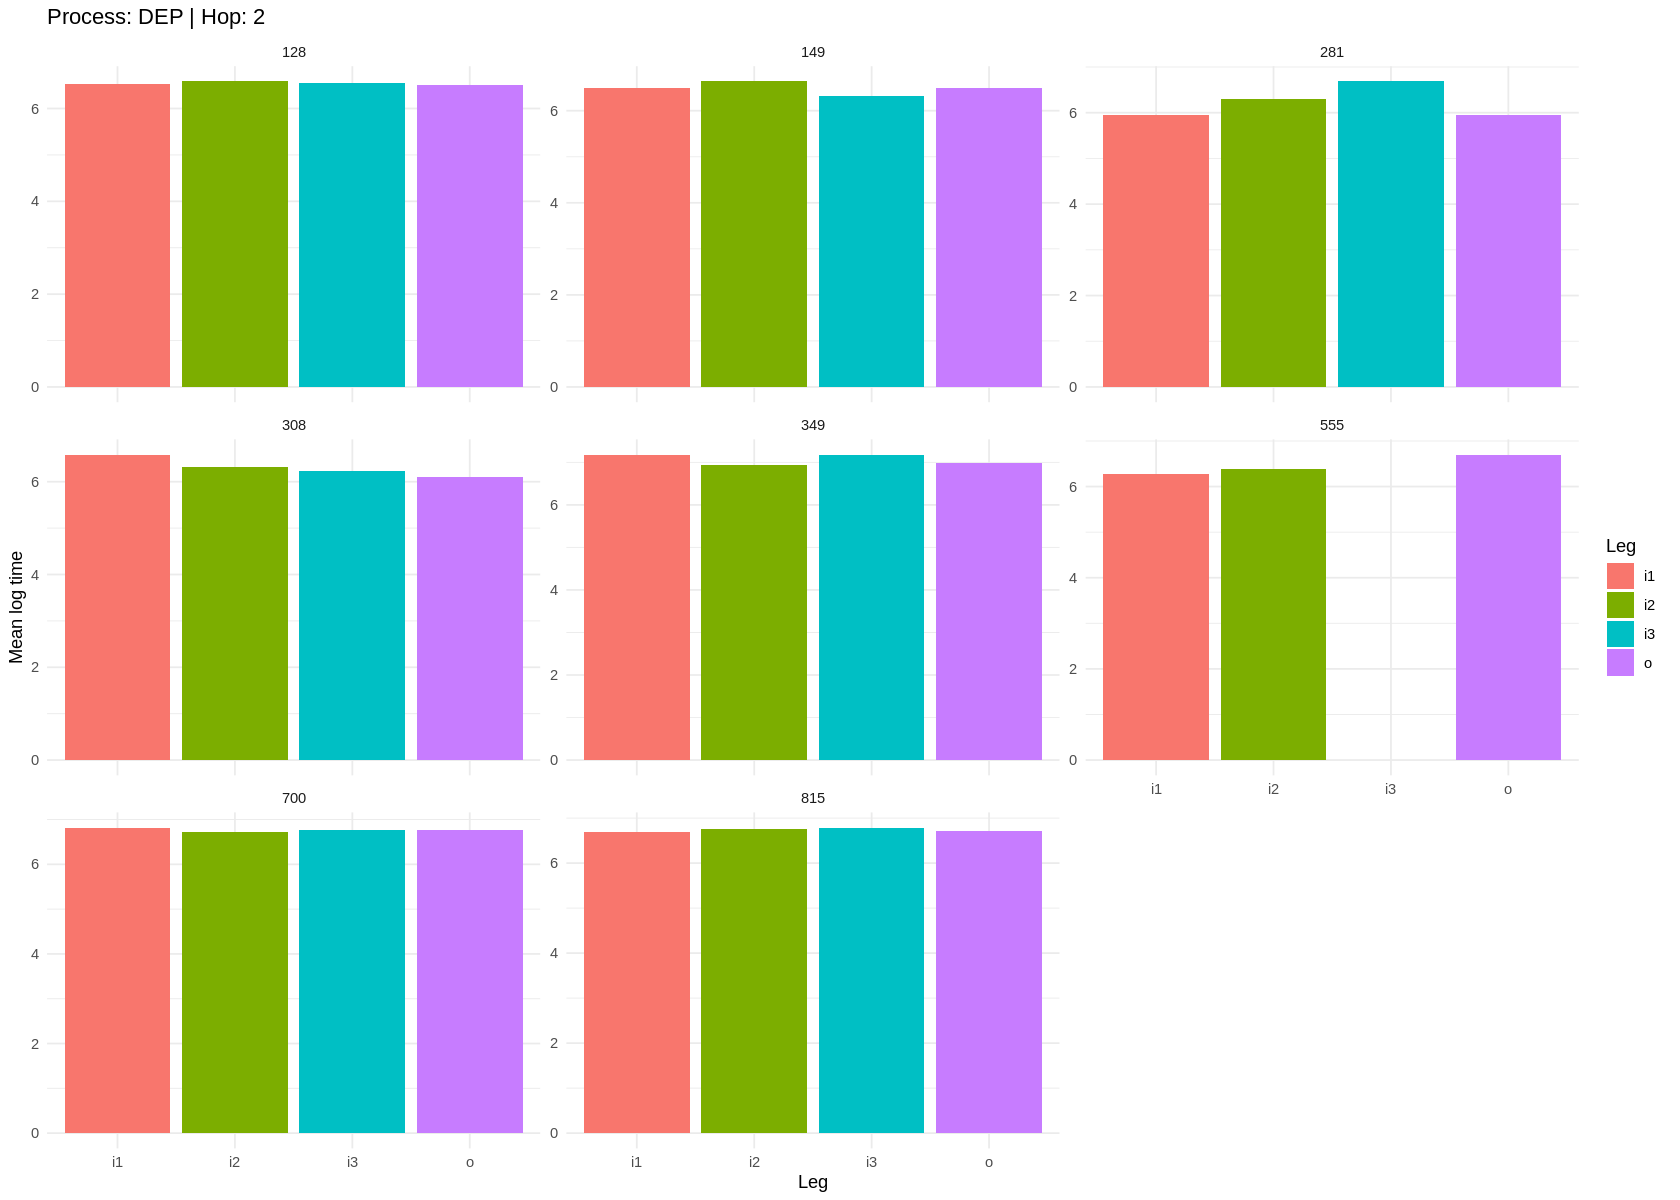


[[5]]
NULL

[[6]]
NULL



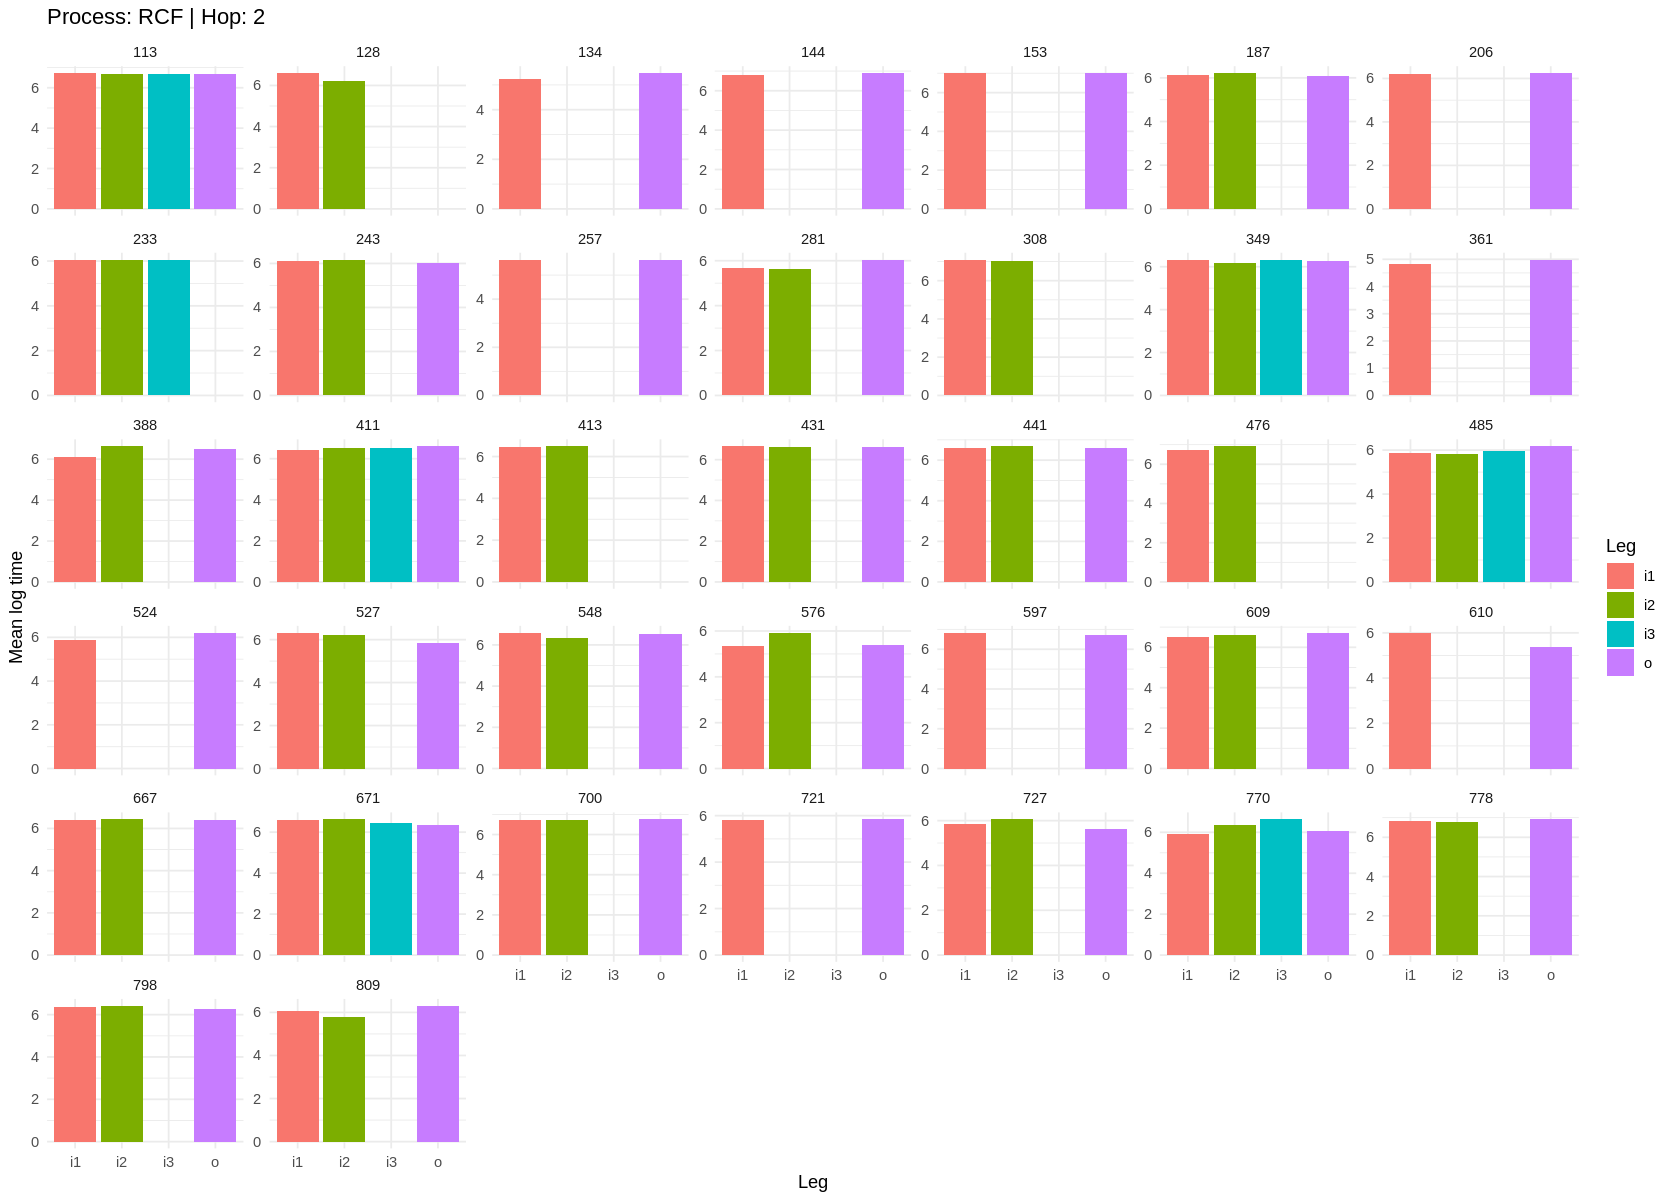

In [33]:
# Define combinations (Process + Hop)
processes <- c("dep", "rcf")
hops      <- c(1, 2, 3)

combinations <- expand.grid(process = processes, hop = hops, stringsAsFactors = FALSE)

# Generate the list of plots
all_plots <- map2(
  combinations$process,
  combinations$hop,
  ~ plot_hop_across_legs_grid(log_clean_data, process = .x, hop = .y)
)

# View them
print(all_plots)

### **2.3.3.3 Checking consistency across hops**

We note that they **do not perform differently across hops**

In [34]:
plot_leg_process <- function(data, leg, process, min_n = 10, min_hops = 2) {

  # Construct dynamic column prefix (e.g., "i1_dep_")
  col_prefix <- paste0(leg, "_", process, "_")

  # Process Data to Long Format
  # We use matches() to select columns dynamically based on the prefix
  data_long <- data %>%
    select(
      nr,
      matches(paste0("^", col_prefix, "\\d+_(e|place)$"))
    ) %>%
    pivot_longer(
      cols = -nr,
      names_to  = c("hop", ".value"),
      # Regex: matches prefix, captures digits (hop), captures suffix (e or place)
      names_pattern = paste0(col_prefix, "(\\d+)_(e|place)")
    ) %>%
    rename(
      log_eff_time = e,
      airport      = place
    ) %>%
    mutate(
      hop = as.integer(hop),
      leg = leg,
      process = process
    ) %>%
    filter(!is.na(airport))

  # First Aggregation
  by_airport_hop <- data_long %>%
    group_by(airport, hop) %>%
    summarise(
      n          = n(),
      mean_log_t = mean(log_eff_time, na.rm = TRUE),
      .groups    = "drop"
    )

  # Clean Aggregation (Numeric conversion logic)
  by_airport_hop_clean <- by_airport_hop %>%
    group_by(airport, hop) %>%
    summarise(
      n          = sum(n),
      mean_log_t = weighted.mean(mean_log_t, n),
      .groups    = "drop"
    ) %>%
    filter(n >= min_n)

  # Filter for Multi-hop Airports
  airports_multi_hops <- by_airport_hop_clean %>%
    group_by(airport) %>%
    summarise(n_hops = n_distinct(hop), .groups = "drop") %>%
    filter(n_hops >= min_hops) %>%
    filter(airport != "0") # Hides the "0" airport from the plot

  # Final Join
  plot_data <- by_airport_hop_clean %>%
    inner_join(airports_multi_hops, by = "airport")

  plot <- ggplot(plot_data,
         aes(x = factor(hop), y = mean_log_t, fill = factor(hop))) +
    geom_col(position = "dodge") +
    facet_wrap(~ airport, scales = "free_y") +
    labs(
      title = paste("Process:", toupper(process), "| Leg:", toupper(leg)),
      x = paste0("Hop (", toupper(process), ", leg ", leg, ")"),
      y = "Mean log time",
      fill = "Hop"
    ) +
    theme_minimal()

  return(plot)
}

[[1]]

[[2]]


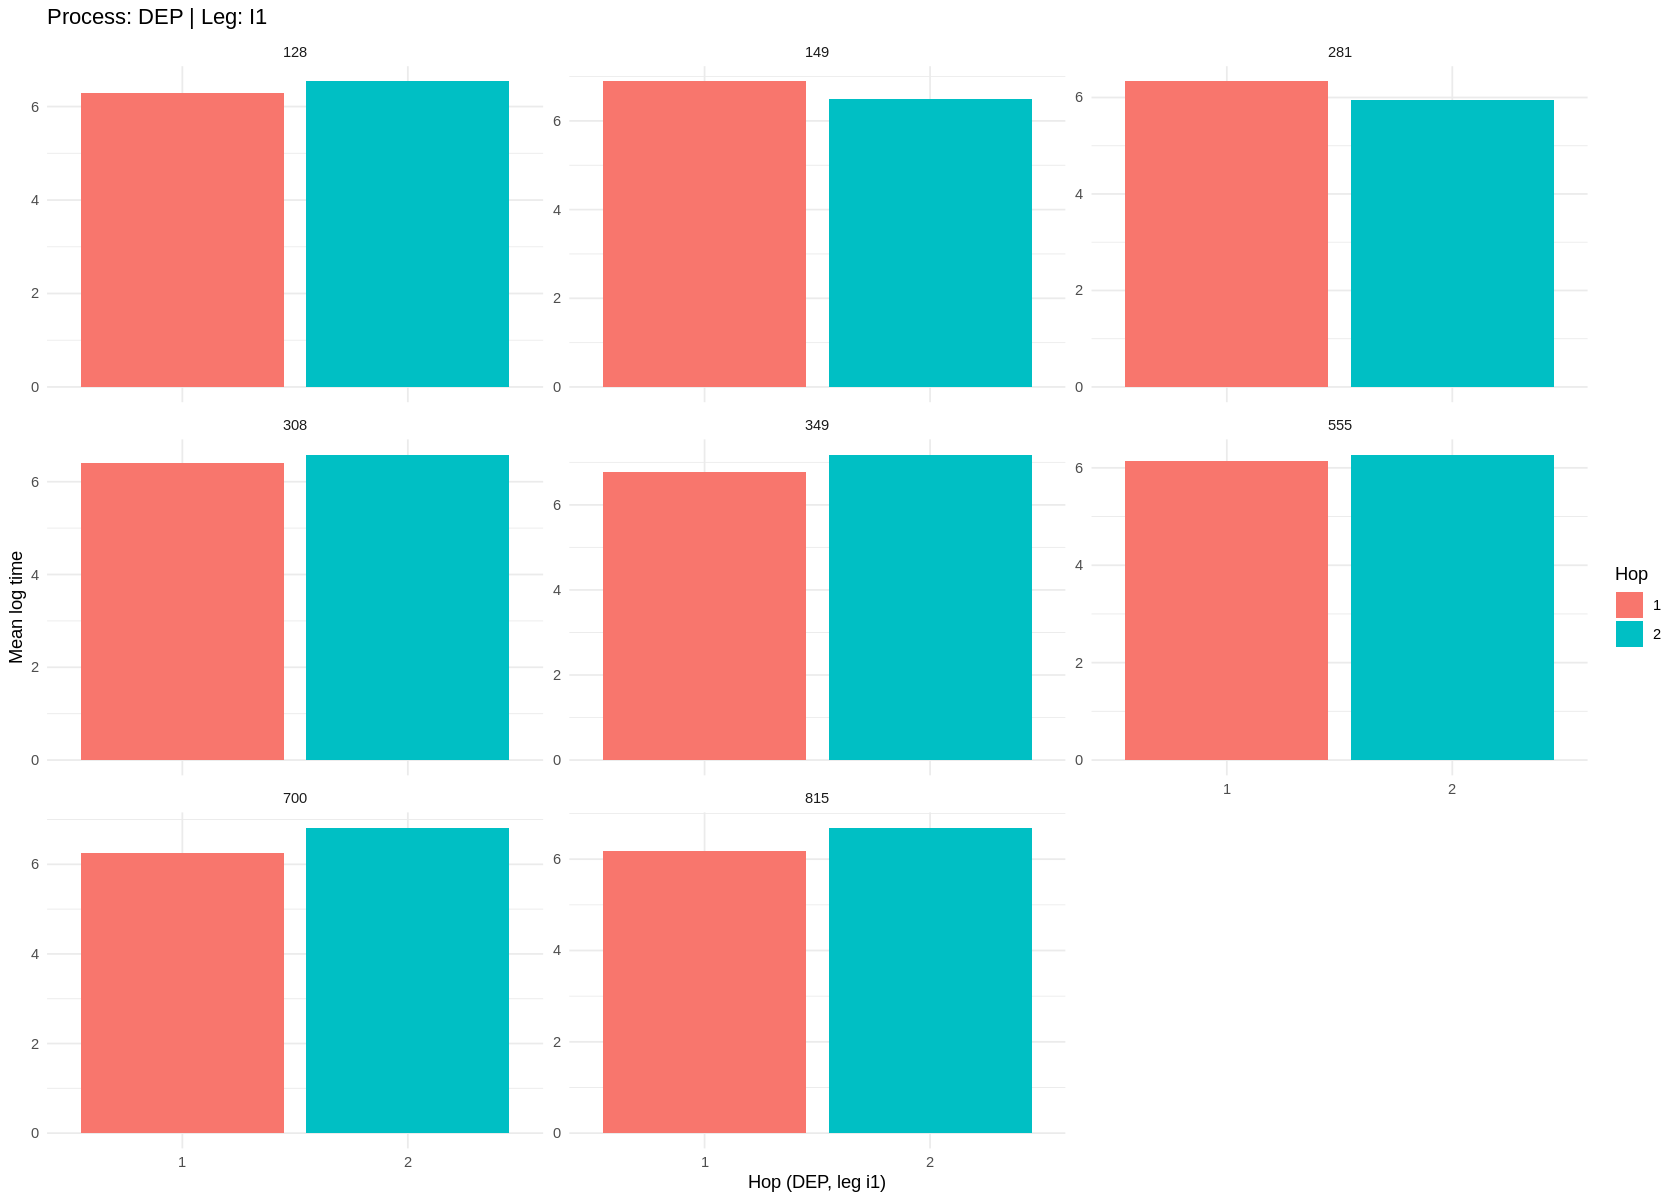


[[3]]


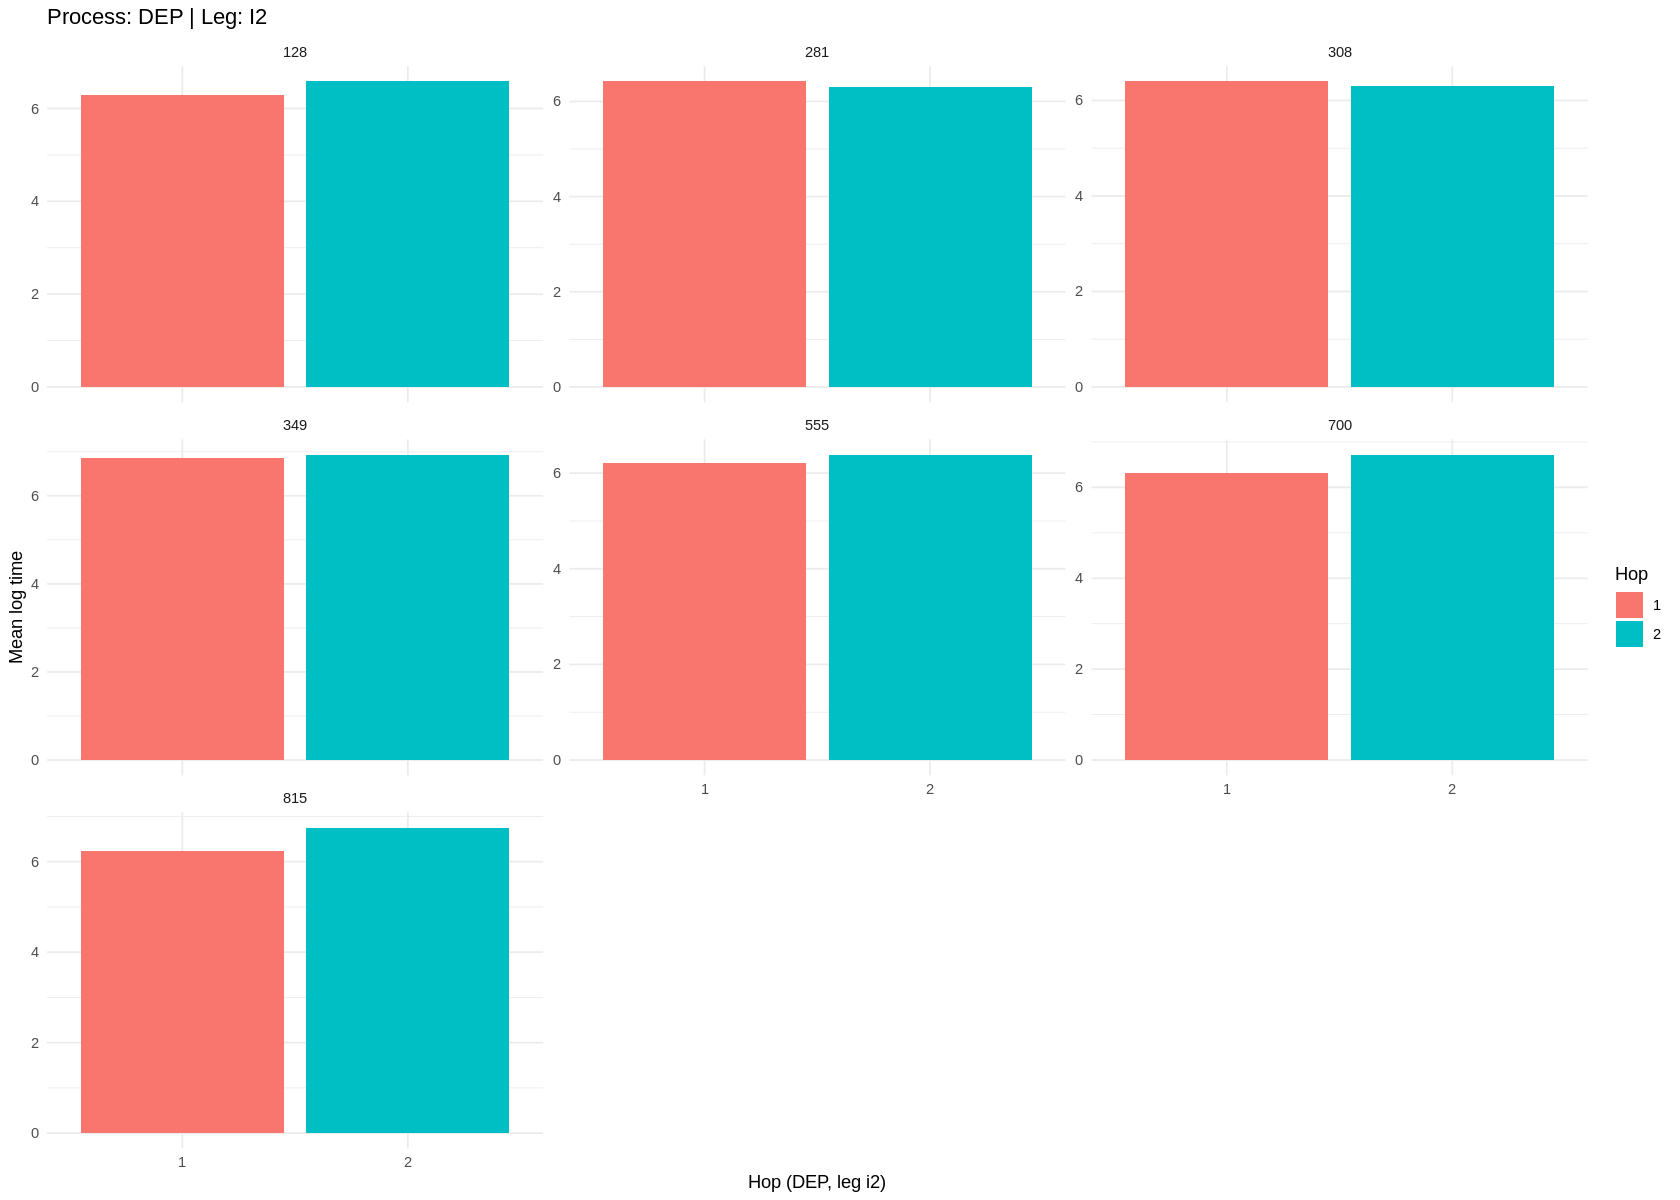


[[4]]


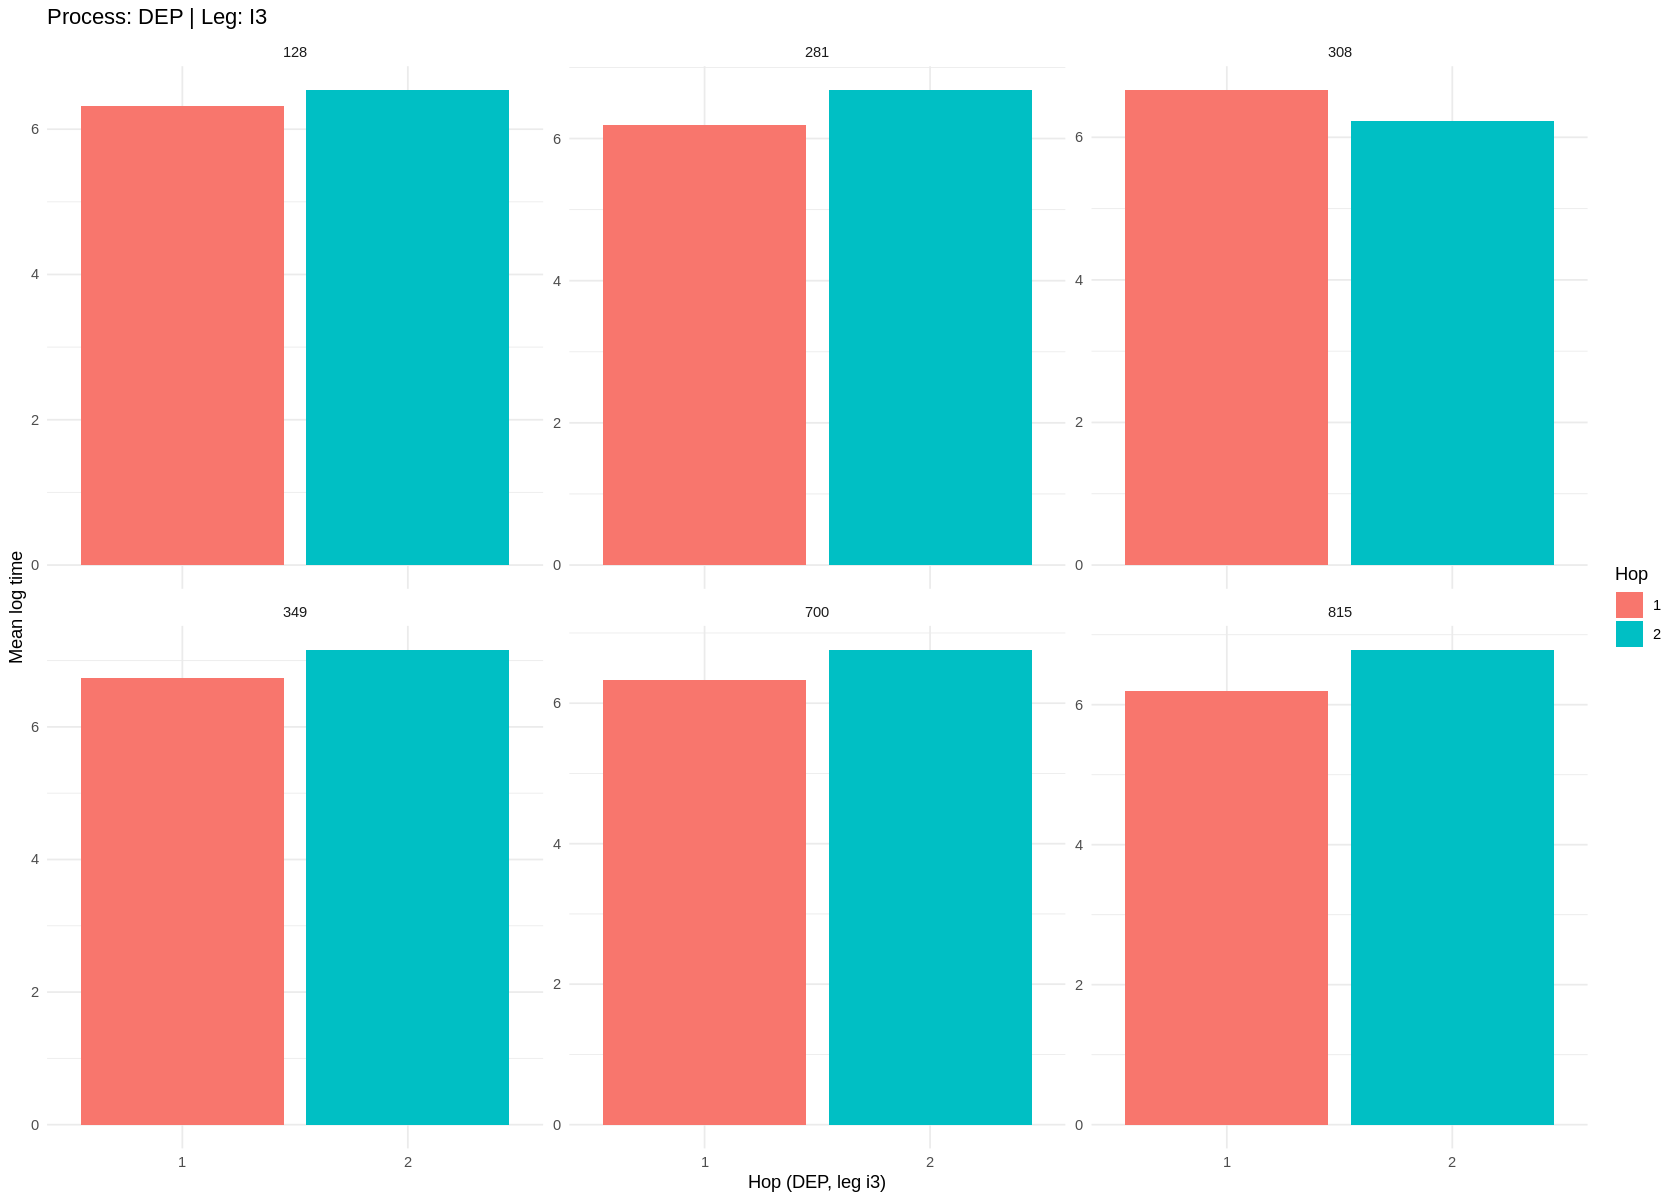


[[5]]


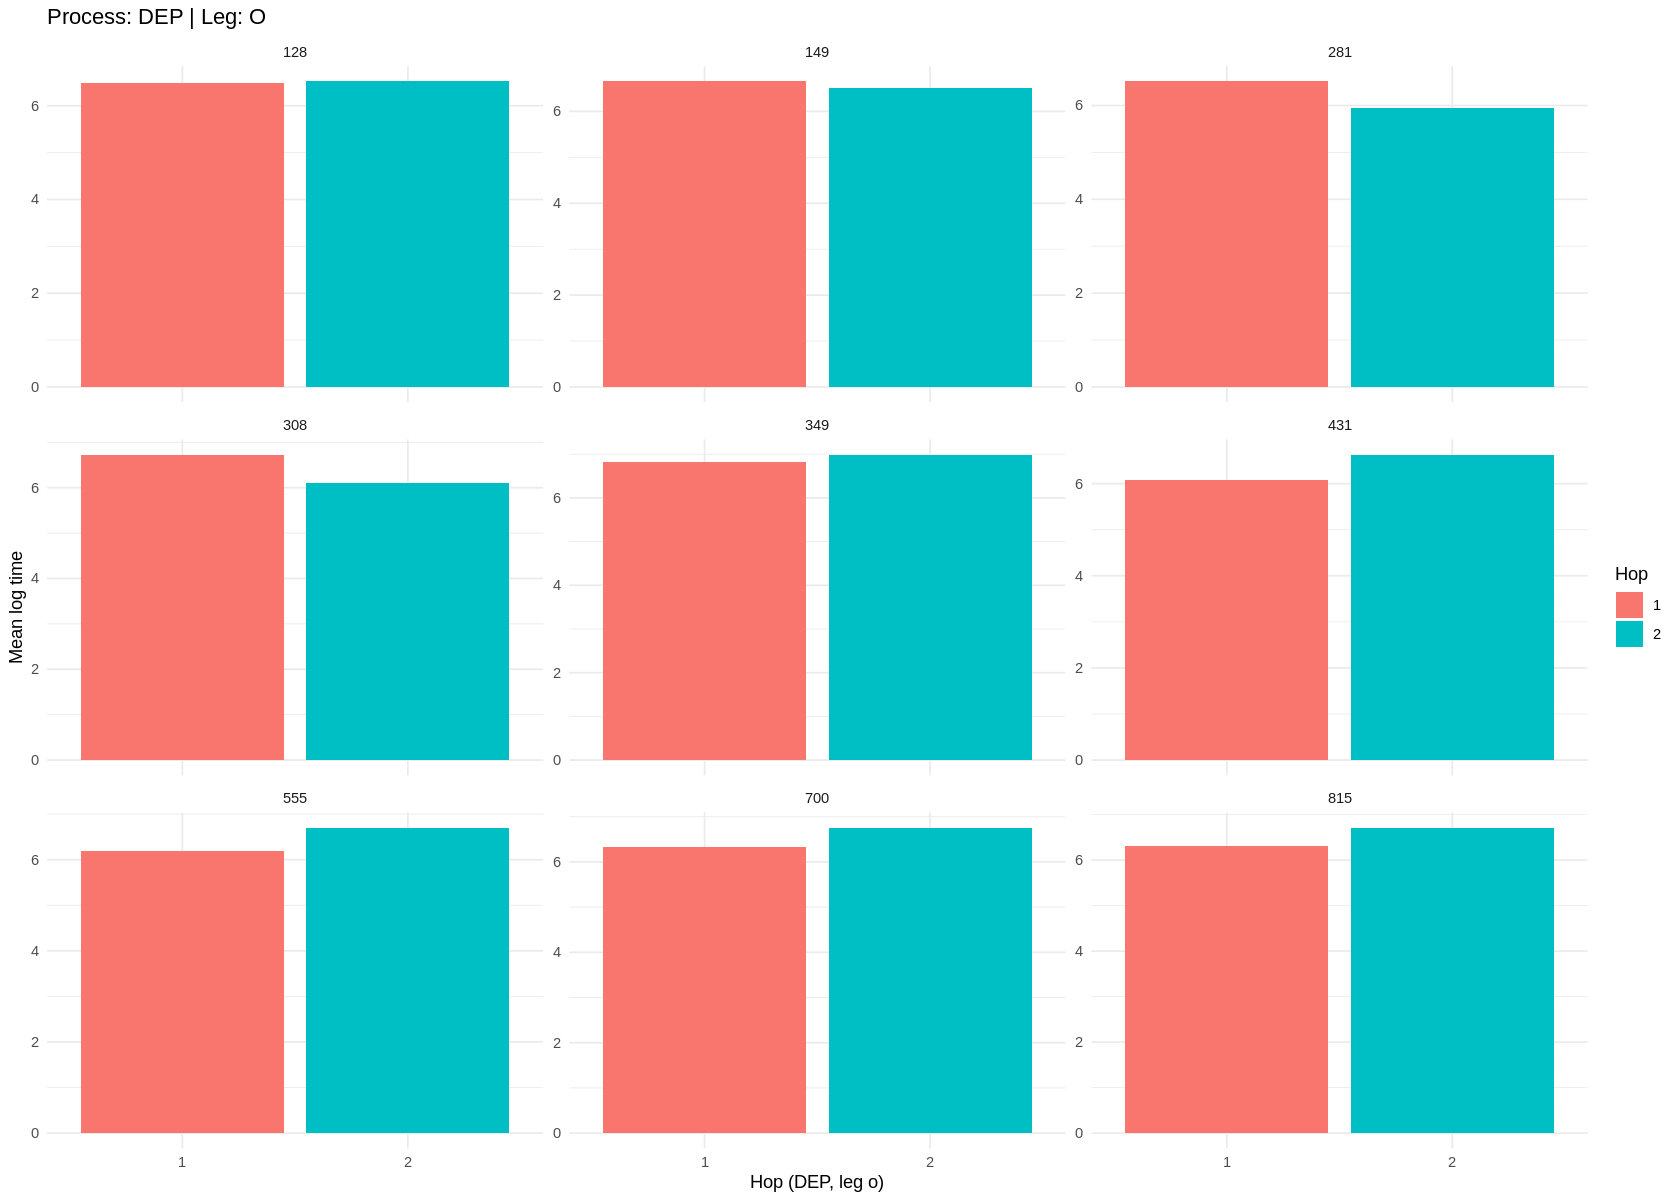


[[6]]


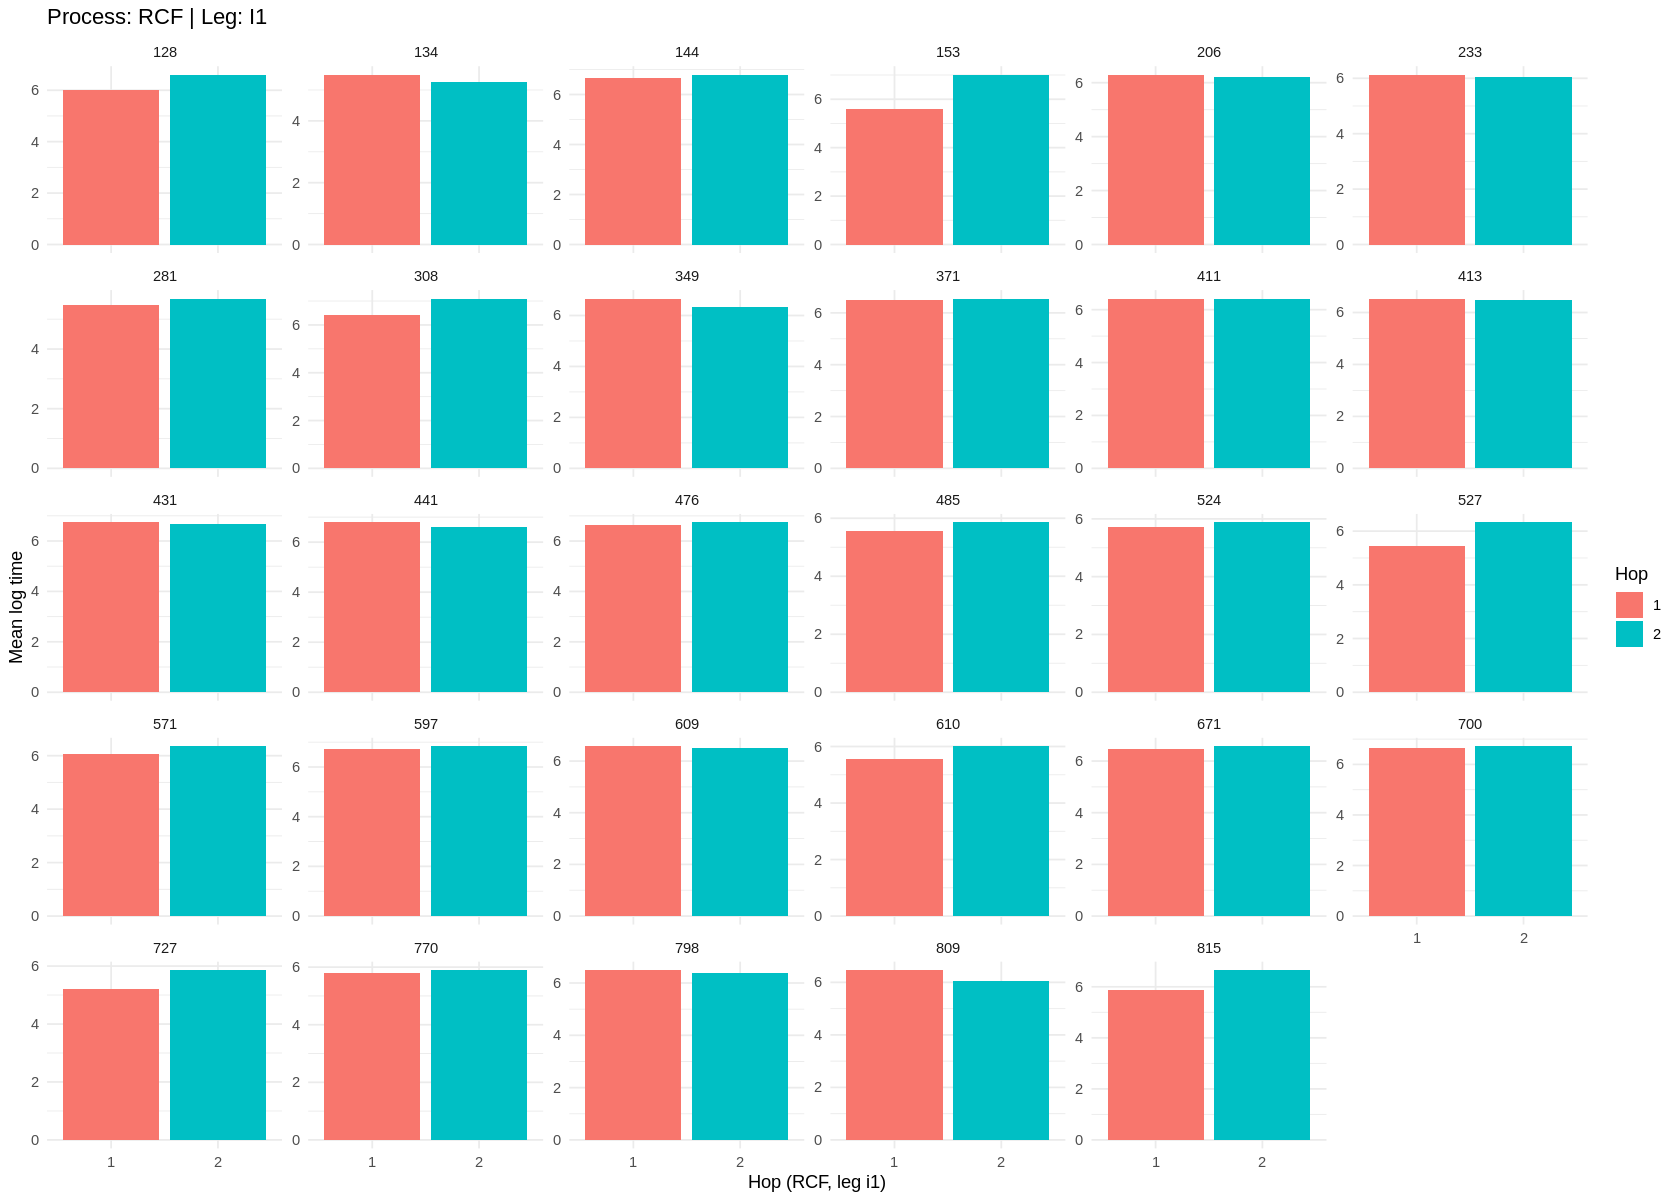


[[7]]


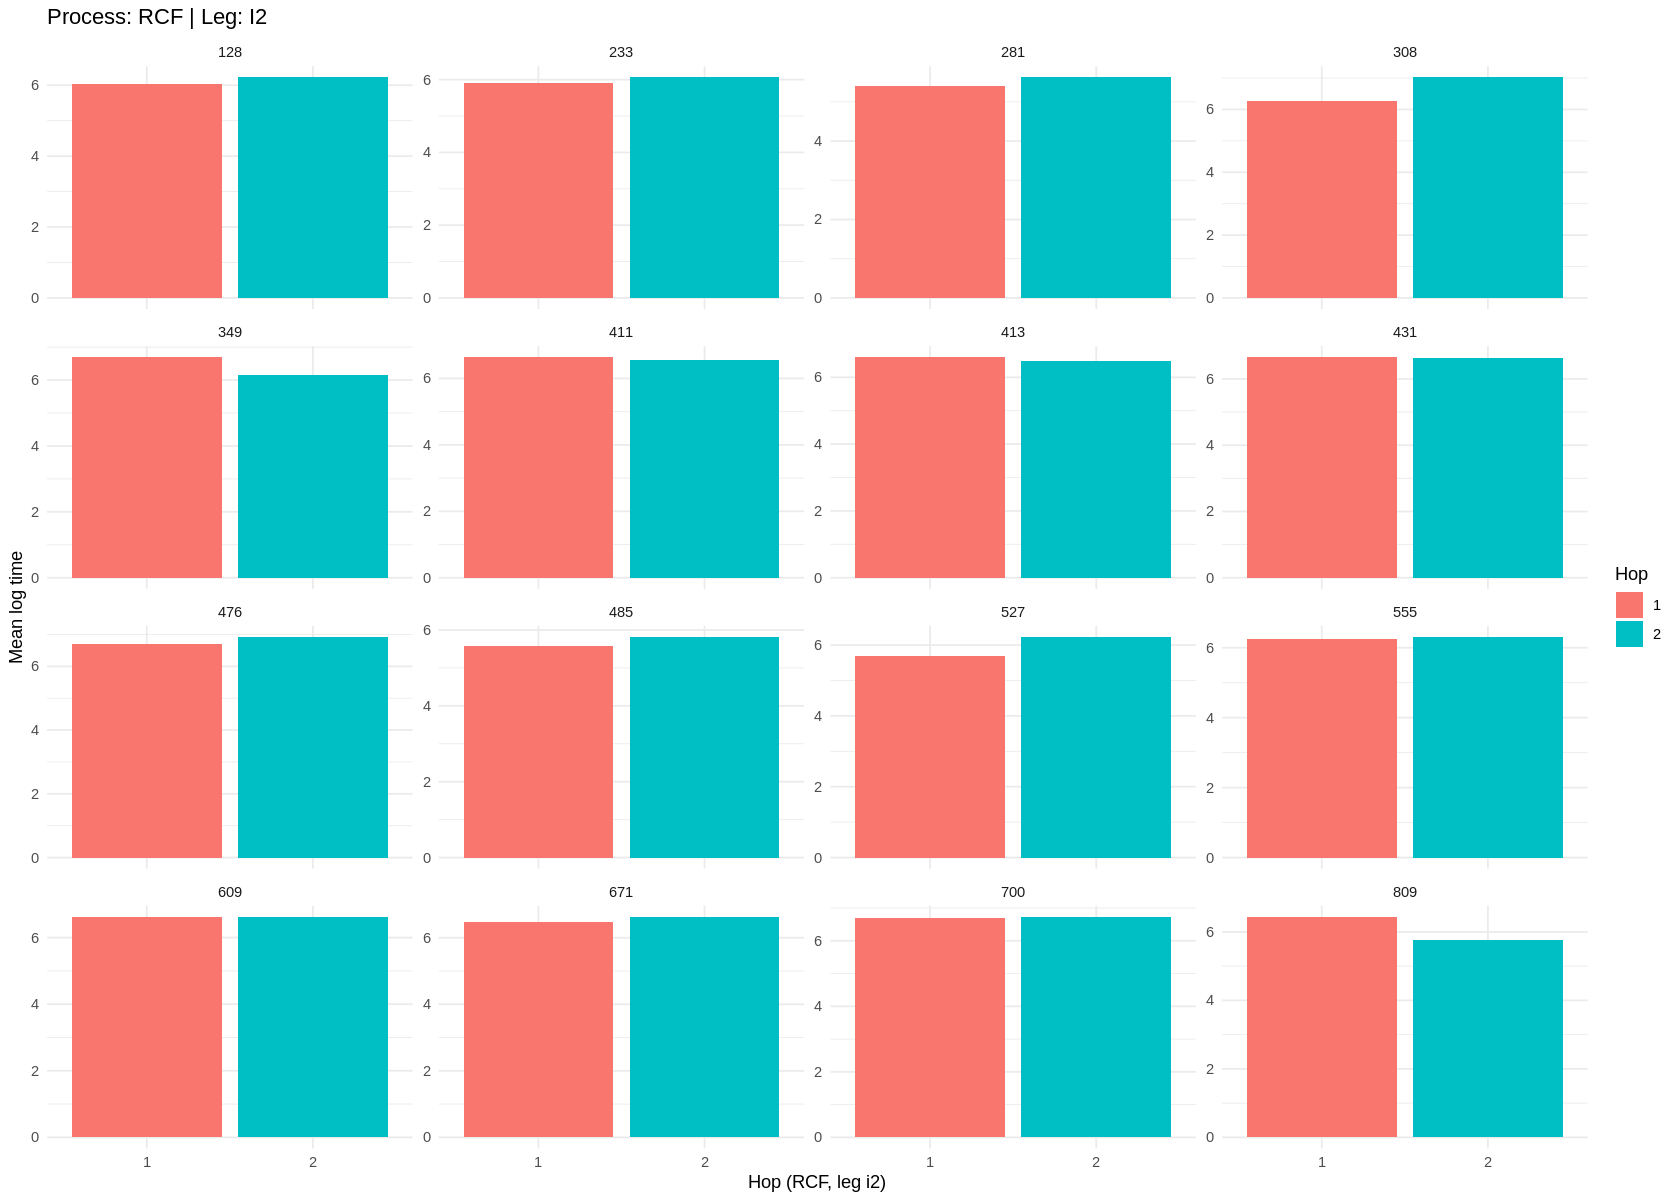


[[8]]


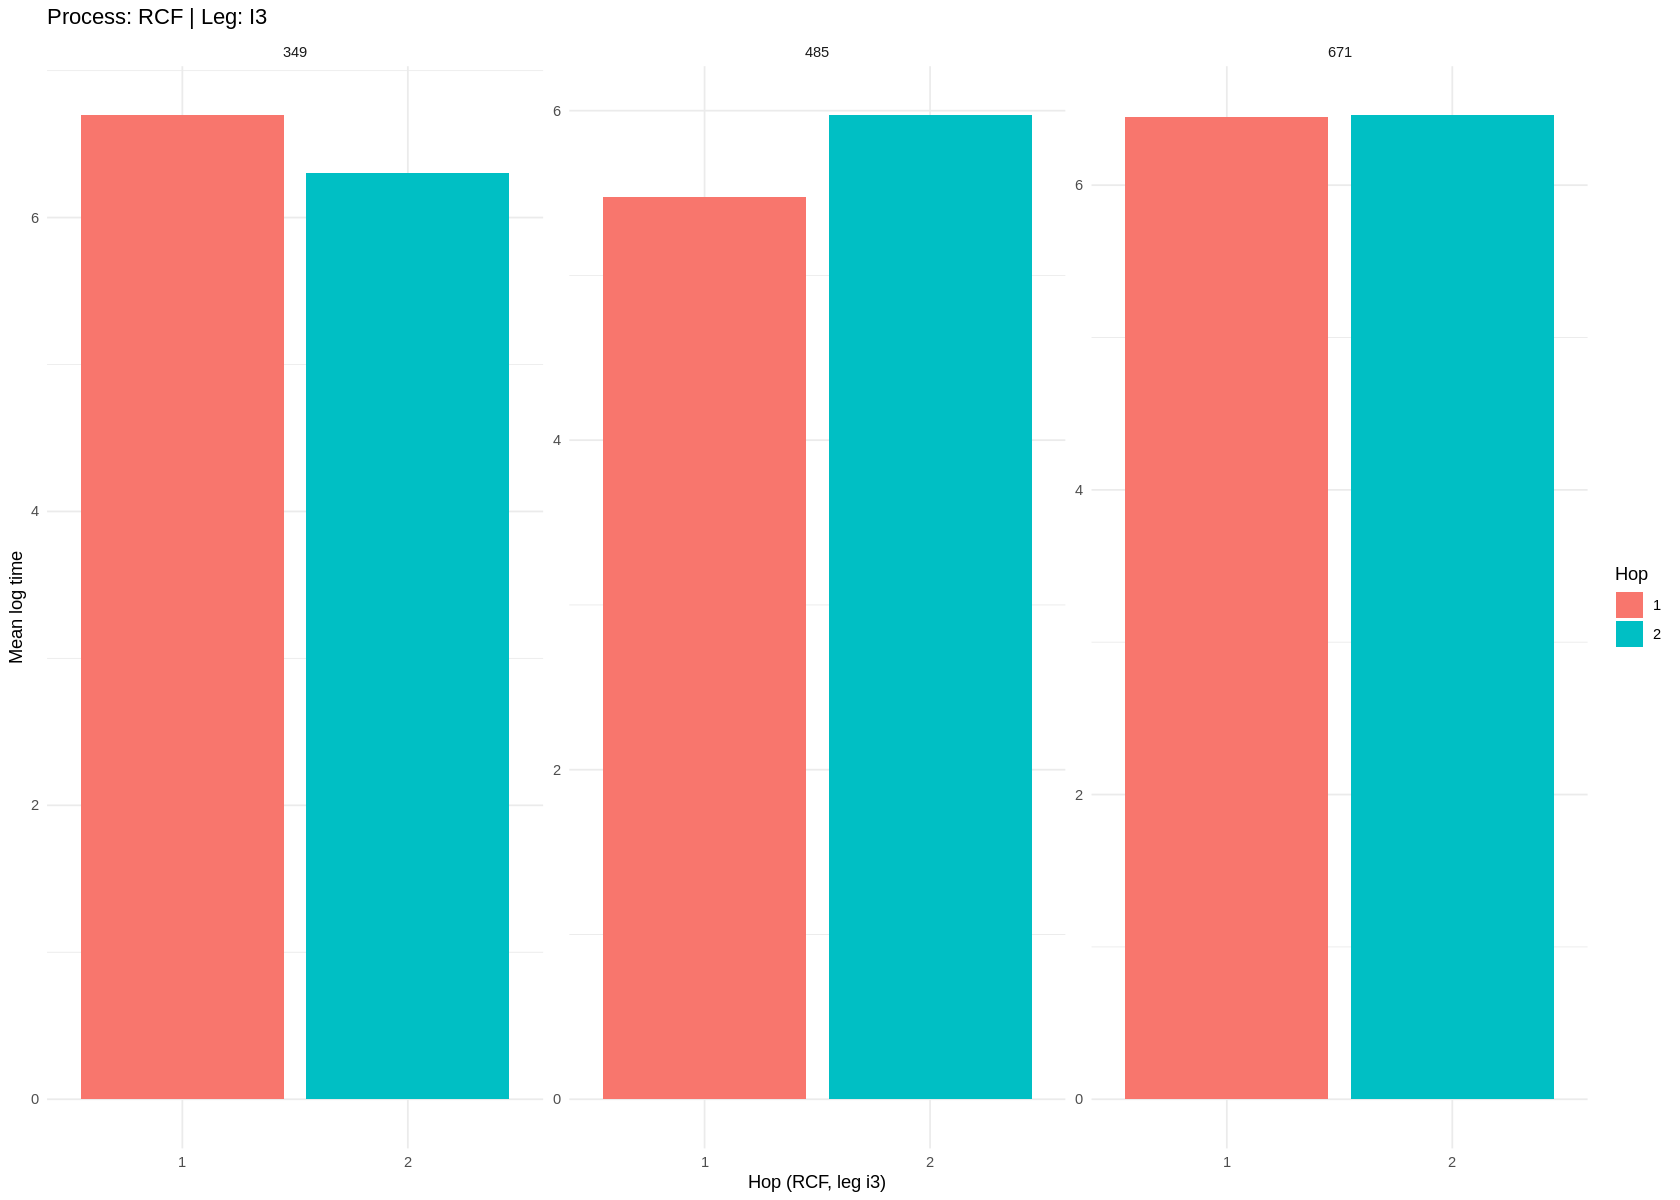

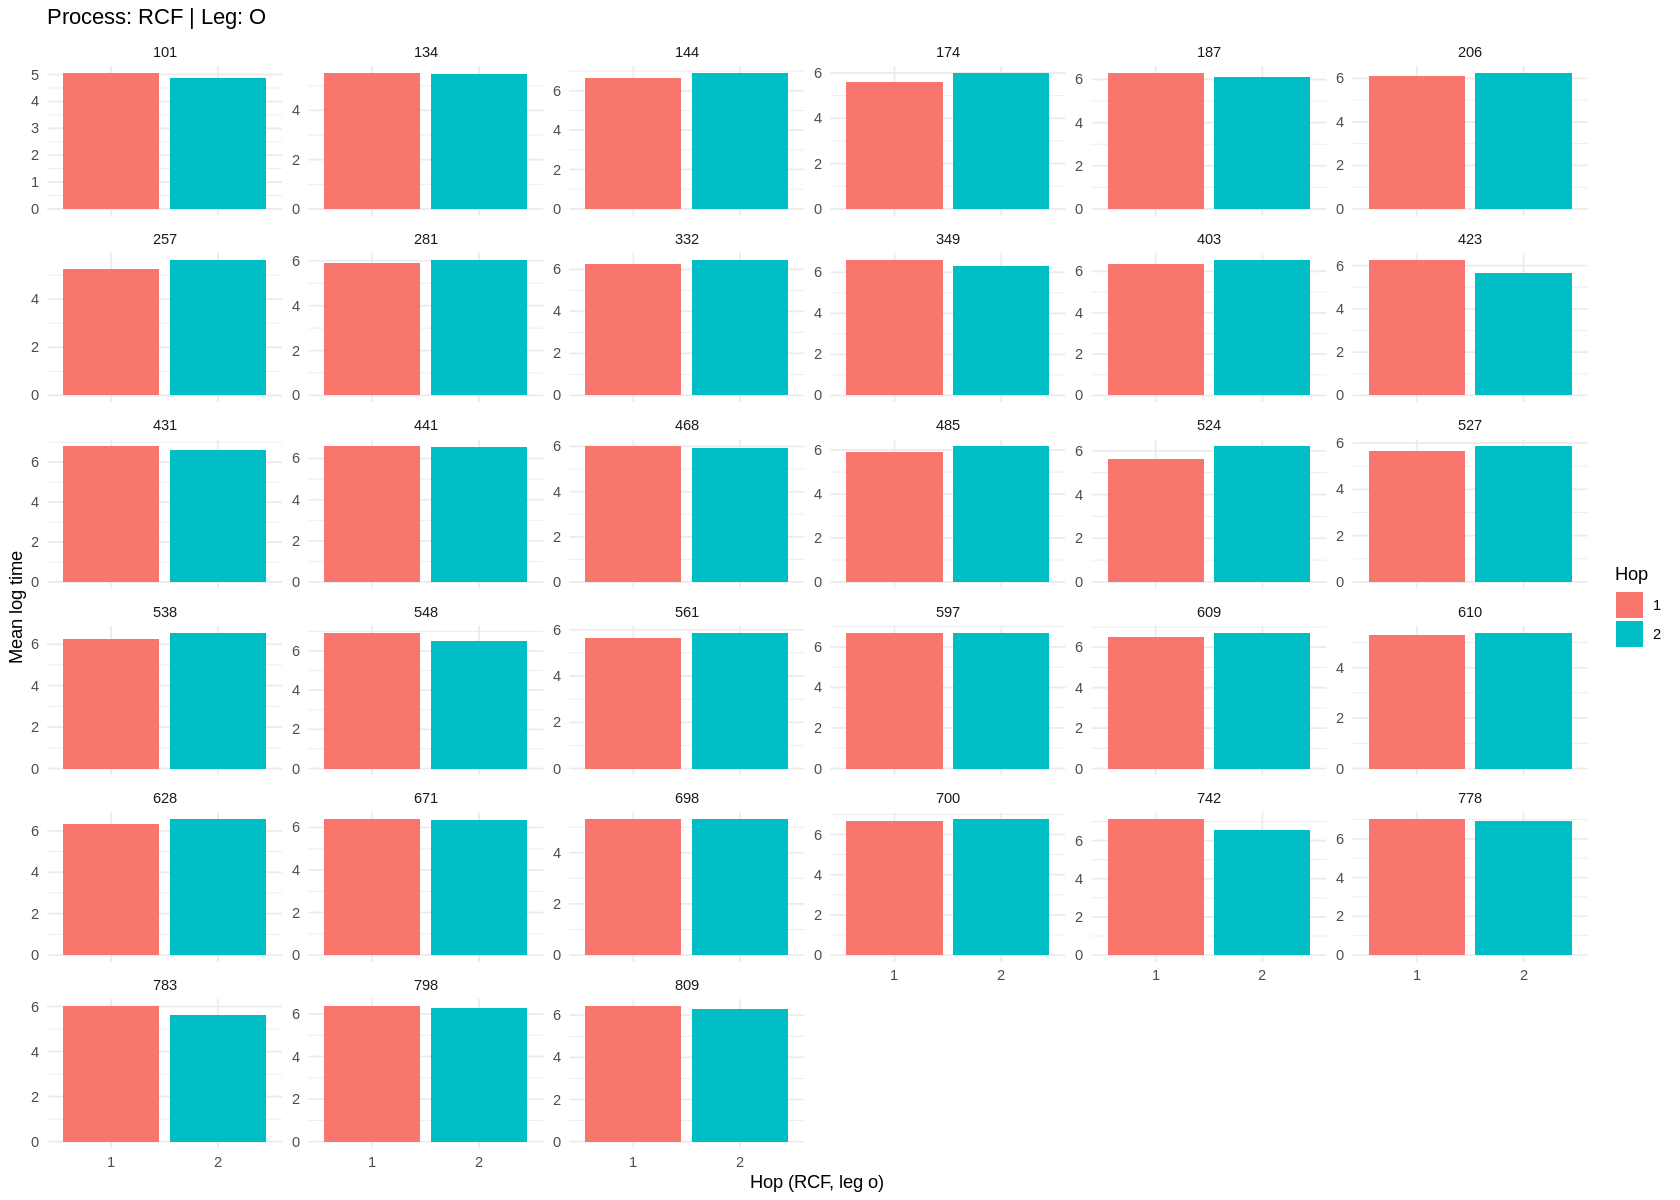

In [35]:
# Define your combinations
legs <- c("i1", "i2", "i3", "o")
processes <- c("dep", "rcf")
combinations <- expand.grid(leg = legs, process = processes, stringsAsFactors = FALSE)

# Loop through and generate a list of plots
all_plots <- map2(
  combinations$leg,
  combinations$process,
  ~ plot_leg_process(log_clean_data, leg = .x, process = .y)
)

# View the all the plots
print(all_plots)

### **2.3.3.4 Check if some airports have very few observations**

Lastly, we need to check if all airports show up often enough.

We note that some airports show up very rarely. To make sure that the variance of our model does not inflate, we decided that it might make sense to bin airports together that show up less often. **@Alessandro**

In [36]:
# Create a table of observations separated by process
airport_counts_split <- log_clean_data %>%
  # Select only the place columns
  select(matches("_place$")) %>%
  # Pivot to long format, but capture the column name this time
  pivot_longer(
    cols = everything(),
    names_to = "raw_col_name",
    values_to = "airport"
  ) %>%
  # Remove empty data
  filter(!is.na(airport)) %>%
  # Extract "dep" or "rcf" from the column name
  mutate(process = str_extract(raw_col_name, "dep|rcf")) %>%
  # Count per airport AND process
  count(airport, process, name = "n") %>%
  # Pivot wider so you have separate columns for easy comparison
  pivot_wider(
    names_from = process,
    values_from = n,
    values_fill = 0 # Fill with 0 if an airport has no obs for that process
  ) %>%
  # Create a total column for sorting
  mutate(total_n = dep + rcf) %>%
  arrange(desc(total_n))

# Preview
head(airport_counts_split)

airport dep   rcf   total_n
1 0       31137 31137 62274  
2 700      2003  2205  4208  
3 128      2195  1839  4034  
4 815      2240  1091  3331  
5 349      1104  1312  2416  
6 485       711   758  1469

In [37]:
# Define robustness threshold
min_global_obs <- 15

# reate the Valid List for DEP
valid_airports_dep <- airport_counts_split %>%
  filter(dep >= min_global_obs) %>%
  pull(airport)

# Create the Valid List for RCF
valid_airports_rcf <- airport_counts_split %>%
  filter(rcf >= min_global_obs) %>%
  pull(airport)

# Check the difference
print(paste("Robust DEP airports:", length(valid_airports_dep)))
print(paste("Robust RCF airports:", length(valid_airports_rcf)))

[1] "Robust DEP airports: 82"
[1] "Robust RCF airports: 104"


### **2.3.3.5 Train - Test Split**


**@Lea**: figure out if we want to actually have a pipeline set up for this

We want to target encode our airport IDs with their average effective time per step in the process. We have airport information given for the steps RCF and DEP for each leg.

We specifically keep the split between RCF and DEP as we believe there might be a difference how each airport performs at a different step.

Since we need to be careful about **information leakage into our test dataset**, we will already create a train and test split:

1. Train: 70
2. Test: 30

We will now impute the averages across the training data set, and then impose them on the test and training dataset.

This means that we will tune our parameters in the following steps using cross-validation, and not validation.


In [38]:
# adjusting to make sure we keep rare variables in it!

set.seed(123)

log_clean_data$combined <- interaction(
  log_clean_data$i1_hops,
  log_clean_data$i3_hops,
  log_clean_data$i2_hops,
  drop = TRUE
)

train_indices <- createDataPartition(
  y = log_clean_data$combined,
  p = 0.7,
  list = FALSE
)

# some combinations do not appear more than once, and they will be put in the training set

Warning message in createDataPartition(y = log_clean_data$combined, p = 0.7, list = FALSE):
“Some classes have a single record ( 3.1.2, 2.3.2, 1.1.3, 1.2.3, 2.2.3 ) and these will be selected for the sample”


In [39]:
train_data <- log_clean_data %>% slice(train_indices)
test_data <- log_clean_data %>% slice(-train_indices)

# print(train_data)
# print(test_data)

Warning message:
“Slicing with a 1-column matrix was deprecated in dplyr 1.1.0.”


### **2.3.3.6 Airport ID**

Let's start by collecting "rare" airports!

In [40]:
# Create a table of observations separated by process
airport_counts_split <- train_data %>%
  # Select only the place columns
  select(matches("_place$")) %>%
  # Pivot to long format, but capture the column name this time
  pivot_longer(
    cols = everything(),
    names_to = "raw_col_name",
    values_to = "airport"
  ) %>%
  # Remove empty data
  filter(!is.na(airport)) %>%
  # Extract "dep" or "rcf" from the column name
  mutate(process = str_extract(raw_col_name, "dep|rcf")) %>%
  # Count per airport AND process
  count(airport, process, name = "n") %>%
  # Pivot wider so you have separate columns for easy comparison
  pivot_wider(
    names_from = process,
    values_from = n,
    values_fill = 0 # Fill with 0 if an airport has no obs for that process
  ) %>%
  # Create a total column for sorting
  mutate(total_n = dep + rcf) %>%
  arrange(desc(total_n))

# Preview
head(airport_counts_split)

airport dep   rcf   total_n
1 0       21822 21822 43644  
2 700      1389  1531  2920  
3 128      1555  1315  2870  
4 815      1604   807  2411  
5 349       793   912  1705  
6 485       481   522  1003

Now, let's define the robustness threshold for the rare airports!

In [41]:
# Define robustness threshold
min_global_obs <- 15

# reate the Valid List for DEP
valid_airports_dep <- airport_counts_split %>%
  filter(dep >= min_global_obs) %>%
  pull(airport)

# Create the Valid List for RCF
valid_airports_rcf <- airport_counts_split %>%
  filter(rcf >= min_global_obs) %>%
  pull(airport)

# Check the difference
print(paste("Robust DEP airports:", length(valid_airports_dep)))
print(paste("Robust RCF airports:", length(valid_airports_rcf)))

[1] "Robust DEP airports: 76"
[1] "Robust RCF airports: 84"


In [42]:
# we are now working off of the train data set to avoid leakage!
airports <- train_data %>%
  select(
    nr,                  # Selects the exact column 'nr'
    ends_with("_place"), # Selects columns ending in _place
    ends_with("_e")
  )

head(airports) # verify that we are working with the train data set

nr i1_dep_1_place i1_rcf_1_place i1_dep_2_place i1_rcf_2_place i1_dep_3_place
1 0  609            256            0              0              0             
2 1  700            431            0              0              0             
3 3  173            349            349            671            0             
4 4  411            128            128            166            0             
5 5  815            128            0              0              0             
6 6  815            391            0              0              0             
  i1_rcf_3_place i2_dep_1_place i2_rcf_1_place i2_dep_2_place ⋯ i3_rcf_3_e
1 0              431            256            0              ⋯ 0         
2 0              257            149            149            ⋯ 0         
3 0              0              0              0              ⋯ 0         
4 0              0              0              0              ⋯ 0         
5 0              128            128            0              ⋯ 0         
6 0              815            391            0              ⋯ 0         
  i3_dlv_e o_rcs_e  o_dep_1_e o_rcf_1_e o_dep_2_e o_rcf_2_e o_dep_3_e o_rcf_3_e
1 0.000000 8.930494 7.960324  7.142827  0.000000  0.000000  0         0        
2 0.000000 8.011687 5.655992  6.265301  0.000000  0.000000  0         0        
3 0.000000 8.063378 6.783325  6.862758  0.000000  0.000000  0         0        
4 0.000000 5.187386 4.875197  5.117994  6.770789  5.846439  0         0        
5 0.000000 3.367296 5.730100  6.525030  0.000000  0.000000  0         0        
6 7.137278 4.394449 6.637258  4.369448  0.000000  0.000000  0         0        
  o_dlv_e 
1 6.073045
2 6.098074
3 5.068904
4 8.475746
5 6.146329
6 5.017280

1. RCF

In [43]:
rcf <- airports %>% select(grep("rcf", names(airports), value = TRUE)) # only pull rcf values

rcf_list <- list() # empty list to store the data sets
list_index <- 1 #
prefixes <- c("i1", "i2", "i3", "o") # prefixes for selecting the columns

for (prefix in prefixes) { # loop through legs
  for (hop in 1:3) { # loop through hops
    place_col <- paste0(prefix, "_rcf_", hop, "_place")
    e_col <- paste0(prefix, "_rcf_", hop, "_e")
    if (all(c(place_col, e_col) %in% names(rcf))) { # checking both columns exist

      # Select the pair, rename the columns for consistency, and filter out NAs
      temp_df <- rcf %>%
        select(Airport_ID = all_of(place_col), Effective_Time = all_of(e_col)) %>%
        filter(!is.na(Airport_ID) & !is.na(Effective_Time)) # Remove rows where either the ID or the Time is missing

      # Add the temporary dataset to our list
      rcf_list[[list_index]] <- temp_df
      list_index <- list_index + 1
    }
  }
}

df_appended_rcf_manual <- bind_rows(rcf_list) # append into one data set!
head(df_appended_rcf_manual)

Airport_ID Effective_Time
1 256        6.601230      
2 431        7.254885      
3 349        6.357842      
4 128        6.416732      
5 128        5.407172      
6 391        4.905275

In [44]:
# Define the threshold (Based on our discussion)
threshold <- 15

# Calculate Raw Statistics per Airport first
raw_stats_rcf <- df_appended_rcf_manual %>%
  group_by(Airport_ID) %>%
  summarize(
    Observation_Count = n(),
    Raw_Mean_Time = mean(Effective_Time, na.rm = TRUE),
    .groups = 'drop'
  )

# Calculate the "Mean of Rare Airports" (The Fallback Value)
# We look at all airports with N < Threshold and take their weighted average
mean_of_rare_rcf <- raw_stats_rcf %>%
  filter(Observation_Count < threshold) %>%
  summarize(
    # Weighted mean is safer than mean-of-means
    pooled_mean = weighted.mean(Raw_Mean_Time, Observation_Count)
  ) %>%
  pull(pooled_mean) # Extract the single number

print(paste("The fallback value for rare RCF airports is:", round(mean_of_rare_rcf, 4)))

[1] "The fallback value for rare RCF airports is: 6.2781"


In [45]:
# Create the Final Summary / Encoding Map
airport_summary_stats_rcf <- raw_stats_rcf %>%
  mutate(
    # Just for your reference, label them
    Type = ifelse(Observation_Count >= threshold, "Robust", "Rare"),

    # --- THE LOGIC ---
    # If Robust (N >= 15) -> Use the specific Raw Mean
    # If Rare   (N < 15)  -> Use the 'mean_of_rare_rcf' calculated above
    Encoded_Avg_Time = ifelse(Observation_Count >= threshold,
                               Raw_Mean_Time,
                               mean_of_rare_rcf)
  )

head(airport_summary_stats_rcf)

Airport_ID Observation_Count Raw_Mean_Time Type   Encoded_Avg_Time
1 0          21822             0.000000      Robust 0.000000        
2 100            1             6.354370      Rare   6.278092        
3 101           35             4.944993      Robust 4.944993        
4 102            5             5.937338      Rare   6.278092        
5 108           30             6.654658      Robust 6.654658        
6 112            1             5.537334      Rare   6.278092

2. DEP

In [46]:
dep <- airports %>% select(grep("dep", names(airports), value = TRUE)) # only pull dep values

dep_list <- list() # empty list to store the data sets
list_index <- 1 #
prefixes <- c("i1", "i2", "i3", "o") # prefixes for selecting the columns

for (prefix in prefixes) { # loop through legs
  for (hop in 1:3) { # loop through hops
    place_col <- paste0(prefix, "_dep_", hop, "_place")
    e_col <- paste0(prefix, "_dep_", hop, "_e")
    if (all(c(place_col, e_col) %in% names(dep))) { # checking both columns exist

      # Select the pair, rename the columns for consistency, and filter out NAs
      temp_df <- dep %>%
        select(Airport_ID = all_of(place_col), Effective_Time = all_of(e_col)) %>%
        filter(!is.na(Airport_ID) & !is.na(Effective_Time)) # Remove rows where either the ID or the Time is missing

      # Add the temporary dataset to our list
      dep_list[[list_index]] <- temp_df
      list_index <- list_index + 1
    }
  }
}

df_appended_dep_manual <- bind_rows(dep_list) # append into one data set!
head(df_appended_dep_manual)

Airport_ID Effective_Time
1 609        5.370638      
2 700        5.693732      
3 173        6.655440      
4 411        5.484797      
5 815        5.556828      
6 815        7.144407

In [47]:
# Define the threshold
threshold <- 15

# Calculate Raw Statistics per Airport first
raw_stats_dep <- df_appended_dep_manual %>%
  group_by(Airport_ID) %>%
  summarize(
    Observation_Count = n(),
    Raw_Mean_Time = mean(Effective_Time, na.rm = TRUE),
    .groups = 'drop'
  )

# Calculate the "Mean of Rare Airports" (The Fallback Value)
# We look at all airports with N < Threshold and take their weighted average
mean_of_rare_dep <- raw_stats_dep %>%
  filter(Observation_Count < threshold) %>%
  summarize(
    # Weighted mean is safer than mean-of-means
    pooled_mean = weighted.mean(Raw_Mean_Time, Observation_Count)
  ) %>%
  pull(pooled_mean) # Extract the single number

print(paste("The fallback value for rare RCF airports is:", round(mean_of_rare_dep, 4)))

[1] "The fallback value for rare RCF airports is: 6.0493"


In [48]:
# Create the Final Summary / Encoding Map
airport_summary_stats_dep <- raw_stats_dep %>%
  mutate(
    # Just for your reference, label them
    Type = ifelse(Observation_Count >= threshold, "Robust", "Rare"),

    # --- THE LOGIC ---
    # If Robust (N >= 15) -> Use the specific Raw Mean
    # If Rare   (N < 15)  -> Use the 'mean_of_rare_dep' calculated above
    Encoded_Avg_Time = ifelse(Observation_Count >= threshold,
                               Raw_Mean_Time,
                               mean_of_rare_dep)
  )

head(airport_summary_stats_dep)

Airport_ID Observation_Count Raw_Mean_Time Type   Encoded_Avg_Time
1 0          21822             0.000000      Robust 0.000000        
2 101           26             6.291795      Robust 6.291795        
3 103            1             5.043425      Rare   6.049349        
4 108            2             6.527265      Rare   6.049349        
5 113           59             5.448128      Robust 5.448128        
6 118            1             3.806662      Rare   6.049349

In [49]:
# select our variables of interest;)
airport_summary_stats_dep <- airport_summary_stats_dep%>%select(Airport_ID, Encoded_Avg_Time)
airport_summary_stats_rcf <- airport_summary_stats_rcf%>%select(Airport_ID, Encoded_Avg_Time)

## **2.3.4 Bringing new data set together!**

**@Francesco**, can you please write out how you exactly proceeded here!

In [50]:
total_e_selected <- total_e %>% select(log_total_e, nr) # select variables that we need
# Select 'nr' and planned time columns directly from clean_data to ensure 'nr' is present
log_p_data_selected <- log_clean_data %>% select(nr, matches("_p$")) # let's also pull the planned time for the different steps!

# Perform chained left_join operations
dataset <- total_e_selected %>%
  left_join(hops_legs, by = "nr") %>%
  left_join(log_p_data_selected, by = "nr")

str(dataset) # merge in the airports and replace the airports with their effective time

'data.frame':	3942 obs. of  39 variables:
 $ log_total_e: num  9.77 9.7 8.25 8.9 10.6 ...
 $ nr         : chr  "0" "1" "10" "100" ...
 $ i1_hops    : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ i2_hops    : Factor w/ 3 levels "1","2","3": 1 2 1 1 2 NA 1 1 NA NA ...
 $ i3_hops    : Factor w/ 3 levels "1","2","3": NA NA NA NA 1 NA NA 1 NA NA ...
 $ o_hops     : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 2 2 1 2 ...
 $ legs       : Factor w/ 3 levels "1","2","3": 2 2 2 2 3 1 2 3 1 1 ...
 $ i1_rcs_p   : num  5.29 6.74 6.62 7.37 7.07 ...
 $ i1_dep_1_p : num  5.35 4.5 5.01 5.7 5.48 ...
 $ i1_rcf_1_p : num  6.84 7.57 5.98 6.95 6.61 ...
 $ i1_dep_2_p : num  0 0 0 0 0 0 0 0 0 0 ...
 $ i1_rcf_2_p : num  0 0 0 0 0 0 0 0 0 0 ...
 $ i1_dep_3_p : num  0 0 0 0 0 0 0 0 0 0 ...
 $ i1_rcf_3_p : num  0 0 0 0 0 0 0 0 0 0 ...
 $ i1_dlv_p   : num  6.73 8.24 8.28 7.04 8.54 ...
 $ i2_rcs_p   : num  8.11 7.99 5.44 7.21 7.36 ...
 $ i2_dep_1_p : num  5.7 5.19 5.01 5.48 4.5 ...
 $ i2_rcf_1_p : num

In [51]:
# replacing the airport IDs with the means calculated on the training dataset
airports <- clean_data %>%
  select(
    nr,                  # Selects the exact column 'nr'
    ends_with("_place") # Selects columns ending in _place
  )

airports_replaced <- airports %>%
  mutate(
    across(
      ends_with("_place"),
      ~ {
        colname <- cur_column()

        # If column contains "dep", use airport_summary_stats_dep, else use rcf
        lookup <- if (str_detect(colname, "dep")) {
          airport_summary_stats_dep
        } else {
          airport_summary_stats_rcf
        }

        # Join each column of airport IDs to get Average_Effective_Time
        lookup_match <- lookup %>%
          select(Airport_ID, Encoded_Avg_Time)

        # Replace ID with average time
        lookup_match$Encoded_Avg_Time[match(., lookup_match$Airport_ID)]
      }
    )
  )

In [52]:
dataset <- dataset %>% left_join(airports_replaced, by = "nr")

In [53]:
head(dataset)

log_total_e nr   i1_hops i2_hops i3_hops o_hops legs i1_rcs_p i1_dep_1_p
1  9.769613   0    1       1       NA      1      2    5.293305 5.347108  
2  9.696279   1    1       2       NA      1      2    6.738152 4.499810  
3  8.254009   10   1       1       NA      1      2    6.617403 5.010635  
4  8.903408   100  1       1       NA      1      2    7.374629 5.703782  
5 10.602418   1000 1       2       1       1      3    7.069023 5.480639  
6  7.822445   1001 1       NA      NA      1      1    5.117994 5.010635  
  i1_rcf_1_p ⋯ i3_dep_2_place i3_rcf_2_place i3_dep_3_place i3_rcf_3_place
1 6.840547   ⋯ 0              0              0              0             
2 7.567863   ⋯ 0              0              0              0             
3 5.978886   ⋯ 0              0              0              0             
4 6.951772   ⋯ 0              0              0              0             
5 6.606650   ⋯ 0              0              0              0             
6 5.043425   ⋯ 0              0              0              0             
  o_dep_1_place o_rcf_1_place o_dep_2_place o_rcf_2_place o_dep_3_place
1 6.552485      6.519944      0             0             0            
2 6.053279      6.421778      0             0             0            
3 6.450809      6.562273      0             0             0            
4 6.387131      6.421778      0             0             0            
5 6.825470      6.680270      0             0             0            
6 6.450809      6.562273      0             0             0            
  o_rcf_3_place
1 0            
2 0            
3 0            
4 0            
5 0            
6 0

In [54]:
summary(dataset)

  log_total_e          nr            i1_hops  i2_hops     i3_hops     o_hops  
 Min.   : 6.819   Length:3942        1:2747   1   :1833   1   : 975   1:2097  
 1st Qu.: 8.996   Class :character   2:1172   2   : 777   2   : 383   2:1819  
 Median : 9.399   Mode  :character   3:  23   3   :  14   3   :   8   3:  26  
 Mean   : 9.433                               NA's:1318   NA's:2576           
 3rd Qu.: 9.843                                                               
 Max.   :13.257                                                               
                                                                              
 legs        i1_rcs_p        i1_dep_1_p      i1_rcf_1_p      i1_dep_2_p   
 1:1318   Min.   : 1.609   Min.   :4.317   Min.   :3.912   Min.   :0.000  
 2:1258   1st Qu.: 5.934   1st Qu.:4.787   1st Qu.:6.120   1st Qu.:0.000  
 3:1366   Median : 6.989   Median :5.193   Median :6.709   Median :0.000  
          Mean   : 6.820   Mean   :5.182   Mean   :6.480   Mean   :1

Now we need to replace NAs (which are rare airports present in the test data but not in the training data) with the value for rare airports.

In [55]:
dataset <- dataset %>%
  mutate(
    across(
      .cols = matches("_rcf"),
      .fns  = ~ replace_na(., mean_of_rare_rcf)
    ),
    across(
      .cols = matches("_dep"), # Selects i1_dep_1_encoded, etc.
      .fns  = ~ replace_na(., mean_of_rare_dep)
    )
  )

summary(dataset)

  log_total_e          nr            i1_hops  i2_hops     i3_hops     o_hops  
 Min.   : 6.819   Length:3942        1:2747   1   :1833   1   : 975   1:2097  
 1st Qu.: 8.996   Class :character   2:1172   2   : 777   2   : 383   2:1819  
 Median : 9.399   Mode  :character   3:  23   3   :  14   3   :   8   3:  26  
 Mean   : 9.433                               NA's:1318   NA's:2576           
 3rd Qu.: 9.843                                                               
 Max.   :13.257                                                               
 legs        i1_rcs_p        i1_dep_1_p      i1_rcf_1_p      i1_dep_2_p   
 1:1318   Min.   : 1.609   Min.   :4.317   Min.   :3.912   Min.   :0.000  
 2:1258   1st Qu.: 5.934   1st Qu.:4.787   1st Qu.:6.120   1st Qu.:0.000  
 3:1366   Median : 6.989   Median :5.193   Median :6.709   Median :0.000  
          Mean   : 6.820   Mean   :5.182   Mean   :6.480   Mean   :1.934  
          3rd Qu.: 7.574   3rd Qu.:5.481   3rd Qu.:6.928   3rd Qu.:5.630

In [56]:
write.csv(dataset, file = "final_dataset.csv", row.names = FALSE)

### **2.3.4.1  Train - Test Split**

**@TEAM:**
Here is the train and test data sets! Note that I generate the splits (and the index we use to split) in 2.3.3.5 Train - Test Split.

I then filter the data and only work on the train data for obtaining the average.

In [57]:
dataset <- dataset %>%
  mutate(
    across(
      ends_with("_hops"),
      ~ fct_explicit_na(., na_level = "0")
    )
  )

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(ends_with("_hops"), ~fct_explicit_na(., na_level =
  "0"))`.
Caused by warning:
! `fct_explicit_na()` was deprecated in forcats 1.0.0.
ℹ Please use `fct_na_value_to_level()` instead.”


In [58]:
train_data <- dataset %>% slice(train_indices)
test_data <- dataset %>% slice(-train_indices)

In [59]:
# head(train_data)
# head(test_data)
write.csv(train_data, file = "train_data.csv", row.names = FALSE)
write.csv(test_data, file = "test_data.csv", row.names = FALSE)

# **3. Descriptive Stats**

First, let's check the distribution of the complexity of the shipments

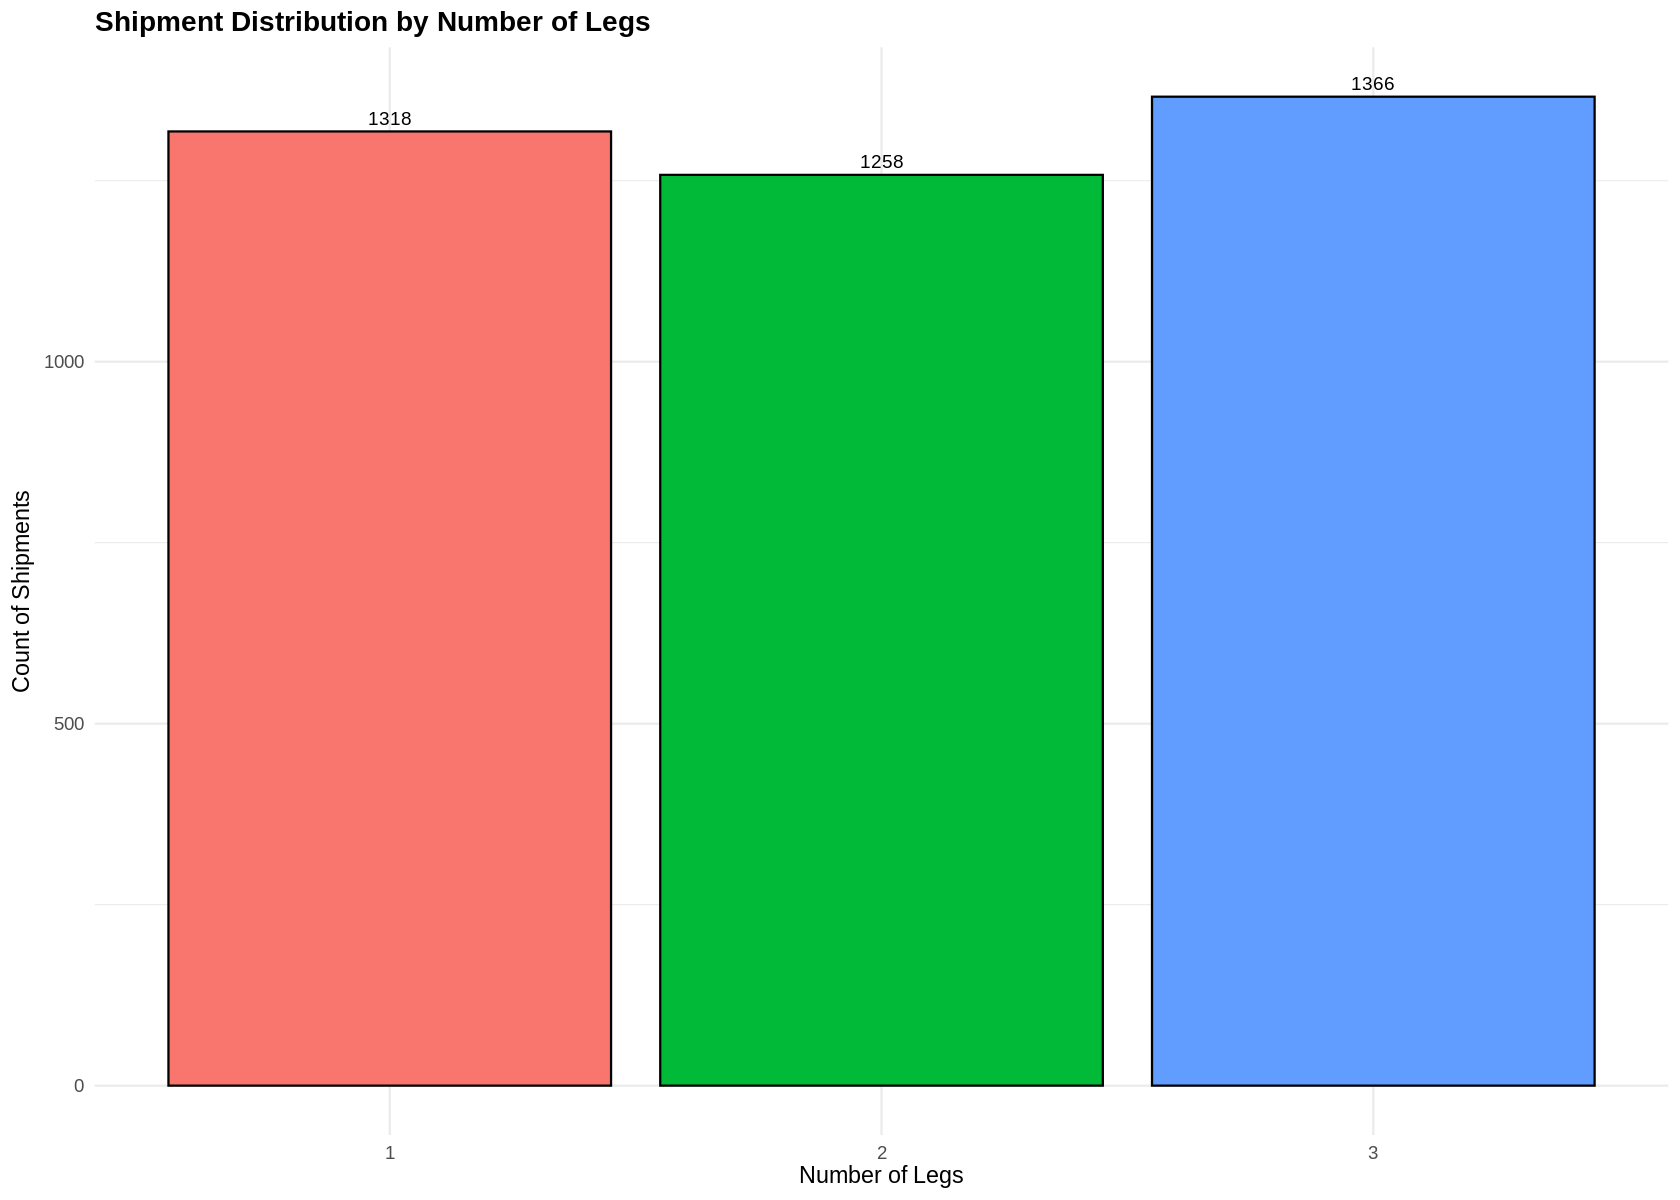

In [60]:
dataset %>%
  ggplot(aes(x = legs, fill = legs)) +
  geom_bar(color = "black") +
  # Add count labels above the bars
  geom_text(stat = 'count', aes(label = after_stat(count)), vjust = -0.5, size = 4) +
  labs(
    title = "Shipment Distribution by Number of Legs",
    x = "Number of Legs",
    y = "Count of Shipments"
  ) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none",
        plot.title = element_text(face = "bold"))

Good news! We have similar amount of shipments with 1 leg, 2 legs, and 3 legs.

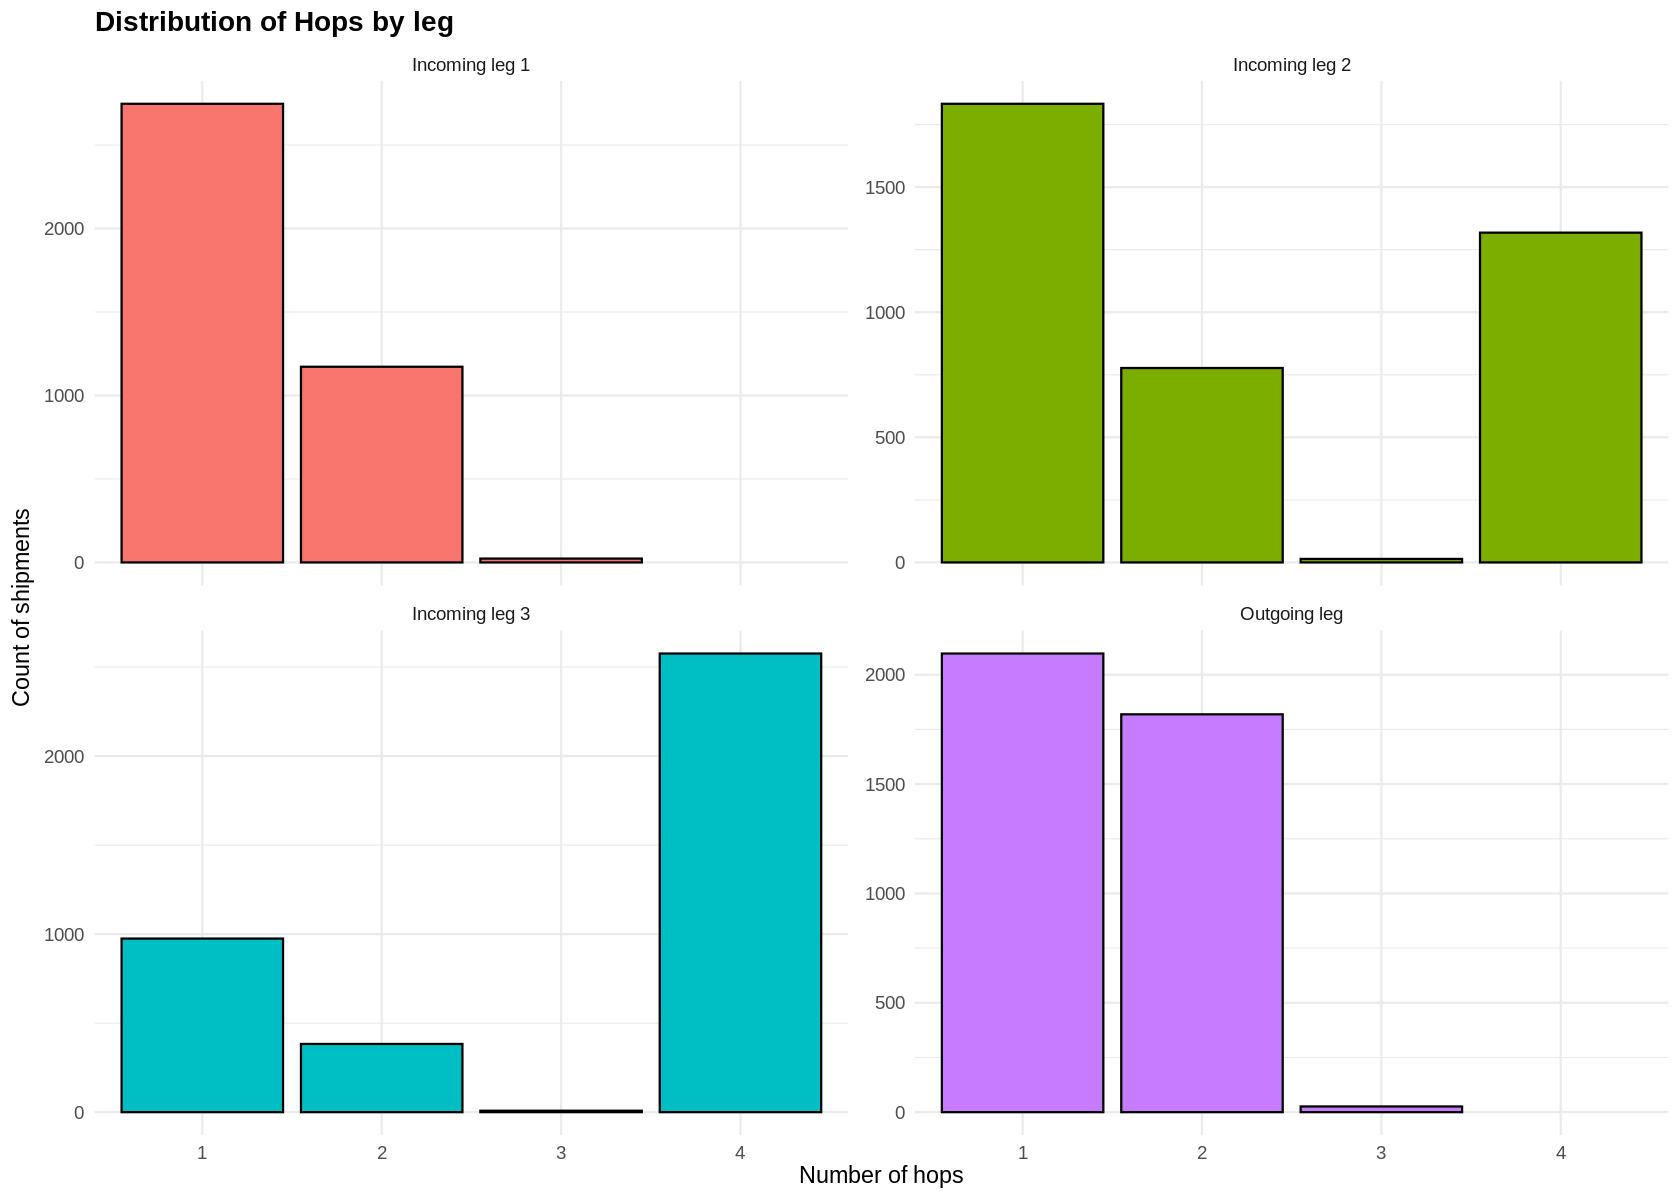

In [61]:
# Reshape the data to combine all hop columns into a single column
df_hops_long <- dataset %>%
  select(i1_hops, i2_hops, i3_hops, o_hops) %>%
  pivot_longer(
    cols = ends_with("_hops"),
    names_to = "leg_type",
    values_to = "n_hops"
  ) %>%
  mutate(n_hops = as.numeric(n_hops)) %>%
  # Filter out structural zeros (0 hops means the leg did not exist for that shipment)
  filter(n_hops > 0) %>%
  # Create clean labels for the facets
  mutate(leg_type = factor(leg_type,
                           levels = c("i1_hops", "i2_hops", "i3_hops", "o_hops"),
                           labels = c("Incoming leg 1", "Incoming leg 2", "Incoming leg 3", "Outgoing leg")))

df_hops_long %>%
  ggplot(aes(x = factor(n_hops), fill = leg_type)) +
  geom_bar(position = "dodge", color = "black") +
  labs(
    title = "Distribution of Hops by leg",
    x = "Number of hops",
    y = "Count of shipments"
  ) +
  # Use facets to clearly separate the distribution for each leg type
  facet_wrap(~leg_type, scales = "free_y") +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none",
        plot.title = element_text(face = "bold"))

There are very few observations for legs with 3 hops, maybe we should drop them?

Now, let's see if increased shipment complexity is connected to increase total effective time.

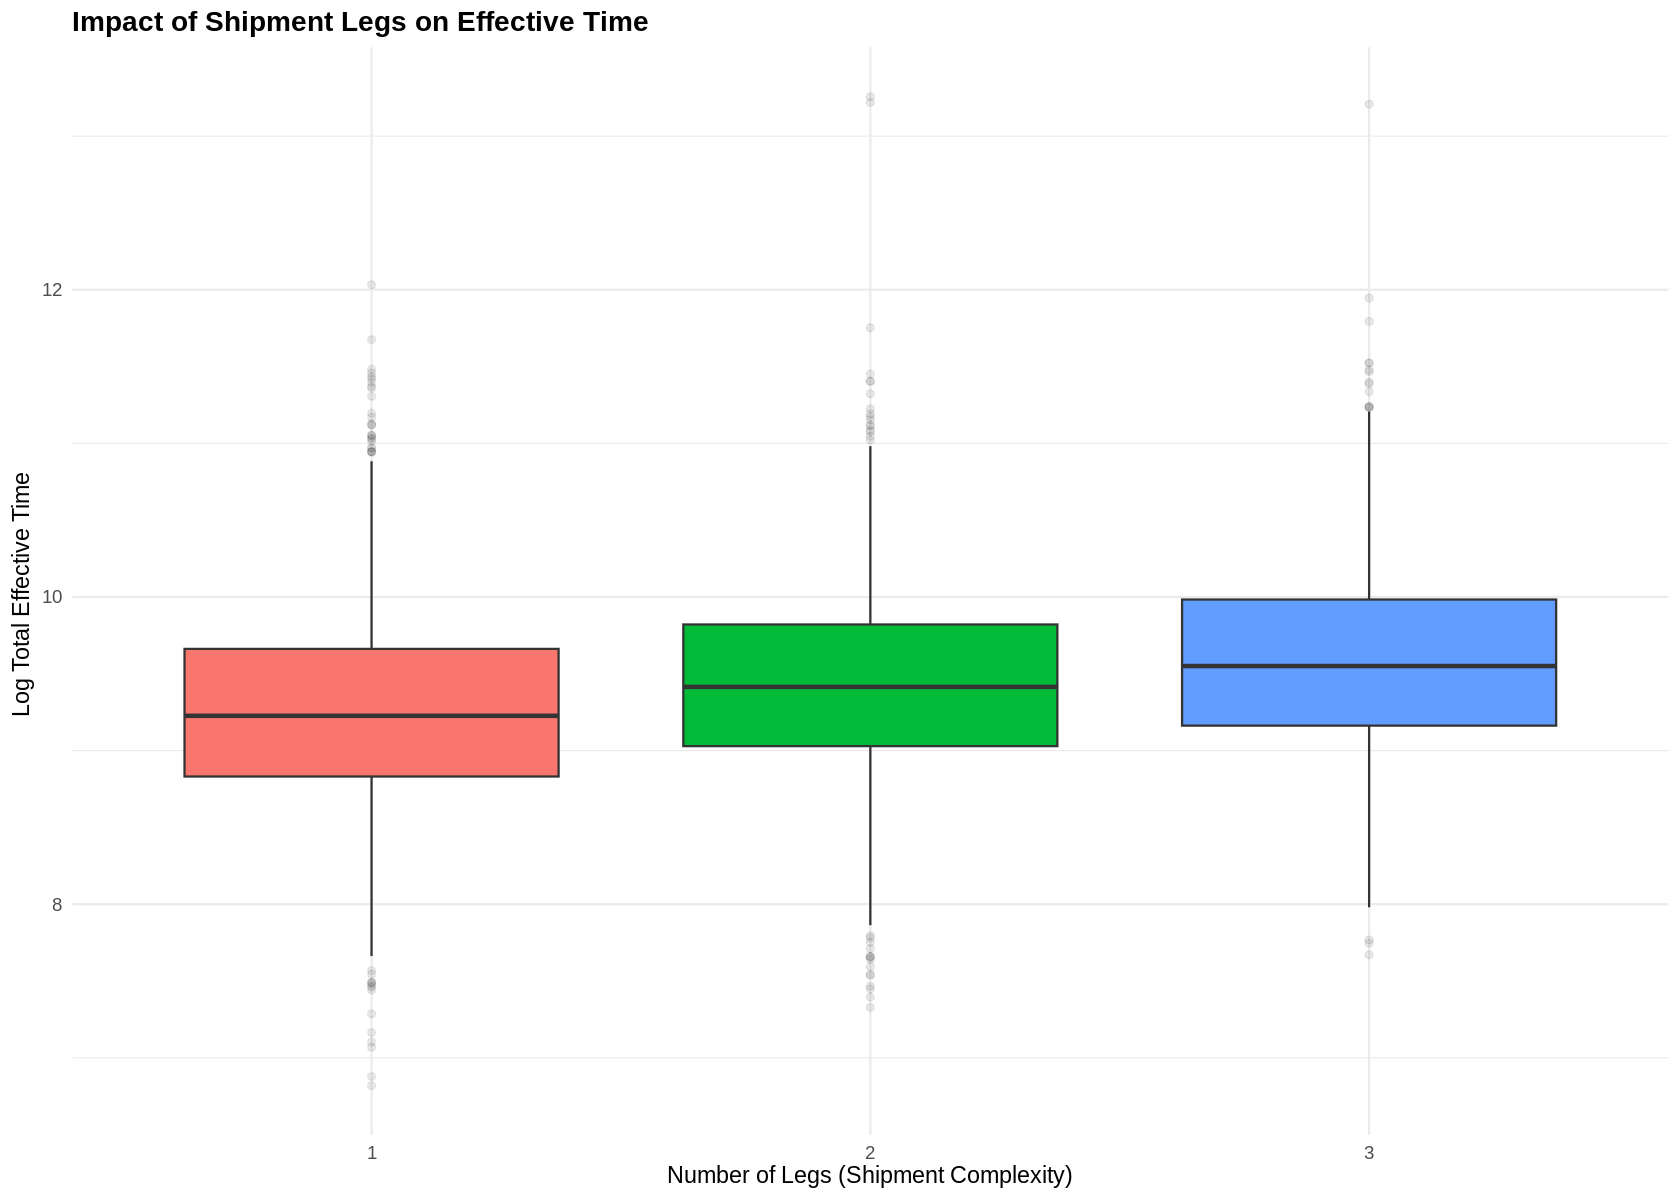

In [62]:
dataset %>%
  ggplot(aes(x = legs, y = log_total_e, fill = legs)) +
  geom_boxplot(outlier.alpha = 0.1) +
  labs(
    title = "Impact of Shipment Legs on Effective Time",
    x = "Number of Legs (Shipment Complexity)",
    y = "Log Total Effective Time "
  ) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none",
        plot.title = element_text(face = "bold"))

As expected, more complex shipments have higher median total effective time.

It doesn't make a lot of sense to check the same for hops, since more hops mean increased travel time. However, this can be a good sanity check. We will not consider legs with 3 hops given the very few observations.

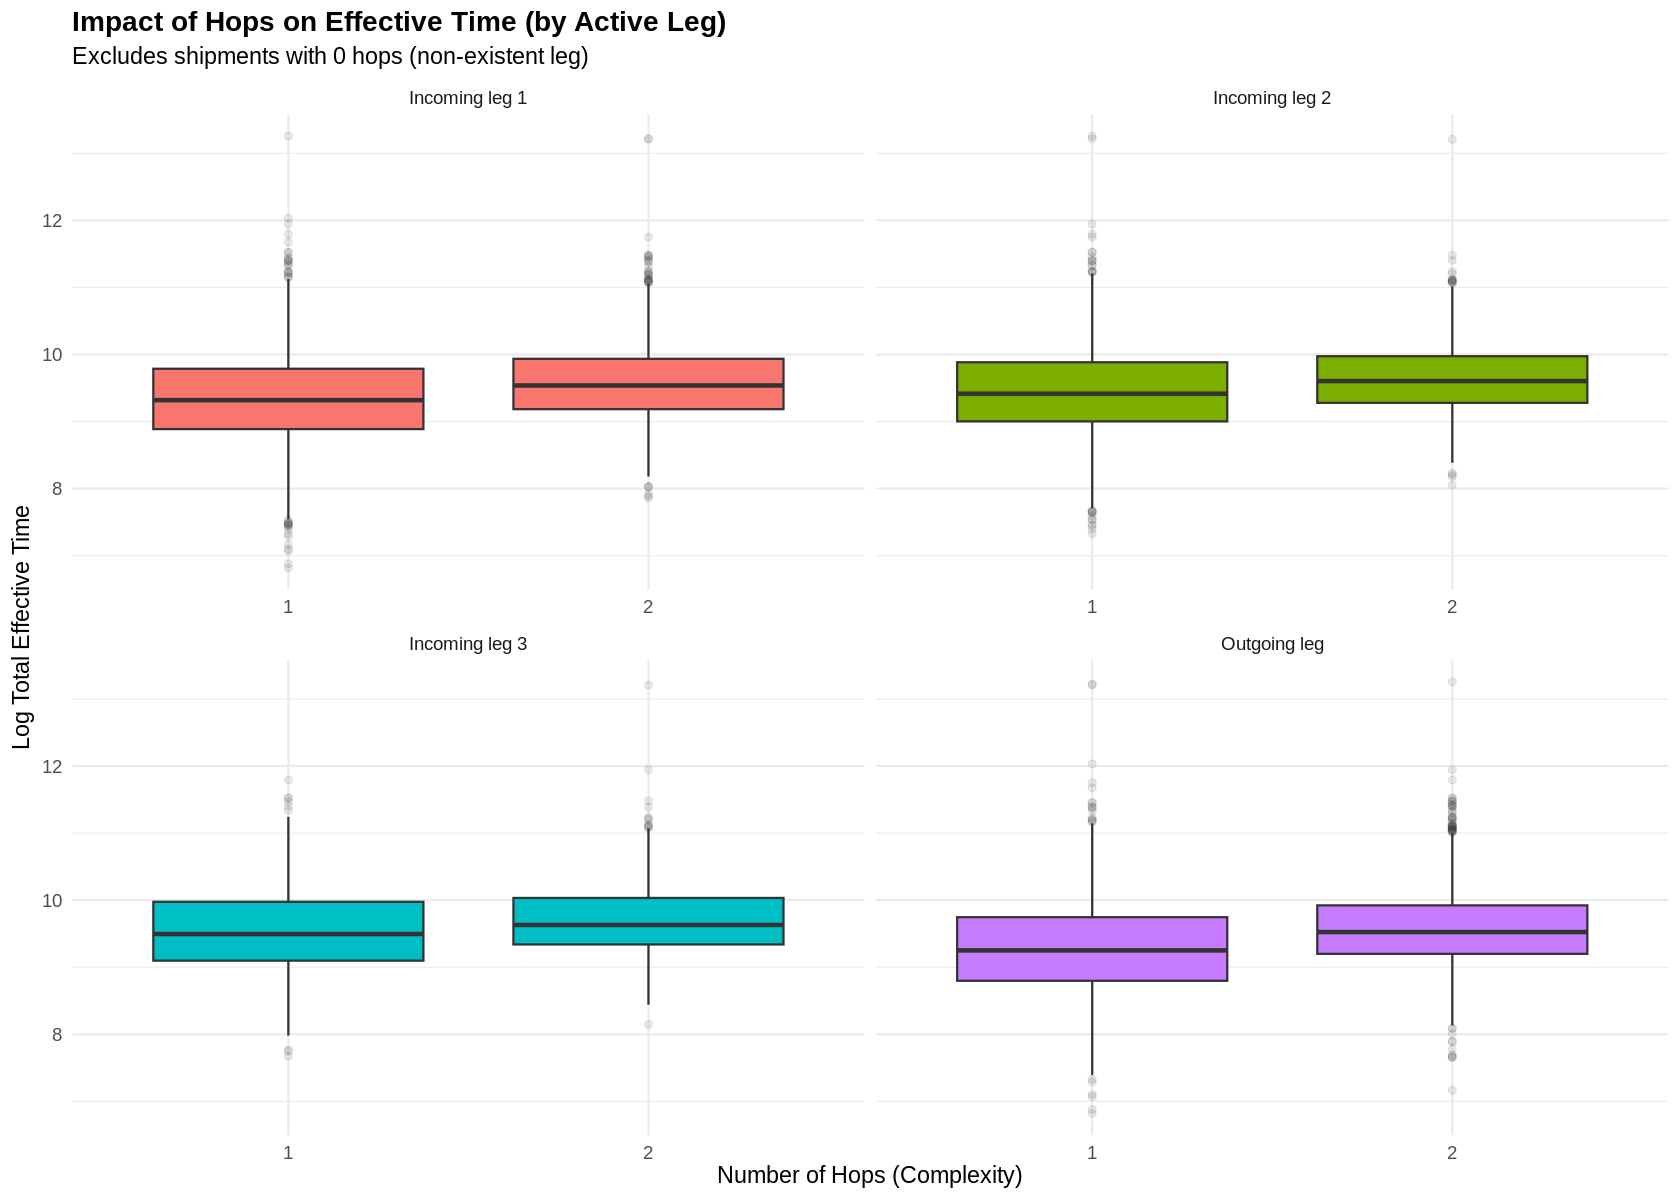

In [63]:
df_hops_long <- dataset %>%
  select(log_total_e, i1_hops, i2_hops, i3_hops, o_hops) %>%
  pivot_longer(
    cols = ends_with("_hops"),
    names_to = "leg_type",
    values_to = "n_hops"
  ) %>%
  mutate(n_hops = as.numeric(n_hops)) %>%
  # Filter out structural zeros (n_hops = 0 means the leg did not exist)
  filter(n_hops > 0 & n_hops < 3) %>%
  # Create clean labels and convert n_hops to a factor for the box plot X-axis
  mutate(
    leg_type = factor(leg_type,
                      levels = c("i1_hops", "i2_hops", "i3_hops", "o_hops"),
                      labels = c("Incoming leg 1", "Incoming leg 2", "Incoming leg 3", "Outgoing leg")),
    n_hops = factor(n_hops)
  )

df_hops_long %>%
  ggplot(aes(x = n_hops, y = log_total_e, fill = leg_type)) +
  geom_boxplot(outlier.alpha = 0.1) +
  labs(
    title = "Impact of Hops on Effective Time (by Active Leg)",
    subtitle = "Excludes shipments with 0 hops (non-existent leg)",
    x = "Number of Hops (Complexity)",
    y = "Log Total Effective Time "
  ) +
  # Use facets to compare the hop distribution for each specific leg
  facet_wrap(~leg_type, scales = "free_x") +
  theme_minimal(base_size = 14) +
  theme(legend.position = "none",
        plot.title = element_text(face = "bold"))

This behaves as expected.

`geom_smooth()` using formula = 'y ~ x'


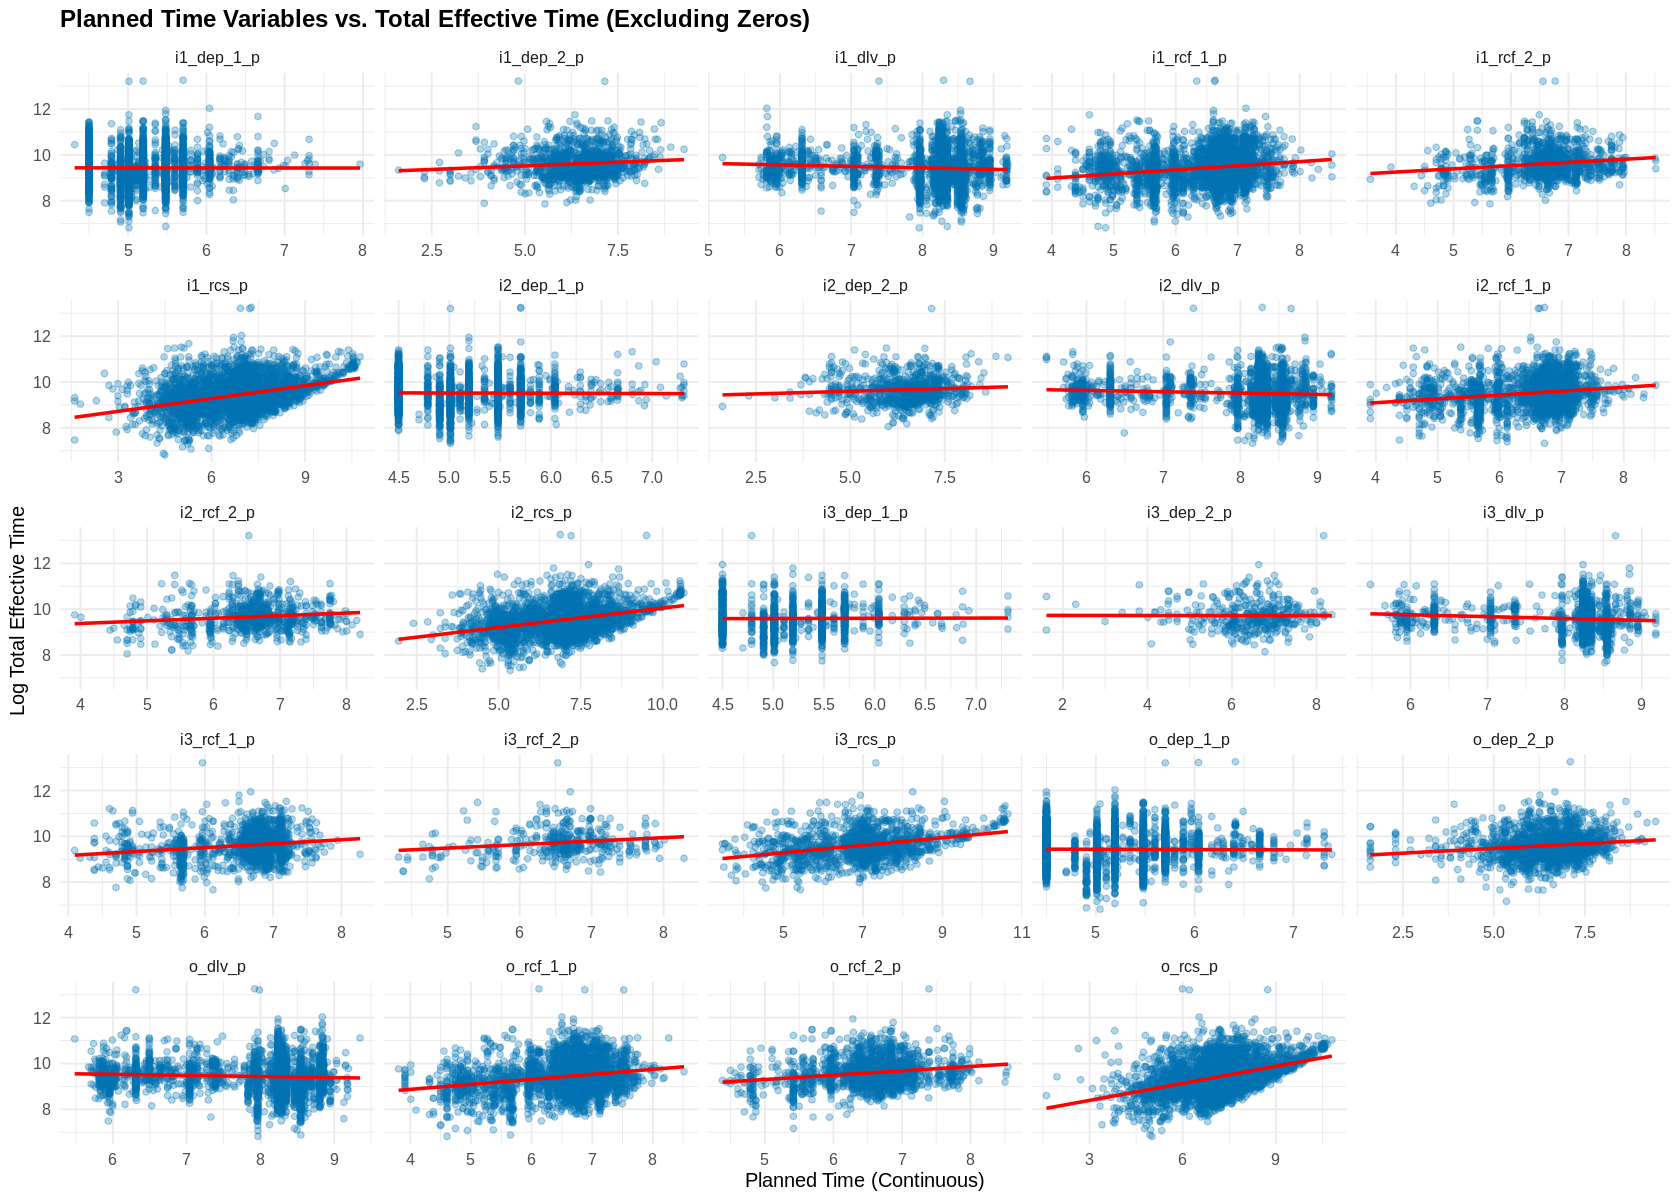

In [64]:
df_p_long <- dataset %>%
  # Select the target and all planned time columns
  select(log_total_e, ends_with("_p"), -contains("3_p")) %>%
  # Reshape to long format for faceting
  pivot_longer(
    cols = ends_with("_p"),
    names_to = "p_variable",
    values_to = "planned_time"
  ) %>%
  # Exclude structural zeros
  filter(planned_time > 0)

df_p_long %>%
  ggplot(aes(x = planned_time, y = log_total_e)) +
  # Add scatter points
  geom_point(alpha = 0.3, size = 1.5, color = "#0072B2") +
  # Add the Linear Regression (LM) line
  geom_smooth(method = "lm", color = "red", se = FALSE, linewidth = 1) +
  labs(
    title = "Planned Time Variables vs. Total Effective Time (Excluding Zeros)",
    x = "Planned Time (Continuous)",
    y = "Log Total Effective Time "
  ) +
  # Create a grid of plots for every _p variable
  facet_wrap(~p_variable, scales = "free_x") +
  theme_minimal(base_size = 12) +
  theme(plot.title = element_text(face = "bold"))

It is interesting to see that planned rcs (start of the process) is always positively correlated with the total effective time, while the dlv (end of the leg) is always negatively correlated.\
This could be because the planners tend to underestimated the step duration at the start of a leg, but overestimate it at the end to have a "buffer" in case something happens during the transportation.

`geom_smooth()` using formula = 'y ~ x'


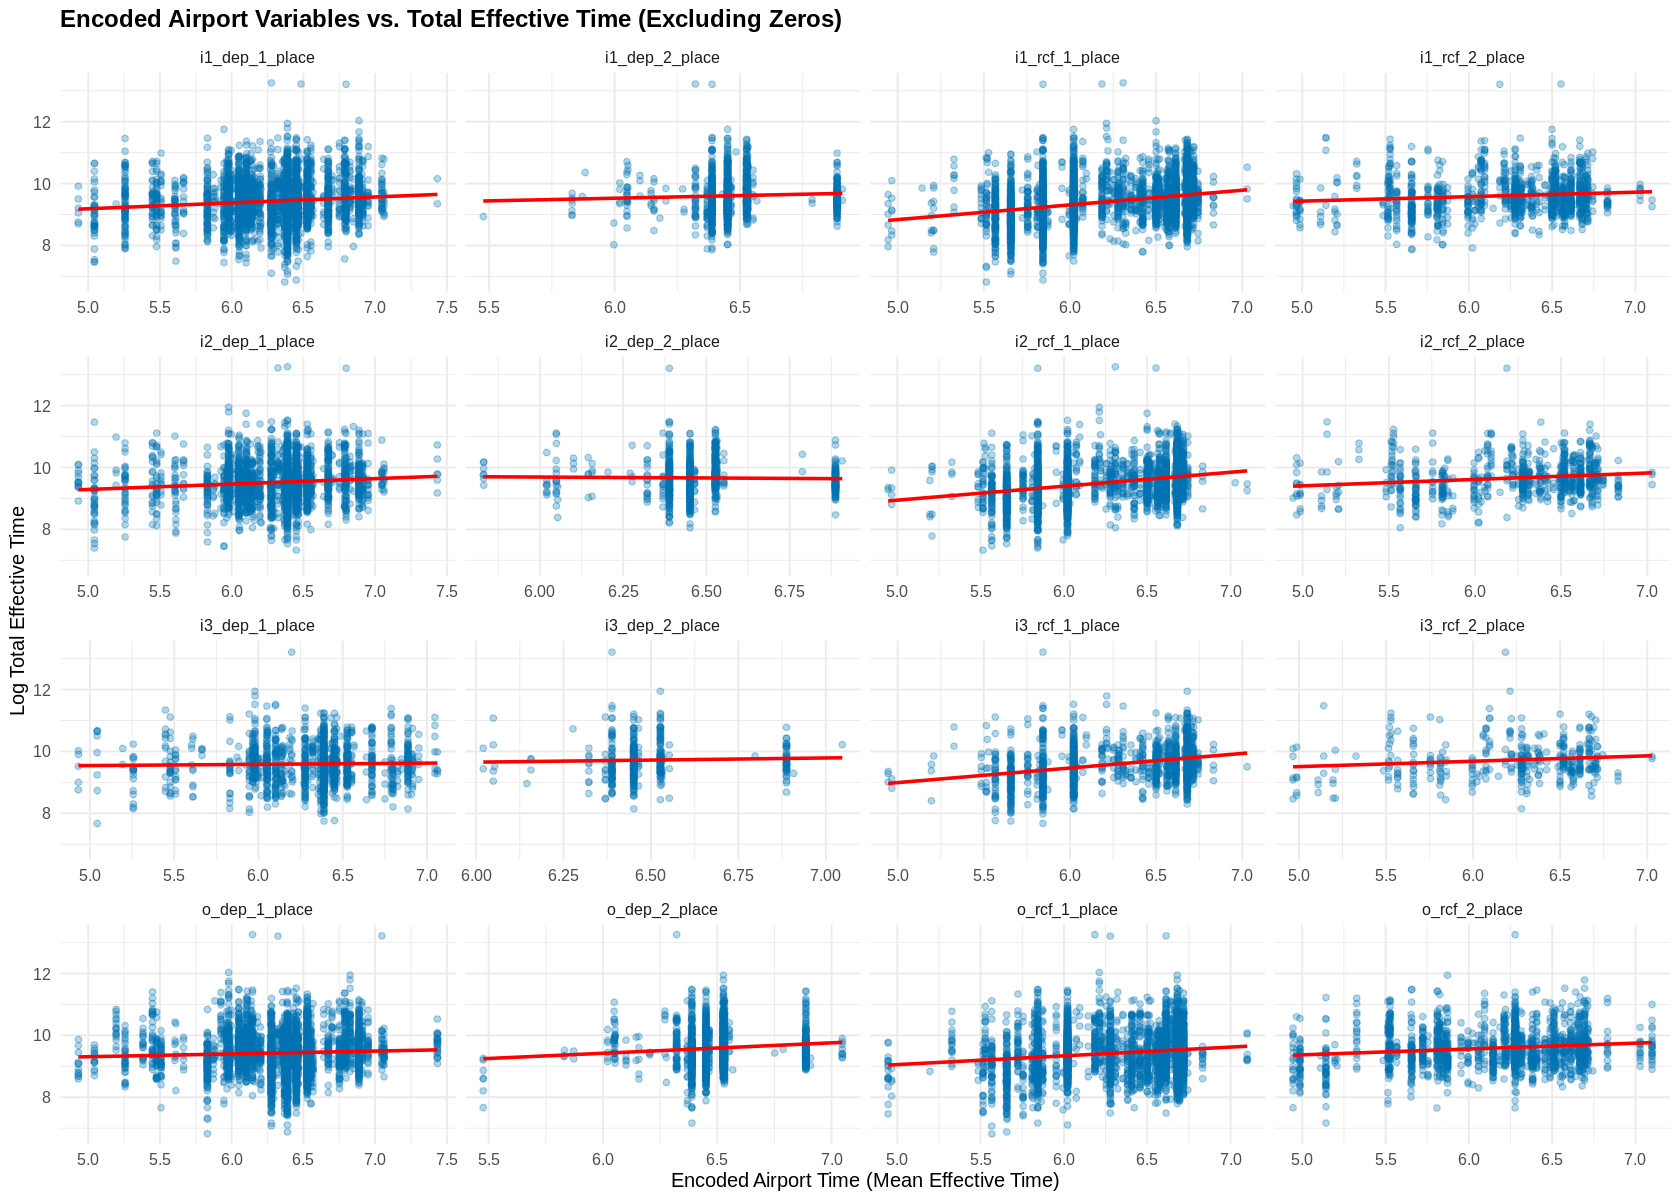

In [65]:
df_place_long <- dataset %>%
  # Select the target and all encoded airport columns
  select(log_total_e, ends_with("_place"), -contains("_3_place")) %>%
  pivot_longer(
    cols = ends_with("_place"),
    names_to = "place_variable",
    values_to = "encoded_time"
  ) %>%
  # Exclude structural zeros
  filter(encoded_time > 0)

df_place_long %>%
  ggplot(aes(x = encoded_time, y = log_total_e)) +
  # Add scatter points
  geom_point(alpha = 0.3, size = 1.5, color = "#0072B2") +
  # Add the Linear Regression (LM) line
  geom_smooth(method = "lm", color = "red", se = FALSE, linewidth = 1) +
  labs(
    title = "Encoded Airport Variables vs. Total Effective Time (Excluding Zeros)",
    x = "Encoded Airport Time (Mean Effective Time)",
    y = "Log Total Effective Time "
  ) +
  # Create a grid of plots for every _place variable
  facet_wrap(~place_variable, scales = "free_x") +
  theme_minimal(base_size = 12) +
  theme(plot.title = element_text(face = "bold"))

We may want to decide whether treating the number of hops and the number of legs as categorical or as numeric.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


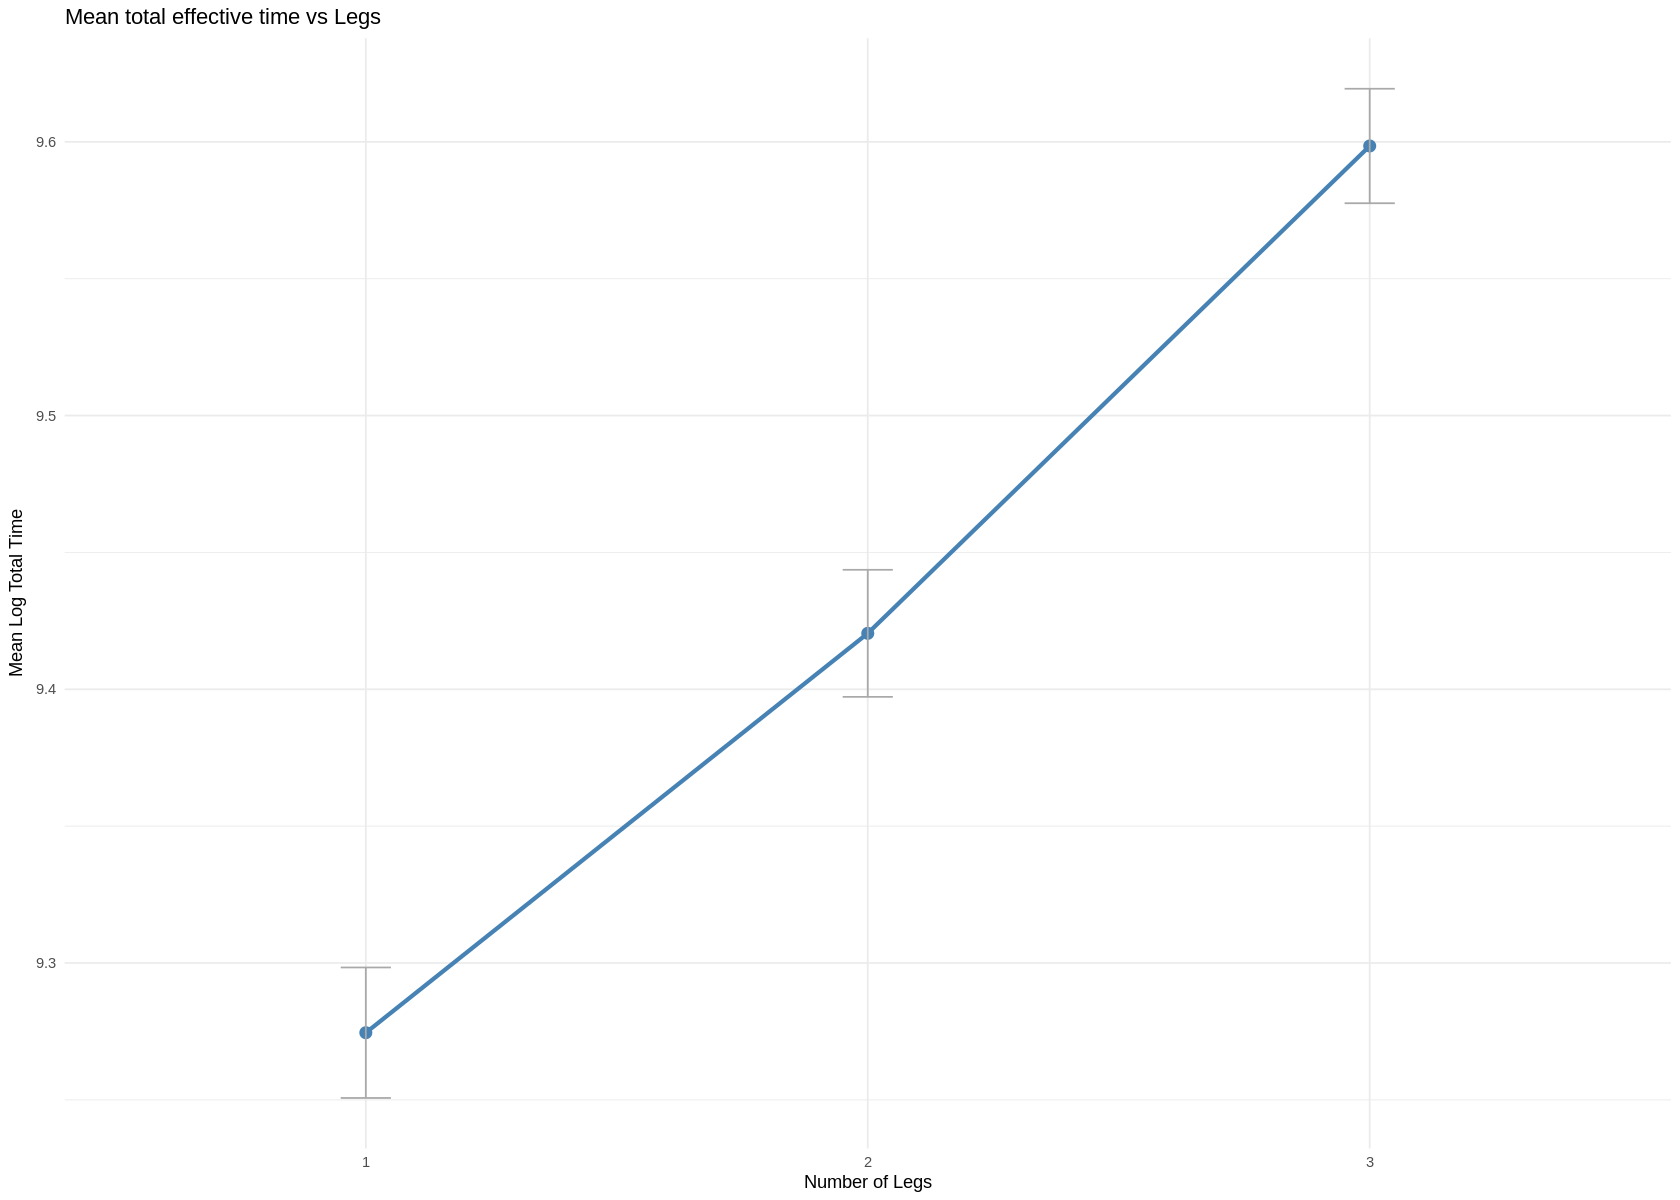

In [66]:
ggplot(train_data, aes(x = legs, y = log_total_e)) +
  # Draw the line connecting the means
  stat_summary(fun = mean, geom = "line", color = "steelblue", size = 1.2, group = 1) +
  # Draw the points for the means
  stat_summary(fun = mean, geom = "point", color = "steelblue", size = 3) +
  # Confidence Intervals to see stability
  stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.1, color = "darkgrey") +
  labs(
    title = "Mean total effective time vs Legs",
    x = "Number of Legs",
    y = "Mean Log Total Time"
  ) +
  theme_minimal()

The relationship seems a bit non-linear, so for now we will treat legs as a categorical variable. However, we could also try to train the models with legs treated as numerical.

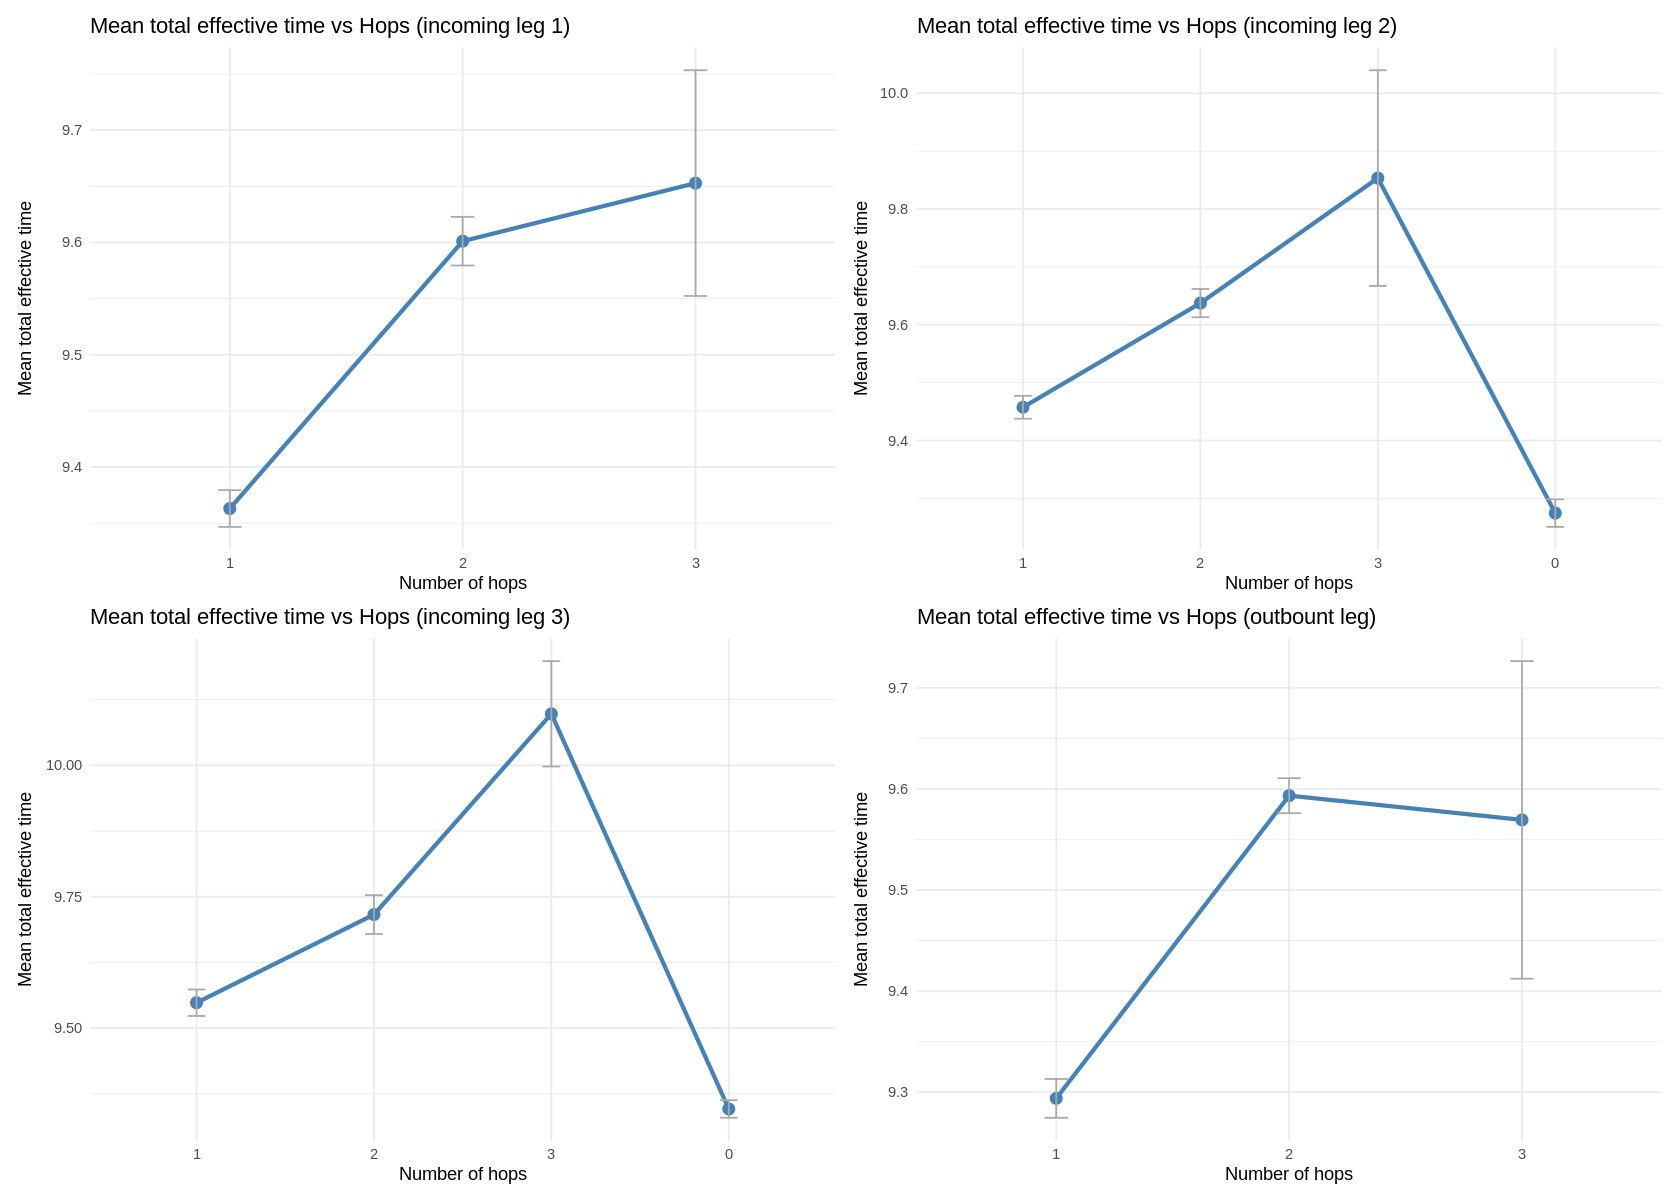

In [67]:
pi1 <- ggplot(train_data, aes(x = i1_hops, y = log_total_e)) +
  # Draw the line connecting the means
  stat_summary(fun = mean, geom = "line", color = "steelblue", size = 1.2, group = 1) +
  # Draw the points for the means
  stat_summary(fun = mean, geom = "point", color = "steelblue", size = 3) +
  # Confidence Intervals to see stability
  stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.1, color = "darkgrey") +
  labs(
    title = "Mean total effective time vs Hops (incoming leg 1)",
    x = "Number of hops",
    y = "Mean total effective time"
  ) +
  theme_minimal()

pi2 <- ggplot(train_data, aes(x = i2_hops, y = log_total_e)) +
  # Draw the line connecting the means
  stat_summary(fun = mean, geom = "line", color = "steelblue", size = 1.2, group = 1) +
  # Draw the points for the means
  stat_summary(fun = mean, geom = "point", color = "steelblue", size = 3) +
  # Confidence Intervals to see stability
  stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.1, color = "darkgrey") +
  labs(
    title = "Mean total effective time vs Hops (incoming leg 2)",
    x = "Number of hops",
    y = "Mean total effective time"
  ) +
  theme_minimal()

pi3 <- ggplot(train_data, aes(x = i3_hops, y = log_total_e)) +
  # Draw the line connecting the means
  stat_summary(fun = mean, geom = "line", color = "steelblue", size = 1.2, group = 1) +
  # Draw the points for the means
  stat_summary(fun = mean, geom = "point", color = "steelblue", size = 3) +
  # Confidence Intervals to see stability
  stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.1, color = "darkgrey") +
  labs(
    title = "Mean total effective time vs Hops (incoming leg 3)",
    x = "Number of hops",
    y = "Mean total effective time"
  ) +
  theme_minimal()

po <- ggplot(train_data, aes(x = o_hops, y = log_total_e)) +
  # Draw the line connecting the means
  stat_summary(fun = mean, geom = "line", color = "steelblue", size = 1.2, group = 1) +
  # Draw the points for the means
  stat_summary(fun = mean, geom = "point", color = "steelblue", size = 3) +
  # Confidence Intervals to see stability
  stat_summary(fun.data = mean_se, geom = "errorbar", width = 0.1, color = "darkgrey") +
  labs(
    title = "Mean total effective time vs Hops (outbount leg)",
    x = "Number of hops",
    y = "Mean total effective time"
  ) +
  theme_minimal()

pi1 + pi2 + pi3 + po

The relationship is clearly non-linear, so it's better to treat the number of hops as a categorical variable.

**@Francesco**: I changed that in the cleaning now - LR

## **3.1 Correlation**

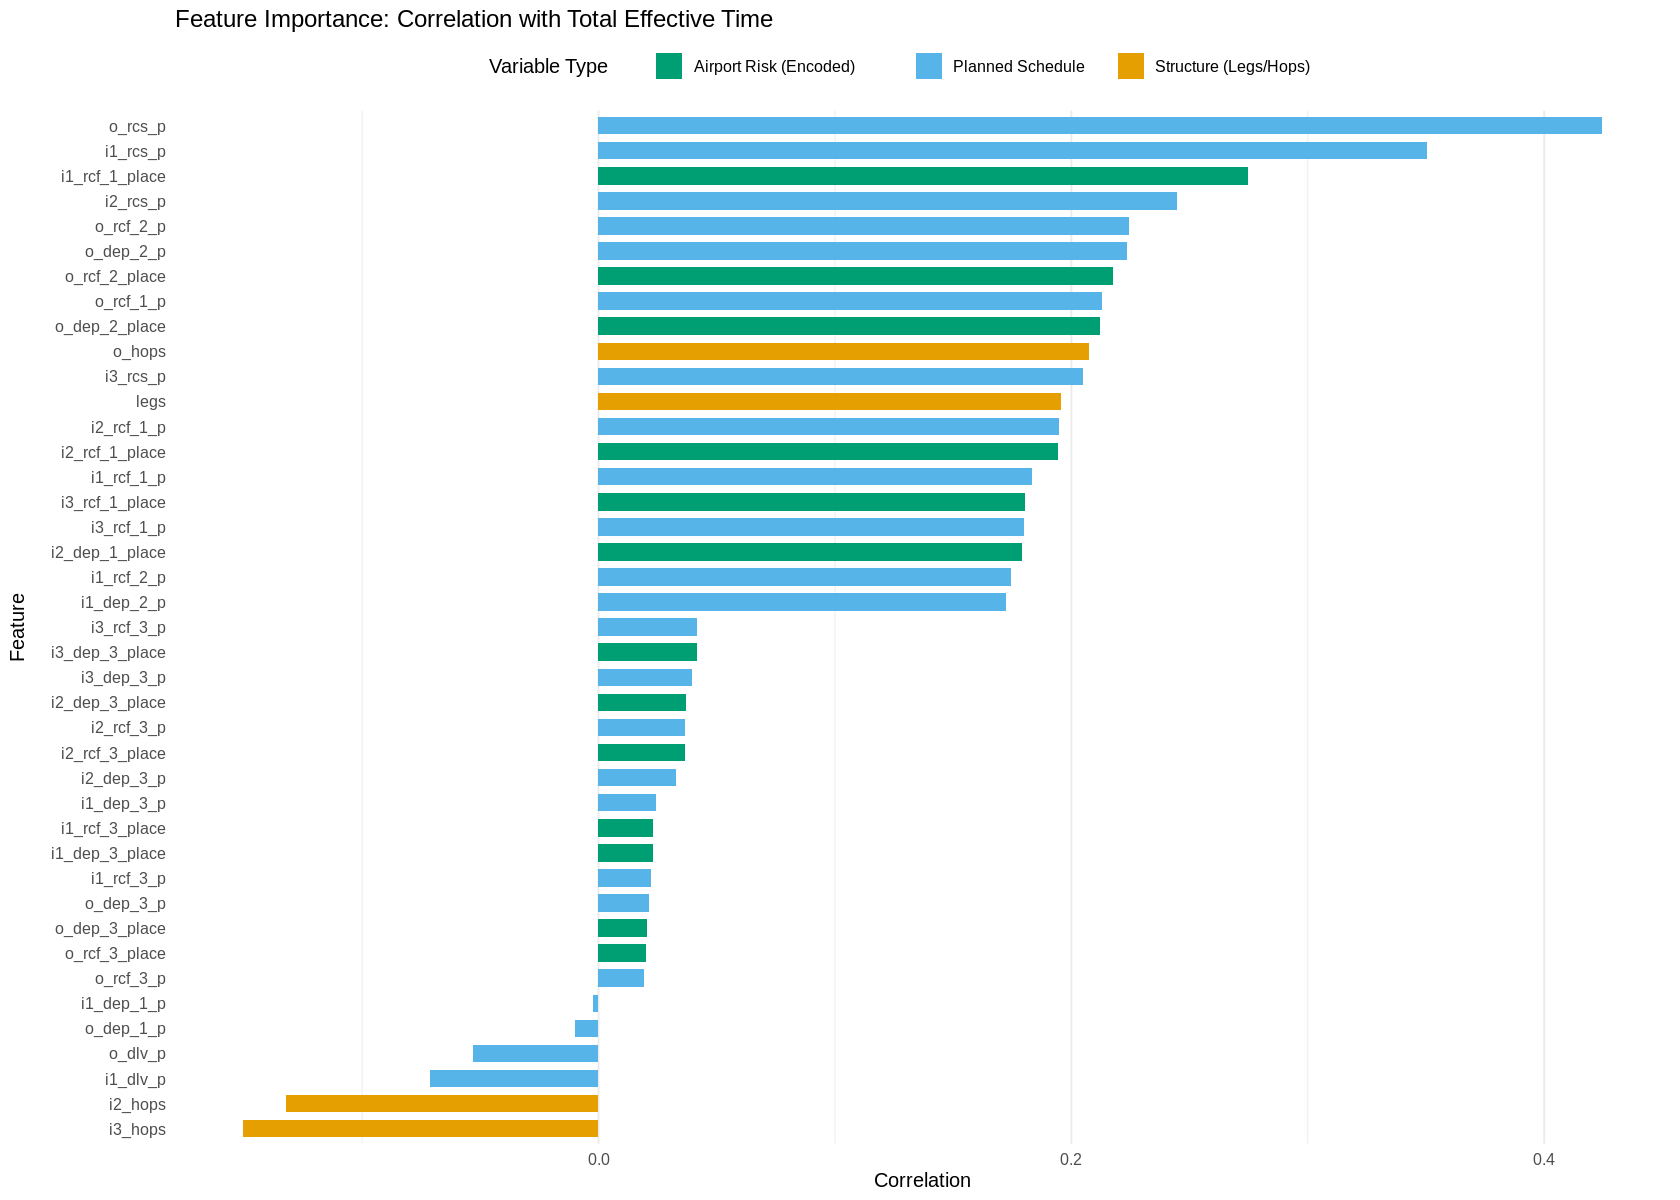

In [68]:
# Clean Data & Fix Numeric Conversion
df_numeric <- dataset %>%
  # Correct way to convert multiple columns to numeric
  mutate(across(c(legs, i1_hops, i2_hops, i3_hops, o_hops), as.numeric)) %>%
  select(where(is.numeric))

# Calculate Correlation
corr_matrix <- cor(df_numeric, use = "pairwise.complete.obs")

# Prepare Data for Plotting with Categories
target_corr <- as.data.frame(corr_matrix) %>%
  select(log_total_e) %>%
  rownames_to_column(var = "Feature") %>%
  filter(Feature != "log_total_e") %>%
  # Create a "Type" column for coloring
  mutate(Type = case_when(
    Feature == "legs" | str_detect(Feature, "hops") ~ "Structure (Legs/Hops)",
    str_detect(Feature, "_place") ~ "Airport Risk (Encoded)",
    str_detect(Feature, "_p") ~ "Planned Schedule",
    TRUE ~ "Other"
  )) %>%
  # Extract the Leg (i1, i2, i3, o) for sorting/grouping
  mutate(Leg = str_extract(Feature, "^[a-z0-9]+")) %>%
  arrange(desc(log_total_e)) %>%
  # Keep only top 20 positive and bottom 20 negative to reduce clutter (optional)
  slice(c(1:20, (n()-20):n()))

# Create the Upgraded Plot
ggplot(target_corr, aes(x = reorder(Feature, log_total_e), y = log_total_e, fill = Type)) +
  geom_col(width = 0.7) +
  coord_flip() +
  # Use distinct colors for types instead of a gradient
  scale_fill_manual(values = c("Structure (Legs/Hops)" = "#E69F00",
                               "Planned Schedule" = "#56B4E9",
                               "Airport Risk (Encoded)" = "#009E73")) +
  labs(
    title = "Feature Importance: Correlation with Total Effective Time",
    x = "Feature",
    y = "Correlation",
    fill = "Variable Type"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "top",
    panel.grid.major.y = element_blank() # Clean up horizontal grid lines
  )

We can see that the main proxies for the total effective time are the planned schedules of the first incoming leg and the outbound leg.\
Consistent with what we found before, the correlation fo the delivery step for both the outgoing leg and incoming leg are negative, suggesting that there is a planned "buffer" at the end of these stages.

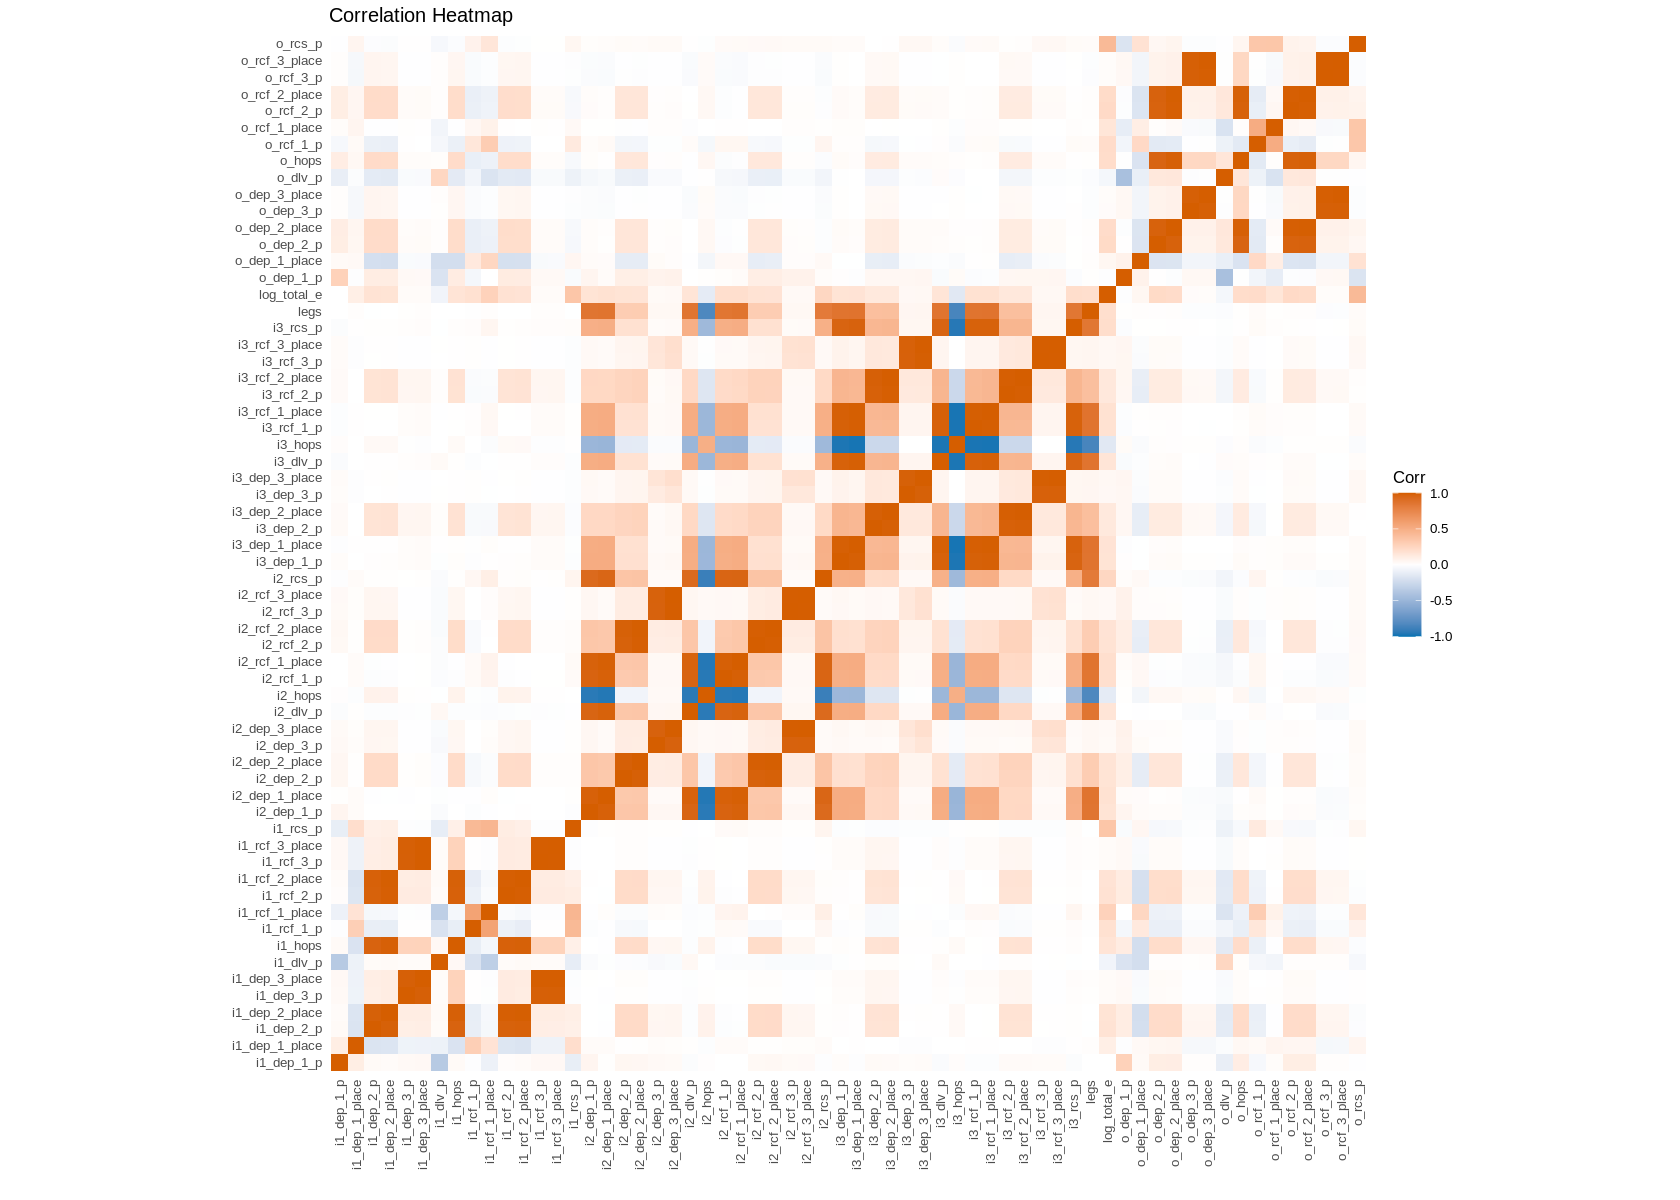

In [69]:
# Melt the correlation matrix for ggplot using tidyr::pivot_longer
melted_corr <- corr_matrix %>%
  as.data.frame() %>% # Convert matrix to data frame first
  rownames_to_column(var = "Var1") %>% # Convert row names to a column
  pivot_longer(cols = -Var1, names_to = "Var2", values_to = "value") # Pivot to long format

ggplot(data = melted_corr, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "#0072B2", high = "#D55E00", mid = "white",
                       midpoint = 0, limit = c(-1,1), name = "Corr") +
  theme_minimal(base_size = 10) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1), # Rotate labels
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.grid = element_blank()
  ) +
  labs(
    title = "Correlation Heatmap",
  ) +
  coord_fixed()

We can notice an interesting thing: the planned variables in which an airport is involved are highly correlated with the airport target encoded variables. Either the planners are really good in predicting airport performance, or there is something else going on.

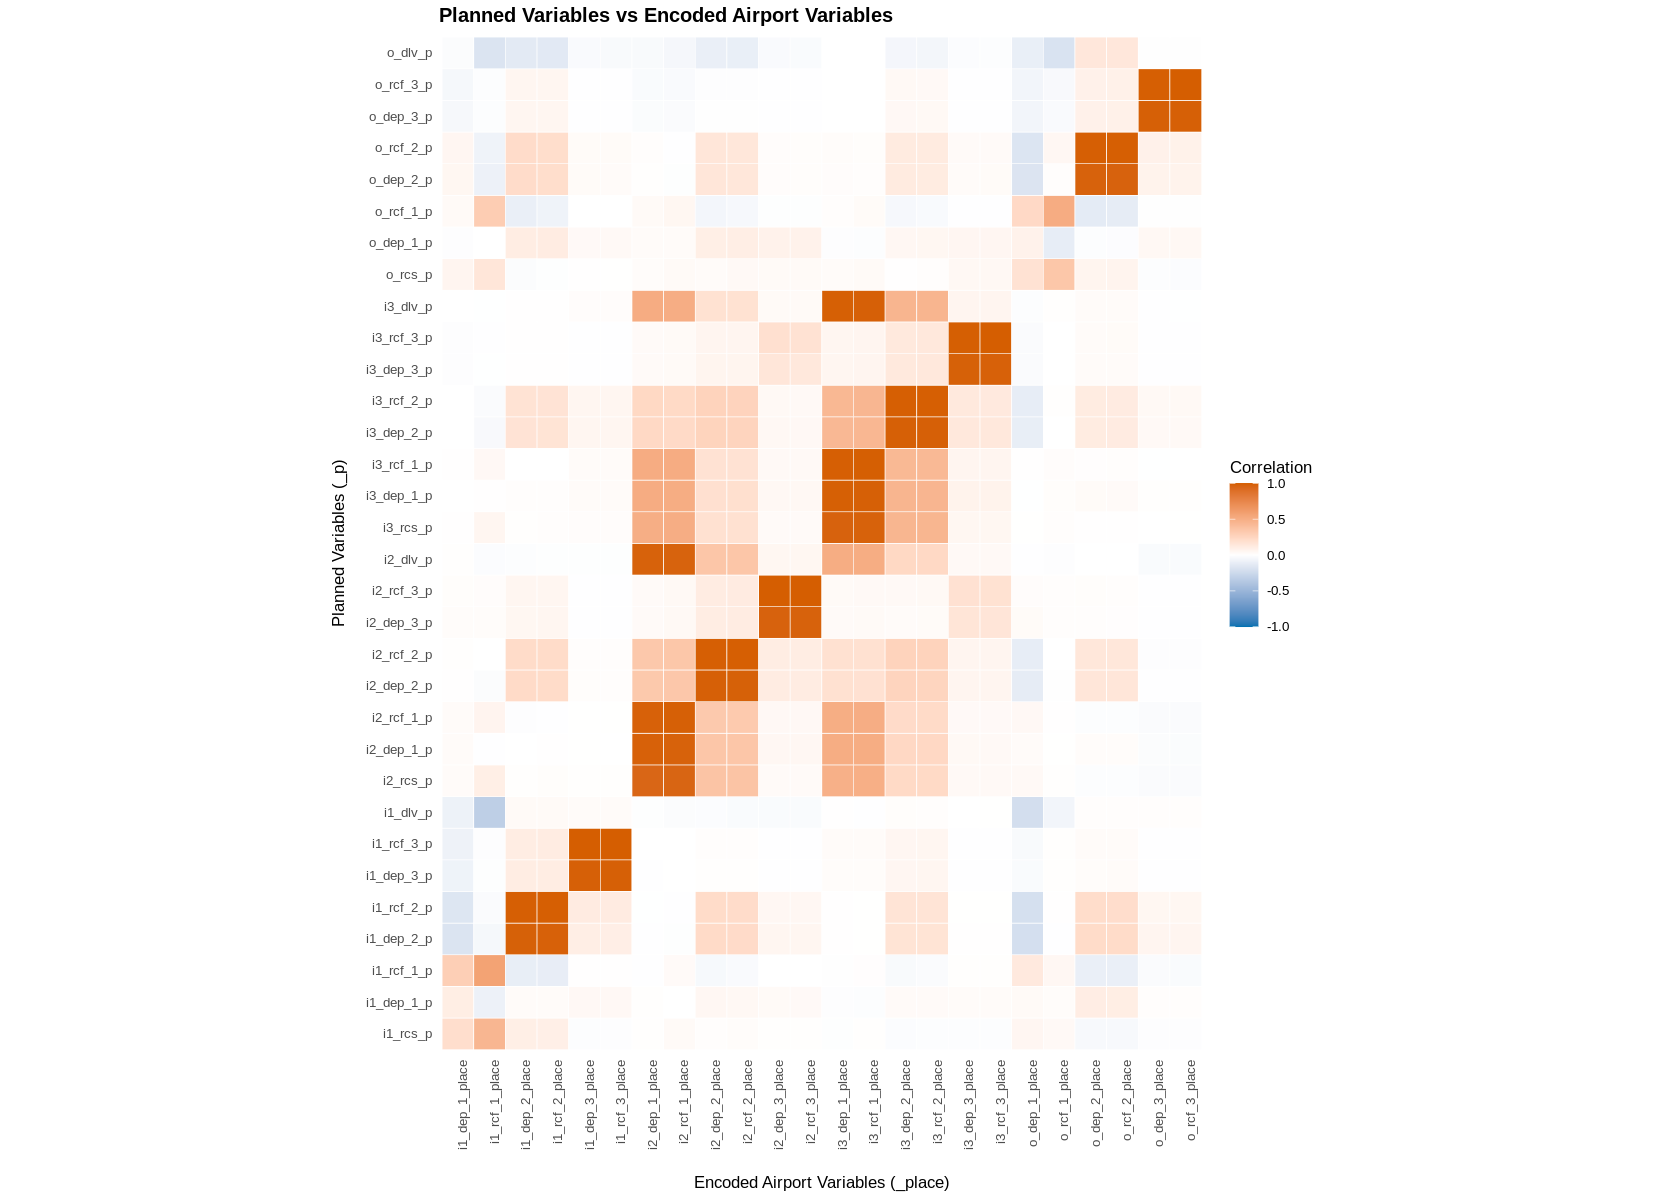

In [70]:
# We sort them alphabetically so matching legs (i1, i2...) align visually
planned_vars <- dataset %>% select(sort(ends_with("_p")))
encoded_vars <- dataset %>% select(sort(ends_with("_place")))

# 3. Calculate Correlation Matrix (Rectangular)
# cor(x, y) calculates correlation between every column in x and every column in y
corr_matrix <- cor(planned_vars, encoded_vars, use = "pairwise.complete.obs")

# 4. Melt the correlation matrix into a long format for ggplot2
melted_corr <- melt(corr_matrix)

# 5. Plot the Heatmap
ggplot(data = melted_corr, aes(x = Var2, y = Var1, fill = value)) +
  geom_tile(color = "white") +
  # Use a diverging color scale (Red-White-Blue)
  scale_fill_gradient2(
    low = "#0072B2",
    high = "#D55E00",
    mid = "white",
    midpoint = 0,
    limit = c(-1, 1),
    name = "Correlation"
  ) +
  labs(
    title = "Planned Variables vs Encoded Airport Variables",
    x = "Encoded Airport Variables (_place)",
    y = "Planned Variables (_p)"
  ) +
  theme_minimal(base_size = 10) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 1, hjust = 1, size = 8),
    axis.text.y = element_text(size = 8),
    plot.title = element_text(face = "bold"),
    panel.grid.major = element_blank()
  ) +
  coord_fixed()

This could be because instead of having NAs now we have 0s. So in legs and hops that have a lot of "missing values", most of the observations report a 0 for both _p and _place.
We have to take this into account.

In [71]:
# Select and Filter Variables
p_cols_all <- colnames(dataset)[str_detect(colnames(dataset), "_p$")]
place_cols <- sort(colnames(dataset)[str_detect(colnames(dataset), "_place$")])

# Apply the same filtering rules to the planned variables list:
# Only include planned variables that correspond to 'place' variables (dep or rcf)
p_cols <- p_cols_all[str_detect(p_cols_all, "dep_|rcf_")]
# Sort for visual alignment
p_cols <- sort(p_cols)


# Function to Calculate Correlation for a Single Matching Pair
calc_non_zero_matching_corr <- function(data, p_var, place_var) {

  # Filter for non-zero values in both columns
  temp_data <- data %>%
    filter(!!sym(p_var) > 0 & !!sym(place_var) > 0)

  # Calculate correlation if enough data points remain (> 1)
  if (nrow(temp_data) > 1) {
    corr_val <- cor(temp_data[[p_var]], temp_data[[place_var]])
  } else {
    corr_val <- NA_real_ # Return NA if not enough data points
  }

  # Extract Leg and Step for table formatting
  parts <- str_split(place_var, "_")[[1]]
  leg <- parts[1]
  # Reconstruct step by joining all parts between leg and 'place'
  # For example, for 'i1_dep_1_place', parts are ['i1', 'dep', '1', 'place']
  # We want 'dep_1'
  step <- paste(parts[2:(length(parts)-1)], collapse = "_")

  return(tibble(
    Leg = leg,
    Step = step,
    Planned_Var = p_var,
    Encoded_Var = place_var,
    Correlation = corr_val
  ))
}

# Iterate Through Matching Pairs to Build Table

# map2_dfr iterates through two lists (p_cols and place_cols) in parallel
corr_table_zero_excluded <- map2_dfr(p_cols, place_cols, ~ {
  # We assume p_cols and place_cols are sorted and aligned for matching pairs
  calc_non_zero_matching_corr(dataset, .x, .y)
}) %>%
  arrange(desc(Correlation))


# Display the Table

# The column 'Correlation' now represents the 'True' correlation for active legs.
corr_table_zero_excluded

Leg Step  Planned_Var Encoded_Var    Correlation
1  i3  rcf_1 i3_rcf_1_p  i3_rcf_1_place 0.58626563 
2  i2  rcf_1 i2_rcf_1_p  i2_rcf_1_place 0.57753447 
3  i1  rcf_1 i1_rcf_1_p  i1_rcf_1_place 0.57168484 
4  o   rcf_2 o_rcf_2_p   o_rcf_2_place  0.56056915 
5  o   rcf_1 o_rcf_1_p   o_rcf_1_place  0.51123112 
6  i1  rcf_2 i1_rcf_2_p  i1_rcf_2_place 0.49407666 
7  o   rcf_3 o_rcf_3_p   o_rcf_3_place  0.47344751 
8  i2  rcf_2 i2_rcf_2_p  i2_rcf_2_place 0.46633665 
9  i3  rcf_2 i3_rcf_2_p  i3_rcf_2_place 0.39251616 
10 i2  rcf_3 i2_rcf_3_p  i2_rcf_3_place 0.38180557 
11 i1  dep_2 i1_dep_2_p  i1_dep_2_place 0.21730405 
12 i2  dep_3 i2_dep_3_p  i2_dep_3_place 0.20645548 
13 i3  dep_2 i3_dep_2_p  i3_dep_2_place 0.20207257 
14 i2  dep_2 i2_dep_2_p  i2_dep_2_place 0.16686836 
15 i3  dep_3 i3_dep_3_p  i3_dep_3_place 0.15936655 
16 i1  rcf_3 i1_rcf_3_p  i1_rcf_3_place 0.15658101 
17 o   dep_2 o_dep_2_p   o_dep_2_place  0.13232296 
18 i2  dep_1 i2_dep_1_p  i2_dep_1_place 0.10602426 
19 i1  dep_1 i1_dep_1_p  i1_dep_1_place 0.10594807 
20 i3  dep_1 i3_dep_1_p  i3_dep_1_place 0.08595496 
21 o   dep_1 o_dep_1_p   o_dep_1_place  0.07871120 
22 i3  rcf_3 i3_rcf_3_p  i3_rcf_3_place 0.07144833 
23 i1  dep_3 i1_dep_3_p  i1_dep_3_place 0.06944867 
24 o   dep_3 o_dep_3_p   o_dep_3_place  0.04576005

As we can see, some planned times are fairly good at predicting the usual effective time for the airport, while some aren't. How do we take this into consideration when building the models? Especially the "dropping the 0s part"?

**Correlation of predicive variable with numerical features**

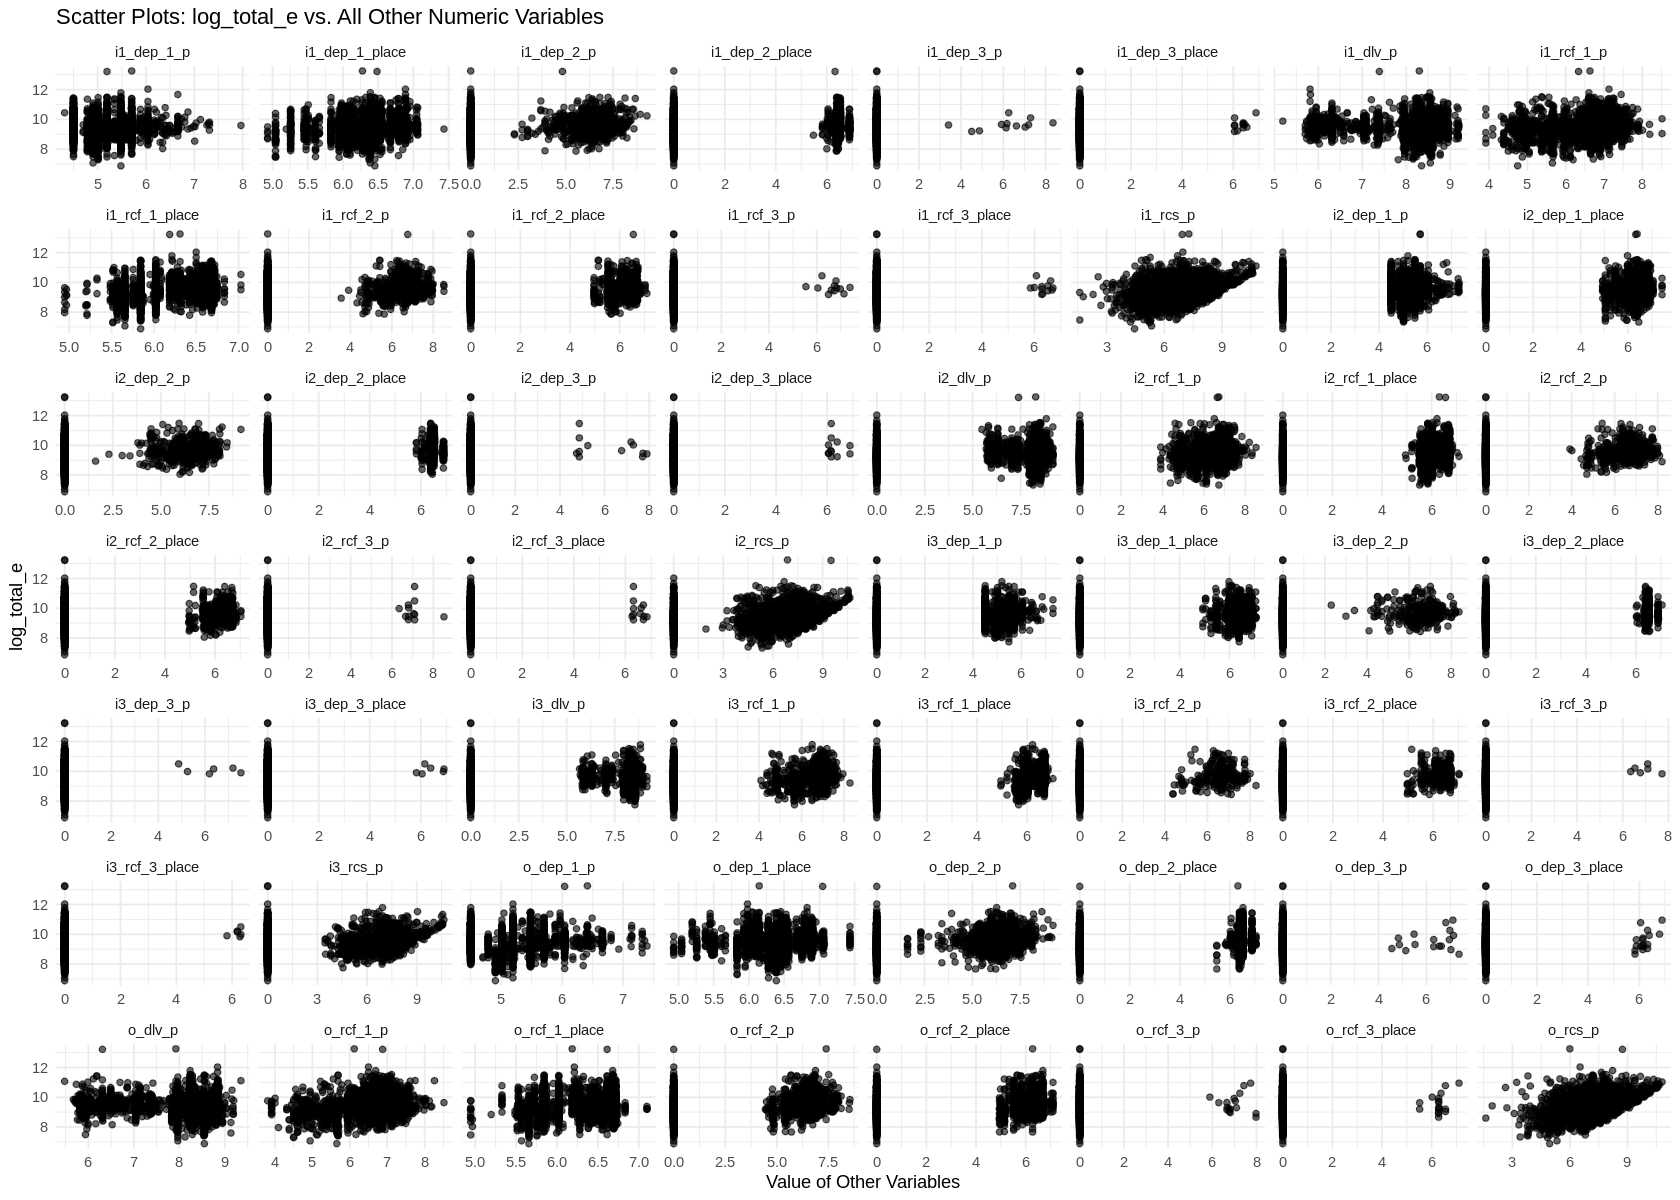

In [72]:
# Select numeric variables
numeric_vars <- train_data %>% select(where(is.numeric))

# Pivot longer, but exclude log_total_e from the "other variables"
scatter_long <- numeric_vars %>%
  pivot_longer(
    cols = -log_total_e,
    names_to = "variable",
    values_to = "value"
  )

# Plot scatter plots
ggplot(scatter_long, aes(x = value, y = log_total_e)) +
  geom_point(alpha = 0.6) +
  facet_wrap(~ variable, scales = "free_x") +
  theme_minimal() +
  labs(
    title = "Scatter Plots: log_total_e vs. All Other Numeric Variables",
    x = "Value of Other Variables",
    y = "log_total_e"
  )

# **4. Predictive task**

## **4.0 Preparing the train and test data split!**

In [73]:
train_data <- train_data %>% select(-nr)
test_data <-  test_data %>% select(-nr)

In [74]:
# str(train_data)

## **4.1 Linear Regression**

**@TEAM**: the variable legs has a multicolinearity issue: it is because iX_hops perfectly determine it! So we basically need to remove it!

Logic is: I know that when i3_hops has a value, that legs will be 3 etc.!

**Issues**:
- some variables do not appear more than twice in the train (and then the test dataset). In specific, this then leads to some variables not being able to be estimated when including higher polynomials.



### 4.1.1 A Classical Linear Regression

In [75]:
y <- train_data$log_total_e
x <- train_data%>% select(-log_total_e, -legs)
y_test <- test_data$log_total_e
x_test <- test_data%>% select(-log_total_e, -legs)

In [76]:
reg <- lm(y ~ ., data=x)
reg


Call:
lm(formula = y ~ ., data = x)

Coefficients:
   (Intercept)        i1_hops2        i1_hops3        i2_hops2        i2_hops3  
      4.889558        1.606443        8.772067        1.470842       10.678709  
      i2_hops0        i3_hops2        i3_hops3        i3_hops0         o_hops2  
      1.122832        0.704509        8.872661       -0.746084       -0.769923  
       o_hops3        i1_rcs_p      i1_dep_1_p      i1_rcf_1_p      i1_dep_2_p  
     -8.423178        0.141527       -0.018056        0.018207        0.063788  
    i1_rcf_2_p      i1_dep_3_p      i1_rcf_3_p        i1_dlv_p        i2_rcs_p  
      0.057449        0.219862       -0.161164       -0.006599        0.108326  
    i2_dep_1_p      i2_rcf_1_p      i2_dep_2_p      i2_rcf_2_p      i2_dep_3_p  
      0.065638        0.024060        0.024783        0.036500        0.047301  
    i2_rcf_3_p        i2_dlv_p        i3_rcs_p      i3_dep_1_p      i3_rcf_1_p  
      0.208880        0.031148        0.101785       -0.0

In [77]:
y_hat <-  predict(reg, newdata = x_test)

# put the results together
results <- data.frame(
  Actual = y_test,
  Predicted = y_hat
)

In [78]:
mse <- mean((results$Actual - results$Predicted)^2)
print("MSE:")
mse

avg_pred <- mean(results$Predicted)
avg_act <- mean(results$Actual)
print("Average Predicted Value:")
avg_pred
print("Average Actual Value:")
avg_act

[1] "MSE:"


[1] 0.2938959

[1] "Average Predicted Value:"


[1] 9.443789

[1] "Average Actual Value:"


[1] 9.43038

### 4.1.2 A linear regression with squared terms inlcluded
 Let's include the squared terms!

 - we need to do it strategically, since some variables only have 2 observations in the training (and none) in the test data-set. Ergo: We cannot inlcude their squares as we want to estimate its effect based on two observations!

In [80]:
# Preparing the training data
numeric_vars <- x %>% select(where(is.numeric))
train_data_reg <- x %>% select(-where(is.numeric))  # removes all numeric except log_total_e
squared_vars <- numeric_vars %>% mutate(across(everything(), ~ .x^2, .names = "{.col}_sq")) # Create squared versions
train_data_reg <- bind_cols(train_data_reg, squared_vars) # Combine squared variables back to original dataset

write.csv(train_data_reg, "train_data_reg.csv", row.names = FALSE)

In [81]:
# Running regression
reg <- lm(y ~ ., data=train_data_reg)
reg


Call:
lm(formula = y ~ ., data = train_data_reg)

Coefficients:
      (Intercept)           i1_hops2           i1_hops3           i2_hops2  
        2.528e+01         -1.306e+01         -1.388e+02         -1.231e+01  
         i2_hops3           i2_hops0           i3_hops2           i3_hops3  
        1.295e+03         -3.610e+00          1.746e+01          6.579e+01  
         i3_hops0            o_hops2            o_hops3           i1_rcs_p  
       -6.893e+00         -1.406e+01         -1.509e+02         -3.374e-01  
       i1_dep_1_p         i1_rcf_1_p         i1_dep_2_p         i1_rcf_2_p  
        4.112e-01         -3.953e-02         -4.155e-02          4.983e-01  
       i1_dep_3_p         i1_rcf_3_p           i1_dlv_p           i2_rcs_p  
        1.385e+00          1.011e+01         -5.687e-01         -5.143e-01  
       i2_dep_1_p         i2_rcf_1_p         i2_dep_2_p         i2_rcf_2_p  
        4.738e-01         -4.810e-02         -3.191e-01         -4.850e-01  
       i2_d

In [82]:
# Prepare test data
numeric_vars <- x_test %>% select(where(is.numeric))
test_data_reg <- x_test %>% select(-where(is.numeric))  # removes all numeric
squared_vars <- numeric_vars %>% mutate(across(everything(), ~ .x^2, .names = "{.col}_sq")) # Create squared version
test_data_reg <- bind_cols(test_data_reg, squared_vars) # Combine squared variables back to original dataset

In [83]:
# str(test_data_reg)
write.csv(test_data_reg, "test_data_reg.csv", row.names = FALSE)

In [84]:
# Predicting - something is off here
y_hat <-  predict(reg, newdata = test_data_reg)
# put the results together
results <- data.frame(
  Actual = y_test,
  Predicted = y_hat
)
mse <- mean((results$Actual - results$Predicted)^2)
print("MSE:")
mse

avg_pred <- mean(results$Predicted)
avg_act <- mean(results$Actual)
print("Average Predicted Value:")
avg_pred
print("Average Actual Value:")
avg_act

# Yeeyy, we can minimise the MSE a bit!

Warning message in predict.lm(reg, newdata = test_data_reg):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


[1] "MSE:"


[1] 16.97415

[1] "Average Predicted Value:"


[1] 9.538652

[1] "Average Actual Value:"


[1] 9.43038

## **4.2 Penalised Regressions**
Thibault

### Ridge

### Lasso

### Elastic net

## 4.3 Non-parametric Models

###KNN
Katherine

### Random Forest
Katherine

### Boosting

# Code Archive

In [ ]:
make code break here

In [ ]:
"# now, let's obtain the mean!
airport_summary_stats_rcf <- df_appended_rcf_manual %>%

  group_by(Airport_ID) %>%
  summarize(
    Observation_Count = n(), # Counts how many observations went into the average
    Average_Effective_Time = mean(Effective_Time, na.rm = TRUE),
    Median_Effective_Time = median(Effective_Time, na.rm = TRUE),
    .groups = 'drop'
  )

head(airport_summary_stats_rcf) # View the resulting summary table"

In [ ]:
# it is a bit annoying with creating loops in google colab since you cannot easily export graphics from this notebook to the google drive :((

options(repr.plot.width=30,repr.plot.height=10) # adjusting the plot size so that is better to see in google colab


na_summary <- subset_i1 %>%
  summarise(across(everything(),
                   ~sum(is.na(.))/n() * 100,
                   .names = "NA_{.col}")) %>%
  pivot_longer(everything(),
               names_to = "Variable",
               values_to = "Percent_NA") %>%
  mutate(Variable = gsub("^NA_", "", Variable),
         Percent_Not_NA = 100 - Percent_NA) %>%
  pivot_longer(cols = c(Percent_NA, Percent_Not_NA),
               names_to = "Type",
               values_to = "Percent")

na_summary$Type <- recode(na_summary$Type,
                          Percent_NA = "Missing (NA)", #label cleaning for display
                          Percent_Not_NA = "Not Missing") # label cleaning for display

# actually plotting yeyyy;)
ggplot(na_summary, aes(x = reorder(Variable, -Percent), y = Percent, fill = Type)) +
  geom_col(position = "stack") +
  geom_text(aes(label = sprintf("%.4f%%", Percent)), #specifying how many decimals
            position = position_stack(vjust = 0.5),
            color = "black", size = 3.5, fontface = "bold") +
  labs(
    title = "Percentage of Missing vs Non-Missing Values by Column",
    x = "Variable",
    y = "Percentage (%)"
  ) +
  # scale_fill_manual(values = c("Missing (NA)" = "firebrick", "Not Missing" = "steelblue")) + #discuss colours we want!
  theme_minimal(base_size = 13) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

 hops_summary <- subset_i1 %>%
    count(i1_hops) %>%
    mutate(Percent = n / sum(n) * 100)

    print(hops_summary)


In [ ]:
# Histograms for the variables
# Convert to long format
long_data <- subset_data %>%
  pivot_longer(
    cols = everything(),
    names_to = "Variable",
    values_to = "Value"
  )

ggplot(long_data, aes(x = Value)) +
  geom_histogram(fill = "steelblue", color = "black", bins = 30) +
  facet_wrap(~Variable, scales = "free") +
  theme_minimal()

In [ ]:
# identifying outliers based on IQR rules!

numeric_df <- subset_final %>% select(where(is.numeric))

# Empty list to store results
results <- list()

# Loop through each numeric variable
for (var in names(numeric_df)) {

  x <- numeric_df[[var]]

  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_value <- IQR(x, na.rm = TRUE)

  lower <- Q1 - 1.5 * IQR_value
  upper <- Q3 + 1.5 * IQR_value

  idx <- which(x < lower | x > upper)

  # Only add if there are outliers
  if (length(idx) > 0) {
    df_temp <- tibble(
      variable = var,
      row = idx,
      value = x[idx]
    )
    results[[length(results) + 1]] <- df_temp
  }
}

# Bind all results into one dataframe
outliers_df <- bind_rows(results)

outliers_df

**2. Outliers and Points with High Leverage**
Definition outlier:  "An outlier is a point for which $y_i$ is far from the value predicted by the model. Outliers can arise for a variety of reasons, such as incorrect recording of an observation during data collection " (James, Hastie,  Witten, Tibshirani, 2023).

We can identify plotting X against Y *or* by plotting the fitted values against the residuals. We can also identify using boxplots or histograms.

Definition *high leverage*: "Points with *high leverage* are observations with an unusual value for $x_i$"(James, Hastie,  Witten, Tibshirani, 2023). They have a sizable, and often larger impact on the fit than outliers.

In [ ]:
# select columns containing "rcs" or "dvl" - "final" columns
cols_final <- names(clean_data) %>%
  grep("(rcs|dlv)_(p|e)$", ., value = TRUE) %>% # keep only rcs or dlv columns
  setdiff(grep("_place", ., value = TRUE)) # exclude columns containing "_place"

# Subset the dataset
subset_final <- clean_data %>% select(all_of(cols_final),nr)

head(subset_final)

In [ ]:
# select columns containing "rcf or "dep" - intermediate steps
cols_inter <- names(clean_data) %>%
  grep("(dep|rcf)_\\d+_(p|e)$", ., value = TRUE) %>% # keep only dep or rcf columns
  setdiff(grep("_place", ., value = TRUE)) # exclude columns containing "_place"

# Subset the dataset
subset_inter <- clean_data %>% select(all_of(cols_inter), nr)

head(subset_inter)

In [ ]:
plot_pe_pairs <- function(subset_data) {

  options(repr.plot.width = 10, repr.plot.height = 8)
  # Identify _p and matching _e columns inside the subset
  p_cols <- grep("_p$", names(subset_data), value = TRUE)
  e_cols <- gsub("_p$", "_e", p_cols)

  # Loop over pairs
  for(i in seq_along(p_cols)) {

    df_pair <- subset_data %>%
      select(all_of(c(p_cols[i], e_cols[i]))) %>%
      rename(
        p = all_of(p_cols[i]),
        e = all_of(e_cols[i])
      )

    g <- ggplot(df_pair, aes(x = p, y = e)) +
      geom_point(color = "steelblue") +
      geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
      labs(
        title = paste0("Scatter plot: ", p_cols[i], " vs ", e_cols[i]),
        x = p_cols[i],
        y = e_cols[i]
      ) +
      theme_minimal()

    print(g)
  }
}

1. Starting with RCS and DVL

In [ ]:
plot_pe_pairs(subset_final)

Let's try and see if we can find a pattern in the outliers

Answer: not really

In [ ]:
# specific outlier analysis based on looking at the scatter plots!

outliers_final <- subset_final %>% filter(i2_dlv_e > 40000 | i3_dlv_e > 40000 | o_dlv_e > 40000)

head(outliers_final, n=20)

In [ ]:
# heatmap to see if there are any correlations between the outliers

numeric_df <- outliers_final %>%
  select(where(is.numeric))

# Compute correlation matrix
cor_matrix <- cor(numeric_df, use = "pairwise.complete.obs")

cor_long <- cor_matrix %>%
  as.data.frame() %>%
  tibble::rownames_to_column("Var1") %>%
  pivot_longer(-Var1, names_to = "Var2", values_to = "Correlation")

ggplot(cor_long, aes(x = Var1, y = Var2, fill = Correlation)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red",
                       midpoint = 0, limit = c(-1, 1)) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Correlation Heatmap",
       x = "",
       y = "")

2. Continuing with DEP and RCF

In [ ]:
plot_pe_pairs(subset_inter)

Transformation: Applying the ln

In [ ]:
log_modulus <- function(x) {sign(x) * log(abs(x) + 0.1)}

In [ ]:
# Vector of leg prefixes to match
leg_prefixes <- c("i1", "i2", "i3", "o")

# Select columns matching any of the leg prefixes
cols_to_transform <- grep(paste0("^((", paste(leg_prefixes, collapse = "|"), "))_.*delay$"), names(delay_data), value = TRUE)

# Create copies for transformations
log_delay_data <- delay_data
sqrt_delay_data <- delay_data

# Apply log_modulus transform
log_delay_data[cols_to_transform] <- lapply(delay_data[cols_to_transform], function(col) log_modulus(col))

# Apply ssqrt transform
sqrt_delay_data[cols_to_transform] <- lapply(delay_data[cols_to_transform], function(col) ssqrt(col))

In [ ]:
# Group prefixes for delays
group_prefixes <- c("i1_", "i2_", "i3_", "o_")

# Loop through each group, create long format, and plot
for (prefix in group_prefixes) {
  # Select only delay columns for the current group
  group_cols <- grep(paste0("^", prefix, ".*_delay$"), names(log_delay_data), value = TRUE)

  # Pivot longer for this group
  group_long <- log_delay_data %>%
    select(all_of(group_cols)) %>%
    pivot_longer(everything(), names_to = "segment", values_to = "delay")

  # Plot histograms for all delay columns in this group
  print(
    ggplot(group_long, aes(x = delay)) +
      geom_histogram(bins = 30, fill = "blue", color = "black", alpha = 0.65) +
      facet_wrap(~segment, scales = "free") +
      theme_minimal() +
      labs(title = paste0("Delay Distributions: ", prefix, " group"),
           x = "Delay (log_minutes)", y = "Count")
  )
}

**2.2 Transformation of the data**

Startpoint A:
- target: total effective time (maximum of the leg + o)
- hops per leg
- number of legs
- airport ID: effective time at the airport/ delay at airport AT THAT SPECIFIC STEP (target encoder); no matter in whic leg it occurs; no matter the hop
- completely drop the planned time;

Startpoint B:
- target: total delay / total effective time
- delay at leg 1, 2, 3
- hops (only outgoing)
- average delay for the outgoing process
- dummy which leg had the largest delay


**2.3 Outliers and Points with High Leverage**

Definition outlier: "An outlier is a point for which  yi  is far from the value predicted by the model. Outliers can arise for a variety of reasons, such as incorrect recording of an observation during data collection " (James, Hastie, Witten, Tibshirani, 2023).

We can identify plotting X against Y or by plotting the fitted values against the residuals. We can also identify using boxplots or histograms.

Definition high leverage: "Points with high leverage are observations with an unusual value for  xi "(James, Hastie, Witten, Tibshirani, 2023). They have a sizable, and often larger impact on the fit than outliers

In [ ]:
# Summary stats

summary_stats <- delay_data %>%
  summarise(across(matches("_delay$"), # Apply to columns ending with '_delay'
                   list(mean = ~mean(., na.rm=TRUE),
                        median = ~median(., na.rm=TRUE),
                        sd = ~sd(., na.rm=TRUE)))) %>%
  pivot_longer(cols = everything(),
               names_to = c("segment", ".value"),
               names_pattern = "(.*)_(.*)$")

summary_stats

In [ ]:
# Group prefixes for delays
group_prefixes <- c("i1_", "i2_", "i3_", "o_")

# Loop through each group, create long format, and plot
for (prefix in group_prefixes) {
  # Select only delay columns for the current group
  group_cols <- grep(paste0("^", prefix, ".*_delay$"), names(delay_data), value = TRUE)

  # Pivot longer for this group
  group_long <- delay_data %>%
    select(all_of(group_cols)) %>%
    pivot_longer(everything(), names_to = "segment", values_to = "delay")

  # Plot histograms for all delay columns in this group
  print(
    ggplot(group_long, aes(x = delay)) +
      geom_histogram(bins = 30, fill = "blue", color = "black", alpha = 0.65) +
      facet_wrap(~segment, scales = "free") +
      theme_minimal() +
      labs(title = paste0("Delay Distributions: ", prefix, " group"),
           x = "Delay (minutes)", y = "Count")
  )
}

Some of the data is really skewed. To handle this, we could drop the outliers or use a transformation. \
IMO transforming the data is better option because my guess is that extreme outliers in this setting are not errors but real delays, which carry important information. \
Since we have negative values, we can't directly apply a log transformation or a sqrt, but we need to use a transformation which preserves negative values. Two options:
$$
l(x)=sign(x)*log(|x|+0.1)
$$
(the $0.1$ is added to values equal to 0, if any)
Or
$$
l(x)=sign(x)*sqrt(|x|)
$$


**LR**:
1. should we maybe apply the transformation directly to planned and effective time? Then we can avoid this, but I am open to whatever!
2. I think handling outliers should come before we apply any transformation by the way, i.e. before we create the difference variable IMO, but this is just a minor comment and structure, not the actual handling

In [ ]:
# creating our square root-function
ssqrt <- function(x) {sign(x) * sqrt(abs(x))}

In [ ]:
# Vector of leg prefixes to match
leg_prefixes <- c("i1", "i2", "i3", "o")

# Select columns matching any of the leg prefixes
cols_to_transform <- grep(paste0("^((", paste(leg_prefixes, collapse = "|"), "))_.*delay$"), names(delay_data), value = TRUE)

# Create copies for transformations
sqrt_delay_data <- delay_data

# Apply ssqrt transform
sqrt_delay_data[cols_to_transform] <- lapply(delay_data[cols_to_transform], function(col) ssqrt(col))

In [ ]:
head(sqrt_delay_data)

In [ ]:
# Group prefixes for delays
group_prefixes <- c("i1_", "i2_", "i3_", "o_")

# Loop through each group, create long format, and plot
for (prefix in group_prefixes) {
  # Select only delay columns for the current group
  group_cols <- grep(paste0("^", prefix, ".*_delay$"), names(sqrt_delay_data), value = TRUE)

  # Pivot longer for this group
  group_long <- sqrt_delay_data %>%
    select(all_of(group_cols)) %>%
    pivot_longer(everything(), names_to = "segment", values_to = "delay")

  # Plot histograms for all delay columns in this group
  print(
    ggplot(group_long, aes(x = delay)) +
      geom_histogram(bins = 30, fill = "blue", color = "black", alpha = 0.65) +
      facet_wrap(~segment, scales = "free") +
      theme_minimal() +
      labs(title = paste0("Delay Distributions: ", prefix, " group"),
           x = "Delay (sqrt_minutes)", y = "Count")
  )
}

2.1 Creating Variable of Interest: Delay of shipments

We aim to predict the delay of certain shipments. Our data set only gives us information about **planned** and **effective** duration. In order to predict the **delay**, we need to create this variable.

In [ ]:
# Get vectors of planned and effective column names (matched)
planned_cols <- grep('_p$', names(clean_data), value = TRUE)
effective_cols <- grep('_e$', names(clean_data), value = TRUE)

for (i in seq_along(planned_cols)) {
  p_col <- planned_cols[i]
  e_col <- effective_cols[i]
  delay_col <- sub('_p$', '_delay', p_col)

  # Create delay column
  clean_data[[delay_col]] <- clean_data[[e_col]] - clean_data[[p_col]]

  # Get current column order
  cols <- names(clean_data)

  # Find position of effective column
  e_pos <- which(cols == e_col)

  # Remove delay column from current position
  cols <- cols[cols != delay_col]

  # Insert delay column after effective column
  cols <- append(cols, delay_col, after = e_pos)

  # Reorder dataframe columns to this new order
  clean_data <- clean_data[, cols]
}

In [ ]:
head(clean_data) # looks correct! :)) # YEYYYY

In [ ]:
# Drop all the planned and effective columns
delay_data <- clean_data %>% select(-matches("_e$"), -matches("_p$"))

In [ ]:
head(delay_data)

In [ ]:
#Replacing NAs by 0 for all the columns ending with "delay"
delay_data_test <- delay_data %>%
  mutate(across(
    .cols = c(where(is.numeric), contains("place")), # numeric columns and those that contain a "place"
    .fns  = ~ replace(.x, is.na(.x), 0)
  ))

#Creating total_delay for each leg
delay_data_test <- delay_data_test %>%
  mutate(
    i1_total_delay = i1_rcs_delay + i1_dep_1_delay + i1_rcf_1_delay +
                     i1_dep_2_delay + i1_rcf_2_delay + i1_dep_3_delay +
                     i1_rcf_3_delay + i1_dlv_delay,

    i2_total_delay = i2_rcs_delay + i2_dep_1_delay + i2_rcf_1_delay +
                     i2_dep_2_delay + i2_rcf_2_delay + i2_dep_3_delay +
                     i2_rcf_3_delay + i2_dlv_delay,

    i3_total_delay = i3_rcs_delay + i3_dep_1_delay + i3_rcf_1_delay +
                     i3_dep_2_delay + i3_rcf_2_delay + i3_dep_3_delay +
                     i3_rcf_3_delay + i3_dlv_delay,

    o_total_delay  = o_rcs_delay + o_dep_1_delay + o_rcf_1_delay +
                     o_dep_2_delay + o_rcf_2_delay + o_dep_3_delay +
                     o_rcf_3_delay + o_dlv_delay
  )%>%
  #Reordering the new total delay variables for clarity.
  relocate(i1_total_delay, .after = i1_dlv_delay) %>%
  relocate(i2_total_delay, .after = i2_dlv_delay) %>%
  relocate(i3_total_delay, .after = i3_dlv_delay) %>%
  relocate(o_total_delay,  .after = o_dlv_delay)%>%

  #Now creating the final variable total_delay (sum of all legs)
  mutate(total_delay = i1_total_delay + i2_total_delay + i3_total_delay + o_total_delay)

delay_data_test %>%
  select(contains("total_delay"))%>%
  head()

I created the variables *_total_delay* in the dataset "delay_data_test" rather than in the original delay_data because their construction requires replacing all NA values with 0. However, the original dataset "delay_data" contains NAs that may need to be preserved for the correlations analyses below. To avoid overwriting these missing values, I temporarily duplicated the data into "delay_data_test", applied the NA → 0 transformation only there, and computed the total delay variables in this safe copy. This test dataset will be used for the prediction models (Ridge, LASSO, Elastic Net) while we decide as a group when to process missing values in the final workflow.

--------------------------------------------

replace the NA's with 0!

**2.4 Analysing the correlation between the variables**

2.4.1 Numerical variables

In [ ]:
# Calculate correlations
delay_cols <- grep("_delay$", names(sqrt_delay_data), value = TRUE)
delay_corr_data <- sqrt_delay_data[delay_cols]
corr_matrix <- cor(delay_corr_data, use = "pairwise.complete.obs")

# Convert the correlation matrix to long format for ggplot
corr_df <- as.data.frame(corr_matrix)
corr_df$Var1 <- rownames(corr_df)
corr_long <- corr_df %>%
  pivot_longer(-Var1, names_to = "Var2", values_to = "correlation")

# Plot the heatmap
ggplot(corr_long, aes(x = Var1, y = Var2, fill = correlation)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Delay Column Correlation Heatmap", x = "", y = "")

**TO-DO**

1. grey means too little observations
2. negative correlation: if there is one delay, the following step will try to recover this
3. positive correlation: positive correlation across different legs
4. syncronisation of legs?

2.4.2 By airports

**3. Prediction**


Preparing data for prediction
In order to run prediction algorithms, we need to tackle missing data. As ellaborated in *section 2.1 Analysing the NA's*, we will replace all missing values with a 0.

In [ ]:
sqrt_delay_data <- sqrt_delay_data %>%
  mutate(across(
    .cols = c(where(is.numeric), contains("place")), # numeric columns and those that contain a "place"
    .fns  = ~ replace(.x, is.na(.x), 0)
  ))

In [ ]:
sqrt_delay_data

In [ ]:
# Team: please use the following data set:
summary(sqrt_delay_data)

I temporarily apply the square-root transformation to "delay_data_test" (instead of the original "delay_data") because this is the dataset where missing values were replaced with zeros and where the total_delay_* variables were created. Keeping all processing steps in the same dataset avoids mixing raw and transformed values and ensures that all delay variables—both individual delays and aggregated delays—are on the same scale before running Ridge, LASSO, and Elastic Net.

This setup is temporary: after discussing with the group, we will adjust the code to apply the transformation directly on the final version of delay_data.

In [ ]:
# creating our square root-function
ssqrt <- function(x) {sign(x) * sqrt(abs(x))}

# Vector of leg prefixes to match
leg_prefixes <- c("i1", "i2", "i3", "o")

# Select columns
cols_to_transform <- c(
  grep(paste0("^((", paste(leg_prefixes, collapse = "|"), "))_.*delay$"), names(delay_data_test), value = TRUE), # Select columns matching any of the leg prefixes
  grep("^total_delay", names(delay_data_test), value = TRUE) #Select the columns capturing the total_delay
)

# Create copies for transformations
sqrt_delay_data_test <- delay_data_test

# Apply ssqrt transform
sqrt_delay_data_test[cols_to_transform] <- lapply(delay_data_test[cols_to_transform], function(col) ssqrt(col))

sqrt_delay_data_test

In [ ]:
summary(sqrt_delay_data_test)

3.1 Classic Linear Regression

3.2 Linear Models

3.2.1 Setting Up the Data

In [ ]:
#Define the response variable and features for our predictive model

# Response variable (y): the total delay of each shipment
y <- sqrt_delay_data_test$total_delay

# Feature variables (X): all step-by-step delays and aggregated delays per leg
features <- setdiff(grep("_delay$", names(sqrt_delay_data_test), value = TRUE), "total_delay")

#Subset the dataset to only keep the feature columns
X <- sqrt_delay_data_test[, features]

In [ ]:
#Quick check
dim(X)
length(y)
#Looks alright

In [ ]:
# Splitting into train data and test data (70/30)

set.seed(2025)  # ensure we get the same split every time

# Randomly sample 70% of the row indices for the training set
n <- nrow(sqrt_delay_data_test)
train_indices <- sample(1:n, size = 0.7 * n)

# Create training and test sets
X_train <- X[train_indices, ]   # features for training
X_test  <- X[-train_indices, ]  # features for testing

y_train <- y[train_indices]     # response for training
y_test  <- y[-train_indices]    # response for testing

In [ ]:
#Quick check
dim(X_train)
length(y_train)
dim(X_test)
length(y_test)
#Looks alright as well

A standardization of the features is necessary in penalized regressions like Ridge, LASSO, or Elastic Net to ensure that the penalty applies fairly across all variables, regardless of their original scale.

In our dataset, this is particularly important for two reasons:
1) some delay variables have very negative values while others are more centered around zero, creating large differences in scale;
2) some features, such as i1_total_delay, i2_total_delay, i3_total_delay, and o_total_delay, are sums of other delay variables, giving them naturally larger magnitudes.

Standardizing all features puts them on a comparable scale, preventing variables with larger ranges from dominating the penalty and ensuring meaningful coefficient estimates.

In [ ]:
# Compute mean and standard deviation of each feature on the training set
feature_means <- apply(X_train, 2, mean)
feature_sds   <- apply(X_train, 2, sd)

# Standardize training set
X_train_scaled <- scale(X_train, center = feature_means, scale = feature_sds)

# Standardize test set using the training set statistics
X_test_scaled <- scale(X_test, center = feature_means, scale = feature_sds)

3.2.2 Ridge

In [ ]:
#Using Ridge Model on the training data
ridge_model <- glmnet(
  x = X_train_scaled,
  y = y_train,
  alpha = 0 #alpha = 0 for the L2 penalty (sum of squares)
)

print(ridge_model)

In [ ]:
plot(ridge_model)
abline(h=0)
grid()

In [ ]:
#Finding the best lambda
cv_ridge <- cv.glmnet(
  x = X_train_scaled,
  y = y_train,
  alpha = 0
)

print(cv_ridge)

In [ ]:
plot(cv_ridge)

We obtain two relevant values of λ for the Ridge model.

The optimal $\lambda_{min}$ (lambda.min), which minimizes the mean squared error (MSE), is 5.44. This value provides the best predictive performance for $y$. At this relatively small $\lambda$, the penalty imposed by Ridge—proportional to the sum of squared coefficients is weak, allowing the coefficients to remain relatively large. As a result, each feature retains an influence close to that of a classical OLS regression, with only slight shrinkage to prevent excessively extreme coefficients. \
While the model predicts well, it is somewhat more sensitive to small variations in the data because the coefficients are less constrained. Specifically, if some observations are atypical or contain errors, the small penalty allows the coefficients to fluctuate more in order to adapt to these points. Additionally, if features are highly correlated, some coefficients may take large values, and with a small $\lambda$, Ridge does not shrink them sufficiently, leading to potential oscillations and reduced stability on new data.


In contrast, the $\lambda_{1se}$ value corresponding to one standard error above the optimal $\lambda_{min}$ (lambda.1se) is 21.96. At this larger $\lambda_{1se}$, the penalty is stronger, and the coefficients are more heavily shrunk towards zero. This reduces the influence of highly correlated or noisy variables and makes the model less sensitive to random fluctuations in the dataset. Consequently, if cross-validation were repeated on a different sample, the coefficients would be less likely to vary substantially, improving stability and robustness.


For our case, the choice between these two $\lambda$ values depends on the characteristics of our dataset. If we found strong correlations among the features or a significant number of atypical observations, the more regularized $\lambda_{1se}$ (21.96) should be preferred. If correlations are moderate and the dataset does not contain extreme observations, using the $\lambda_{min}$ that minimizes the MSE (5.44) is reasonable, as it provides better predictive accuracy.

In [ ]:
#Extract the lambda.1se from cross-validation
best_lambda_1se <- cv_ridge$lambda.1se
best_lambda_1se
# This should return 21.96

# Predict on the test set using lambda.1se
ridge_pred_1se <- predict(cv_ridge,
                          s = best_lambda_1se,
                          newx = X_test_scaled)

#Compute the Mean Squared Error (MSE) on the test set
mse_test_1se <- mean((y_test - ridge_pred_1se)^2)
mse_test_1se


In [ ]:
#Extract the lambda.min from cross-validation
best_lambda_min <- cv_ridge$lambda.min
best_lambda_min
# This should return 5.44

# Predict on the test set using lambda.min
ridge_pred_min <- predict(cv_ridge,
                          s = best_lambda_min,
                          newx = X_test_scaled)

#Compute the Mean Squared Error (MSE) on the test set
mse_test_min <- mean((y_test - ridge_pred_min)^2)
mse_test_min


In [ ]:
summary(y_test)

The comparison with the MSE obtained at $\lambda_{min}$ (≈ 835) shows that the performance gap between the two models remains very small, on the order of 4–5%. In other words, using $\lambda_{1se}$ provides a more regularized model—hence simpler and more stable with respect to data variations—while sacrificing only a very marginal amount of predictive accuracy. This suggests that the model tuned with $\lambda_{1se}$ generalizes at least as well as, and potentially better than, the one based on $\lambda_{min}$, despite the slight increase in test-set MSE.

Importantly, these error levels remain coherent given the scale of the dependent variable: the test-set values of ($y$) span a wide range (from –167 to 745). A MSE around 800–900 corresponds to a Root Mean Squared Error of roughly 29 units, which is small relative to the total variation of the outcome variable. In this context, such error magnitudes are reasonable and indicate that the ridge model succeeds in capturing substantial structure in the data despite its inherent noise and dispersion.


=> Need to check with the MSE of the OLS Regression part 3.1


In [ ]:
# Convert predictions to numeric
ridge_pred_min_num <- as.numeric(predict(cv_ridge, s = cv_ridge$lambda.min, newx = X_test_scaled))
ridge_pred_1se_num <- as.numeric(ridge_pred_1se)

# Create a dataframe for plotting
plot_data <- data.frame(
  Observed = y_test,
  Predicted_min = ridge_pred_min_num,
  Predicted_1se = ridge_pred_1se_num
)

# Set up plotting area: 1 row, 2 columns
par(mfrow = c(1,2))

# Plot for lambda.min
plot(plot_data$Observed, plot_data$Predicted_min,
     xlab = "Observed Values (Test Set)",
     ylab = "Predicted Values (Ridge λ.min)",
     main = "Observed vs Predicted – λ.min",
     pch = 19, col = "blue")
abline(a = 0, b = 1, col = "red", lwd = 2)

# Plot for lambda.1se
plot(plot_data$Observed, plot_data$Predicted_1se,
     xlab = "Observed Values (Test Set)",
     ylab = "Predicted Values (Ridge λ.1se)",
     main = "Observed vs Predicted – λ.1se",
     pch = 19, col = "green")
abline(a = 0, b = 1, col = "red", lwd = 2)

# Reset plotting layout to default
par(mfrow = c(1,1))

In [ ]:
#Using Ridge Model on the training data
ridge_model <- glmnet(
  x = X_train,
  y = y_train,
  alpha = 0 #alpha = 0 for the L2 penalty (sum of squares)
)

print(ridge_model)

In [ ]:
plot(ridge_model)
abline(h=0)
grid()

In [ ]:
#Finding the best lambda
cv_ridge <- cv.glmnet(
  x = as.matrix(X_train),
  y = y_train,
  alpha = 0
)

print(cv_ridge)

In [ ]:
plot(cv_ridge)

We obtain two relevant values of λ for the Ridge model.

The optimal $\lambda_{min}$ (lambda.min), which minimizes the mean squared error (MSE), is 5.44. This value provides the best predictive performance for $y$. At this relatively small $\lambda$, the penalty imposed by Ridge—proportional to the sum of squared coefficients is weak, allowing the coefficients to remain relatively large. As a result, each feature retains an influence close to that of a classical OLS regression, with only slight shrinkage to prevent excessively extreme coefficients. \
While the model predicts well, it is somewhat more sensitive to small variations in the data because the coefficients are less constrained. Specifically, if some observations are atypical or contain errors, the small penalty allows the coefficients to fluctuate more in order to adapt to these points. Additionally, if features are highly correlated, some coefficients may take large values, and with a small $\lambda$, Ridge does not shrink them sufficiently, leading to potential oscillations and reduced stability on new data.


In contrast, the $\lambda_{1se}$ value corresponding to one standard error above the optimal $\lambda_{min}$ (lambda.1se) is 21.96. At this larger $\lambda_{1se}$, the penalty is stronger, and the coefficients are more heavily shrunk towards zero. This reduces the influence of highly correlated or noisy variables and makes the model less sensitive to random fluctuations in the dataset. Consequently, if cross-validation were repeated on a different sample, the coefficients would be less likely to vary substantially, improving stability and robustness.


For our case, the choice between these two $\lambda$ values depends on the characteristics of our dataset. If we found strong correlations among the features or a significant number of atypical observations, the more regularized $\lambda_{1se}$ (21.96) should be preferred. If correlations are moderate and the dataset does not contain extreme observations, using the $\lambda_{min}$ that minimizes the MSE (5.44) is reasonable, as it provides better predictive accuracy.

In [ ]:
X_test_s <- X_test

In [ ]:
X_test_s[ , grepl("o", names(X_test_s)) ] <- 0
X_test_s

In [ ]:
#Extract the lambda.1se from cross-validation
best_lambda_1se <- cv_ridge$lambda.1se
best_lambda_1se
# This should return 21.96

# Predict on the test set using lambda.1se
ridge_pred_1se <- predict(cv_ridge,
                          s = best_lambda_1se,
                          newx = as.matrix(X_test_s))

#Compute the Mean Squared Error (MSE) on the test set
mse_test_1se <- mean((y_test - ridge_pred_1se)^2)
mse_test_1se


In [ ]:
ridge_pred_1se

In [ ]:
y_test

In [ ]:
#Extract the lambda.min from cross-validation
best_lambda_min <- cv_ridge$lambda.min
best_lambda_min
# This should return 5.44

# Predict on the test set using lambda.min
ridge_pred_min <- predict(cv_ridge,
                          s = best_lambda_min,
                          newx = as.matrix(X_test))

#Compute the Mean Squared Error (MSE) on the test set
mse_test_min <- mean((y_test - ridge_pred_min)^2)
mse_test_min


In [ ]:
summary(y_test)

The comparison with the MSE obtained at $\lambda_{min}$ (≈ 835) shows that the performance gap between the two models remains very small, on the order of 4–5%. In other words, using $\lambda_{1se}$ provides a more regularized model—hence simpler and more stable with respect to data variations—while sacrificing only a very marginal amount of predictive accuracy. This suggests that the model tuned with $\lambda_{1se}$ generalizes at least as well as, and potentially better than, the one based on $\lambda_{min}$, despite the slight increase in test-set MSE.

Importantly, these error levels remain coherent given the scale of the dependent variable: the test-set values of ($y$) span a wide range (from –167 to 745). A MSE around 800–900 corresponds to a Root Mean Squared Error of roughly 29 units, which is small relative to the total variation of the outcome variable. In this context, such error magnitudes are reasonable and indicate that the ridge model succeeds in capturing substantial structure in the data despite its inherent noise and dispersion.


=> Need to check with the MSE of the OLS Regression part 3.1


In [ ]:
# Convert predictions to numeric
ridge_pred_min_num <- as.numeric(predict(cv_ridge, s = cv_ridge$lambda.min, newx = X_test))
ridge_pred_1se_num <- as.numeric(ridge_pred_1se)

# Create a dataframe for plotting
plot_data <- data.frame(
  Observed = y_test,
  Predicted_min = ridge_pred_min_num,
  Predicted_1se = ridge_pred_1se_num
)

# Set up plotting area: 1 row, 2 columns
par(mfrow = c(1,2))

# Plot for lambda.min
plot(plot_data$Observed, plot_data$Predicted_min,
     xlab = "Observed Values (Test Set)",
     ylab = "Predicted Values (Ridge λ.min)",
     main = "Observed vs Predicted – λ.min",
     pch = 19, col = "blue")
abline(a = 0, b = 1, col = "red", lwd = 2)

# Plot for lambda.1se
plot(plot_data$Observed, plot_data$Predicted_1se,
     xlab = "Observed Values (Test Set)",
     ylab = "Predicted Values (Ridge λ.1se)",
     main = "Observed vs Predicted – λ.1se",
     pch = 19, col = "green")
abline(a = 0, b = 1, col = "red", lwd = 2)

# Reset plotting layout to default
par(mfrow = c(1,1))

3.2.3 Lasso

3.2.4 Elastic Net

3.3 Non-linear Models

3.3.1 K-nearest neighbours


In [ ]:
# partitioning scaled train data from above into train and validation data
v <- nrow(X_train_scaled)
val_indices <- sample(1:v, size = 0.3 * v) # taking 30% of our scaled test data to use for validation
# this is just a choice I'm making for now so that I can use the same test split
# as the Ridge model to compare model performance on the same test split
# We should discuss this though!

# creating train and validation sets

X_train_scaled_knn <- X_train_scaled[-val_indices,] # features for training
X_val_scaled_knn <- X_train_scaled[val_indices,] # features for validation

# response variables
y_train_knn <- y_train[-val_indices] # response for training
y_val_knn <- y_train[val_indices] # response for validation




In [ ]:
# Quick Check
dim(X_train_scaled_knn)
length(y_train_knn)
dim(X_val_scaled_knn)
length(y_val_knn)

In [ ]:
# KNN set up
K <- 50 # setting a max K of 50, discuss if we want to go higher/lower

# Creating empty (for now) vectors to store MSE for each K
train_MSE <- rep(NA, K) # will hold MSE for each K on train data
val_MSE <- rep(NA, K) # will hold MSE for each K on val data

In [ ]:
# KNN train and validation loop
for (k in 1:K){ # iterates from 1 to max value of K
  # kNN with training data
  kNN_train <- knn.reg(train = X_train_scaled_knn,
                 test = X_train_scaled_knn,
                 y = y_train_knn,
                 k = k)
  # calculating train MSE for each K and storing each K's MSE in vector
  # train_MSE[k] <- mean(( - y_train_knn)^2)

  # kNN with validation data
  kNN_val  <- knn.reg(train = X_train_scaled_knn,
                test = X_val_scaled_knn,
                y = y_train_knn,
                k = k)
  # calculating validation MSE for each K and storing each K's MSE in vector
  # val_MSE[k]  <- mean((knn_val-y_val_knn)^2)
}

In [ ]:
# Evaluating values of K
# comparison between training performance and validation performance
plot(1:K,val_MSE, t ='l',ylim=c(min(val_MSE),1),col='darkblue',lwd=2)
lines(1:K,train_MSE, col='firebrick',lwd=2)
grid()
legend('top',c('Val. MSE','Train MSE'), col=c('darkblue','firebrick'),lty=1,lwd=3)
# numeric calculation of best K value
k_star <- (1:K)[which.min(val_MSE)]
# printing best model's MSE and K value
sprintf('Best model minimized MSE to %.4f with %.s neighbors', min(val_MSE), k_star)

In [ ]:
# KNN on test data using best K value from training/validation
kNN_test <- knn.reg(train = X_train_scaled_knn,
                    test = X_test_scaled,
                    y = X_train_scaled_knn,
                    k = k_star)

3.3.2 Random forest